In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import sympy as sp
import scipy.optimize as opt 
from scipy import integrate as ig

%matplotlib inline 

#РАСЧЕТ ДЛЯ Z=12

In [2]:
ε_AA = 238 # кал/моль
σ_AA = 3.4 # Ангстрем - диаметр жёсткой сферы молекулы
r = 2**(1/6)*σ_AA
ε = 4*ε_AA*((σ_AA/r)**6-(σ_AA/r)**12)
R = 2 # кал/(моль*К) - газовая постоянная 
T_kr = 326.3 # К - критическая температура
z_1 = 12


In [3]:
print(r)

3.816370964251868


In [4]:
def f1(θ):
    return θ*(1+2*θ*(np.exp(-(R*T)**(-1)*ε)-1)/(1+(np.exp(-(R*T)**(-1)*ε)-1)*(1-2*θ)+((1+(np.exp(-(R*T)**(-1)*ε)-1)*(1-2*θ))**2+4*(np.exp(-(R*T)**(-1)*ε)-1)*θ**2)**0.5))**z_1/(1-θ)
def f1_minus(θ):
    return -(θ*(1+2*θ*(np.exp(-(R*T)**(-1)*ε)-1)/(1+(np.exp(-(R*T)**(-1)*ε)-1)*(1-2*θ)+((1+(np.exp(-(R*T)**(-1)*ε)-1)*(1-2*θ))**2+4*(np.exp(-(R*T)**(-1)*ε)-1)*θ**2)**0.5))**z_1/(1-θ))


In [5]:
phase_diagram = []
T=326.3
phase_diagram.append([0.5, f1(0.5)]) #заношу в базу первую точку фазы
print(phase_diagram)

[[0.5, 0.11212169945427092]]


In [6]:
#T_start = T_krit2 - 1
T_start = 326.0
T_range = np.arange(T_start, 146.0, -1)

θ = np.arange(0.0001, 0.9999, 0.0002)

aP_fin = 0

#c = 0
#g = c+θ-θ

flag = False


for Ti in T_range: 
    print('-----------New--------------')
    T = Ti
    print('********* T ='+str(Ti)+' ********')

    max_x = opt.fminbound(f1_minus, 0, 0.5)
    min_x = opt.fminbound(f1, 0.5, 1)
    
    print('max_x: '+str(max_x) )
    print('min_x: '+str(min_x))
    
    h_maxi = 0.0002 #задаю шаг
    max_x = max_x + h_maxi
    min_x = min_x - h_maxi
    
    f_h_maxi = -f1(h_maxi)
    f_max_x = f1(max_x)
    f_min_x = f1 (min_x)
    
    print('f_max_x: '+str(f_max_x) )
    print('f_min_x: '+str(f_min_x))
    print('f_h_maxi: '+str(f_h_maxi))
    

    rng_line = np.arange(f_max_x, f_min_x, f_h_maxi) #диапазон max и min по оси Y 
    print(rng_line)
    print('Lenth: ' + str(len(rng_line)))
    
    span = np.arange(max_x, min_x, 0.0002) #диапазон max и min по оси X
    
    Si_old = 0
    Si_old_final = 0 
    Si_sum = 0
    aP = 0
    aP1_fin = 0
    aP2_fin = 0
    
    #Пробегаюсь по участкую от max до min
    for const in rng_line:
        
        f = θ*(1+2*θ*(np.exp(-(R*T)**(-1)*ε)-1)/(1+(np.exp(-(R*T)**(-1)*ε)-1)*(1-2*θ)+((1+(np.exp(-(R*T)**(-1)*ε)-1)*(1-2*θ))**2+4*(np.exp(-(R*T)**(-1)*ε)-1)*θ**2)**0.5))**z_1/(1-θ)
        f_c = lambda θ:  -c+θ*(1+2*θ*(sp.exp(-(R*T)**(-1)*ε)-1)/(1+(sp.exp(-(R*T)**(-1)*ε)-1)*(1-2*θ)+((1+(sp.exp(-(R*T)**(-1)*ε)-1)*(1-2*θ))**2+4*(sp.exp(-(R*T)**(-1)*ε)-1)*θ**2)**0.5))**z_1/(1-θ)

        print('---Start cycle inside---')
        c = const
        g = c+θ-θ
        print('c: ' + str(c))
        
        print('g: '+str(g))
        idθ = np.argwhere(np.diff(np.sign(f - g))).flatten()
        
        print('idθ: '+str(idθ))
        print('θ[idθ]: '+str(θ[idθ]))

        Si_old_final = Si_old
        
        print('Si_old_final: '+ str(Si_old_final))
        
        Si_c = ig.quad(f_c, a=0.1, b=0.9)
        print('Si_c: ' + str(Si_c))
                
        
        Si = ig.quad(f_c, a=θ[idθ[0]], b=θ[idθ[2]])
        Si_old = Si[0]

        print('Si: ' + str(Si[0]))
        
        if Si[0] < 0:
            print('continue')
        else:
            print('search aP')
            aP = c
            print('aP: ' + str(aP))
            if abs(Si[0])<abs(Si_old_final):
                aP1_fin = c
                aP_fin = aP1_fin
                print('aP1_fin: ' + str(aP1_fin))
                flag == True
                print('Flag1 == True')
                print('break')
                break
            else:
                aP2_fin = c - f_h_maxi
                aP_fin = aP2_fin
                print('aP2_fin: ' + str(aP2_fin))
                flag == True
                print('Flag2 == True')
                print('break')
                break
        print('end inside')
    print('----------------------------------------')
    print('-----!Si_old_final: '+ str(Si_old_final))
    print('-----!Si: ' + str(Si[0]))
    print('-----!aP_fin: ' + str(aP_fin))
    print('----------------------------------------')
    #далее ищу точки пересечения найденной прямой с графиком
    
    for i in 0, 2:
        phase_diagram.append([θ[idθ[i]], f[idθ[i]]])
    print('End')
plt.scatter(*zip(*phase_diagram))

-----------New--------------
********* T =326.0 ********
max_x: 0.4822024635367242
min_x: 0.5177979327958571
f_max_x: 0.11190129807114227
f_min_x: 0.1118910068379537
f_h_maxi: -0.00019982863746101807
[0.1119013]
Lenth: 1
---Start cycle inside---
c: 0.11190129807114227
g: [0.1119013 0.1119013 0.1119013 ... 0.1119013 0.1119013 0.1119013]
idθ: [2409 2411 2677]
θ[idθ]: [0.4819 0.4823 0.5355]
Si_old_final: 0
Si_c: (0.001166332077567779, 5.535867095191638e-11)
Si: -3.088961493932792e-07
continue
end inside
----------------------------------------
-----!Si_old_final: 0
-----!Si: -3.088961493932792e-07
-----!aP_fin: 0
----------------------------------------
End
-----------New--------------
********* T =325.0 ********
max_x: 0.46491530836305256
min_x: 0.5350835218083493
f_max_x: 0.11118392722190014
f_min_x: 0.11110531911497211
f_h_maxi: -0.00019982786126059745
[0.11118393]
Lenth: 1
---Start cycle inside---
c: 0.11118392722190014
g: [0.11118393 0.11118393 0.11118393 ... 0.11118393 0.11118393 0.

Si: -8.127105007174866e-05
continue
end inside
---Start cycle inside---
c: 0.10673851731818797
g: [0.10673852 0.10673852 0.10673852 ... 0.10673852 0.10673852 0.10673852]
idθ: [1825 2447 3222]
θ[idθ]: [0.3651 0.4895 0.6445]
Si_old_final: -8.127105007174866e-05
Si_c: (0.0008153517256122931, 5.16070301788388e-11)
Si: -2.585953383511978e-05
continue
end inside
---Start cycle inside---
c: 0.10653869423535153
g: [0.10653869 0.10653869 0.10653869 ... 0.10653869 0.10653869 0.10653869]
idθ: [1772 2559 3169]
θ[idθ]: [0.3545 0.5119 0.6339]
Si_old_final: -2.585953383511978e-05
Si_c: (0.0009752101918814398, 5.160702943343527e-11)
Si: 3.0070149366028723e-05
search aP
aP: 0.10653869423535153
aP2_fin: 0.10673851731818797
Flag2 == True
break
----------------------------------------
-----!Si_old_final: -2.585953383511978e-05
-----!Si: 3.0070149366028723e-05
-----!aP_fin: 0.10673851731818797
----------------------------------------
End
-----------New--------------
********* T =318.0 ********
max_x: 0.412

Si: 2.2879226608779568e-05
search aP
aP: 0.10359306762299404
aP1_fin: 0.10359306762299404
Flag1 == True
break
----------------------------------------
-----!Si_old_final: -4.615477919035131e-05
-----!Si: 2.2879226608779568e-05
-----!aP_fin: 0.10359306762299404
----------------------------------------
End
-----------New--------------
********* T =314.0 ********
max_x: 0.3937821058473117
min_x: 0.6062179904757727
f_max_x: 0.10396992708752614
f_min_x: 0.10186395643232975
f_h_maxi: -0.0001998189349182848
[0.10396993 0.10377011 0.10357029 0.10337047 0.10317065 0.10297083
 0.10277101 0.10257119 0.10237138 0.10217156 0.10197174]
Lenth: 11
---Start cycle inside---
c: 0.10396992708752614
g: [0.10396993 0.10396993 0.10396993 ... 0.10396993 0.10396993 0.10396993]
idθ: [1967 1969 3526]
θ[idθ]: [0.3935 0.3939 0.7053]
Si_old_final: 0
Si_c: (-0.00012825156925277753, 4.909440976164182e-11)
Si: -0.0003700338177167315
continue
end inside
---Start cycle inside---
c: 0.10377010815260786
g: [0.10377011 0.1

Si_c: (-0.000536219298208406, 4.7657859874374354e-11)
Si: -0.0005631936489830692
continue
end inside
---Start cycle inside---
c: 0.101933386496066
g: [0.10193339 0.10193339 0.10193339 ... 0.10193339 0.10193339 0.10193339]
idθ: [1743 2093 3619]
θ[idθ]: [0.3487 0.4187 0.7239]
Si_old_final: -0.0005631936489830692
Si_c: (-0.0003763662022669852, 4.765785944452601e-11)
Si: -0.0004900191791065651
continue
end inside
---Start cycle inside---
c: 0.10173357012613922
g: [0.10173357 0.10173357 0.10173357 ... 0.10173357 0.10173357 0.10173357]
idθ: [1681 2179 3603]
θ[idθ]: [0.3363 0.4359 0.7207]
Si_old_final: -0.0004900191791065651
Si_c: (-0.00021651310632556488, 4.765785891326336e-11)
Si: -0.00041404022494172254
continue
end inside
---Start cycle inside---
c: 0.10153375375621244
g: [0.10153375 0.10153375 0.10153375 ... 0.10153375 0.10153375 0.10153375]
idθ: [1634 2249 3585]
θ[idθ]: [0.3269 0.4499 0.7171]
Si_old_final: -0.00041404022494172254
Si_c: (-5.666001038414454e-05, 4.7657858520438846e-11)
Si

Si_c: (-1.9754296974796616e-05, 4.673118798825218e-11)
Si: -0.00030790683230963315
continue
end inside
---Start cycle inside---
c: 0.09973286521350257
g: [0.09973287 0.09973287 0.09973287 ... 0.09973287 0.09973287 0.09973287]
idθ: [1507 2364 3608]
θ[idθ]: [0.3015 0.4729 0.7217]
Si_old_final: -0.00030790683230963315
Si_c: (0.0001400974045855691, 4.67311880108429e-11)
Si: -0.00022413816504924104
continue
end inside
---Start cycle inside---
c: 0.09953305058655211
g: [0.09953305 0.09953305 0.09953305 ... 0.09953305 0.09953305 0.09953305]
idθ: [1481 2415 3590]
θ[idθ]: [0.2963 0.4831 0.7181]
Si_old_final: -0.00022413816504924104
Si_c: (0.0002999491061459348, 4.6731187949862564e-11)
Si: -0.00014001022839114967
continue
end inside
---Start cycle inside---
c: 0.09933323595960165
g: [0.09933324 0.09933324 0.09933324 ... 0.09933324 0.09933324 0.09933324]
idθ: [1458 2464 3570]
θ[idθ]: [0.2917 0.4929 0.7141]
Si_old_final: -0.00014001022839114967
Si_c: (0.00045980080770629964, 4.673118771952604e-11)

end inside
---Start cycle inside---
c: 0.09834853125741336
g: [0.09834853 0.09834853 0.09834853 ... 0.09834853 0.09834853 0.09834853]
idθ: [1455 2355 3666]
θ[idθ]: [0.2911 0.4711 0.7333]
Si_old_final: -0.0003660153958939565
Si_c: (9.824586616410252e-06, 4.583031393956201e-11)
Si: -0.0002778531031315072
continue
end inside
---Start cycle inside---
c: 0.09814871840053646
g: [0.09814872 0.09814872 0.09814872 ... 0.09814872 0.09814872 0.09814872]
idθ: [1432 2401 3650]
θ[idθ]: [0.2865 0.4803 0.7301]
Si_old_final: -0.0002778531031315072
Si_c: (0.000169674872117927, 4.583031341280032e-11)
Si: -0.00018936342982339854
continue
end inside
---Start cycle inside---
c: 0.09794890554365956
g: [0.09794891 0.09794891 0.09794891 ... 0.09794891 0.09794891 0.09794891]
idθ: [1411 2446 3632]
θ[idθ]: [0.2823 0.4893 0.7265]
Si_old_final: -0.00018936342982339854
Si_c: (0.0003295251576194444, 4.583031365523282e-11)
Si: -0.00010065563044419535
continue
end inside
---Start cycle inside---
c: 0.09774909268678267


Si: -0.0006158182008554681
continue
end inside
---Start cycle inside---
c: 0.09737967865189937
g: [0.09737968 0.09737968 0.09737968 ... 0.09737968 0.09737968 0.09737968]
idθ: [1455 2257 3747]
θ[idθ]: [0.2911 0.4515 0.7495]
Si_old_final: -0.0006158182008554681
Si_c: (-0.00044651268971259653, 4.495248224039991e-11)
Si: -0.0005244651635157443
continue
end inside
---Start cycle inside---
c: 0.09717986759282445
g: [0.09717987 0.09717987 0.09717987 ... 0.09717987 0.09717987 0.09717987]
idθ: [1430 2301 3734]
θ[idθ]: [0.2861 0.4603 0.7469]
Si_old_final: -0.0005244651635157443
Si_c: (-0.00028666384245266095, 4.495248186084635e-11)
Si: -0.00043259799673617976
continue
end inside
---Start cycle inside---
c: 0.09698005653374953
g: [0.09698006 0.09698006 0.09698006 ... 0.09698006 0.09698006 0.09698006]
idθ: [1407 2344 3720]
θ[idθ]: [0.2815 0.4689 0.7441]
Si_old_final: -0.00043259799673617976
Si_c: (-0.0001268149951927256, 4.495248202141355e-11)
Si: -0.0003403289420546843
continue
end inside
---Star

Si_c: (-0.0017076099877316661, 4.4028961224181007e-11)
Si: -0.0012509933652329116
continue
end inside
---Start cycle inside---
c: 0.09722500220012015
g: [0.097225 0.097225 0.097225 ... 0.097225 0.097225 0.097225]
idθ: [1621 1933 3861]
θ[idθ]: [0.3243 0.3867 0.7723]
Si_old_final: -0.0012509933652329116
Si_c: (-0.0015477626014166281, 4.402896037966974e-11)
Si: -0.0011632320281531868
continue
end inside
---Start cycle inside---
c: 0.09702519296722635
g: [0.09702519 0.09702519 0.09702519 ... 0.09702519 0.09702519 0.09702519]
idθ: [1564 2006 3851]
θ[idθ]: [0.3129 0.4013 0.7703]
Si_old_final: -0.0011632320281531868
Si_c: (-0.0013879152151015906, 4.4028959995272685e-11)
Si: -0.0010727229060154342
continue
end inside
---Start cycle inside---
c: 0.09682538373433255
g: [0.09682538 0.09682538 0.09682538 ... 0.09682538 0.09682538 0.09682538]
idθ: [1522 2065 3841]
θ[idθ]: [0.3045 0.4131 0.7683]
Si_old_final: -0.0010727229060154342
Si_c: (-0.0012280678287865535, 4.402895949266072e-11)
Si: -0.0009806

Si_c: (5.7711080817473594e-05, 4.3576800153320195e-11)
Si: -0.00020423745348237455
continue
end inside
---Start cycle inside---
c: 0.09425578783970738
g: [0.09425579 0.09425579 0.09425579 ... 0.09425579 0.09425579 0.09425579]
idθ: [1281 2456 3751]
θ[idθ]: [0.2563 0.4913 0.7503]
Si_old_final: -0.00020423745348237455
Si_c: (0.00021755772797919402, 4.357680029888181e-11)
Si: -0.0001055670232383367
continue
end inside
---Start cycle inside---
c: 0.09405597953075523
g: [0.09405598 0.09405598 0.09405598 ... 0.09405598 0.09405598 0.09405598]
idθ: [1266 2493 3737]
θ[idθ]: [0.2533 0.4987 0.7475]
Si_old_final: -0.0001055670232383367
Si_c: (0.0003774043751409151, 4.357680022007768e-11)
Si: -6.832124489908509e-06
continue
end inside
---Start cycle inside---
c: 0.09385617122180308
g: [0.09385617 0.09385617 0.09385617 ... 0.09385617 0.09385617 0.09385617]
idθ: [1251 2529 3722]
θ[idθ]: [0.2503 0.5059 0.7445]
Si_old_final: -6.832124489908509e-06
Si_c: (0.0005372510223026362, 4.357680066945857e-11)
Si:

---Start cycle inside---
c: 0.095121096821529
g: [0.0951211 0.0951211 0.0951211 ... 0.0951211 0.0951211 0.0951211]
idθ: [1483 2009 3918]
θ[idθ]: [0.2967 0.4019 0.7837]
Si_old_final: -0.0013805980698046157
Si_c: (-0.0016898352462866237, 4.269221115479113e-11)
Si: -0.0012839110338809826
continue
end inside
---Start cycle inside---
c: 0.0949212903825916
g: [0.09492129 0.09492129 0.09492129 ... 0.09492129 0.09492129 0.09492129]
idθ: [1449 2058 3910]
θ[idθ]: [0.2899 0.4117 0.7821]
Si_old_final: -0.0012839110338809826
Si_c: (-0.0015299900951367064, 4.269221084122938e-11)
Si: -0.0011860844324735372
continue
end inside
---Start cycle inside---
c: 0.0947214839436542
g: [0.09472148 0.09472148 0.09472148 ... 0.09472148 0.09472148 0.09472148]
idθ: [1420 2103 3900]
θ[idθ]: [0.2841 0.4207 0.7801]
Si_old_final: -0.0011860844324735372
Si_c: (-0.0013701449439867878, 4.269221069257346e-11)
Si: -0.0010873534944797134
continue
end inside
---Start cycle inside---
c: 0.09452167750471681
g: [0.09452168 0.094

---Start cycle inside---
c: 0.09296122698977505
g: [0.09296123 0.09296123 0.09296123 ... 0.09296123 0.09296123 0.09296123]
idθ: [1282 2308 3868]
θ[idθ]: [0.2565 0.4617 0.7737]
Si_old_final: -0.0006822769759092816
Si_c: (-0.00056700682545899, 4.225999898292887e-11)
Si: -0.0005790547542515799
continue
end inside
---Start cycle inside---
c: 0.09276142149708655
g: [0.09276142 0.09276142 0.09276142 ... 0.09276142 0.09276142 0.09276142]
idθ: [1265 2342 3857]
θ[idθ]: [0.2531 0.4685 0.7715]
Si_old_final: -0.0005790547542515799
Si_c: (-0.0004071624313081916, 4.2259998640629726e-11)
Si: -0.0004755727735088199
continue
end inside
---Start cycle inside---
c: 0.09256161600439805
g: [0.09256162 0.09256162 0.09256162 ... 0.09256162 0.09256162 0.09256162]
idθ: [1249 2376 3846]
θ[idθ]: [0.2499 0.4753 0.7693]
Si_old_final: -0.0004755727735088199
Si_c: (-0.0002473180371573928, 4.2259999092618894e-11)
Si: -0.000371883808299234
continue
end inside
---Start cycle inside---
c: 0.09236181051170955
g: [0.09236

Si: -4.584992233200823e-05
continue
end inside
---Start cycle inside---
c: 0.09100438186247299
g: [0.09100438 0.09100438 0.09100438 ... 0.09100438 0.09100438 0.09100438]
idθ: [1171 2512 3817]
θ[idθ]: [0.2343 0.5025 0.7635]
Si_old_final: -4.584992233200823e-05
Si_c: (0.0003950902950455677, 4.183471552592262e-11)
Si: 5.991237338941986e-05
search aP
aP: 0.09100438186247299
aP2_fin: 0.09120418640129876
Flag2 == True
break
----------------------------------------
-----!Si_old_final: -4.584992233200823e-05
-----!Si: 5.991237338941986e-05
-----!aP_fin: 0.09120418640129876
----------------------------------------
End
-----------New--------------
********* T =297.0 ********
max_x: 0.33629477239124905
min_x: 0.6637052653536537
f_max_x: 0.09404577304788021
f_min_x: 0.08680360376012548
f_h_maxi: -0.00019980357725779202
[0.09404577 0.09384597 0.09364617 0.09344636 0.09324656 0.09304676
 0.09284695 0.09264715 0.09244734 0.09224754 0.09204774 0.09184793
 0.09164813 0.09144833 0.09124852 0.09104872 0.

Si: -0.0019381171959582098
continue
end inside
---Start cycle inside---
c: 0.09309414262925005
g: [0.09309414 0.09309414 0.09309414 ... 0.09309414 0.09309414 0.09309414]
idθ: [1475 1885 4019]
θ[idθ]: [0.2951 0.3771 0.8039]
Si_old_final: -0.0019381171959582098
Si_c: (-0.0024783562663947874, 4.1005395073604916e-11)
Si: -0.0018373349485586142
continue
end inside
---Start cycle inside---
c: 0.09289434002135834
g: [0.09289434 0.09289434 0.09289434 ... 0.09289434 0.09289434 0.09289434]
idθ: [1435 1939 4012]
θ[idθ]: [0.2871 0.3879 0.8025]
Si_old_final: -0.0018373349485586142
Si_c: (-0.0023185141800814214, 4.100539459256815e-11)
Si: -0.0017350025100641177
continue
end inside
---Start cycle inside---
c: 0.09269453741346663
g: [0.09269454 0.09269454 0.09269454 ... 0.09269454 0.09269454 0.09269454]
idθ: [1402 1986 4004]
θ[idθ]: [0.2805 0.3973 0.8009]
Si_old_final: -0.0017350025100641177
Si_c: (-0.0021586720937680545, 4.100539408438546e-11)
Si: -0.0016315138933923636
continue
end inside
---Start c

Si: -0.001750786691467177
continue
end inside
---Start cycle inside---
c: 0.09194571512091958
g: [0.09194572 0.09194572 0.09194572 ... 0.09194572 0.09194572 0.09194572]
idθ: [1363 2011 4019]
θ[idθ]: [0.2727 0.4023 0.8039]
Si_old_final: -0.001750786691467177
Si_c: (-0.002157845861370825, 4.060167836497193e-11)
Si: -0.0016450410743788389
continue
end inside
---Start cycle inside---
c: 0.09174591349028642
g: [0.09174591 0.09174591 0.09174591 ... 0.09174591 0.09174591 0.09174591]
idθ: [1338 2050 4012]
θ[idθ]: [0.2677 0.4101 0.8025]
Si_old_final: -0.0016450410743788389
Si_c: (-0.0019980045568643, 4.0601678054484565e-11)
Si: -0.0015385242663632159
continue
end inside
---Start cycle inside---
c: 0.09154611185965326
g: [0.09154611 0.09154611 0.09154611 ... 0.09154611 0.09154611 0.09154611]
idθ: [1315 2087 4004]
θ[idθ]: [0.2631 0.4175 0.8009]
Si_old_final: -0.0015385242663632159
Si_c: (-0.0018381632523577752, 4.060167801559226e-11)
Si: -0.0014313491571842066
continue
end inside
---Start cycle i

Si_c: (-0.001518267202721284, 4.020550346534344e-11)
Si: -0.0012210776077170751
continue
end inside
---Start cycle inside---
c: 0.09020083063915632
g: [0.09020083 0.09020083 0.09020083 ... 0.09020083 0.09020083 0.09020083]
idθ: [1230 2201 3996]
θ[idθ]: [0.2461 0.4403 0.7993]
Si_old_final: -0.0012210776077170751
Si_c: (-0.001358426686412255, 4.020550328249122e-11)
Si: -0.0011106960624218702
continue
end inside
---Start cycle inside---
c: 0.09000102999377003
g: [0.09000103 0.09000103 0.09000103 ... 0.09000103 0.09000103 0.09000103]
idθ: [1214 2232 3988]
θ[idθ]: [0.2429 0.4465 0.7977]
Si_old_final: -0.0011106960624218702
Si_c: (-0.0011985861701032262, 4.020550319312605e-11)
Si: -0.0009999798137250865
continue
end inside
---Start cycle inside---
c: 0.08980122934838375
g: [0.08980123 0.08980123 0.08980123 ... 0.08980123 0.08980123 0.08980123]
idθ: [1199 2262 3980]
θ[idθ]: [0.2399 0.4525 0.7961]
Si_old_final: -0.0009999798137250865
Si_c: (-0.0010387456537941974, 4.020550313807171e-11)
Si: -0

KeyboardInterrupt: 

In [ ]:
phase1 = [[0.5, 0.08758042042172726], [0.4321000000000001, 0.085404766873647], [0.6297000000000001, 0.08540406618127187], [0.25870000000000004, 0.07717105259113205], [0.6655000000000001, 0.07717814706650325], [0.19890000000000002, 0.06946004960384242], [0.7347000000000001, 0.06946039376920948], [0.17770000000000002, 0.06406017883568722], [0.8195000000000001, 0.06405926685536056], [0.1403, 0.05699803579939114], [0.8509000000000001, 0.0570050493950605], [0.11130000000000002, 0.05018590236486543], [0.8771000000000001, 0.05020121908022799], [0.08790000000000002, 0.04360916278858174], [0.8985000000000002, 0.043594950823291546], [0.07650000000000001, 0.03918650874625877], [0.9255000000000002, 0.03917867018565398], [0.058700000000000016, 0.03300966816013497], [0.9385000000000001, 0.03296453955017526], [0.04950000000000001, 0.028903457384893704], [0.9551000000000002, 0.028943423541063055], [0.03590000000000001, 0.023068068189009357], [0.9627000000000001, 0.023063605726248004], [0.028900000000000006, 0.01937168796080757], [0.9731000000000002, 0.019395652162062484], [0.022500000000000003, 0.01580558793508853], [0.9805000000000001, 0.015719449097764064], [0.016700000000000003, 0.012365485964960751], [0.9861000000000002, 0.01232978327154352], [0.011700000000000002, 0.009163955095830288], [0.9901000000000002, 0.009131403059062381], [0.007300000000000002, 0.0060992148443125525], [0.9927000000000001, 0.0060942792856015825], [0.006100000000000001, 0.005110144358886857], [0.9963000000000002, 0.005113679184012856], [0.4321000000000001, 0.085404766873647], [0.6297000000000001, 0.08540406618127187], [0.41530000000000006, 0.08409968157841674], [0.6613000000000001, 0.08409835426448889], [0.4015000000000001, 0.08282575403309678], [0.6869000000000001, 0.08282565676363876], [0.38930000000000003, 0.08157822851768393], [0.7085000000000001, 0.08157477056552395], [0.37850000000000006, 0.08035412502787831], [0.7275000000000001, 0.08034946221794839], [0.25870000000000004, 0.07717105259113205], [0.6655000000000001, 0.07717814706650325], [0.25270000000000004, 0.07598766217272931], [0.7049000000000001, 0.07599151851416616], [0.24710000000000004, 0.07482928515098039], [0.7307000000000001, 0.07482985350476926], [0.24150000000000002, 0.07367812696738069], [0.7509000000000001, 0.07367572811786693], [0.20330000000000004, 0.0705655724392405], [0.6965000000000001, 0.07057783864468137], [0.19890000000000002, 0.06946004960384242], [0.7347000000000001, 0.06946039376920948], [0.19430000000000003, 0.06834352479228756], [0.7587000000000002, 0.06835580122217713], [0.19010000000000002, 0.06726238419691923], [0.7775000000000001, 0.06726233038644366], [0.1859, 0.06618557496956498], [0.7933000000000001, 0.06617943736515346], [0.18170000000000003, 0.06511272367553218], [0.8073000000000001, 0.06512316480604113], [0.17770000000000002, 0.06406017883568722], [0.8195000000000001, 0.06405926685536056], [0.1539, 0.061053638215273584], [0.8037000000000001, 0.06106477477536606], [0.15050000000000002, 0.06003612888233626], [0.8177000000000001, 0.0600350715600178], [0.1469, 0.05899775203803485], [0.8299000000000002, 0.05900878434273362], [0.14370000000000002, 0.058008644725747224], [0.8409000000000001, 0.05799982832905366], [0.1403, 0.05699803579939114], [0.8509000000000001, 0.0570050493950605], [0.13710000000000003, 0.05601370644465491], [0.8599000000000001, 0.056004460206712084], [0.11990000000000002, 0.053076261337788797], [0.8505000000000001, 0.053082043845149536], [0.11690000000000002, 0.0520909734338926], [0.8601000000000002, 0.05210241228852016], [0.11410000000000002, 0.05113798261054673], [0.8689000000000001, 0.0511387136200013], [0.11130000000000002, 0.05018590236486543], [0.8771000000000001, 0.05020121908022799], [0.10850000000000003, 0.04923442437097323], [0.8845000000000002, 0.04925116843527904], [0.10590000000000002, 0.04831682718004393], [0.8915000000000002, 0.04833162729149824], [0.10330000000000002, 0.04740024895921313], [0.8979000000000001, 0.04740282746247571], [0.09030000000000002, 0.04451757465820258], [0.8919000000000001, 0.044509907254476955], [0.08790000000000002, 0.04360916278858174], [0.8985000000000002, 0.043594950823291546], [0.08550000000000002, 0.0427000942838672], [0.9047000000000002, 0.042700677922858435], [0.08330000000000001, 0.04183327849307516], [0.9105000000000002, 0.04182045326186018], [0.08090000000000001, 0.04092258536823234], [0.9159000000000002, 0.040946386321401886], [0.07870000000000002, 0.04005485179705171], [0.9209000000000002, 0.0400692825073149], [0.07650000000000001, 0.03918650874625877], [0.9255000000000002, 0.03917867018565398], [0.07430000000000002, 0.03831722678324127], [0.9299000000000002, 0.03831407878306874], [0.06450000000000002, 0.0355253178274765], [0.9261000000000001, 0.035532938158677155], [0.06250000000000001, 0.03467030416549143], [0.9305000000000001, 0.03467061406531105], [0.06050000000000001, 0.033812819910694014], [0.9347000000000002, 0.03383278325549814], [0.058700000000000016, 0.03300966816013497], [0.9385000000000001, 0.03296453955017526], [0.056700000000000014, 0.032146982887742113], [0.9423000000000001, 0.03216502301680301], [0.05490000000000001, 0.03133976069984674], [0.9457000000000002, 0.03132149564820451], [0.053100000000000015, 0.03053037734434087], [0.9491000000000002, 0.03054689043528758], [0.05130000000000001, 0.029718425325099055], [0.9521000000000002, 0.029711555895974826], [0.04950000000000001, 0.028903457384893704], [0.9551000000000002, 0.028943423541063055], [0.04210000000000001, 0.02618146852353326], [0.9521000000000002, 0.026203534301251268], [0.04050000000000001, 0.02539077917155244], [0.9549000000000002, 0.025380003382742544], [0.03890000000000001, 0.024595673591630042], [0.9577000000000002, 0.024615327038675812], [0.03750000000000001, 0.023872188963304335], [0.9603000000000002, 0.023845210943558553], [0.03590000000000001, 0.023068068189009357], [0.9627000000000001, 0.023063605726248004], [0.03450000000000001, 0.022337323590311514], [0.9651000000000002, 0.022341717427049195], [0.03310000000000001, 0.02160286044382242], [0.9673000000000002, 0.021602777843262654], [0.031700000000000006, 0.02086416105065125], [0.9693000000000002, 0.02083918555707451], [0.030300000000000004, 0.020120650334926583], [0.9711000000000002, 0.020043289416824334], [0.028900000000000006, 0.01937168796080757], [0.9731000000000002, 0.019395652162062484], [0.027500000000000004, 0.01861655915036085], [0.9747000000000001, 0.01861644472704181], [0.026300000000000004, 0.017944094067501908], [0.9763000000000002, 0.017890602423095835], [0.024900000000000005, 0.01717636002309357], [0.9779000000000002, 0.017221794240656348], [0.023700000000000002, 0.016493611467012958], [0.9793000000000002, 0.0165011962495779], [0.022500000000000003, 0.01580558793508853], [0.9805000000000001, 0.015719449097764064], [0.021300000000000003, 0.015111581111838504], [0.9819000000000002, 0.015107414338881449], [0.020100000000000003, 0.014410792827082613], [0.9831000000000002, 0.014431465606066491], [0.018900000000000004, 0.013702320989712772], [0.9841000000000002, 0.013681109060006384], [0.017900000000000003, 0.01308964292668414], [0.9851000000000002, 0.012980071569472668], [0.016700000000000003, 0.012365485964960751], [0.9861000000000002, 0.01232978327154352], [0.015700000000000002, 0.011740113390130896], [0.9871000000000002, 0.011732311416829547], [0.014700000000000001, 0.011108237571290714], [0.9879000000000002, 0.011045714010027515], [0.013700000000000002, 0.010468961375701446], [0.9887000000000001, 0.010407866313309658], [0.012700000000000001, 0.00982125935261863], [0.9895000000000002, 0.009819646619663936], [0.011700000000000002, 0.009163955095830288], [0.9901000000000002, 0.009131403059062381], [0.010700000000000001, 0.008495693770283858], [0.9907000000000001, 0.008490253338257476], [0.0099, 0.007942583256157742], [0.9913000000000002, 0.007895548796457888], [0.008900000000000002, 0.007251727776949229], [0.9917000000000001, 0.0072013882480891295], [0.008100000000000001, 0.006680233700764241], [0.9923000000000002, 0.006696579245026283], [0.007300000000000002, 0.0060992148443125525], [0.9927000000000001, 0.0060942792856015825], [0.009300000000000001, 0.007367927669861973], [0.9951000000000002, 0.007424040450194661], [0.0085, 0.006817916121421183], [0.9953000000000002, 0.006639561660870039], [0.007700000000000002, 0.006259262806334764], [0.9957000000000001, 0.0061635276417695214], [0.006900000000000002, 0.005690559863570603], [0.9959000000000001, 0.005491493653061613], [0.006100000000000001, 0.005110144358886857], [0.9963000000000002, 0.005113679184012856], [0.005300000000000001, 0.004516041041163306], [0.9965000000000002, 0.004543529702047434], [0.004500000000000001, 0.003905889393023809], [0.9967000000000001, 0.004027346953025239], [0.0039000000000000007, 0.003432115358650482], [0.9967000000000001, 0.003367420082636019], [0.0033000000000000004, 0.0029480900740729357], [0.9969000000000001, 0.0029603504661565483]]
#print(phase1)
#plt.axis([None, None, 0.07, 0.09])
plt.scatter(*zip(*phase_diagram))

[[0.5, 0.11212169945427092]]
-----------New--------------
********* T =326.0 ********
max_x: 0.4822024635367242
min_x: 0.5177979327958571
f_max_x: 0.11190129807114227
f_min_x: 0.1118910068379537
f_h_maxi: -0.00019982863746101807
[0.1119013]
Lenth: 1
---Start cycle inside---
c: 0.11190129807114227
g: [0.1119013 0.1119013 0.1119013 ... 0.1119013 0.1119013 0.1119013]
idθ: [2409 2411 2677]
θ[idθ]: [0.4819 0.4823 0.5355]
Si_old_final: 0
Si_c: (0.001166332077567779, 5.535867095191638e-11)
Si: -3.088961493932792e-07
continue
end inside
----------------------------------------
-----!Si_old_final: 0
-----!Si: -3.088961493932792e-07
-----!aP_fin: 0
----------------------------------------
End
-----------New--------------
********* T =325.0 ********
max_x: 0.46491530836305256
min_x: 0.5350835218083493
f_max_x: 0.11118392722190014
f_min_x: 0.11110531911497211
f_h_maxi: -0.00019982786126059745
[0.11118393]
Lenth: 1
---Start cycle inside---
c: 0.11118392722190014
g: [0.11118393 0.11118393 0.11118393

Si: -8.127105007174866e-05
continue
end inside
---Start cycle inside---
c: 0.10673851731818797
g: [0.10673852 0.10673852 0.10673852 ... 0.10673852 0.10673852 0.10673852]
idθ: [1825 2447 3222]
θ[idθ]: [0.3651 0.4895 0.6445]
Si_old_final: -8.127105007174866e-05
Si_c: (0.0008153517256122931, 5.16070301788388e-11)
Si: -2.585953383511978e-05
continue
end inside
---Start cycle inside---
c: 0.10653869423535153
g: [0.10653869 0.10653869 0.10653869 ... 0.10653869 0.10653869 0.10653869]
idθ: [1772 2559 3169]
θ[idθ]: [0.3545 0.5119 0.6339]
Si_old_final: -2.585953383511978e-05
Si_c: (0.0009752101918814398, 5.160702943343527e-11)
Si: 3.0070149366028723e-05
search aP
aP: 0.10653869423535153
aP2_fin: 0.10673851731818797
Flag2 == True
break
----------------------------------------
-----!Si_old_final: -2.585953383511978e-05
-----!Si: 3.0070149366028723e-05
-----!aP_fin: 0.10673851731818797
----------------------------------------
End
-----------New--------------
********* T =318.0 ********
max_x: 0.412

Si: 2.2879226608779568e-05
search aP
aP: 0.10359306762299404
aP1_fin: 0.10359306762299404
Flag1 == True
break
----------------------------------------
-----!Si_old_final: -4.615477919035131e-05
-----!Si: 2.2879226608779568e-05
-----!aP_fin: 0.10359306762299404
----------------------------------------
End
-----------New--------------
********* T =314.0 ********
max_x: 0.3937821058473117
min_x: 0.6062179904757727
f_max_x: 0.10396992708752614
f_min_x: 0.10186395643232975
f_h_maxi: -0.0001998189349182848
[0.10396993 0.10377011 0.10357029 0.10337047 0.10317065 0.10297083
 0.10277101 0.10257119 0.10237138 0.10217156 0.10197174]
Lenth: 11
---Start cycle inside---
c: 0.10396992708752614
g: [0.10396993 0.10396993 0.10396993 ... 0.10396993 0.10396993 0.10396993]
idθ: [1967 1969 3526]
θ[idθ]: [0.3935 0.3939 0.7053]
Si_old_final: 0
Si_c: (-0.00012825156925277753, 4.909440976164182e-11)
Si: -0.0003700338177167315
continue
end inside
---Start cycle inside---
c: 0.10377010815260786
g: [0.10377011 0.1

Si_c: (-0.000536219298208406, 4.7657859874374354e-11)
Si: -0.0005631936489830692
continue
end inside
---Start cycle inside---
c: 0.101933386496066
g: [0.10193339 0.10193339 0.10193339 ... 0.10193339 0.10193339 0.10193339]
idθ: [1743 2093 3619]
θ[idθ]: [0.3487 0.4187 0.7239]
Si_old_final: -0.0005631936489830692
Si_c: (-0.0003763662022669852, 4.765785944452601e-11)
Si: -0.0004900191791065651
continue
end inside
---Start cycle inside---
c: 0.10173357012613922
g: [0.10173357 0.10173357 0.10173357 ... 0.10173357 0.10173357 0.10173357]
idθ: [1681 2179 3603]
θ[idθ]: [0.3363 0.4359 0.7207]
Si_old_final: -0.0004900191791065651
Si_c: (-0.00021651310632556488, 4.765785891326336e-11)
Si: -0.00041404022494172254
continue
end inside
---Start cycle inside---
c: 0.10153375375621244
g: [0.10153375 0.10153375 0.10153375 ... 0.10153375 0.10153375 0.10153375]
idθ: [1634 2249 3585]
θ[idθ]: [0.3269 0.4499 0.7171]
Si_old_final: -0.00041404022494172254
Si_c: (-5.666001038414454e-05, 4.7657858520438846e-11)
Si

Si: -0.00014001022839114967
continue
end inside
---Start cycle inside---
c: 0.09933323595960165
g: [0.09933324 0.09933324 0.09933324 ... 0.09933324 0.09933324 0.09933324]
idθ: [1458 2464 3570]
θ[idθ]: [0.2917 0.4929 0.7141]
Si_old_final: -0.00014001022839114967
Si_c: (0.00045980080770629964, 4.673118771952604e-11)
Si: -5.5662410015669735e-05
continue
end inside
---Start cycle inside---
c: 0.0991334213326512
g: [0.09913342 0.09913342 0.09913342 ... 0.09913342 0.09913342 0.09913342]
idθ: [1436 2514 3549]
θ[idθ]: [0.2873 0.5029 0.7099]
Si_old_final: -5.5662410015669735e-05
Si_c: (0.0006196525092666643, 4.6731188017926197e-11)
Si: 2.8772488785782538e-05
search aP
aP: 0.0991334213326512
aP1_fin: 0.0991334213326512
Flag1 == True
break
----------------------------------------
-----!Si_old_final: -5.5662410015669735e-05
-----!Si: 2.8772488785782538e-05
-----!aP_fin: 0.0991334213326512
----------------------------------------
End
-----------New--------------
********* T =308.0 ********
max_x: 0

Si: -0.00010065563044419535
continue
end inside
---Start cycle inside---
c: 0.09774909268678267
g: [0.09774909 0.09774909 0.09774909 ... 0.09774909 0.09774909 0.09774909]
idθ: [1391 2491 3614]
θ[idθ]: [0.2783 0.4983 0.7229]
Si_old_final: -0.00010065563044419535
Si_c: (0.0004893754431209618, 4.5830313201842026e-11)
Si: -1.1834075872844154e-05
continue
end inside
---Start cycle inside---
c: 0.09754927982990577
g: [0.09754928 0.09754928 0.09754928 ... 0.09754928 0.09754928 0.09754928]
idθ: [1372 2535 3595]
θ[idθ]: [0.2745 0.5071 0.7191]
Si_old_final: -1.1834075872844154e-05
Si_c: (0.0006492257286224786, 4.5830313513159844e-11)
Si: 7.700513268372661e-05
search aP
aP: 0.09754927982990577
aP2_fin: 0.09774909268678267
Flag2 == True
break
----------------------------------------
-----!Si_old_final: -1.1834075872844154e-05
-----!Si: 7.700513268372661e-05
-----!aP_fin: 0.09774909268678267
----------------------------------------
End
-----------New--------------
********* T =306.0 ********
max_x:

---Start cycle inside---
c: 0.09658043441559969
g: [0.09658043 0.09658043 0.09658043 ... 0.09658043 0.09658043 0.09658043]
idθ: [1367 2428 3691]
θ[idθ]: [0.2735 0.4857 0.7383]
Si_old_final: -0.00024775786100418774
Si_c: (0.000192882699327146, 4.495248194707216e-11)
Si: -0.00015497003900636098
continue
end inside
---Start cycle inside---
c: 0.09638062335652477
g: [0.09638062 0.09638062 0.09638062 ... 0.09638062 0.09638062 0.09638062]
idθ: [1349 2469 3675]
θ[idθ]: [0.2699 0.4939 0.7351]
Si_old_final: -0.00015497003900636098
Si_c: (0.0003527315465870814, 4.495248148684421e-11)
Si: -6.204855041600019e-05
continue
end inside
---Start cycle inside---
c: 0.09618081229744985
g: [0.09618081 0.09618081 0.09618081 ... 0.09618081 0.09618081 0.09618081]
idθ: [1331 2510 3658]
θ[idθ]: [0.2663 0.5021 0.7317]
Si_old_final: -6.204855041600019e-05
Si_c: (0.0005125803938470174, 4.495248192344147e-11)
Si: 3.092874220887686e-05
search aP
aP: 0.09618081229744985
aP1_fin: 0.09618081229744985
Flag1 == True
bre

---Start cycle inside---
c: 0.09642576526854496
g: [0.09642577 0.09642577 0.09642577 ... 0.09642577 0.09642577 0.09642577]
idθ: [1456 2165 3819]
θ[idθ]: [0.2913 0.4331 0.7639]
Si_old_final: -0.000887475756084079
Si_c: (-0.0009083730561564791, 4.402895899957139e-11)
Si: -0.0007934220848366627
continue
end inside
---Start cycle inside---
c: 0.09622595603565116
g: [0.09622596 0.09622596 0.09622596 ... 0.09622596 0.09622596 0.09622596]
idθ: [1430 2210 3808]
θ[idθ]: [0.2861 0.4421 0.7617]
Si_old_final: -0.0007934220848366627
Si_c: (-0.0007485256698414422, 4.402895880044541e-11)
Si: -0.0006986739157419055
continue
end inside
---Start cycle inside---
c: 0.09602614680275737
g: [0.09602615 0.09602615 0.09602615 ... 0.09602615 0.09602615 0.09602615]
idθ: [1406 2252 3797]
θ[idθ]: [0.2813 0.4505 0.7595]
Si_old_final: -0.0006986739157419055
Si_c: (-0.000588678283526404, 4.402895837843874e-11)
Si: -0.0006033651176761266
continue
end inside
---Start cycle inside---
c: 0.09582633756986357
g: [0.095826

Si_c: (-0.002014396104476824, 4.313118637481739e-11)
Si: -0.0014590804111984227
continue
end inside
---Start cycle inside---
c: 0.09608541836588624
g: [0.09608542 0.09608542 0.09608542 ... 0.09608542 0.09608542 0.09608542]
idθ: [1594 1898 3911]
θ[idθ]: [0.3189 0.3797 0.7823]
Si_old_final: -0.0014590804111984227
Si_c: (-0.001854550202346894, 4.3131185711388397e-11)
Si: -0.0013681723055863145
continue
end inside
---Start cycle inside---
c: 0.09588561098822383
g: [0.09588561 0.09588561 0.09588561 ... 0.09588561 0.09588561 0.09588561]
idθ: [1538 1970 3902]
θ[idθ]: [0.3077 0.3941 0.7805]
Si_old_final: -0.0013681723055863145
Si_c: (-0.0016947043002169646, 4.3131185084827536e-11)
Si: -0.0012745425776563432
continue
end inside
---Start cycle inside---
c: 0.09568580361056142
g: [0.0956858 0.0956858 0.0956858 ... 0.0956858 0.0956858 0.0956858]
idθ: [1496 2027 3893]
θ[idθ]: [0.2993 0.4055 0.7787]
Si_old_final: -0.0012745425776563432
Si_c: (-0.0015348583980870356, 4.313118464916824e-11)
Si: -0.001

continue
end inside
---Start cycle inside---
c: 0.09372245174896722
g: [0.09372245 0.09372245 0.09372245 ... 0.09372245 0.09372245 0.09372245]
idθ: [1310 2297 3850]
θ[idθ]: [0.2621 0.4595 0.7701]
Si_old_final: -0.0006862284263172528
Si_c: (-0.0005709191882371998, 4.2692209972478796e-11)
Si: -0.0005848622276726763
continue
end inside
---Start cycle inside---
c: 0.09352264531002982
g: [0.09352265 0.09352265 0.09352265 ... 0.09352265 0.09352265 0.09352265]
idθ: [1292 2332 3839]
θ[idθ]: [0.2585 0.4665 0.7679]
Si_old_final: -0.0005848622276726763
Si_c: (-0.00041107403708728234, 4.269220976007007e-11)
Si: -0.00048320410540181563
continue
end inside
---Start cycle inside---
c: 0.09332283887109243
g: [0.09332284 0.09332284 0.09332284 ... 0.09332284 0.09332284 0.09332284]
idθ: [1276 2367 3828]
θ[idθ]: [0.2553 0.4735 0.7657]
Si_old_final: -0.00048320410540181563
Si_c: (-0.0002512288859373645, 4.269220993654642e-11)
Si: -0.0003813092878446808
continue
end inside
---Start cycle inside---
c: 0.0931

Si_c: (0.0003920595394458024, 4.225999966323406e-11)
Si: 4.4045417000263404e-05
search aP
aP: 0.09176239403364406
aP1_fin: 0.09176239403364406
Flag1 == True
break
----------------------------------------
-----!Si_old_final: -6.002627866279743e-05
-----!Si: 4.4045417000263404e-05
-----!aP_fin: 0.09176239403364406
----------------------------------------
End
-----------New--------------
********* T =298.0 ********
max_x: 0.33910480810225396
min_x: 0.66089522865096
f_max_x: 0.09460086356133691
f_min_x: 0.08769787288457152
f_h_maxi: -0.00019980453882576971
[0.09460086 0.09440106 0.09420125 0.09400145 0.09380165 0.09360184
 0.09340204 0.09320223 0.09300243 0.09280262 0.09260282 0.09240301
 0.09220321 0.0920034  0.0918036  0.0916038  0.09140399 0.09120419
 0.09100438 0.09080458 0.09060477 0.09040497 0.09020516 0.09000536
 0.08980555 0.08960575 0.08940595 0.08920614 0.08900634 0.08880653
 0.08860673 0.08840692 0.08820712 0.08800731 0.08780751]
Lenth: 35
---Start cycle inside---
c: 0.094600863

Si: -0.001412287848968596
continue
end inside
---Start cycle inside---
c: 0.09284695158433344
g: [0.09284695 0.09284695 0.09284695 ... 0.09284695 0.09284695 0.09284695]
idθ: [1360 2087 3966]
θ[idθ]: [0.2721 0.4175 0.7933]
Si_old_final: -0.001412287848968596
Si_c: (-0.0016806423496690567, 4.1416455044477786e-11)
Si: -0.0013084858113317458
continue
end inside
---Start cycle inside---
c: 0.09264714800707564
g: [0.09264715 0.09264715 0.09264715 ... 0.09264715 0.09264715 0.09264715]
idθ: [1337 2125 3957]
θ[idθ]: [0.2675 0.4251 0.7915]
Si_old_final: -0.0013084858113317458
Si_c: (-0.0015207994878628207, 4.1416454594700816e-11)
Si: -0.0012040409632471877
continue
end inside
---Start cycle inside---
c: 0.09244734442981785
g: [0.09244734 0.09244734 0.09244734 ... 0.09244734 0.09244734 0.09244734]
idθ: [1316 2161 3949]
θ[idθ]: [0.2633 0.4323 0.7899]
Si_old_final: -0.0012040409632471877
Si_c: (-0.0013609566260565841, 4.141645458793687e-11)
Si: -0.0010990531864384877
continue
end inside
---Start cy

---Start cycle inside---
c: 0.09109611655033296
g: [0.09109612 0.09109612 0.09109612 ... 0.09109612 0.09109612 0.09109612]
idθ: [1234 2274 3939]
θ[idθ]: [0.2469 0.4549 0.7879]
Si_old_final: -0.0008879453141542493
Si_c: (-0.0008799354032611227, 4.1005392885340946e-11)
Si: -0.0007799971868695279
continue
end inside
---Start cycle inside---
c: 0.09089631394244126
g: [0.09089631 0.09089631 0.09089631 ... 0.09089631 0.09089631 0.09089631]
idθ: [1219 2305 3929]
θ[idθ]: [0.2439 0.4611 0.7859]
Si_old_final: -0.0007799971868695279
Si_c: (-0.0007200933169477562, 4.100539301087985e-11)
Si: -0.0006717820903903163
continue
end inside
---Start cycle inside---
c: 0.09069651133454955
g: [0.09069651 0.09069651 0.09069651 ... 0.09069651 0.09069651 0.09069651]
idθ: [1204 2336 3920]
θ[idθ]: [0.2409 0.4673 0.7841]
Si_old_final: -0.0006717820903903163
Si_c: (-0.0005602512306343897, 4.100539302727934e-11)
Si: -0.0005633474859923959
continue
end inside
---Start cycle inside---
c: 0.09049670872665784
g: [0.090

---Start cycle inside---
c: 0.08994769881458801
g: [0.0899477 0.0899477 0.0899477 ... 0.0899477 0.0899477 0.0899477]
idθ: [1180 2344 3937]
θ[idθ]: [0.2361 0.4689 0.7875]
Si_old_final: -0.0006688470605078729
Si_c: (-0.0005594328163055747, 4.060167776775086e-11)
Si: -0.0005587750805906503
continue
end inside
---Start cycle inside---
c: 0.08974789718395486
g: [0.0897479 0.0897479 0.0897479 ... 0.0897479 0.0897479 0.0897479]
idθ: [1167 2373 3927]
θ[idθ]: [0.2335 0.4747 0.7855]
Si_old_final: -0.0005587750805906503
Si_c: (-0.00039959151179904973, 4.0601677826471906e-11)
Si: -0.00044853341142315773
continue
end inside
---Start cycle inside---
c: 0.0895480955533217
g: [0.0895481 0.0895481 0.0895481 ... 0.0895481 0.0895481 0.0895481]
idθ: [1154 2403 3918]
θ[idθ]: [0.2309 0.4807 0.7837]
Si_old_final: -0.00044853341142315773
Si_c: (-0.0002397502072925249, 4.060167812851332e-11)
Si: -0.00033816152687674917
continue
end inside
---Start cycle inside---
c: 0.08934829392268855
g: [0.08934829 0.0893482

---Start cycle inside---
c: 0.08880222612145232
g: [0.08880223 0.08880223 0.08880223 ... 0.08880223 0.08880223 0.08880223]
idθ: [1132 2408 3935]
θ[idθ]: [0.2265 0.4817 0.7871]
Si_old_final: -0.0004427427602729252
Si_c: (-0.00023954307224905314, 4.0205504203926224e-11)
Si: -0.00033080659814279284
continue
end inside
---Start cycle inside---
c: 0.08860242547606603
g: [0.08860243 0.08860243 0.08860243 ... 0.08860243 0.08860243 0.08860243]
idθ: [1121 2436 3925]
θ[idθ]: [0.2243 0.4873 0.7851]
Si_old_final: -0.00033080659814279284
Si_c: (-7.970255594002445e-05, 4.02055043860122e-11)
Si: -0.000218774811522246
continue
end inside
---Start cycle inside---
c: 0.08840262483067975
g: [0.08840262 0.08840262 0.08840262 ... 0.08840262 0.08840262 0.08840262]
idθ: [1109 2465 3915]
θ[idθ]: [0.2219 0.4931 0.7831]
Si_old_final: -0.000218774811522246
Si_c: (8.013796036900463e-05, 4.020550460456326e-11)
Si: -0.00010668253487010215
continue
end inside
---Start cycle inside---
c: 0.08820282418529346
g: [0.088

Si: 1.689711761306962e-05
search aP
aP: 0.08745984014343343
aP1_fin: 0.08745984014343343
Flag1 == True
break
----------------------------------------
-----!Si_old_final: -9.673721492540257e-05
-----!Si: 1.689711761306962e-05
-----!aP_fin: 0.08745984014343343
----------------------------------------
End
-----------New--------------
********* T =292.0 ********
max_x: 0.3229161719932886
min_x: 0.6770838206098162
f_max_x: 0.09131505141226126
f_min_x: 0.08233398545245711
f_h_maxi: -0.0001997986505363676
[0.09131505 0.09111525 0.09091545 0.09071566 0.09051586 0.09031606
 0.09011626 0.08991646 0.08971666 0.08951686 0.08931706 0.08911727
 0.08891747 0.08871767 0.08851787 0.08831807 0.08811827 0.08791847
 0.08771868 0.08751888 0.08731908 0.08711928 0.08691948 0.08671968
 0.08651988 0.08632009 0.08612029 0.08592049 0.08572069 0.08552089
 0.08532109 0.08512129 0.08492149 0.0847217  0.0845219  0.0843221
 0.0841223  0.0839225  0.0837227  0.0835229  0.08332311 0.08312331
 0.08292351 0.08272371 0.082

Si: 2.7806105749231784e-05
search aP
aP: 0.08671968244992494
aP1_fin: 0.08671968244992494
Flag1 == True
break
----------------------------------------
-----!Si_old_final: -8.730718541716607e-05
-----!Si: 2.7806105749231784e-05
-----!aP_fin: 0.08671968244992494
----------------------------------------
End
-----------New--------------
********* T =291.0 ********
max_x: 0.32036070305464337
min_x: 0.6796392825304158
f_max_x: 0.09077744084479712
f_min_x: 0.08144136042099613
f_h_maxi: -0.00019979764073372808
[0.09077744 0.09057764 0.09037785 0.09017805 0.08997825 0.08977845
 0.08957866 0.08937886 0.08917906 0.08897926 0.08877946 0.08857967
 0.08837987 0.08818007 0.08798027 0.08778048 0.08758068 0.08738088
 0.08718108 0.08698129 0.08678149 0.08658169 0.08638189 0.0861821
 0.0859823  0.0857825  0.0855827  0.0853829  0.08518311 0.08498331
 0.08478351 0.08458371 0.08438392 0.08418412 0.08398432 0.08378452
 0.08358473 0.08338493 0.08318513 0.08298533 0.08278554 0.08258574
 0.08238594 0.08218614 0

Si: 3.8181252570996736e-05
search aP
aP: 0.08598229746718757
aP1_fin: 0.08598229746718757
Flag1 == True
break
----------------------------------------
-----!Si_old_final: -7.837742386944822e-05
-----!Si: 3.8181252570996736e-05
-----!aP_fin: 0.08598229746718757
----------------------------------------
End
-----------New--------------
********* T =290.0 ********
max_x: 0.3178397267623728
min_x: 0.6821577169410133
f_max_x: 0.09024254956687007
f_min_x: 0.0805494747993211
f_h_maxi: -0.00019979662254353346
[0.09024255 0.09004275 0.08984296 0.08964316 0.08944336 0.08924357
 0.08904377 0.08884397 0.08864418 0.08844438 0.08824458 0.08804479
 0.08784499 0.08764519 0.0874454  0.0872456  0.0870458  0.08684601
 0.08664621 0.08644641 0.08624662 0.08604682 0.08584702 0.08564723
 0.08544743 0.08524763 0.08504784 0.08484804 0.08464824 0.08444845
 0.08424865 0.08404885 0.08384906 0.08364926 0.08344946 0.08324967
 0.08304987 0.08285007 0.08265028 0.08245048 0.08225068 0.08205089
 0.08185109 0.08165129 0.

Si_c: (0.00023588374702898554, 3.8700045989293633e-11)
Si: 4.803199183059251e-05
search aP
aP: 0.08524763400328175
aP1_fin: 0.08524763400328175
Flag1 == True
break
----------------------------------------
-----!Si_old_final: -6.994020219405956e-05
-----!Si: 4.803199183059251e-05
-----!aP_fin: 0.08524763400328175
----------------------------------------
End
-----------New--------------
********* T =289.0 ********
max_x: 0.31535652992434304
min_x: 0.6846434900844394
f_max_x: 0.0897103278078675
f_min_x: 0.07965845540358467
f_h_maxi: -0.00019979559586187032
[0.08971033 0.08951053 0.08931074 0.08911094 0.08891115 0.08871135
 0.08851155 0.08831176 0.08811196 0.08791217 0.08771237 0.08751258
 0.08731278 0.08711299 0.08691319 0.08671339 0.0865136  0.0863138
 0.08611401 0.08591421 0.08571442 0.08551462 0.08531482 0.08511503
 0.08491523 0.08471544 0.08451564 0.08431585 0.08411605 0.08391626
 0.08371646 0.08351666 0.08331687 0.08311707 0.08291728 0.08271748
 0.08251769 0.08231789 0.0821181  0.081

Si_c: (7.407444454686795e-05, 3.8344651326261615e-11)
Si: -6.19845415673055e-05
continue
end inside
---Start cycle inside---
c: 0.08451564231545872
g: [0.08451564 0.08451564 0.08451564 ... 0.08451564 0.08451564 0.08451564]
idθ: [1005 2501 3992]
θ[idθ]: [0.2011 0.5003 0.7985]
Si_old_final: -6.19845415673055e-05
Si_c: (0.0002339109212363691, 3.834465176226133e-11)
Si: 5.7376760759285924e-05
search aP
aP: 0.08451564231545872
aP1_fin: 0.08451564231545872
Flag1 == True
break
----------------------------------------
-----!Si_old_final: -6.19845415673055e-05
-----!Si: 5.7376760759285924e-05
-----!aP_fin: 0.08451564231545872
----------------------------------------
End
-----------New--------------
********* T =288.0 ********
max_x: 0.3129048728465191
min_x: 0.6870951116018921
f_max_x: 0.08918072880474472
f_min_x: 0.07876842772552077
f_h_maxi: -0.00019979456058311673
[0.08918073 0.08898093 0.08878114 0.08858135 0.08838155 0.08818176
 0.08798196 0.08778217 0.08758237 0.08738258 0.08718278 0.0869

Si_c: (-8.80074286437011e-05, 3.799819416103065e-11)
Si: -0.0001751992973231754
continue
end inside
---Start cycle inside---
c: 0.08398607022958383
g: [0.08398607 0.08398607 0.08398607 ... 0.08398607 0.08398607 0.08398607]
idθ: [ 996 2477 4017]
θ[idθ]: [0.1993 0.4955 0.8035]
Si_old_final: -0.0001751992973231754
Si_c: (7.182821982278757e-05, 3.799819458802316e-11)
Si: -5.449307685904001e-05
continue
end inside
---Start cycle inside---
c: 0.08378627566900072
g: [0.08378628 0.08378628 0.08378628 ... 0.08378628 0.08378628 0.08378628]
idθ: [ 987 2502 4008]
θ[idθ]: [0.1975 0.5005 0.8017]
Si_old_final: -5.449307685904001e-05
Si_c: (0.00023166386828927626, 3.799819497247131e-11)
Si: 6.62287140907761e-05
search aP
aP: 0.08378627566900072
aP2_fin: 0.08398607022958383
Flag2 == True
break
----------------------------------------
-----!Si_old_final: -5.449307685904001e-05
-----!Si: 6.62287140907761e-05
-----!aP_fin: 0.08398607022958383
----------------------------------------
End
-----------New----

Si: -0.0007788226826112342
continue
end inside
---Start cycle inside---
c: 0.08425824956145006
g: [0.08425825 0.08425825 0.08425825 ... 0.08425825 0.08425825 0.08425825]
idθ: [1026 2357 4073]
θ[idθ]: [0.2053 0.4715 0.8147]
Si_old_final: -0.0007788226826112342
Si_c: (-0.0007298159946380702, 3.765086000950701e-11)
Si: -0.0006571328702528063
continue
end inside
---Start cycle inside---
c: 0.08405845604485015
g: [0.08405846 0.08405846 0.08405846 ... 0.08405846 0.08405846 0.08405846]
idθ: [1016 2381 4065]
θ[idθ]: [0.2033 0.4763 0.8131]
Si_old_final: -0.0006571328702528063
Si_c: (-0.0005699811813581458, 3.7650860415838285e-11)
Si: -0.0005353341223674294
continue
end inside
---Start cycle inside---
c: 0.08385866252825025
g: [0.08385866 0.08385866 0.08385866 ... 0.08385866 0.08385866 0.08385866]
idθ: [1006 2406 4058]
θ[idθ]: [0.2013 0.4813 0.8117]
Si_old_final: -0.0005353341223674294
Si_c: (-0.00041014636807822145, 3.765086077157542e-11)
Si: -0.000413451766659254
continue
end inside
---Start c

Si_c: (-0.001531627081951826, 3.7279293057553183e-11)
Si: -0.0012708248897934074
continue
end inside
---Start cycle inside---
c: 0.0843331618283747
g: [0.08433316 0.08433316 0.08433316 ... 0.08433316 0.08433316 0.08433316]
idθ: [1049 2264 4115]
θ[idθ]: [0.2099 0.4529 0.8231]
Si_old_final: -0.0012708248897934074
Si_c: (-0.0013717931109093477, 3.727929340483247e-11)
Si: -0.0011483910782430623
continue
end inside
---Start cycle inside---
c: 0.08413336936457161
g: [0.08413337 0.08413337 0.08413337 ... 0.08413337 0.08413337 0.08413337]
idθ: [1038 2288 4109]
θ[idθ]: [0.2077 0.4577 0.8219]
Si_old_final: -0.0011483910782430623
Si_c: (-0.00121195913986687, 3.727929335747785e-11)
Si: -0.001025785314320356
continue
end inside
---Start cycle inside---
c: 0.08393357690076851
g: [0.08393358 0.08393358 0.08393358 ... 0.08393358 0.08393358 0.08393358]
idθ: [1028 2312 4102]
θ[idθ]: [0.2057 0.4625 0.8205]
Si_old_final: -0.001025785314320356
Si_c: (-0.001052125168824392, 3.727929364663365e-11)
Si: -0.000

Si: -0.002015620674596292
continue
end inside
---Start cycle inside---
c: 0.08481014198614877
g: [0.08481014 0.08481014 0.08481014 ... 0.08481014 0.08481014 0.08481014]
idθ: [1101 2120 4166]
θ[idθ]: [0.2203 0.4241 0.8333]
Si_old_final: -0.002015620674596292
Si_c: (-0.002333557259935362, 3.6886548022338134e-11)
Si: -0.0018933029161433306
continue
end inside
---Start cycle inside---
c: 0.08461035058406705
g: [0.08461035 0.08461035 0.08461035 ... 0.08461035 0.08461035 0.08461035]
idθ: [1088 2146 4160]
θ[idθ]: [0.2177 0.4293 0.8321]
Si_old_final: -0.0018933029161433306
Si_c: (-0.0021737241382699863, 3.688654801229163e-11)
Si: -0.001770679218208048
continue
end inside
---Start cycle inside---
c: 0.08441055918198533
g: [0.08441056 0.08441056 0.08441056 ... 0.08441056 0.08441056 0.08441056]
idθ: [1075 2171 4154]
θ[idθ]: [0.2151 0.4343 0.8309]
Si_old_final: -0.001770679218208048
Si_c: (-0.0020138910166046103, 3.6886547860516946e-11)
Si: -0.0016477802019665762
continue
end inside
---Start cycle

Si_c: (-0.0037748894361046993, 3.6478528715014705e-11)
Si: -0.0030064665666613053
continue
end inside
---Start cycle inside---
c: 0.08568914324765625
g: [0.08568914 0.08568914 0.08568914 ... 0.08568914 0.08568914 0.08568914]
idθ: [1204 1907 4220]
θ[idθ]: [0.2409 0.3815 0.8441]
Si_old_final: -0.0030064665666613053
Si_c: (-0.0036150571710463425, 3.647852806592415e-11)
Si: -0.0028862624040323177
continue
end inside
---Start cycle inside---
c: 0.0854893529163333
g: [0.08548935 0.08548935 0.08548935 ... 0.08548935 0.08548935 0.08548935]
idθ: [1185 1938 4216]
θ[idθ]: [0.2371 0.3877 0.8433]
Si_old_final: -0.0028862624040323177
Si_c: (-0.003455224905987985, 3.6478528133205634e-11)
Si: -0.002765450831266329
continue
end inside
---Start cycle inside---
c: 0.08528956258501036
g: [0.08528956 0.08528956 0.08528956 ... 0.08528956 0.08528956 0.08528956]
idθ: [1167 1967 4211]
θ[idθ]: [0.2335 0.3935 0.8423]
Si_old_final: -0.002765450831266329
Si_c: (-0.0032953926409296282, 3.647852772828077e-11)
Si: -0

---Start cycle inside---
c: 0.08637075211213277
g: [0.08637075 0.08637075 0.08637075 ... 0.08637075 0.08637075 0.08637075]
idθ: [1380 1640 4264]
θ[idθ]: [0.2761 0.3281 0.8529]
Si_old_final: -0.0038614777238958845
Si_c: (-0.004736748196697954, 3.606743508316514e-11)
Si: -0.0037477782404504167
continue
end inside
---Start cycle inside---
c: 0.08617096286072068
g: [0.08617096 0.08617096 0.08617096 ... 0.08617096 0.08617096 0.08617096]
idθ: [1331 1700 4260]
θ[idθ]: [0.2663 0.3401 0.8521]
Si_old_final: -0.0037477782404504167
Si_c: (-0.00457691679556828, 3.6067434788317415e-11)
Si: -0.0036315883713383757
continue
end inside
---Start cycle inside---
c: 0.08597117360930859
g: [0.08597117 0.08597117 0.08597117 ... 0.08597117 0.08597117 0.08597117]
idθ: [1295 1747 4255]
θ[idθ]: [0.2591 0.3495 0.8511]
Si_old_final: -0.0036315883713383757
Si_c: (-0.004417085394438606, 3.606743458298222e-11)
Si: -0.0035138984495818423
continue
end inside
---Start cycle inside---
c: 0.0857713843578965
g: [0.08577138

idθ: [ 938 2414 4118]
θ[idθ]: [0.1877 0.4829 0.8237]
Si_old_final: -0.0005316233508809692
Si_c: (-0.0004213003661967795, 3.6067434999488315e-11)
Si: -0.0004046140605038236
continue
end inside
---Start cycle inside---
c: 0.08077665307259421
g: [0.08077665 0.08077665 0.08077665 ... 0.08077665 0.08077665 0.08077665]
idθ: [ 930 2436 4111]
θ[idθ]: [0.1861 0.4873 0.8223]
Si_old_final: -0.0004046140605038236
Si_c: (-0.00026146896506710625, 3.60674354516894e-11)
Si: -0.00027754737247360356
continue
end inside
---Start cycle inside---
c: 0.08057686382118212
g: [0.08057686 0.08057686 0.08057686 ... 0.08057686 0.08057686 0.08057686]
idθ: [ 922 2459 4103]
θ[idθ]: [0.1845 0.4919 0.8207]
Si_old_final: -0.00027754737247360356
Si_c: (-0.00010163756393743323, 3.6067435965568036e-11)
Si: -0.00015043882799804873
continue
end inside
---Start cycle inside---
c: 0.08037707456977003
g: [0.08037707 0.08037707 0.08037707 ... 0.08037707 0.08037707 0.08037707]
idθ: [ 914 2481 4096]
θ[idθ]: [0.1829 0.4963 0.8193]

Si: -0.0015535966297929988
continue
end inside
---Start cycle inside---
c: 0.08186022989982833
g: [0.08186023 0.08186023 0.08186023 ... 0.08186023 0.08186023 0.08186023]
idθ: [ 995 2236 4183]
θ[idθ]: [0.1991 0.4473 0.8367]
Si_old_final: -0.0015535966297929988
Si_c: (-0.0017028255415595735, 3.560464154449688e-11)
Si: -0.001426307900698637
continue
end inside
---Start cycle inside---
c: 0.08166044173759583
g: [0.08166044 0.08166044 0.08166044 ... 0.08166044 0.08166044 0.08166044]
idθ: [ 985 2259 4177]
θ[idθ]: [0.1971 0.4519 0.8355]
Si_old_final: -0.001426307900698637
Si_c: (-0.0015429950117735757, 3.560464160672939e-11)
Si: -0.0012988453463790856
continue
end inside
---Start cycle inside---
c: 0.08146065357536333
g: [0.08146065 0.08146065 0.08146065 ... 0.08146065 0.08146065 0.08146065]
idθ: [ 975 2282 4171]
θ[idθ]: [0.1951 0.4565 0.8343]
Si_old_final: -0.0012988453463790856
Si_c: (-0.0013831644819875771, 3.56046421081131e-11)
Si: -0.0011712277816139322
continue
end inside
---Start cycle

Si_c: (-0.0031441157908787803, 3.514808340289159e-11)
Si: -0.002583590835752499
continue
end inside
---Start cycle inside---
c: 0.08274634009706922
g: [0.08274634 0.08274634 0.08274634 ... 0.08274634 0.08274634 0.08274634]
idθ: [1066 2054 4238]
θ[idθ]: [0.2133 0.4109 0.8477]
Si_old_final: -0.002583590835752499
Si_c: (-0.0029842861399463393, 3.5148082993214005e-11)
Si: -0.0024570272896088127
continue
end inside
---Start cycle inside---
c: 0.08254655303340366
g: [0.08254655 0.08254655 0.08254655 ... 0.08254655 0.08254655 0.08254655]
idθ: [1053 2078 4233]
θ[idθ]: [0.2107 0.4157 0.8467]
Si_old_final: -0.0024570272896088127
Si_c: (-0.0028244564890138974, 3.5148083354955364e-11)
Si: -0.002330137898473249
continue
end inside
---Start cycle inside---
c: 0.08234676596973811
g: [0.08234677 0.08234677 0.08234677 ... 0.08234677 0.08234677 0.08234677]
idθ: [1041 2102 4228]
θ[idθ]: [0.2083 0.4205 0.8457]
Si_old_final: -0.002330137898473249
Si_c: (-0.0026646268380814556, 3.5148083464427516e-11)
Si: -

Si_c: (-0.0045852975267900685, 3.469782834002685e-11)
Si: -0.003735769312935709
continue
end inside
---Start cycle inside---
c: 0.08383452348762273
g: [0.08383452 0.08383452 0.08383452 ... 0.08383452 0.08383452 0.08383452]
idθ: [1188 1818 4290]
θ[idθ]: [0.2377 0.3637 0.8581]
Si_old_final: -0.003735769312935709
Si_c: (-0.004425468762317566, 3.4697828328987437e-11)
Si: -0.003612179106266697
continue
end inside
---Start cycle inside---
c: 0.0836347375320321
g: [0.08363474 0.08363474 0.08363474 ... 0.08363474 0.08363474 0.08363474]
idθ: [1167 1849 4286]
θ[idθ]: [0.2335 0.3699 0.8573]
Si_old_final: -0.003612179106266697
Si_c: (-0.004265639997845063, 3.469782867304583e-11)
Si: -0.0034878941513187545
continue
end inside
---Start cycle inside---
c: 0.08343495157644147
g: [0.08343495 0.08343495 0.08343495 ... 0.08343495 0.08343495 0.08343495]
idθ: [1148 1879 4281]
θ[idθ]: [0.2297 0.3759 0.8563]
Si_old_final: -0.0034878941513187545
Si_c: (-0.00410581123337256, 3.469782785072839e-11)
Si: -0.00336

Si_c: (4.973664291251054e-05, 3.4697832771354124e-11)
Si: -8.726225117798456e-06
continue
end inside
---Start cycle inside---
c: 0.0780407307754945
g: [0.07804073 0.07804073 0.07804073 ... 0.07804073 0.07804073 0.07804073]
idθ: [ 862 2503 4133]
θ[idθ]: [0.1725 0.5007 0.8267]
Si_old_final: -8.726225117798456e-06
Si_c: (0.0002095654073850133, 3.469783339122987e-11)
Si: 0.00012199633282011247
search aP
aP: 0.0780407307754945
aP2_fin: 0.07824051673108513
Flag2 == True
break
----------------------------------------
-----!Si_old_final: -8.726225117798456e-06
-----!Si: 0.00012199633282011247
-----!aP_fin: 0.07824051673108513
----------------------------------------
End
-----------New--------------
********* T =279.0 ********
max_x: 0.29214765064671927
min_x: 0.7078528488062982
f_max_x: 0.08452538799436972
f_min_x: 0.07082266300749292
f_h_maxi: -0.00019978483788502097
[0.08452539 0.0843256  0.08412582 0.08392603 0.08372625 0.08352646
 0.08332668 0.08312689 0.08292711 0.08272732 0.08252754 0.08

---Start cycle inside---
c: 0.07953076704724422
g: [0.07953077 0.07953077 0.07953077 ... 0.07953077 0.07953077 0.07953077]
idθ: [ 933 2270 4216]
θ[idθ]: [0.1867 0.4541 0.8433]
Si_old_final: -0.0014517166330346308
Si_c: (-0.0015511491323470193, 3.418705678109903e-11)
Si: -0.0013206171098019048
continue
end inside
---Start cycle inside---
c: 0.0793309822093592
g: [0.07933098 0.07933098 0.07933098 ... 0.07933098 0.07933098 0.07933098]
idθ: [ 924 2292 4210]
θ[idθ]: [0.1849 0.4585 0.8421]
Si_old_final: -0.0013206171098019048
Si_c: (-0.0013913212620390036, 3.4187056850084734e-11)
Si: -0.0011893809827393082
continue
end inside
---Start cycle inside---
c: 0.07913119737147419
g: [0.0791312 0.0791312 0.0791312 ... 0.0791312 0.0791312 0.0791312]
idθ: [ 916 2313 4205]
θ[idθ]: [0.1833 0.4627 0.8411]
Si_old_final: -0.0011893809827393082
Si_c: (-0.0012314933917309877, 3.4187057395095195e-11)
Si: -0.0010580272648441995
continue
end inside
---Start cycle inside---
c: 0.07893141253358917
g: [0.07893141 

idθ: [1082 1933 4300]
θ[idθ]: [0.2165 0.3867 0.8601]
Si_old_final: -0.0034184821182289753
Si_c: (-0.003950978017708424, 3.3596357384162066e-11)
Si: -0.0032901169688100205
continue
end inside
---Start cycle inside---
c: 0.08162236784491363
g: [0.08162237 0.08162237 0.08162237 ... 0.08162237 0.08162237 0.08162237]
idθ: [1067 1958 4296]
θ[idθ]: [0.2135 0.3917 0.8593]
Si_old_final: -0.0032901169688100205
Si_c: (-0.0037911510493692647, 3.359635667877384e-11)
Si: -0.0031613286861838764
continue
end inside
---Start cycle inside---
c: 0.08142258413448968
g: [0.08142258 0.08142258 0.08142258 ... 0.08142258 0.08142258 0.08142258]
idθ: [1054 1983 4291]
θ[idθ]: [0.2109 0.3967 0.8583]
Si_old_final: -0.0031613286861838764
Si_c: (-0.003631324081030103, 3.359635695699683e-11)
Si: -0.00303214494229273
continue
end inside
---Start cycle inside---
c: 0.08122280042406572
g: [0.0812228 0.0812228 0.0812228 ... 0.0812228 0.0812228 0.0812228]
idθ: [1041 2007 4287]
θ[idθ]: [0.2083 0.4015 0.8575]
Si_old_final: 

---Start cycle inside---
c: 0.0831167953063072
g: [0.0831168 0.0831168 0.0831168 ... 0.0831168 0.0831168 0.0831168]
idθ: [1271 1625 4349]
θ[idθ]: [0.2543 0.3251 0.8699]
Si_old_final: -0.004709556218483132
Si_c: (-0.005551436200639613, 3.301176695546646e-11)
Si: -0.004587390896209774
continue
end inside
---Start cycle inside---
c: 0.0829170127332267
g: [0.08291701 0.08291701 0.08291701 ... 0.08291701 0.08291701 0.08291701]
idθ: [1236 1670 4346]
θ[idθ]: [0.2473 0.3341 0.8693]
Si_old_final: -0.004587390896209774
Si_c: (-0.005391610142175218, 3.3011765813476603e-11)
Si: -0.004463766235132539
continue
end inside
---Start cycle inside---
c: 0.0827172301601462
g: [0.08271723 0.08271723 0.08271723 ... 0.08271723 0.08271723 0.08271723]
idθ: [1208 1710 4342]
θ[idθ]: [0.2417 0.3421 0.8685]
Si_old_final: -0.004463766235132539
Si_c: (-0.005231784083710821, 3.3011765907363955e-11)
Si: -0.004339015284554187
continue
end inside
---Start cycle inside---
c: 0.08251744758706571
g: [0.08251745 0.08251745 

Si: -0.0008004115228262512
continue
end inside
---Start cycle inside---
c: 0.07712331811389234
g: [0.07712332 0.07712332 0.07712332 ... 0.07712332 0.07712332 0.07712332]
idθ: [ 862 2379 4214]
θ[idθ]: [0.1725 0.4759 0.8429]
Si_old_final: -0.0008004115228262512
Si_c: (-0.0007566544467077262, 3.301176764760705e-11)
Si: -0.0006665133634148722
continue
end inside
---Start cycle inside---
c: 0.07692353554081184
g: [0.07692354 0.07692354 0.07692354 ... 0.07692354 0.07692354 0.07692354]
idθ: [ 854 2400 4208]
θ[idθ]: [0.1709 0.4801 0.8417]
Si_old_final: -0.0006665133634148722
Si_c: (-0.00059682838824333, 3.3011768112888366e-11)
Si: -0.0005325514179487792
continue
end inside
---Start cycle inside---
c: 0.07672375296773135
g: [0.07672375 0.07672375 0.07672375 ... 0.07672375 0.07672375 0.07672375]
idθ: [ 847 2420 4202]
θ[idθ]: [0.1695 0.4841 0.8405]
Si_old_final: -0.0005325514179487792
Si_c: (-0.0004370023297789337, 3.3011768578169687e-11)
Si: -0.000398534556824024
continue
end inside
---Start cyc

Si: -0.002945454393077634
continue
end inside
---Start cycle inside---
c: 0.07961883753847342
g: [0.07961884 0.07961884 0.07961884 ... 0.07961884 0.07961884 0.07961884]
idθ: [ 989 2046 4305]
θ[idθ]: [0.1979 0.4093 0.8611]
Si_old_final: -0.002945454393077634
Si_c: (-0.0033158212225832375, 3.2433249839499186e-11)
Si: -0.00281306602529573
continue
end inside
---Start cycle inside---
c: 0.07941905611274791
g: [0.07941906 0.07941906 0.07941906 ... 0.07941906 0.07941906 0.07941906]
idθ: [ 978 2069 4301]
θ[idθ]: [0.1957 0.4139 0.8603]
Si_old_final: -0.00281306602529573
Si_c: (-0.0031559960820028324, 3.243324987309199e-11)
Si: -0.0026804094507083117
continue
end inside
---Start cycle inside---
c: 0.0792192746870224
g: [0.07921927 0.07921927 0.07921927 ... 0.07921927 0.07921927 0.07921927]
idθ: [ 967 2090 4297]
θ[idθ]: [0.1935 0.4181 0.8595]
Si_old_final: -0.0026804094507083117
Si_c: (-0.0029961709414224264, 3.243325056950504e-11)
Si: -0.00254749709212601
continue
end inside
---Start cycle insi

Si_c: (-0.005714844406314514, 3.186082307545751e-11)
Si: -0.004794361130045729
continue
end inside
---Start cycle inside---
c: 0.08171690444158791
g: [0.0817169 0.0817169 0.0817169 ... 0.0817169 0.0817169 0.0817169]
idθ: [1189 1685 4370]
θ[idθ]: [0.2379 0.3371 0.8741]
Si_old_final: -0.004794361130045729
Si_c: (-0.0055550201917324085, 3.186082323597551e-11)
Si: -0.0046677668233960495
continue
end inside
---Start cycle inside---
c: 0.08151712417336028
g: [0.08151712 0.08151712 0.08151712 ... 0.08151712 0.08151712 0.08151712]
idθ: [1164 1720 4366]
θ[idθ]: [0.2329 0.3441 0.8733]
Si_old_final: -0.0046677668233960495
Si_c: (-0.0053951959771503044, 3.1860822282646106e-11)
Si: -0.004540245630107305
continue
end inside
---Start cycle inside---
c: 0.08131734390513265
g: [0.08131734 0.08131734 0.08131734 ... 0.08131734 0.08131734 0.08131734]
idθ: [1142 1752 4363]
θ[idθ]: [0.2285 0.3505 0.8727]
Si_old_final: -0.004540245630107305
Si_c: (-0.005235371762568199, 3.1860823091923215e-11)
Si: -0.0044119

---Start cycle inside---
c: 0.07572349639475898
g: [0.0757235 0.0757235 0.0757235 ... 0.0757235 0.0757235 0.0757235]
idθ: [ 833 2381 4239]
θ[idθ]: [0.1667 0.4763 0.8479]
Si_old_final: -0.0008059003879420672
Si_c: (-0.0007602937542692599, 3.186082585127022e-11)
Si: -0.0006698136616824375
continue
end inside
---Start cycle inside---
c: 0.07552371612653135
g: [0.07552372 0.07552372 0.07552372 ... 0.07552372 0.07552372 0.07552372]
idθ: [ 826 2401 4234]
θ[idθ]: [0.1653 0.4803 0.8469]
Si_old_final: -0.0006698136616824375
Si_c: (-0.000600469539687155, 3.186082631654617e-11)
Si: -0.000533673717655401
continue
end inside
---Start cycle inside---
c: 0.07532393585830371
g: [0.07532394 0.07532394 0.07532394 ... 0.07532394 0.07532394 0.07532394]
idθ: [ 819 2421 4228]
θ[idθ]: [0.1639 0.4843 0.8457]
Si_old_final: -0.000533673717655401
Si_c: (-0.00044064532510505, 3.1860827083709236e-11)
Si: -0.00039748165647775485
continue
end inside
---Start cycle inside---
c: 0.07512415559007608
g: [0.07512416 0.07

Si_c: (-0.003478637839104771, 3.1246192852966147e-11)
Si: -0.0029867586668137903
continue
end inside
---Start cycle inside---
c: 0.07822324012452332
g: [0.07822324 0.07822324 0.07822324 ... 0.07822324 0.07822324 0.07822324]
idθ: [ 952 2060 4328]
θ[idθ]: [0.1905 0.4121 0.8657]
Si_old_final: -0.0029867586668137903
Si_c: (-0.003318814558742212, 3.1246192559259534e-11)
Si: -0.0028519878415625153
continue
end inside
---Start cycle inside---
c: 0.07802346102407012
g: [0.07802346 0.07802346 0.07802346 ... 0.07802346 0.07802346 0.07802346]
idθ: [ 941 2081 4324]
θ[idθ]: [0.1883 0.4163 0.8649]
Si_old_final: -0.0028519878415625153
Si_c: (-0.0031589912783796534, 3.124619265741296e-11)
Si: -0.002716973774370556
continue
end inside
---Start cycle inside---
c: 0.07782368192361692
g: [0.07782368 0.07782368 0.07782368 ... 0.07782368 0.07782368 0.07782368]
idθ: [ 932 2102 4319]
θ[idθ]: [0.1865 0.4205 0.8639]
Si_old_final: -0.002716973774370556
Si_c: (-0.002999167998017095, 3.124619311196739e-11)
Si: -0.

Si_c: (-0.006516231938033583, 3.060625766112312e-11)
Si: -0.005507554775136568
continue
end inside
---Start cycle inside---
c: 0.08132436846765545
g: [0.08132437 0.08132437 0.08132437 ... 0.08132437 0.08132437 0.08132437]
idθ: [1279 1523 4406]
θ[idθ]: [0.2559 0.3047 0.8813]
Si_old_final: -0.005507554775136568
Si_c: (-0.006356409600220597, 3.060625634280853e-11)
Si: -0.005384093334068586
continue
end inside
---Start cycle inside---
c: 0.08112459054538922
g: [0.08112459 0.08112459 0.08112459 ... 0.08112459 0.08112459 0.08112459]
idθ: [1233 1578 4403]
θ[idθ]: [0.2467 0.3157 0.8807]
Si_old_final: -0.005384093334068586
Si_c: (-0.006196587262407609, 3.060625630556117e-11)
Si: -0.00525825949399484
continue
end inside
---Start cycle inside---
c: 0.08092481262312298
g: [0.08092481 0.08092481 0.08092481 ... 0.08092481 0.08092481 0.08092481]
idθ: [1199 1622 4400]
θ[idθ]: [0.2399 0.3245 0.8801]
Si_old_final: -0.00525825949399484
Si_c: (-0.006036764924594621, 3.06062557037654e-11)
Si: -0.0051309838

Si_c: (-0.0022010288170829333, 3.0606254608781945e-11)
Si: -0.0019136595293252681
continue
end inside
---Start cycle inside---
c: 0.07593036456646714
g: [0.07593036 0.07593036 0.07593036 ... 0.07593036 0.07593036 0.07593036]
idθ: [ 863 2227 4304]
θ[idθ]: [0.1727 0.4455 0.8609]
Si_old_final: -0.0019136595293252681
Si_c: (-0.0020412064792699456, 3.060625521800009e-11)
Si: -0.0017762449000512724
continue
end inside
---Start cycle inside---
c: 0.0757305866442009
g: [0.07573059 0.07573059 0.07573059 ... 0.07573059 0.07573059 0.07573059]
idθ: [ 855 2247 4300]
θ[idθ]: [0.1711 0.4495 0.8601]
Si_old_final: -0.0017762449000512724
Si_c: (-0.0018813841414569584, 3.060625582721826e-11)
Si: -0.0016387017307651053
continue
end inside
---Start cycle inside---
c: 0.07553080872193467
g: [0.07553081 0.07553081 0.07553081 ... 0.07553081 0.07553081 0.07553081]
idθ: [ 848 2267 4295]
θ[idθ]: [0.1697 0.4535 0.8591]
Si_old_final: -0.0016387017307651053
Si_c: (-0.0017215618036439712, 3.060625614329395e-11)
Si: 

Si: -0.004247042992579701
continue
end inside
---Start cycle inside---
c: 0.07863398709004468
g: [0.07863399 0.07863399 0.07863399 ... 0.07863399 0.07863399 0.07863399]
idθ: [1018 1874 4383]
θ[idθ]: [0.2037 0.3749 0.8767]
Si_old_final: -0.004247042992579701
Si_c: (-0.004758749594084932, 2.997400845765345e-11)
Si: -0.004112796161767653
continue
end inside
---Start cycle inside---
c: 0.07843421035651632
g: [0.07843421 0.07843421 0.07843421 ... 0.07843421 0.07843421 0.07843421]
idθ: [1005 1897 4379]
θ[idθ]: [0.2011 0.3795 0.8759]
Si_old_final: -0.004112796161767653
Si_c: (-0.0045989282072622425, 2.9974008338047224e-11)
Si: -0.003978140548021041
continue
end inside
---Start cycle inside---
c: 0.07823443362298796
g: [0.07823443 0.07823443 0.07823443 ... 0.07823443 0.07823443 0.07823443]
idθ: [ 992 1920 4376]
θ[idθ]: [0.1985 0.3841 0.8753]
Si_old_final: -0.003978140548021041
Si_c: (-0.004439106820439553, 2.997400821844099e-11)
Si: -0.003843118476925026
continue
end inside
---Start cycle insi

Si_c: (-0.00012392937622693876, 2.997401649962699e-11)
Si: -0.00011714439946940057
continue
end inside
---Start cycle inside---
c: 0.07264068508419383
g: [0.07264069 0.07264069 0.07264069 ... 0.07264069 0.07264069 0.07264069]
idθ: [ 760 2480 4249]
θ[idθ]: [0.1521 0.4961 0.8499]
Si_old_final: -0.00011714439946940057
Si_c: (3.5892010595750664e-05, 2.997401712064324e-11)
Si: 2.2257278623056874e-05
search aP
aP: 0.07264068508419383
aP1_fin: 0.07264068508419383
Flag1 == True
break
----------------------------------------
-----!Si_old_final: -0.00011714439946940057
-----!Si: 2.2257278623056874e-05
-----!aP_fin: 0.07264068508419383
----------------------------------------
End
-----------New--------------
********* T =271.0 ********
max_x: 0.2753146705172818
min_x: 0.7246852338107733
f_max_x: 0.08054050101227761
f_min_x: 0.06390372720084725
f_h_maxi: -0.00019977553409875523
[0.0805405  0.08034073 0.08014095 0.07994117 0.0797414  0.07954162
 0.07934185 0.07914207 0.0789423  0.07874252 0.0785427

Si_c: (-0.0030008544967765715, 2.934940722025364e-11)
Si: -0.00263041628197589
continue
end inside
---Start cycle inside---
c: 0.07554611265980885
g: [0.07554611 0.07554611 0.07554611 ... 0.07554611 0.07554611 0.07554611]
idθ: [ 873 2136 4348]
θ[idθ]: [0.1747 0.4273 0.8697]
Si_old_final: -0.00263041628197589
Si_c: (-0.0028410340694975706, 2.9349407731447615e-11)
Si: -0.0024916716518042035
continue
end inside
---Start cycle inside---
c: 0.0753463371257101
g: [0.07534634 0.07534634 0.07534634 ... 0.07534634 0.07534634 0.07534634]
idθ: [ 865 2156 4344]
θ[idθ]: [0.1731 0.4313 0.8689]
Si_old_final: -0.0024916716518042035
Si_c: (-0.0026812136422185704, 2.9349407950473254e-11)
Si: -0.002352750173745236
continue
end inside
---Start cycle inside---
c: 0.07514656159161134
g: [0.07514656 0.07514656 0.07514656 ... 0.07514656 0.07514656 0.07514656]
idθ: [ 857 2175 4340]
θ[idθ]: [0.1715 0.4351 0.8681]
Si_old_final: -0.002352750173745236
Si_c: (-0.0025213932149395707, 2.934940758516225e-11)
Si: -0.00

Si: -0.005514978845983968
continue
end inside
---Start cycle inside---
c: 0.07905282826715629
g: [0.07905283 0.07905283 0.07905283 ... 0.07905283 0.07905283 0.07905283]
idθ: [1120 1659 4431]
θ[idθ]: [0.2241 0.3319 0.8863]
Si_old_final: -0.005514978845983968
Si_c: (-0.006196915706956142, 2.8732474489436694e-11)
Si: -0.005383100437415617
continue
end inside
---Start cycle inside---
c: 0.07885305394332219
g: [0.07885305 0.07885305 0.07885305 ... 0.07885305 0.07885305 0.07885305]
idθ: [1099 1690 4428]
θ[idθ]: [0.2199 0.3381 0.8857]
Si_old_final: -0.005383100437415617
Si_c: (-0.0060370962478888636, 2.8732474123653676e-11)
Si: -0.005250437594215957
continue
end inside
---Start cycle inside---
c: 0.07865327961948809
g: [0.07865328 0.07865328 0.07865328 ... 0.07865328 0.07865328 0.07865328]
idθ: [1080 1719 4425]
θ[idθ]: [0.2161 0.3439 0.8851]
Si_old_final: -0.005250437594215957
Si_c: (-0.005877276788821584, 2.873247375787066e-11)
Si: -0.005117084223632233
continue
end inside
---Start cycle ins

Si: -0.0015233213303994162
continue
end inside
---Start cycle inside---
c: 0.07325937287596744
g: [0.07325937 0.07325937 0.07325937 ... 0.07325937 0.07325937 0.07325937]
idθ: [ 798 2292 4325]
θ[idθ]: [0.1597 0.4585 0.8651]
Si_old_final: -0.0015233213303994162
Si_c: (-0.0015621513940050633, 2.8732476304809492e-11)
Si: -0.0013824643164341963
continue
end inside
---Start cycle inside---
c: 0.07305959855213334
g: [0.0730596 0.0730596 0.0730596 ... 0.0730596 0.0730596 0.0730596]
idθ: [ 791 2310 4320]
θ[idθ]: [0.1583 0.4621 0.8641]
Si_old_final: -0.0013824643164341963
Si_c: (-0.0014023319349377847, 2.8732476800543867e-11)
Si: -0.0012415127313578254
continue
end inside
---Start cycle inside---
c: 0.07285982422829924
g: [0.07285982 0.07285982 0.07285982 ... 0.07285982 0.07285982 0.07285982]
idθ: [ 785 2329 4315]
θ[idθ]: [0.1571 0.4659 0.8631]
Si_old_final: -0.0012415127313578254
Si_c: (-0.0012425124758705058, 2.873247729627824e-11)
Si: -0.0011004749884131792
continue
end inside
---Start cycle 

---Start cycle inside---
c: 0.07676805593136199
g: [0.07676806 0.07676806 0.07676806 ... 0.07676806 0.07676806 0.07676806]
idθ: [ 968 1880 4416]
θ[idθ]: [0.1937 0.3761 0.8833]
Si_old_final: -0.004471452554129906
Si_c: (-0.004917518345564229, 2.8123200516964216e-11)
Si: -0.00433389048778383
continue
end inside
---Start cycle inside---
c: 0.07656828282877345
g: [0.07656828 0.07656828 0.07656828 ... 0.07656828 0.07656828 0.07656828]
idθ: [ 957 1902 4413]
θ[idθ]: [0.1915 0.3805 0.8827]
Si_old_final: -0.00433389048778383
Si_c: (-0.0047576998634934016, 2.8123199815065138e-11)
Si: -0.004195971592622382
continue
end inside
---Start cycle inside---
c: 0.07636850972618492
g: [0.07636851 0.07636851 0.07636851 ... 0.07636851 0.07636851 0.07636851]
idθ: [ 945 1923 4409]
θ[idθ]: [0.1891 0.3847 0.8819]
Si_old_final: -0.004195971592622382
Si_c: (-0.004597881381422572, 2.8123200277756103e-11)
Si: -0.004057718086718369
continue
end inside
---Start cycle inside---
c: 0.07616873662359638
g: [0.07616874 0.

Si: -0.0003933523901363313
continue
end inside
---Start cycle inside---
c: 0.07097463595629447
g: [0.07097464 0.07097464 0.07097464 ... 0.07097464 0.07097464 0.07097464]
idθ: [ 735 2441 4298]
θ[idθ]: [0.1471 0.4883 0.8597]
Si_old_final: -0.0003933523901363313
Si_c: (-0.000282782365510212, 2.812320868249131e-11)
Si: -0.0002510215364428486
continue
end inside
---Start cycle inside---
c: 0.07077486285370593
g: [0.07077486 0.07077486 0.07077486 ... 0.07077486 0.07077486 0.07077486]
idθ: [ 729 2459 4292]
θ[idθ]: [0.1459 0.4919 0.8585]
Si_old_final: -0.0002510215364428486
Si_c: (-0.00012296388343938439, 2.8123209293373495e-11)
Si: -0.00010866411124154098
continue
end inside
---Start cycle inside---
c: 0.0705750897511174
g: [0.07057509 0.07057509 0.07057509 ... 0.07057509 0.07057509 0.07057509]
idθ: [ 723 2478 4287]
θ[idθ]: [0.1447 0.4957 0.8575]
Si_old_final: -0.00010866411124154098
Si_c: (3.685459863144412e-05, 2.8123209912232528e-11)
Si: 3.370486122378775e-05
search aP
aP: 0.07057508975111

Si: -0.00380318020399131
continue
end inside
---Start cycle inside---
c: 0.07508457756612566
g: [0.07508458 0.07508458 0.07508458 ... 0.07508458 0.07508458 0.07508458]
idθ: [ 896 1992 4409]
θ[idθ]: [0.1793 0.3985 0.8819]
Si_old_final: -0.00380318020399131
Si_c: (-0.00411705375703422, 2.7521561816358388e-11)
Si: -0.003662966857372234
continue
end inside
---Start cycle inside---
c: 0.07488480569591206
g: [0.07488481 0.07488481 0.07488481 ... 0.07488481 0.07488481 0.07488481]
idθ: [ 887 2012 4406]
θ[idθ]: [0.1775 0.4025 0.8813]
Si_old_final: -0.003662966857372234
Si_c: (-0.0039572362608633425, 2.7521561925822213e-11)
Si: -0.003522502423614415
continue
end inside
---Start cycle inside---
c: 0.07468503382569847
g: [0.07468503 0.07468503 0.07468503 ... 0.07468503 0.07468503 0.07468503]
idθ: [ 878 2032 4402]
θ[idθ]: [0.1757 0.4065 0.8805]
Si_old_final: -0.003522502423614415
Si_c: (-0.003797418764692465, 2.7521562616524015e-11)
Si: -0.003381801833332957
continue
end inside
---Start cycle insid

Si: -0.006563161884289068
continue
end inside
---Start cycle inside---
c: 0.07839731226473066
g: [0.07839731 0.07839731 0.07839731 ... 0.07839731 0.07839731 0.07839731]
idθ: [1223 1458 4478]
θ[idθ]: [0.2447 0.2917 0.8957]
Si_old_final: -0.006563161884289068
Si_c: (-0.007311443475557344, 2.6895328890341862e-11)
Si: -0.006434528044590107
continue
end inside
---Start cycle inside---
c: 0.0781975416381725
g: [0.07819754 0.07819754 0.07819754 ... 0.07819754 0.07819754 0.07819754]
idθ: [1179 1511 4475]
θ[idθ]: [0.2359 0.3023 0.8951]
Si_old_final: -0.006434528044590107
Si_c: (-0.00715162697431081, 2.68953282479307e-11)
Si: -0.006303585571946306
continue
end inside
---Start cycle inside---
c: 0.07799777101161433
g: [0.07799777 0.07799777 0.07799777 ... 0.07799777 0.07799777 0.07799777]
idθ: [1146 1554 4473]
θ[idθ]: [0.2293 0.3109 0.8947]
Si_old_final: -0.006303585571946306
Si_c: (-0.006991810473064276, 2.6895327751086258e-11)
Si: -0.006171246159349855
continue
end inside
---Start cycle inside-

Si: -0.0024033617980652676
continue
end inside
---Start cycle inside---
c: 0.07240419346798561
g: [0.07240419 0.07240419 0.07240419 ... 0.07240419 0.07240419 0.07240419]
idθ: [ 799 2187 4383]
θ[idθ]: [0.1599 0.4375 0.8767]
Si_old_final: -0.0024033617980652676
Si_c: (-0.002516948438161304, 2.6895326334572223e-11)
Si: -0.002260233481818824
continue
end inside
---Start cycle inside---
c: 0.07220442284142745
g: [0.07220442 0.07220442 0.07220442 ... 0.07220442 0.07220442 0.07220442]
idθ: [ 792 2205 4379]
θ[idθ]: [0.1585 0.4411 0.8759]
Si_old_final: -0.002260233481818824
Si_c: (-0.00235713193691477, 2.6895326747680263e-11)
Si: -0.0021169750846698754
continue
end inside
---Start cycle inside---
c: 0.07200465221486928
g: [0.07200465 0.07200465 0.07200465 ... 0.07200465 0.07200465 0.07200465]
idθ: [ 785 2224 4375]
θ[idθ]: [0.1571 0.4449 0.8751]
Si_old_final: -0.0021169750846698754
Si_c: (-0.0021973154356682355, 2.6895326871057564e-11)
Si: -0.0019735950190716014
continue
end inside
---Start cycl

---Start cycle inside---
c: 0.07711721308514813
g: [0.07711721 0.07711721 0.07711721 ... 0.07711721 0.07711721 0.07711721]
idθ: [1087 1612 4479]
θ[idθ]: [0.2175 0.3225 0.8959]
Si_old_final: -0.006214077629393042
Si_c: (-0.006829436227656018, 2.624102995098948e-11)
Si: -0.006078941814209615
continue
end inside
---Start cycle inside---
c: 0.07691744371367976
g: [0.07691744 0.07691744 0.07691744 ... 0.07691744 0.07691744 0.07691744]
idθ: [1066 1643 4476]
θ[idθ]: [0.2133 0.3287 0.8953]
Si_old_final: -0.006078941814209615
Si_c: (-0.00666962073048132, 2.6241030030995377e-11)
Si: -0.005943027365023629
continue
end inside
---Start cycle inside---
c: 0.07671767434221138
g: [0.07671767 0.07671767 0.07671767 ... 0.07671767 0.07671767 0.07671767]
idθ: [1047 1671 4474]
θ[idθ]: [0.2095 0.3343 0.8949]
Si_old_final: -0.005943027365023629
Si_c: (-0.006509805233306622, 2.6241029760464345e-11)
Si: -0.005806434021345472
continue
end inside
---Start cycle inside---
c: 0.07651790497074301
g: [0.0765179 0.07

Si_c: (-0.00203497131241508, 2.6241031891720422e-11)
Si: -0.0018376906247457934
continue
end inside
---Start cycle inside---
c: 0.07092436256962859
g: [0.07092436 0.07092436 0.07092436 ... 0.07092436 0.07092436 0.07092436]
idθ: [ 758 2262 4377]
θ[idθ]: [0.1517 0.4525 0.8755]
Si_old_final: -0.0018376906247457934
Si_c: (-0.0018751558152403816, 2.6241032593249472e-11)
Si: -0.001693142632098603
continue
end inside
---Start cycle inside---
c: 0.07072459319816021
g: [0.07072459 0.07072459 0.07072459 ... 0.07072459 0.07072459 0.07072459]
idθ: [ 752 2280 4373]
θ[idθ]: [0.1505 0.4561 0.8747]
Si_old_final: -0.001693142632098603
Si_c: (-0.0017153403180656841, 2.624103271793131e-11)
Si: -0.001548498471630346
continue
end inside
---Start cycle inside---
c: 0.07052482382669184
g: [0.07052482 0.07052482 0.07052482 ... 0.07052482 0.07052482 0.07052482]
idθ: [ 745 2298 4369]
θ[idθ]: [0.1491 0.4597 0.8739]
Si_old_final: -0.001548498471630346
Si_c: (-0.0015555248208909862, 2.6241033212949293e-11)
Si: -0.

Si: -0.005704680367505621
continue
end inside
---Start cycle inside---
c: 0.07563924249003488
g: [0.07563924 0.07563924 0.07563924 ... 0.07563924 0.07563924 0.07563924]
idθ: [ 990 1736 4477]
θ[idθ]: [0.1981 0.3473 0.8955]
Si_old_final: -0.005704680367505621
Si_c: (-0.006186988285978444, 2.5597055091149517e-11)
Si: -0.005565614166363421
continue
end inside
---Start cycle inside---
c: 0.0754394743852473
g: [0.07543947 0.07543947 0.07543947 ... 0.07543947 0.07543947 0.07543947]
idθ: [ 976 1760 4474]
θ[idθ]: [0.1953 0.3521 0.8949]
Si_old_final: -0.005565614166363421
Si_c: (-0.006027173802148377, 2.559705484488498e-11)
Si: -0.005426074786842655
continue
end inside
---Start cycle inside---
c: 0.07523970628045971
g: [0.07523971 0.07523971 0.07523971 ... 0.07523971 0.07523971 0.07523971]
idθ: [ 963 1783 4471]
θ[idθ]: [0.1927 0.3567 0.8943]
Si_old_final: -0.005426074786842655
Si_c: (-0.005867359318318308, 2.5597055172826885e-11)
Si: -0.005286096801474355
continue
end inside
---Start cycle insid

---Start cycle inside---
c: 0.0702455036607701
g: [0.0702455 0.0702455 0.0702455 ... 0.0702455 0.0702455 0.0702455]
idθ: [ 745 2263 4388]
θ[idθ]: [0.1491 0.4527 0.8777]
Si_old_final: -0.0018447906694815338
Si_c: (-0.0018719972225666218, 2.5597058913810752e-11)
Si: -0.0016993081578935549
continue
end inside
---Start cycle inside---
c: 0.07004573555598252
g: [0.07004574 0.07004574 0.07004574 ... 0.07004574 0.07004574 0.07004574]
idθ: [ 739 2281 4384]
θ[idθ]: [0.1479 0.4563 0.8769]
Si_old_final: -0.0016993081578935549
Si_c: (-0.0017121827387365548, 2.5597059619884704e-11)
Si: -0.0015537318051158473
continue
end inside
---Start cycle inside---
c: 0.06984596745119494
g: [0.06984597 0.06984597 0.06984597 ... 0.06984597 0.06984597 0.06984597]
idθ: [ 733 2299 4380]
θ[idθ]: [0.1467 0.4599 0.8761]
Si_old_final: -0.0015537318051158473
Si_c: (-0.001552368254906487, 2.5597059828500427e-11)
Si: -0.0014080719415081868
continue
end inside
---Start cycle inside---
c: 0.06964619934640735
g: [0.0696462 0

Si: -0.005878774271428688
continue
end inside
---Start cycle inside---
c: 0.07516198340573463
g: [0.07516198 0.07516198 0.07516198 ... 0.07516198 0.07516198 0.07516198]
idθ: [ 982 1724 4488]
θ[idθ]: [0.1965 0.3449 0.8977]
Si_old_final: -0.005878774271428688
Si_c: (-0.006342952318321628, 2.496339022538158e-11)
Si: -0.0057389377389199725
continue
end inside
---Start cycle inside---
c: 0.0749622165793783
g: [0.07496222 0.07496222 0.07496222 ... 0.07496222 0.07496222 0.07496222]
idθ: [ 968 1748 4486]
θ[idθ]: [0.1937 0.3497 0.8973]
Si_old_final: -0.0057389377389199725
Si_c: (-0.006183138857236562, 2.496338940757926e-11)
Si: -0.005598638731880235
continue
end inside
---Start cycle inside---
c: 0.07476244975302196
g: [0.07476245 0.07476245 0.07476245 ... 0.07476245 0.07476245 0.07476245]
idθ: [ 955 1771 4483]
θ[idθ]: [0.1911 0.3543 0.8967]
Si_old_final: -0.005598638731880235
Si_c: (-0.006023325396151493, 2.496339030439504e-11)
Si: -0.005457893146854691
continue
end inside
---Start cycle insid

---Start cycle inside---
c: 0.06916897861504459
g: [0.06916898 0.06916898 0.06916898 ... 0.06916898 0.06916898 0.06916898]
idθ: [ 721 2300 4390]
θ[idθ]: [0.1443 0.4601 0.8781]
Si_old_final: -0.0015584560908651743
Si_c: (-0.0015485484857695982, 2.496339549948935e-11)
Si: -0.0014118826020065398
continue
end inside
---Start cycle inside---
c: 0.06896921178868826
g: [0.06896921 0.06896921 0.06896921 ... 0.06896921 0.06896921 0.06896921]
idθ: [ 715 2317 4386]
θ[idθ]: [0.1431 0.4635 0.8773]
Si_old_final: -0.0014118826020065398
Si_c: (-0.0013887350246845306, 2.4963395759257102e-11)
Si: -0.0012652347937491268
continue
end inside
---Start cycle inside---
c: 0.06876944496233192
g: [0.06876944 0.06876944 0.06876944 ... 0.06876944 0.06876944 0.06876944]
idθ: [ 709 2335 4382]
θ[idθ]: [0.1419 0.4671 0.8765]
Si_old_final: -0.0012652347937491268
Si_c: (-0.0012289215635994631, 2.4963396623358146e-11)
Si: -0.0011185194451946024
continue
end inside
---Start cycle inside---
c: 0.06856967813597559
g: [0.06

Si_c: (-0.006498220030526704, 2.4339954496507385e-11)
Si: -0.0059130734537037434
continue
end inside
---Start cycle inside---
c: 0.0744868019875729
g: [0.0744868 0.0744868 0.0744868 ... 0.0744868 0.0744868 0.0744868]
idθ: [ 961 1736 4497]
θ[idθ]: [0.1923 0.3473 0.8995]
Si_old_final: -0.0059130734537037434
Si_c: (-0.006338407601716936, 2.4339955956783226e-11)
Si: -0.005772009759098771
continue
end inside
---Start cycle inside---
c: 0.07428703645156069
g: [0.07428704 0.07428704 0.07428704 ... 0.07428704 0.07428704 0.07428704]
idθ: [ 948 1759 4494]
θ[idθ]: [0.1897 0.3519 0.8989]
Si_old_final: -0.005772009759098771
Si_c: (-0.006178595172907167, 2.4339954003984645e-11)
Si: -0.005630505725836484
continue
end inside
---Start cycle inside---
c: 0.07408727091554848
g: [0.07408727 0.07408727 0.07408727 ... 0.07408727 0.07408727 0.07408727]
idθ: [ 935 1781 4492]
θ[idθ]: [0.1871 0.3563 0.8985]
Si_old_final: -0.005630505725836484
Si_c: (-0.006018782744097398, 2.433995433770862e-11)
Si: -0.005488603

Si_c: (-0.0017038471662336315, 2.4339960141963092e-11)
Si: -0.0015626381137840253
continue
end inside
---Start cycle inside---
c: 0.06849383590720656
g: [0.06849384 0.06849384 0.06849384 ... 0.06849384 0.06849384 0.06849384]
idθ: [ 708 2301 4400]
θ[idθ]: [0.1417 0.4603 0.8801]
Si_old_final: -0.0015626381137840253
Si_c: (-0.0015440347374238623, 2.4339960720290715e-11)
Si: -0.0014151653145083726
continue
end inside
---Start cycle inside---
c: 0.06829407037119435
g: [0.06829407 0.06829407 0.06829407 ... 0.06829407 0.06829407 0.06829407]
idθ: [ 703 2318 4396]
θ[idθ]: [0.1407 0.4637 0.8793]
Si_old_final: -0.0014151653145083726
Si_c: (-0.001384222308614093, 2.4339961583041205e-11)
Si: -0.001267617177618274
continue
end inside
---Start cycle inside---
c: 0.06809430483518214
g: [0.0680943 0.0680943 0.0680943 ... 0.0680943 0.0680943 0.0680943]
idθ: [ 697 2336 4392]
θ[idθ]: [0.1395 0.4673 0.8785]
Si_old_final: -0.001267617177618274
Si_c: (-0.0012244098798043239, 2.4339961876945957e-11)
Si: -0.00

---Start cycle inside---
c: 0.07421297392631103
g: [0.07421297 0.07421297 0.07421297 ... 0.07421297 0.07421297 0.07421297]
idθ: [ 967 1701 4511]
θ[idθ]: [0.1935 0.3403 0.9023]
Si_old_final: -0.006229266346643822
Si_c: (-0.006652761069468837, 2.3702420849377646e-11)
Si: -0.006087935464513277
continue
end inside
---Start cycle inside---
c: 0.07401320969272118
g: [0.07401321 0.07401321 0.07401321 ... 0.07401321 0.07401321 0.07401321]
idθ: [ 953 1724 4508]
θ[idθ]: [0.1907 0.3449 0.9017]
Si_old_final: -0.006087935464513277
Si_c: (-0.0064929496825969595, 2.3702421168663527e-11)
Si: -0.005946125800549381
continue
end inside
---Start cycle inside---
c: 0.07381344545913134
g: [0.07381345 0.07381345 0.07381345 ... 0.07381345 0.07381345 0.07381345]
idθ: [ 940 1746 4506]
θ[idθ]: [0.1881 0.3493 0.9013]
Si_old_final: -0.005946125800549381
Si_c: (-0.006333138295725084, 2.370241979131248e-11)
Si: -0.005803883786448017
continue
end inside
---Start cycle inside---
c: 0.07361368122554149
g: [0.07361368 0

---Start cycle inside---
c: 0.06861957538579531
g: [0.06861958 0.06861958 0.06861958 ... 0.06861958 0.06861958 0.06861958]
idθ: [ 720 2233 4426]
θ[idθ]: [0.1441 0.4467 0.8853]
Si_old_final: -0.0021588368774043457
Si_c: (-0.002178042237056265, 2.3702425126755658e-11)
Si: -0.002010828019341812
continue
end inside
---Start cycle inside---
c: 0.06841981115220547
g: [0.06841981 0.06841981 0.06841981 ... 0.06841981 0.06841981 0.06841981]
idθ: [ 714 2250 4422]
θ[idθ]: [0.1429 0.4501 0.8845]
Si_old_final: -0.002010828019341812
Si_c: (-0.0020182308501843884, 2.3702425033413367e-11)
Si: -0.0018627170983173398
continue
end inside
---Start cycle inside---
c: 0.06822004691861562
g: [0.06822005 0.06822005 0.06822005 ... 0.06822005 0.06822005 0.06822005]
idθ: [ 708 2268 4418]
θ[idθ]: [0.1417 0.4537 0.8837]
Si_old_final: -0.0018627170983173398
Si_c: (-0.0018584194633125101, 2.3702426094668347e-11)
Si: -0.0017145165111690317
continue
end inside
---Start cycle inside---
c: 0.06802028268502577
g: [0.0680

Si: -0.0066880883876622105
continue
end inside
---Start cycle inside---
c: 0.07414070804838167
g: [0.07414071 0.07414071 0.07414071 ... 0.07414071 0.07414071 0.07414071]
idθ: [ 990 1640 4526]
θ[idθ]: [0.1981 0.3281 0.9053]
Si_old_final: -0.0066880883876622105
Si_c: (-0.007126166193245862, 2.3034732037632558e-11)
Si: -0.006547079779948816
continue
end inside
---Start cycle inside---
c: 0.07394094512946084
g: [0.07394095 0.07394095 0.07394095 ... 0.07394095 0.07394095 0.07394095]
idθ: [ 974 1665 4524]
θ[idθ]: [0.1949 0.3331 0.9049]
Si_old_final: -0.006547079779948816
Si_c: (-0.0069663558581091935, 2.303473174974547e-11)
Si: -0.0064055253275547225
continue
end inside
---Start cycle inside---
c: 0.07374118221054
g: [0.07374118 0.07374118 0.07374118 ... 0.07374118 0.07374118 0.07374118]
idθ: [ 959 1689 4521]
θ[idθ]: [0.1919 0.3379 0.9043]
Si_old_final: -0.0064055253275547225
Si_c: (-0.006806545522972526, 2.3034731503487327e-11)
Si: -0.006263450085981831
continue
end inside
---Start cycle in

Si: -0.0021653202098330365
continue
end inside
---Start cycle inside---
c: 0.0679480575618358
g: [0.06794806 0.06794806 0.06794806 ... 0.06794806 0.06794806 0.06794806]
idθ: [ 708 2235 4436]
θ[idθ]: [0.1417 0.4471 0.8873]
Si_old_final: -0.0021653202098330365
Si_c: (-0.0021720458040091666, 2.303473614723259e-11)
Si: -0.0020164277516648526
continue
end inside
---Start cycle inside---
c: 0.06774829464291497
g: [0.06774829 0.06774829 0.06774829 ... 0.06774829 0.06774829 0.06774829]
idθ: [ 702 2252 4432]
θ[idθ]: [0.1405 0.4505 0.8865]
Si_old_final: -0.0020164277516648526
Si_c: (-0.0020122354688724992, 2.3034736642938662e-11)
Si: -0.0018674382543941359
continue
end inside
---Start cycle inside---
c: 0.06754853172399414
g: [0.06754853 0.06754853 0.06754853 ... 0.06754853 0.06754853 0.06754853]
idθ: [ 696 2269 4428]
θ[idθ]: [0.1393 0.4539 0.8857]
Si_old_final: -0.0018674382543941359
Si_c: (-0.0018524251337358319, 2.3034737138644736e-11)
Si: -0.0017183613032533027
continue
end inside
---Start c

---Start cycle inside---
c: 0.07387045724323364
g: [0.07387046 0.07387046 0.07387046 ... 0.07387046 0.07387046 0.07387046]
idθ: [ 999 1603 4539]
θ[idθ]: [0.1999 0.3207 0.9079]
Si_old_final: -0.007007486122330554
Si_c: (-0.007438971726885791, 2.2380988086604126e-11)
Si: -0.006866370450467446
continue
end inside
---Start cycle inside---
c: 0.07367069565139998
g: [0.0736707 0.0736707 0.0736707 ... 0.0736707 0.0736707 0.0736707]
idθ: [ 982 1629 4537]
θ[idθ]: [0.1965 0.3259 0.9075]
Si_old_final: -0.006866370450467446
Si_c: (-0.0072791624534188646, 2.23809871524043e-11)
Si: -0.006724644378507212
continue
end inside
---Start cycle inside---
c: 0.07347093405956633
g: [0.07347093 0.07347093 0.07347093 ... 0.07347093 0.07347093 0.07347093]
idθ: [ 967 1653 4534]
θ[idθ]: [0.1935 0.3307 0.9069]
Si_old_final: -0.006724644378507212
Si_c: (-0.007119353179951937, 2.2380987361392585e-11)
Si: -0.006582353110547959
continue
end inside
---Start cycle inside---
c: 0.07327117246773267
g: [0.07327117 0.073271

Si: -0.002619763126062383
continue
end inside
---Start cycle inside---
c: 0.0678776094882239
g: [0.06787761 0.06787761 0.06787761 ... 0.06787761 0.06787761 0.06787761]
idθ: [ 713 2186 4456]
θ[idθ]: [0.1427 0.4373 0.8913]
Si_old_final: -0.002619763126062383
Si_c: (-0.0026446935228779944, 2.238099009758537e-11)
Si: -0.002470313510392456
continue
end inside
---Start cycle inside---
c: 0.06767784789639024
g: [0.06767785 0.06767785 0.06767785 ... 0.06767785 0.06767785 0.06767785]
idθ: [ 707 2203 4452]
θ[idθ]: [0.1415 0.4407 0.8905]
Si_old_final: -0.002470313510392456
Si_c: (-0.0024848842494110683, 2.2380990036407105e-11)
Si: -0.002320746596733177
continue
end inside
---Start cycle inside---
c: 0.06747808630455658
g: [0.06747809 0.06747809 0.06747809 ... 0.06747809 0.06747809 0.06747809]
idθ: [ 701 2220 4449]
θ[idθ]: [0.1403 0.4441 0.8899]
Si_old_final: -0.002320746596733177
Si_c: (-0.0023250749759441414, 2.2380991088990932e-11)
Si: -0.00217108319088732
continue
end inside
---Start cycle ins

Si: -0.0076080478448132
continue
end inside
---Start cycle inside---
c: 0.07400148677903419
g: [0.07400149 0.07400149 0.07400149 ... 0.07400149 0.07400149 0.07400149]
idθ: [1052 1503 4556]
θ[idθ]: [0.2105 0.3007 0.9113]
Si_old_final: -0.0076080478448132
Si_c: (-0.008070576360912927, 2.1741026809200234e-11)
Si: -0.007468535256931018
continue
end inside
---Start cycle inside---
c: 0.07380172652688062
g: [0.07380173 0.07380173 0.07380173 ... 0.07380173 0.07380173 0.07380173]
idθ: [1030 1535 4554]
θ[idθ]: [0.2061 0.3071 0.9109]
Si_old_final: -0.007468535256931018
Si_c: (-0.007910768159190071, 2.1741027536986834e-11)
Si: -0.007328139774208038
continue
end inside
---Start cycle inside---
c: 0.07360196627472705
g: [0.07360197 0.07360197 0.07360197 ... 0.07360197 0.07360197 0.07360197]
idθ: [1010 1564 4552]
θ[idθ]: [0.2021 0.3129 0.9105]
Si_old_final: -0.007328139774208038
Si_c: (-0.007750959957467217, 2.1741026054567743e-11)
Si: -0.007186980809964107
continue
end inside
---Start cycle inside-

Si: -0.0036760371612362466
continue
end inside
---Start cycle inside---
c: 0.06860795997088782
g: [0.06860796 0.06860796 0.06860796 ... 0.06860796 0.06860796 0.06860796]
idθ: [ 746 2069 4487]
θ[idθ]: [0.1493 0.4139 0.8975]
Si_old_final: -0.0036760371612362466
Si_c: (-0.0037557549143958343, 2.174102551225318e-11)
Si: -0.003526648938817837
continue
end inside
---Start cycle inside---
c: 0.06840819971873426
g: [0.0684082 0.0684082 0.0684082 ... 0.0684082 0.0684082 0.0684082]
idθ: [ 739 2086 4484]
θ[idθ]: [0.1479 0.4173 0.8969]
Si_old_final: -0.003526648938817837
Si_c: (-0.0035959467126729793, 2.1741025828300917e-11)
Si: -0.0033771075768849797
continue
end inside
---Start cycle inside---
c: 0.06820843946658069
g: [0.06820844 0.06820844 0.06820844 ... 0.06820844 0.06820844 0.06820844]
idθ: [ 733 2103 4481]
θ[idθ]: [0.1467 0.4207 0.8963]
Si_old_final: -0.0033771075768849797
Si_c: (-0.0034361385109501243, 2.1741026144348654e-11)
Si: -0.0032274177868841336
continue
end inside
---Start cycle in

---Start cycle inside---
c: 0.07413425173085546
g: [0.07413425 0.07413425 0.07413425 ... 0.07413425 0.07413425 0.07413425]
idθ: [1144 1367 4572]
θ[idθ]: [0.2289 0.2735 0.9145]
Si_old_final: -0.008202662892454155
Si_c: (-0.00870133066706993, 2.1114670420208895e-11)
Si: -0.008067062627671347
continue
end inside
---Start cycle inside---
c: 0.07393449283115285
g: [0.07393449 0.07393449 0.07393449 ... 0.07393449 0.07393449 0.07393449]
idθ: [1102 1418 4570]
θ[idθ]: [0.2205 0.2837 0.9141]
Si_old_final: -0.008067062627671347
Si_c: (-0.00854152354730784, 2.111466979081931e-11)
Si: -0.007929249382363363
continue
end inside
---Start cycle inside---
c: 0.07373473393145023
g: [0.07373473 0.07373473 0.07373473 ... 0.07373473 0.07373473 0.07373473]
idθ: [1070 1458 4568]
θ[idθ]: [0.2141 0.2917 0.9137]
Si_old_final: -0.007929249382363363
Si_c: (-0.00838171642754575, 2.1114669161429727e-11)
Si: -0.007790077842180217
continue
end inside
---Start cycle inside---
c: 0.07353497503174762
g: [0.07353498 0.073

---Start cycle inside---
c: 0.06854100253918231
g: [0.068541 0.068541 0.068541 ... 0.068541 0.068541 0.068541]
idθ: [ 754 2021 4505]
θ[idθ]: [0.1509 0.4043 0.9011]
Si_old_final: -0.004138656552613028
Si_c: (-0.004226731313731415, 2.1114666211801448e-11)
Si: -0.003988886543501846
continue
end inside
---Start cycle inside---
c: 0.0683412436394797
g: [0.06834124 0.06834124 0.06834124 ... 0.06834124 0.06834124 0.06834124]
idθ: [ 746 2038 4502]
θ[idθ]: [0.1493 0.4077 0.9005]
Si_old_final: -0.003988886543501846
Si_c: (-0.0040669241939693245, 2.1114666966520176e-11)
Si: -0.0038389408214121075
continue
end inside
---Start cycle inside---
c: 0.06814148473977709
g: [0.06814148 0.06814148 0.06814148 ... 0.06814148 0.06814148 0.06814148]
idθ: [ 740 2055 4499]
θ[idθ]: [0.1481 0.4111 0.8999]
Si_old_final: -0.0038389408214121075
Si_c: (-0.003907117074207236, 2.111466662479127e-11)
Si: -0.0036888257850102675
continue
end inside
---Start cycle inside---
c: 0.06794172584007448
g: [0.06794173 0.06794173 

Si_c: (-0.009011594223150884, 2.0501766209299645e-11)
Si: -0.008387138511559412
continue
end inside
---Start cycle inside---
c: 0.07366946084990496
g: [0.07366946 0.07366946 0.07366946 ... 0.07366946 0.07366946 0.07366946]
idθ: [1135 1357 4581]
θ[idθ]: [0.2271 0.2715 0.9163]
Si_old_final: -0.008387138511559412
Si_c: (-0.008851788195711306, 2.05017654493621e-11)
Si: -0.00825081503563906
continue
end inside
---Start cycle inside---
c: 0.07346970331560548
g: [0.0734697 0.0734697 0.0734697 ... 0.0734697 0.0734697 0.0734697]
idθ: [1093 1408 4579]
θ[idθ]: [0.2187 0.2817 0.9159]
Si_old_final: -0.00825081503563906
Si_c: (-0.008691982168271727, 2.050176481997682e-11)
Si: -0.008112288840535551
continue
end inside
---Start cycle inside---
c: 0.07326994578130601
g: [0.07326995 0.07326995 0.07326995 ... 0.07326995 0.07326995 0.07326995]
idθ: [1062 1448 4577]
θ[idθ]: [0.2125 0.2897 0.9155]
Si_old_final: -0.008112288840535551
Si_c: (-0.008532176140832147, 2.0501764205421427e-11)
Si: -0.00797240935738

---Start cycle inside---
c: 0.06827600742381915
g: [0.06827601 0.06827601 0.06827601 ... 0.06827601 0.06827601 0.06827601]
idθ: [ 754 1990 4519]
θ[idθ]: [0.1509 0.3981 0.9039]
Si_old_final: -0.004453869658242543
Si_c: (-0.004537025454842657, 2.0501761475163346e-11)
Si: -0.004303574731535939
continue
end inside
---Start cycle inside---
c: 0.06807624988951967
g: [0.06807625 0.06807625 0.06807625 ... 0.06807625 0.06807625 0.06807625]
idθ: [ 747 2007 4516]
θ[idθ]: [0.1495 0.4015 0.9033]
Si_old_final: -0.004303574731535939
Si_c: (-0.0043772194274030755, 2.05017622255555e-11)
Si: -0.004153088521949614
continue
end inside
---Start cycle inside---
c: 0.0678764923552202
g: [0.06787649 0.06787649 0.06787649 ... 0.06787649 0.06787649 0.06787649]
idθ: [ 740 2024 4513]
θ[idθ]: [0.1481 0.4049 0.9027]
Si_old_final: -0.004153088521949614
Si_c: (-0.004217413399963498, 2.0501761888150346e-11)
Si: -0.0040024288296726255
continue
end inside
---Start cycle inside---
c: 0.06767673482092072
g: [0.06767673 0.

Si: -0.0003518660374545294
continue
end inside
---Start cycle inside---
c: 0.06288255399773333
g: [0.06288255 0.06288255 0.06288255 ... 0.06288255 0.06288255 0.06288255]
idθ: [ 601 2438 4429]
θ[idθ]: [0.1203 0.4877 0.8859]
Si_old_final: -0.0003518660374545294
Si_c: (-0.0002222627139740062, 2.0501774994681003e-11)
Si: -0.00019893300872905802
continue
end inside
---Start cycle inside---
c: 0.06268279646343386
g: [0.0626828 0.0626828 0.0626828 ... 0.0626828 0.0626828 0.0626828]
idθ: [ 596 2455 4425]
θ[idθ]: [0.1193 0.4911 0.8851]
Si_old_final: -0.00019893300872905802
Si_c: (-6.24566865344259e-05, 2.0501775482745815e-11)
Si: -4.598666465882708e-05
continue
end inside
---Start cycle inside---
c: 0.062483038929134385
g: [0.06248304 0.06248304 0.06248304 ... 0.06248304 0.06248304 0.06248304]
idθ: [ 592 2471 4421]
θ[idθ]: [0.1185 0.4943 0.8843]
Si_old_final: -4.598666465882708e-05
Si_c: (9.734934090515311e-05, 2.0501775970810633e-11)
Si: 0.00010697877774213352
search aP
aP: 0.06248303892913438

idθ: [ 831 1797 4555]
θ[idθ]: [0.1663 0.3595 0.9111]
Si_old_final: -0.006117791842737687
Si_c: (-0.006284661940790052, 1.986398019279456e-11)
Si: -0.0059691717506821325
continue
end inside
---Start cycle inside---
c: 0.06961076598645581
g: [0.06961077 0.06961077 0.06961077 ... 0.06961077 0.06961077 0.06961077]
idθ: [ 821 1816 4552]
θ[idθ]: [0.1643 0.3633 0.9105]
Si_old_final: -0.0059691717506821325
Si_c: (-0.00612485701618251, 1.9863980721291565e-11)
Si: -0.005820255775328843
continue
end inside
---Start cycle inside---
c: 0.06941100983069638
g: [0.06941101 0.06941101 0.06941101 ... 0.06941101 0.06941101 0.06941101]
idθ: [ 812 1835 4550]
θ[idθ]: [0.1625 0.3671 0.9101]
Si_old_final: -0.005820255775328843
Si_c: (-0.0059650520915749666, 1.9863981328780345e-11)
Si: -0.0056710683280237284
continue
end inside
---Start cycle inside---
c: 0.06921125367493695
g: [0.06921125 0.06921125 0.06921125 ... 0.06921125 0.06921125 0.06921125]
idθ: [ 803 1853 4547]
θ[idθ]: [0.1607 0.3707 0.9095]
Si_old_fi

---Start cycle inside---
c: 0.06421734978095124
g: [0.06421735 0.06421735 0.06421735 ... 0.06421735 0.06421735 0.06421735]
idθ: [ 639 2274 4476]
θ[idθ]: [0.1279 0.4549 0.8953]
Si_old_final: -0.0018797584278143107
Si_c: (-0.0018101240517788525, 1.9863989170742698e-11)
Si: -0.001726501839819898
continue
end inside
---Start cycle inside---
c: 0.06401759362519181
g: [0.06401759 0.06401759 0.06401759 ... 0.06401759 0.06401759 0.06401759]
idθ: [ 634 2291 4472]
θ[idθ]: [0.1269 0.4583 0.8945]
Si_old_final: -0.001726501839819898
Si_c: (-0.0016503191271713096, 1.9863989725077802e-11)
Si: -0.0015731690218671113
continue
end inside
---Start cycle inside---
c: 0.06381783746943238
g: [0.06381784 0.06381784 0.06381784 ... 0.06381784 0.06381784 0.06381784]
idθ: [ 629 2307 4469]
θ[idθ]: [0.1259 0.4615 0.8939]
Si_old_final: -0.0015731690218671113
Si_c: (-0.0014905142025637668, 1.986399036994563e-11)
Si: -0.0014197792862281242
continue
end inside
---Start cycle inside---
c: 0.06361808131367296
g: [0.0636

Si_c: (-0.008031348858973029, 1.9237033829491044e-11)
Si: -0.007618512680644864
continue
end inside
---Start cycle inside---
c: 0.07114694375106596
g: [0.07114694 0.07114694 0.07114694 ... 0.07114694 0.07114694 0.07114694]
idθ: [ 929 1598 4584]
θ[idθ]: [0.1859 0.3197 0.9169]
Si_old_final: -0.007618512680644864
Si_c: (-0.00787154504785763, 1.9237033504107365e-11)
Si: -0.00747275593263263
continue
end inside
---Start cycle inside---
c: 0.07094718898717171
g: [0.07094719 0.07094719 0.07094719 ... 0.07094719 0.07094719 0.07094719]
idθ: [ 915 1621 4582]
θ[idθ]: [0.1831 0.3243 0.9165]
Si_old_final: -0.00747275593263263
Si_c: (-0.007711741236742229, 1.9237033236349902e-11)
Si: -0.007326493468188802
continue
end inside
---Start cycle inside---
c: 0.07074743422327746
g: [0.07074743 0.07074743 0.07074743 ... 0.07074743 0.07074743 0.07074743]
idθ: [ 902 1643 4580]
θ[idθ]: [0.1805 0.3287 0.9161]
Si_old_final: -0.007326493468188802
Si_c: (-0.0075519374256268305, 1.923703190243502e-11)
Si: -0.007179

---Start cycle inside---
c: 0.06555381036202697
g: [0.06555381 0.06555381 0.06555381 ... 0.06555381 0.06555381 0.06555381]
idθ: [ 683 2113 4516]
θ[idθ]: [0.1367 0.4227 0.9033]
Si_old_final: -0.0034153321136605698
Si_c: (-0.0033970383366264323, 1.923703563968685e-11)
Si: -0.0032622488498719386
continue
end inside
---Start cycle inside---
c: 0.06535405559813272
g: [0.06535406 0.06535406 0.06535406 ... 0.06535406 0.06535406 0.06535406]
idθ: [ 677 2130 4513]
θ[idθ]: [0.1355 0.4261 0.9027]
Si_old_final: -0.0032622488498719386
Si_c: (-0.0032372345255110326, 1.9237036038336504e-11)
Si: -0.0031090431857508376
continue
end inside
---Start cycle inside---
c: 0.06515430083423847
g: [0.0651543 0.0651543 0.0651543 ... 0.0651543 0.0651543 0.0651543]
idθ: [ 671 2146 4510]
θ[idθ]: [0.1343 0.4293 0.9021]
Si_old_final: -0.0031090431857508376
Si_c: (-0.003077430714395632, 1.9237036436986158e-11)
Si: -0.0029557213917774474
continue
end inside
---Start cycle inside---
c: 0.06495454607034422
g: [0.06495455 

end inside
---Start cycle inside---
c: 0.07228525873685122
g: [0.07228526 0.07228526 0.07228526 ... 0.07228526 0.07228526 0.07228526]
idθ: [1110 1329 4609]
θ[idθ]: [0.2221 0.2659 0.9219]
Si_old_final: -0.008941599363007629
Si_c: (-0.009297650640045571, 1.8626211782459514e-11)
Si: -0.00880316377197374
continue
end inside
---Start cycle inside---
c: 0.07208550537833906
g: [0.07208551 0.07208551 0.07208551 ... 0.07208551 0.07208551 0.07208551]
idθ: [1069 1379 4607]
θ[idθ]: [0.2139 0.2759 0.9215]
Si_old_final: -0.00880316377197374
Si_c: (-0.00913784795323584, 1.8626212157032865e-11)
Si: -0.00866255404293046
continue
end inside
---Start cycle inside---
c: 0.0718857520198269
g: [0.07188575 0.07188575 0.07188575 ... 0.07188575 0.07188575 0.07188575]
idθ: [1038 1418 4605]
θ[idθ]: [0.2077 0.2837 0.9211]
Si_old_final: -0.00866255404293046
Si_c: (-0.00897804526642611, 1.8626211635649043e-11)
Si: -0.008520607278127658
continue
end inside
---Start cycle inside---
c: 0.07168599866131474
g: [0.071686

---Start cycle inside---
c: 0.06689191805702287
g: [0.06689192 0.06689192 0.06689192 ... 0.06689192 0.06689192 0.06689192]
idθ: [ 735 1951 4551]
θ[idθ]: [0.1471 0.3903 0.9103]
Si_old_final: -0.004953342926294298
Si_c: (-0.004982978096182885, 1.8626207907589505e-11)
Si: -0.004800984456508191
continue
end inside
---Start cycle inside---
c: 0.0666921646985107
g: [0.06669216 0.06669216 0.06669216 ... 0.06669216 0.06669216 0.06669216]
idθ: [ 728 1968 4549]
θ[idθ]: [0.1457 0.3937 0.9099]
Si_old_final: -0.004800984456508191
Si_c: (-0.004823175409373156, 1.86262086417369e-11)
Si: -0.00464844568699114
continue
end inside
---Start cycle inside---
c: 0.06649241133999854
g: [0.06649241 0.06649241 0.06649241 ... 0.06649241 0.06649241 0.06649241]
idθ: [ 721 1984 4546]
θ[idθ]: [0.1443 0.3969 0.9093]
Si_old_final: -0.00464844568699114
Si_c: (-0.004663372722563427, 1.8626208320567872e-11)
Si: -0.004495724415017116
continue
end inside
---Start cycle inside---
c: 0.06629265798148638
g: [0.06629266 0.0662

---Start cycle inside---
c: 0.06129882401868235
g: [0.06129882 0.06129882 0.06129882 ... 0.06129882 0.06129882 0.06129882]
idθ: [ 580 2405 4466]
θ[idθ]: [0.1161 0.4811 0.8933]
Si_old_final: -0.0006382870428545792
Si_c: (-0.0005085028655104702, 1.8626221597060763e-11)
Si: -0.0004830434821038696
continue
end inside
---Start cycle inside---
c: 0.06109907066017019
g: [0.06109907 0.06109907 0.06109907 ... 0.06109907 0.06109907 0.06109907]
idθ: [ 575 2421 4462]
θ[idθ]: [0.1151 0.4843 0.8925]
Si_old_final: -0.0004830434821038696
Si_c: (-0.00034870017870074124, 1.8626222308485986e-11)
Si: -0.00032777564017942064
continue
end inside
---Start cycle inside---
c: 0.060899317301658026
g: [0.06089932 0.06089932 0.06089932 ... 0.06089932 0.06089932 0.06089932]
idθ: [ 571 2437 4458]
θ[idθ]: [0.1143 0.4875 0.8917]
Si_old_final: -0.00032777564017942064
Si_c: (-0.0001888974918910131, 1.8626222252700208e-11)
Si: -0.00017248013318641462
continue
end inside
---Start cycle inside---
c: 0.060699563943145865
g

Si: -0.006938593406458711
continue
end inside
---Start cycle inside---
c: 0.06883091149566364
g: [0.06883091 0.06883091 0.06883091 ... 0.06883091 0.06883091 0.06883091]
idθ: [ 830 1723 4588]
θ[idθ]: [0.1661 0.3447 0.9177]
Si_old_final: -0.006938593406458711
Si_c: (-0.0070473209550473235, 1.8031178558433596e-11)
Si: -0.006788603289310782
continue
end inside
---Start cycle inside---
c: 0.06863115955624596
g: [0.06863116 0.06863116 0.06863116 ... 0.06863116 0.06863116 0.06863116]
idθ: [ 820 1743 4586]
θ[idθ]: [0.1641 0.3487 0.9173]
Si_old_final: -0.006788603289310782
Si_c: (-0.00688751940351318, 1.803117737717654e-11)
Si: -0.006638298724164172
continue
end inside
---Start cycle inside---
c: 0.06843140761682828
g: [0.06843141 0.06843141 0.06843141 ... 0.06843141 0.06843141 0.06843141]
idθ: [ 810 1761 4584]
θ[idθ]: [0.1621 0.3523 0.9169]
Si_old_final: -0.006638298724164172
Si_c: (-0.006727717851979034, 1.8031178377134744e-11)
Si: -0.006487687448602659
continue
end inside
---Start cycle insi

Si: -0.002653542855041148
continue
end inside
---Start cycle inside---
c: 0.06323785719196859
g: [0.06323786 0.06323786 0.06323786 ... 0.06323786 0.06323786 0.06323786]
idθ: [ 632 2198 4518]
θ[idθ]: [0.1265 0.4397 0.9037]
Si_old_final: -0.002653542855041148
Si_c: (-0.0025728775120912777, 1.8031185685665248e-11)
Si: -0.0024983196879435005
continue
end inside
---Start cycle inside---
c: 0.06303810525255091
g: [0.06303811 0.06303811 0.06303811 ... 0.06303811 0.06303811 0.06303811]
idθ: [ 627 2214 4515]
θ[idθ]: [0.1255 0.4429 0.9031]
Si_old_final: -0.0024983196879435005
Si_c: (-0.0024130759605571345, 1.803118572563036e-11)
Si: -0.0023430083099597616
continue
end inside
---Start cycle inside---
c: 0.06283835331313323
g: [0.06283835 0.06283835 0.06283835 ... 0.06283835 0.06283835 0.06283835]
idθ: [ 621 2230 4512]
θ[idθ]: [0.1243 0.4461 0.9025]
Si_old_final: -0.0023430083099597616
Si_c: (-0.0022532744090229904, 1.8031186287875146e-11)
Si: -0.002187617244827677
continue
end inside
---Start cyc

Si_c: (-0.009270429004979264, 1.7451641682915864e-11)
Si: -0.008886380257996151
continue
end inside
---Start cycle inside---
c: 0.07077150932503375
g: [0.07077151 0.07077151 0.07077151 ... 0.07077151 0.07077151 0.07077151]
idθ: [ 997 1432 4621]
θ[idθ]: [0.1995 0.2865 0.9243]
Si_old_final: -0.008886380257996151
Si_c: (-0.009110628599849959, 1.745164013916401e-11)
Si: -0.00874206937997828
continue
end inside
---Start cycle inside---
c: 0.07057175881862211
g: [0.07057176 0.07057176 0.07057176 ... 0.07057176 0.07057176 0.07057176]
idθ: [ 975 1462 4619]
θ[idθ]: [0.1951 0.2925 0.9239]
Si_old_final: -0.00874206937997828
Si_c: (-0.008950828194720652, 1.7451639629297437e-11)
Si: -0.008596896309918577
continue
end inside
---Start cycle inside---
c: 0.07037200831221048
g: [0.07037201 0.07037201 0.07037201 ... 0.07037201 0.07037201 0.07037201]
idθ: [ 956 1491 4617]
θ[idθ]: [0.1913 0.2983 0.9235]
Si_old_final: -0.008596896309918577
Si_c: (-0.008791027789591344, 1.745164015331615e-11)
Si: -0.0084509

Si: -0.004671980735024893
continue
end inside
---Start cycle inside---
c: 0.06517849514550801
g: [0.0651785 0.0651785 0.0651785 ... 0.0651785 0.0651785 0.0651785]
idθ: [ 696 1991 4562]
θ[idθ]: [0.1393 0.3983 0.9125]
Si_old_final: -0.004671980735024893
Si_c: (-0.00463621725622937, 1.7451638721332627e-11)
Si: -0.004517603433946104
continue
end inside
---Start cycle inside---
c: 0.06497874463909638
g: [0.06497874 0.06497874 0.06497874 ... 0.06497874 0.06497874 0.06497874]
idθ: [ 689 2008 4559]
θ[idθ]: [0.1379 0.4017 0.9119]
Si_old_final: -0.004517603433946104
Si_c: (-0.004476416851100063, 1.745163797654242e-11)
Si: -0.004363058718118408
continue
end inside
---Start cycle inside---
c: 0.06477899413268474
g: [0.06477899 0.06477899 0.06477899 ... 0.06477899 0.06477899 0.06477899]
idθ: [ 683 2024 4557]
θ[idθ]: [0.1367 0.4049 0.9115]
Si_old_final: -0.004363058718118408
Si_c: (-0.0043166164459707565, 1.7451638782580136e-11)
Si: -0.004208369192016657
continue
end inside
---Start cycle inside---


Si: -0.00030738901152846604
continue
end inside
---Start cycle inside---
c: 0.059585480965982277
g: [0.05958548 0.05958548 0.05958548 ... 0.05958548 0.05958548 0.05958548]
idθ: [ 552 2437 4477]
θ[idθ]: [0.1105 0.4875 0.8955]
Si_old_final: -0.00030738901152846604
Si_c: (-0.00016180591260878292, 1.7451652461811885e-11)
Si: -0.0001505768919870293
continue
end inside
---Start cycle inside---
c: 0.05938573045957064
g: [0.05938573 0.05938573 0.05938573 ... 0.05938573 0.05938573 0.05938573]
idθ: [ 547 2453 4473]
θ[idθ]: [0.1095 0.4907 0.8947]
Si_old_final: -0.0001505768919870293
Si_c: (-2.0055074794757786e-06, 1.7451653270371628e-11)
Si: 6.2486528185565215e-06
search aP
aP: 0.05938573045957064
aP1_fin: 0.05938573045957064
Flag1 == True
break
----------------------------------------
-----!Si_old_final: -0.0001505768919870293
-----!Si: 6.2486528185565215e-06
-----!aP_fin: 0.05938573045957064
----------------------------------------
End
-----------New--------------
********* T =251.0 ********
ma

---Start cycle inside---
c: 0.0673204702722566
g: [0.06732047 0.06732047 0.06732047 ... 0.06732047 0.06732047 0.06732047]
idθ: [ 788 1757 4601]
θ[idθ]: [0.1577 0.3515 0.9203]
Si_old_final: -0.006834020436271594
Si_c: (-0.006858294831561674, 1.6887255416512762e-11)
Si: -0.006681830944306784
continue
end inside
---Start cycle inside---
c: 0.06712072121296565
g: [0.06712072 0.06712072 0.06712072 ... 0.06712072 0.06712072 0.06712072]
idθ: [ 779 1775 4599]
θ[idθ]: [0.1559 0.3551 0.9199]
Si_old_final: -0.006681830944306784
Si_c: (-0.006698495584128917, 1.688725435355739e-11)
Si: -0.0065293622750581
continue
end inside
---Start cycle inside---
c: 0.06692097215367471
g: [0.06692097 0.06692097 0.06692097 ... 0.06692097 0.06692097 0.06692097]
idθ: [ 770 1793 4597]
θ[idθ]: [0.1541 0.3587 0.9195]
Si_old_final: -0.0065293622750581
Si_c: (-0.00653869633669616, 1.6887255337188045e-11)
Si: -0.0063766273458638
continue
end inside
---Start cycle inside---
c: 0.06672122309438376
g: [0.06672122 0.06672122

Si_c: (-0.0025437151508772367, 1.6887261407463704e-11)
Si: -0.00249718733766784
continue
end inside
---Start cycle inside---
c: 0.061727496612110105
g: [0.0617275 0.0617275 0.0617275 ... 0.0617275 0.0617275 0.0617275]
idθ: [ 605 2216 4532]
θ[idθ]: [0.1211 0.4433 0.9065]
Si_old_final: -0.00249718733766784
Si_c: (-0.0023839159034444784, 1.6887262481346882e-11)
Si: -0.0023403440097519803
continue
end inside
---Start cycle inside---
c: 0.06152774755281916
g: [0.06152775 0.06152775 0.06152775 ... 0.06152775 0.06152775 0.06152775]
idθ: [ 600 2232 4529]
θ[idθ]: [0.1201 0.4465 0.9059]
Si_old_final: -0.0023403440097519803
Si_c: (-0.0022241166560117206, 1.6887264066876583e-11)
Si: -0.002183421512876866
continue
end inside
---Start cycle inside---
c: 0.06132799849352821
g: [0.061328 0.061328 0.061328 ... 0.061328 0.061328 0.061328]
idθ: [ 595 2248 4526]
θ[idθ]: [0.1191 0.4497 0.9053]
Si_old_final: -0.002183421512876866
Si_c: (-0.0020643174085789645, 1.688726411746675e-11)
Si: -0.00202642469224685

Si: -0.009106171228192935
continue
end inside
---Start cycle inside---
c: 0.06966376186161424
g: [0.06966376 0.06966376 0.06966376 ... 0.06966376 0.06966376 0.06966376]
idθ: [ 960 1442 4636]
θ[idθ]: [0.1921 0.2885 0.9273]
Si_old_final: -0.009106171228192935
Si_c: (-0.009239080541381704, 1.633772691079425e-11)
Si: -0.008959712548688695
continue
end inside
---Start cycle inside---
c: 0.06946401426376557
g: [0.06946401 0.06946401 0.06946401 ... 0.06946401 0.06946401 0.06946401]
idθ: [ 941 1470 4634]
θ[idθ]: [0.1883 0.2941 0.9269]
Si_old_final: -0.008959712548688695
Si_c: (-0.009079282463102764, 1.6337727413716627e-11)
Si: -0.008812508770255845
continue
end inside
---Start cycle inside---
c: 0.0692642666659169
g: [0.06926427 0.06926427 0.06926427 ... 0.06926427 0.06926427 0.06926427]
idθ: [ 924 1496 4633]
θ[idθ]: [0.1849 0.2993 0.9267]
Si_old_final: -0.008812508770255845
Si_c: (-0.008919484384823826, 1.6337725970548982e-11)
Si: -0.008664657900934425
continue
end inside
---Start cycle insid

---Start cycle inside---
c: 0.06427057671970006
g: [0.06427058 0.06427058 0.06427058 ... 0.06427058 0.06427058 0.06427058]
idθ: [ 683 1966 4582]
θ[idθ]: [0.1367 0.3933 0.9165]
Si_old_final: -0.005001785213673525
Si_c: (-0.0049245324278503555, 1.6337725254173603e-11)
Si: -0.00484612416996566
continue
end inside
---Start cycle inside---
c: 0.06407082912185139
g: [0.06407083 0.06407083 0.06407083 ... 0.06407083 0.06407083 0.06407083]
idθ: [ 677 1982 4580]
θ[idθ]: [0.1355 0.3965 0.9161]
Si_old_final: -0.00484612416996566
Si_c: (-0.0047647343495714175, 1.633772604965523e-11)
Si: -0.004690295314797992
continue
end inside
---Start cycle inside---
c: 0.06387108152400271
g: [0.06387108 0.06387108 0.06387108 ... 0.06387108 0.06387108 0.06387108]
idθ: [ 671 1998 4577]
θ[idθ]: [0.1343 0.3997 0.9155]
Si_old_final: -0.004690295314797992
Si_c: (-0.004604936271292478, 1.6337726338746094e-11)
Si: -0.004534304075375934
continue
end inside
---Start cycle inside---
c: 0.06367133392615404
g: [0.06367133 0.

Si_c: (-0.0006099843143190097, 1.6337738860895594e-11)
Si: -0.0005996141354094012
continue
end inside
---Start cycle inside---
c: 0.0586776439799372
g: [0.05867764 0.05867764 0.05867764 ... 0.05867764 0.05867764 0.05867764]
idθ: [ 541 2405 4502]
θ[idθ]: [0.1083 0.4811 0.9005]
Si_old_final: -0.0005996141354094012
Si_c: (-0.0004501862360400703, 1.633773962087193e-11)
Si: -0.00044137252740799725
continue
end inside
---Start cycle inside---
c: 0.05847789638208853
g: [0.0584779 0.0584779 0.0584779 ... 0.0584779 0.0584779 0.0584779]
idθ: [ 537 2421 4499]
θ[idθ]: [0.1075 0.4843 0.8999]
Si_old_final: -0.00044137252740799725
Si_c: (-0.0002903881577611318, 1.6337740887239033e-11)
Si: -0.0002831118316205107
continue
end inside
---Start cycle inside---
c: 0.058278148784239855
g: [0.05827815 0.05827815 0.05827815 ... 0.05827815 0.05827815 0.05827815]
idθ: [ 533 2437 4495]
θ[idθ]: [0.1067 0.4875 0.8991]
Si_old_final: -0.0002831118316205107
Si_c: (-0.00013059007948219153, 1.6337741670599468e-11)
Si: 

Si_c: (-0.007304231807063009, 1.5788183297049934e-11)
Si: -0.007180228148233293
continue
end inside
---Start cycle inside---
c: 0.06641571191030861
g: [0.06641571 0.06641571 0.06641571 ... 0.06641571 0.06641571 0.06641571]
idθ: [ 775 1734 4619]
θ[idθ]: [0.1551 0.3469 0.9239]
Si_old_final: -0.007180228148233293
Si_c: (-0.007144434909563942, 1.578818425881459e-11)
Si: -0.007026791798954657
continue
end inside
---Start cycle inside---
c: 0.06621596578843478
g: [0.06621597 0.06621597 0.06621597 ... 0.06621597 0.06621597 0.06621597]
idθ: [ 766 1752 4617]
θ[idθ]: [0.1533 0.3505 0.9235]
Si_old_final: -0.007026791798954657
Si_c: (-0.00698463801206488, 1.5788183217726386e-11)
Si: -0.006873075682942187
continue
end inside
---Start cycle inside---
c: 0.06601621966656095
g: [0.06601622 0.06601622 0.06601622 ... 0.06601622 0.06601622 0.06601622]
idθ: [ 757 1769 4615]
θ[idθ]: [0.1515 0.3539 0.9231]
Si_old_final: -0.006873075682942187
Si_c: (-0.0068248411145658125, 1.5788183178064607e-11)
Si: -0.0067

Si_c: (-0.002670121779590126, 1.578819090476929e-11)
Si: -0.0026496078358744565
continue
end inside
---Start cycle inside---
c: 0.060623074375967506
g: [0.06062307 0.06062307 0.06062307 ... 0.06062307 0.06062307 0.06062307]
idθ: [ 589 2203 4551]
θ[idθ]: [0.1179 0.4407 0.9103]
Si_old_final: -0.0026496078358744565
Si_c: (-0.0025103248820910603, 1.5788191967710915e-11)
Si: -0.0024913577812250734
continue
end inside
---Start cycle inside---
c: 0.060423328254093675
g: [0.06042333 0.06042333 0.06042333 ... 0.06042333 0.06042333 0.06042333]
idθ: [ 584 2219 4549]
θ[idθ]: [0.1169 0.4439 0.9099]
Si_old_final: -0.0024913577812250734
Si_c: (-0.0023505279845919954, 1.5788192529939325e-11)
Si: -0.002333036033157441
continue
end inside
---Start cycle inside---
c: 0.060223582132219844
g: [0.06022358 0.06022358 0.06022358 ... 0.06022358 0.06022358 0.06022358]
idθ: [ 580 2234 4546]
θ[idθ]: [0.1161 0.4469 0.9093]
Si_old_final: -0.002333036033157441
Si_c: (-0.002190731087092932, 1.5788192591454518e-11)
Si

Si: -0.009469396252301112
continue
end inside
---Start cycle inside---
c: 0.06876212921555185
g: [0.06876213 0.06876213 0.06876213 ... 0.06876213 0.06876213 0.06876213]
idθ: [ 946 1423 4653]
θ[idθ]: [0.1893 0.2847 0.9307]
Si_old_final: -0.009469396252301112
Si_c: (-0.009522991957332343, 1.5226655554459368e-11)
Si: -0.009321694132132456
continue
end inside
---Start cycle inside---
c: 0.06856238458440057
g: [0.06856238 0.06856238 0.06856238 ... 0.06856238 0.06856238 0.06856238]
idθ: [ 927 1450 4651]
θ[idθ]: [0.1855 0.2901 0.9303]
Si_old_final: -0.009321694132132456
Si_c: (-0.009363196252411329, 1.522665411372891e-11)
Si: -0.009173246471092175
continue
end inside
---Start cycle inside---
c: 0.0683626399532493
g: [0.06836264 0.06836264 0.06836264 ... 0.06836264 0.06836264 0.06836264]
idθ: [ 909 1476 4649]
θ[idθ]: [0.1819 0.2953 0.9299]
Si_old_final: -0.009173246471092175
Si_c: (-0.009203400547490309, 1.52266537134202e-11)
Si: -0.009024141019926931
continue
end inside
---Start cycle inside-

Si_c: (-0.005208507924464871, 1.5226654128812726e-11)
Si: -0.005174763138885044
continue
end inside
---Start cycle inside---
c: 0.06316927954331623
g: [0.06316928 0.06316928 0.06316928 ... 0.06316928 0.06316928 0.06316928]
idθ: [ 665 1956 4599]
θ[idθ]: [0.1331 0.3913 0.9199]
Si_old_final: -0.005174763138885044
Si_c: (-0.005048712219543856, 1.5226653923697645e-11)
Si: -0.00501768604218527
continue
end inside
---Start cycle inside---
c: 0.06296953491216496
g: [0.06296953 0.06296953 0.06296953 ... 0.06296953 0.06296953 0.06296953]
idθ: [ 659 1972 4597]
θ[idθ]: [0.1319 0.3945 0.9195]
Si_old_final: -0.00501768604218527
Si_c: (-0.0048889165146228375, 1.5226653718582573e-11)
Si: -0.004860450260681691
continue
end inside
---Start cycle inside---
c: 0.06276979028101369
g: [0.06276979 0.06276979 0.06276979 ... 0.06276979 0.06276979 0.06276979]
idθ: [ 653 1988 4595]
θ[idθ]: [0.1307 0.3977 0.9191]
Si_old_final: -0.004860450260681691
Si_c: (-0.00472912080970182, 1.5226654007669143e-11)
Si: -0.00470

Si_c: (-0.0007342281866763826, 1.5226667609631446e-11)
Si: -0.000733579572983447
continue
end inside
---Start cycle inside---
c: 0.05757642987108062
g: [0.05757643 0.05757643 0.05757643 ... 0.05757643 0.05757643 0.05757643]
idθ: [ 526 2390 4523]
θ[idθ]: [0.1053 0.4781 0.9047]
Si_old_final: -0.000733579572983447
Si_c: (-0.0005744324817553662, 1.522666787539485e-11)
Si: -0.0005739440126129743
continue
end inside
---Start cycle inside---
c: 0.05737668523992935
g: [0.05737669 0.05737669 0.05737669 ... 0.05737669 0.05737669 0.05737669]
idθ: [ 522 2405 4520]
θ[idθ]: [0.1045 0.4811 0.9041]
Si_old_final: -0.0005739440126129743
Si_c: (-0.00041463677683434936, 1.5226668654387838e-11)
Si: -0.0004142738068240786
continue
end inside
---Start cycle inside---
c: 0.05717694060877808
g: [0.05717694 0.05717694 0.05717694 ... 0.05717694 0.05717694 0.05717694]
idθ: [ 518 2421 4516]
θ[idθ]: [0.1037 0.4843 0.9033]
Si_old_final: -0.0004142738068240786
Si_c: (-0.0002548410719133312, 1.5226669443233424e-11)
Si

Si: -0.007834165738943171
continue
end inside
---Start cycle inside---
c: 0.06591674431991787
g: [0.06591674 0.06591674 0.06591674 ... 0.06591674 0.06591674 0.06591674]
idθ: [ 780 1675 4640]
θ[idθ]: [0.1561 0.3351 0.9281]
Si_old_final: -0.007834165738943171
Si_c: (-0.007745723161429535, 1.468291645550722e-11)
Si: -0.007680119601985282
continue
end inside
---Start cycle inside---
c: 0.06571700119445617
g: [0.065717 0.065717 0.065717 ... 0.065717 0.065717 0.065717]
idθ: [ 771 1693 4638]
θ[idθ]: [0.1543 0.3387 0.9277]
Si_old_final: -0.007680119601985282
Si_c: (-0.007585928661060176, 1.468291641584604e-11)
Si: -0.007525762941191519
continue
end inside
---Start cycle inside---
c: 0.06551725806899447
g: [0.06551726 0.06551726 0.06551726 ... 0.06551726 0.06551726 0.06551726]
idθ: [ 762 1711 4637]
θ[idθ]: [0.1525 0.3423 0.9275]
Si_old_final: -0.007525762941191519
Si_c: (-0.007426134160690817, 1.468291735177228e-11)
Si: -0.007371125086723971
continue
end inside
---Start cycle inside---
c: 0.065

Si_c: (-0.0034312716514568395, 1.4682922772621532e-11)
Si: -0.0034373686037528824
continue
end inside
---Start cycle inside---
c: 0.0603239368069903
g: [0.06032394 0.06032394 0.06032394 ... 0.06032394 0.06032394 0.06032394]
idθ: [ 593 2130 4580]
θ[idθ]: [0.1187 0.4261 0.9161]
Si_old_final: -0.0034373686037528824
Si_c: (-0.0032714771510874803, 1.4682923237810977e-11)
Si: -0.0032781154619447566
continue
end inside
---Start cycle inside---
c: 0.060124193681528604
g: [0.06012419 0.06012419 0.06012419 ... 0.06012419 0.06012419 0.06012419]
idθ: [ 588 2145 4578]
θ[idθ]: [0.1177 0.4291 0.9157]
Si_old_final: -0.0032781154619447566
Si_c: (-0.003111682650718122, 1.4682922727413003e-11)
Si: -0.003118774475537287
continue
end inside
---Start cycle inside---
c: 0.059924450556066905
g: [0.05992445 0.05992445 0.05992445 ... 0.05992445 0.05992445 0.05992445]
idθ: [ 583 2160 4575]
θ[idθ]: [0.1167 0.4321 0.9151]
Si_old_final: -0.003118774475537287
Si_c: (-0.0029518881503487627, 1.4682924168189864e-11)
Si

Si: -0.01027216084982661
continue
end inside
---Start cycle inside---
c: 0.06846596573565092
g: [0.06846597 0.06846597 0.06846597 ... 0.06846597 0.06846597 0.06846597]
idθ: [1006 1303 4673]
θ[idθ]: [0.2013 0.2607 0.9347]
Si_old_final: -0.01027216084982661
Si_c: (-0.010281742435856514, 1.4156416398021352e-11)
Si: -0.01012639022811282
continue
end inside
---Start cycle inside---
c: 0.0682662241310695
g: [0.06826622 0.06826622 0.06826622 ... 0.06826622 0.06826622 0.06826622]
idθ: [ 976 1341 4671]
θ[idθ]: [0.1953 0.2683 0.9343]
Si_old_final: -0.01012639022811282
Si_c: (-0.010121949152191383, 1.415641575712835e-11)
Si: -0.009979306852308861
continue
end inside
---Start cycle inside---
c: 0.06806648252648809
g: [0.06806648 0.06806648 0.06806648 ... 0.06806648 0.06806648 0.06806648]
idθ: [ 952 1374 4670]
θ[idθ]: [0.1905 0.2749 0.9341]
Si_old_final: -0.009979306852308861
Si_c: (-0.00996215586852625, 1.4156415212624611e-11)
Si: -0.00983123309098284
continue
end inside
---Start cycle inside---
c

Si: -0.005976810430561122
continue
end inside
---Start cycle inside---
c: 0.06287320080737127
g: [0.0628732 0.0628732 0.0628732 ... 0.0628732 0.0628732 0.0628732]
idθ: [ 672 1884 4624]
θ[idθ]: [0.1345 0.3769 0.9249]
Si_old_final: -0.005976810430561122
Si_c: (-0.005807530493232798, 1.4156410832045254e-11)
Si: -0.0058190427302230495
continue
end inside
---Start cycle inside---
c: 0.06267345920278986
g: [0.06267346 0.06267346 0.06267346 ... 0.06267346 0.06267346 0.06267346]
idθ: [ 666 1900 4622]
θ[idθ]: [0.1333 0.3801 0.9245]
Si_old_final: -0.0058190427302230495
Si_c: (-0.005647737209567664, 1.4156411964608297e-11)
Si: -0.00566109159713672
continue
end inside
---Start cycle inside---
c: 0.06247371759820844
g: [0.06247372 0.06247372 0.06247372 ... 0.06247372 0.06247372 0.06247372]
idθ: [ 660 1916 4620]
θ[idθ]: [0.1321 0.3833 0.9241]
Si_old_final: -0.00566109159713672
Si_c: (-0.005487943925902532, 1.4156412615685309e-11)
Si: -0.005502968406460536
continue
end inside
---Start cycle inside---

Si: -0.0016700160571492852
continue
end inside
---Start cycle inside---
c: 0.05748017748367304
g: [0.05748018 0.05748018 0.05748018 ... 0.05748018 0.05748018 0.05748018]
idθ: [ 533 2299 4558]
θ[idθ]: [0.1067 0.4599 0.9117]
Si_old_final: -0.0016700160571492852
Si_c: (-0.0014931118342742123, 1.415642358896561e-11)
Si: -0.0015092251718099147
continue
end inside
---Start cycle inside---
c: 0.057280435879091623
g: [0.05728044 0.05728044 0.05728044 ... 0.05728044 0.05728044 0.05728044]
idθ: [ 528 2314 4555]
θ[idθ]: [0.1057 0.4629 0.9111]
Si_old_final: -0.0015092251718099147
Si_c: (-0.0013333185506090796, 1.4156424282356635e-11)
Si: -0.0013483880005303625
continue
end inside
---Start cycle inside---
c: 0.05708069427451021
g: [0.05708069 0.05708069 0.05708069 ... 0.05708069 0.05708069 0.05708069]
idθ: [ 524 2329 4552]
θ[idθ]: [0.1049 0.4659 0.9105]
Si_old_final: -0.0013483880005303625
Si_c: (-0.001173525266943946, 1.4156424981520635e-11)
Si: -0.0011874994375183252
continue
end inside
---Start 

Si_c: (-0.009141323729523105, 1.3646629433754899e-11)
Si: -0.009104724627755561
continue
end inside
---Start cycle inside---
c: 0.06622291187054995
g: [0.06622291 0.06622291 0.06622291 ... 0.06622291 0.06622291 0.06622291]
idθ: [ 832 1536 4667]
θ[idθ]: [0.1665 0.3073 0.9335]
Si_old_final: -0.009104724627755561
Si_c: (-0.008981531674897212, 1.364662821546531e-11)
Si: -0.008951746719051211
continue
end inside
---Start cycle inside---
c: 0.06602317180226758
g: [0.06602317 0.06602317 0.06602317 ... 0.06602317 0.06602317 0.06602317]
idθ: [ 820 1557 4665]
θ[idθ]: [0.1641 0.3115 0.9331]
Si_old_final: -0.008951746719051211
Si_c: (-0.008821739620271314, 1.3646628898279372e-11)
Si: -0.008798327560820994
continue
end inside
---Start cycle inside---
c: 0.06582343173398521
g: [0.06582343 0.06582343 0.06582343 ... 0.06582343 0.06582343 0.06582343]
idθ: [ 808 1577 4664]
θ[idθ]: [0.1617 0.3155 0.9329]
Si_old_final: -0.008798327560820994
Si_c: (-0.008661947565645419, 1.364662872730969e-11)
Si: -0.00864

Si: -0.004870750585007543
continue
end inside
---Start cycle inside---
c: 0.060829930026925966
g: [0.06082993 0.06082993 0.06082993 ... 0.06082993 0.06082993 0.06082993]
idθ: [ 618 1997 4616]
θ[idθ]: [0.1237 0.3995 0.9233]
Si_old_final: -0.004870750585007543
Si_c: (-0.004667146199998026, 1.3646630339049021e-11)
Si: -0.004711119565457042
continue
end inside
---Start cycle inside---
c: 0.060630189958643596
g: [0.06063019 0.06063019 0.06063019 ... 0.06063019 0.06063019 0.06063019]
idθ: [ 613 2012 4614]
θ[idθ]: [0.1227 0.4025 0.9229]
Si_old_final: -0.004711119565457042
Si_c: (-0.004507354145372129, 1.3646631169966906e-11)
Si: -0.004551349299192225
continue
end inside
---Start cycle inside---
c: 0.060430449890361226
g: [0.06043045 0.06043045 0.06043045 ... 0.06043045 0.06043045 0.06043045]
idθ: [ 608 2027 4612]
θ[idθ]: [0.1217 0.4055 0.9225]
Si_old_final: -0.004551349299192225
Si_c: (-0.004347562090746234, 1.3646631050332956e-11)
Si: -0.0043914507953949095
continue
end inside
---Start cycle

Si_c: (-0.00035276072509884005, 1.3646645833742368e-11)
Si: -0.00036473628675727683
continue
end inside
---Start cycle inside---
c: 0.055237208115019615
g: [0.05523721 0.05523721 0.05523721 ... 0.05523721 0.05523721 0.05523721]
idθ: [ 492 2422 4541]
θ[idθ]: [0.0985 0.4845 0.9083]
Si_old_final: -0.00036473628675727683
Si_c: (-0.00019296867047294492, 1.3646646632943359e-11)
Si: -0.00020296146395675906
continue
end inside
---Start cycle inside---
c: 0.055037468046737245
g: [0.05503747 0.05503747 0.05503747 ... 0.05503747 0.05503747 0.05503747]
idθ: [ 488 2437 4538]
θ[idθ]: [0.0977 0.4875 0.9077]
Si_old_final: -0.00020296146395675906
Si_c: (-3.317661584704935e-05, 1.36466469817387e-11)
Si: -4.117673157572532e-05
continue
end inside
---Start cycle inside---
c: 0.054837727978454875
g: [0.05483773 0.05483773 0.05483773 ... 0.05483773 0.05483773 0.05483773]
idθ: [ 484 2453 4535]
θ[idθ]: [0.0969 0.4907 0.9071]
Si_old_final: -4.117673157572532e-05
Si_c: (0.00012661543877884752, 1.364664878006132

Si_c: (-0.00783992612360045, 1.3153056435671138e-11)
Si: -0.007885242430158436
continue
end inside
---Start cycle inside---
c: 0.06398140422181225
g: [0.0639814 0.0639814 0.0639814 ... 0.0639814 0.0639814 0.0639814]
idθ: [ 734 1695 4660]
θ[idθ]: [0.1469 0.3391 0.9321]
Si_old_final: -0.007885242430158436
Si_c: (-0.00768013531053493, 1.3153057334331699e-11)
Si: -0.007728571254692749
continue
end inside
---Start cycle inside---
c: 0.06378166570548036
g: [0.06378167 0.06378167 0.06378167 ... 0.06378167 0.06378167 0.06378167]
idθ: [ 726 1712 4658]
θ[idθ]: [0.1453 0.3425 0.9317]
Si_old_final: -0.007728571254692749
Si_c: (-0.007520344497469412, 1.3153056356350608e-11)
Si: -0.007571616443824744
continue
end inside
---Start cycle inside---
c: 0.06358192718914846
g: [0.06358193 0.06358193 0.06358193 ... 0.06358193 0.06358193 0.06358193]
idθ: [ 718 1730 4656]
θ[idθ]: [0.1437 0.3461 0.9313]
Si_old_final: -0.007571616443824744
Si_c: (-0.007360553684403891, 1.3153057259205444e-11)
Si: -0.00741440334

Si: -0.0034234948175635993
continue
end inside
---Start cycle inside---
c: 0.05838872576451909
g: [0.05838873 0.05838873 0.05838873 ... 0.05838873 0.05838873 0.05838873]
idθ: [ 562 2135 4603]
θ[idθ]: [0.1125 0.4271 0.9207]
Si_old_final: -0.0034234948175635993
Si_c: (-0.0032059925447003967, 1.3153064294974026e-11)
Si: -0.0032621268891950437
continue
end inside
---Start cycle inside---
c: 0.05818898724818719
g: [0.05818899 0.05818899 0.05818899 ... 0.05818899 0.05818899 0.05818899]
idθ: [ 557 2150 4600]
θ[idθ]: [0.1115 0.4301 0.9201]
Si_old_final: -0.0032621268891950437
Si_c: (-0.0030462017316348787, 1.3153064339561743e-11)
Si: -0.003100662802048425
continue
end inside
---Start cycle inside---
c: 0.05798924873185529
g: [0.05798925 0.05798925 0.05798925 ... 0.05798925 0.05798925 0.05798925]
idθ: [ 553 2165 4598]
θ[idθ]: [0.1107 0.4331 0.9197]
Si_old_final: -0.003100662802048425
Si_c: (-0.00288641091856936, 1.3153064384149464e-11)
Si: -0.002939115363960133
continue
end inside
---Start cycl

Si: -0.0109620740914109
continue
end inside
---Start cycle inside---
c: 0.06733406412445653
g: [0.06733406 0.06733406 0.06733406 ... 0.06733406 0.06733406 0.06733406]
idθ: [1022 1229 4697]
θ[idθ]: [0.2045 0.2459 0.9395]
Si_old_final: -0.0109620740914109
Si_c: (-0.010851637713556076, 1.2675213862998948e-11)
Si: -0.010816558632324731
continue
end inside
---Start cycle inside---
c: 0.06713432717596378
g: [0.06713433 0.06713433 0.06713433 ... 0.06713433 0.06713433 0.06713433]
idθ: [ 983 1276 4695]
θ[idθ]: [0.1967 0.2553 0.9391]
Si_old_final: -0.010816558632324731
Si_c: (-0.010691848154761876, 1.2675214148394509e-11)
Si: -0.010668961075695964
continue
end inside
---Start cycle inside---
c: 0.06693459022747103
g: [0.06693459 0.06693459 0.06693459 ... 0.06693459 0.06693459 0.06693459]
idθ: [ 954 1313 4694]
θ[idθ]: [0.1909 0.2627 0.9389]
Si_old_final: -0.010668961075695964
Si_c: (-0.010532058595967678, 1.2675212581242822e-11)
Si: -0.01052010084221018
continue
end inside
---Start cycle inside--

Si_c: (-0.0066971091849069055, 1.2675208262098016e-11)
Si: -0.0067907670653316755
continue
end inside
---Start cycle inside---
c: 0.061941166515152316
g: [0.06194117 0.06194117 0.06194117 ... 0.06194117 0.06194117 0.06194117]
idθ: [ 668 1817 4654]
θ[idθ]: [0.1337 0.3635 0.9309]
Si_old_final: -0.0067907670653316755
Si_c: (-0.006537319626112707, 1.2675208431685013e-11)
Si: -0.006631639598279435
continue
end inside
---Start cycle inside---
c: 0.06174142956665957
g: [0.06174143 0.06174143 0.06174143 ... 0.06174143 0.06174143 0.06174143]
idθ: [ 661 1832 4652]
θ[idθ]: [0.1323 0.3665 0.9305]
Si_old_final: -0.006631639598279435
Si_c: (-0.006377530067318507, 1.2675209527545634e-11)
Si: -0.0064723161247083535
continue
end inside
---Start cycle inside---
c: 0.06154169261816682
g: [0.06154169 0.06154169 0.06154169 ... 0.06154169 0.06154169 0.06154169]
idθ: [ 655 1848 4650]
θ[idθ]: [0.1311 0.3697 0.9301]
Si_old_final: -0.0064723161247083535
Si_c: (-0.006217740508524309, 1.2675209697132634e-11)
Si: 

Si_c: (-0.0022230015386693353, 1.2675219237784201e-11)
Si: -0.002279726479048731
continue
end inside
---Start cycle inside---
c: 0.056348531957355355
g: [0.05634853 0.05634853 0.05634853 ... 0.05634853 0.05634853 0.05634853]
idθ: [ 521 2241 4592]
θ[idθ]: [0.1043 0.4483 0.9185]
Si_old_final: -0.002279726479048731
Si_c: (-0.0020632119798751378, 1.2675219411722905e-11)
Si: -0.002117124058978938
continue
end inside
---Start cycle inside---
c: 0.056148795008862606
g: [0.0561488 0.0561488 0.0561488 ... 0.0561488 0.0561488 0.0561488]
idθ: [ 517 2256 4590]
θ[idθ]: [0.1035 0.4513 0.9181]
Si_old_final: -0.002117124058978938
Si_c: (-0.0019034224210809376, 1.2675220977647584e-11)
Si: -0.001954468932768753
continue
end inside
---Start cycle inside---
c: 0.05594905806036986
g: [0.05594906 0.05594906 0.05594906 ... 0.05594906 0.05594906 0.05594906]
idθ: [ 513 2271 4587]
θ[idθ]: [0.1027 0.4543 0.9175]
Si_old_final: -0.001954468932768753
Si_c: (-0.00174363286228674, 1.267522069102501e-11)
Si: -0.001791

end inside
---Start cycle inside---
c: 0.06569477126584626
g: [0.06569477 0.06569477 0.06569477 ... 0.06569477 0.06569477 0.06569477]
idθ: [ 867 1417 4696]
θ[idθ]: [0.1735 0.2835 0.9393]
Si_old_final: -0.010245377444416164
Si_c: (-0.010027130007557495, 1.2212605621729244e-11)
Si: -0.010092738782266972
continue
end inside
---Start cycle inside---
c: 0.0654950359013234
g: [0.06549504 0.06549504 0.06549504 ... 0.06549504 0.06549504 0.06549504]
idθ: [ 852 1441 4694]
θ[idθ]: [0.1705 0.2883 0.9389]
Si_old_final: -0.010092738782266972
Si_c: (-0.009867341715939204, 1.22126052214391e-11)
Si: -0.009939510630066692
continue
end inside
---Start cycle inside---
c: 0.06529530053680054
g: [0.0652953 0.0652953 0.0652953 ... 0.0652953 0.0652953 0.0652953]
idθ: [ 837 1463 4693]
θ[idθ]: [0.1675 0.2927 0.9387]
Si_old_final: -0.009939510630066692
Si_c: (-0.009707553424320916, 1.2212604821148957e-11)
Si: -0.00978576023591779
continue
end inside
---Start cycle inside---
c: 0.06509556517227767
g: [0.06509557 

Si: -0.00583446610822416
continue
end inside
---Start cycle inside---
c: 0.0601021810592061
g: [0.06010218 0.06010218 0.06010218 ... 0.06010218 0.06010218 0.06010218]
idθ: [ 618 1914 4649]
θ[idθ]: [0.1237 0.3829 0.9299]
Si_old_final: -0.00583446610822416
Si_c: (-0.00555305784224537, 1.2212604545641332e-11)
Si: -0.005673535581667764
continue
end inside
---Start cycle inside---
c: 0.05990244569468324
g: [0.05990245 0.05990245 0.05990245 ... 0.05990245 0.05990245 0.05990245]
idθ: [ 613 1929 4647]
θ[idθ]: [0.1227 0.3859 0.9295]
Si_old_final: -0.005673535581667764
Si_c: (-0.0053932695506270795, 1.2212603410180228e-11)
Si: -0.005512447924638577
continue
end inside
---Start cycle inside---
c: 0.05970271033016038
g: [0.05970271 0.05970271 0.05970271 ... 0.05970271 0.05970271 0.05970271]
idθ: [ 607 1944 4645]
θ[idθ]: [0.1215 0.3889 0.9291]
Si_old_final: -0.005512447924638577
Si_c: (-0.005233481259008789, 1.2212604653935061e-11)
Si: -0.0053512164551242055
continue
end inside
---Start cycle insid

Si_c: (-0.0013985622601698222, 1.2212617836947023e-11)
Si: -0.0014489274244873897
continue
end inside
---Start cycle inside---
c: 0.05470932621708881
g: [0.05470933 0.05470933 0.05470933 ... 0.05470933 0.05470933 0.05470933]
idθ: [ 492 2317 4586]
θ[idθ]: [0.0985 0.4635 0.9173]
Si_old_final: -0.0014489274244873897
Si_c: (-0.0012387739685515336, 1.2212617655163952e-11)
Si: -0.0012853975830798862
continue
end inside
---Start cycle inside---
c: 0.054509590852565945
g: [0.05450959 0.05450959 0.05450959 ... 0.05450959 0.05450959 0.05450959]
idθ: [ 488 2332 4583]
θ[idθ]: [0.0977 0.4665 0.9167]
Si_old_final: -0.0012853975830798862
Si_c: (-0.0010789856769332423, 1.2212618387785691e-11)
Si: -0.001121825156044645
continue
end inside
---Start cycle inside---
c: 0.05430985548804308
g: [0.05430986 0.05430986 0.05430986 ... 0.05430986 0.05430986 0.05430986]
idθ: [ 484 2347 4581]
θ[idθ]: [0.0969 0.4695 0.9163]
Si_old_final: -0.001121825156044645
Si_c: (-0.0009191973853149528, 1.2212619120407428e-11)
S

---Start cycle inside---
c: 0.06445644326548805
g: [0.06445644 0.06445644 0.06445644 ... 0.06445644 0.06445644 0.06445644]
idθ: [ 805 1496 4697]
θ[idθ]: [0.1611 0.2993 0.9395]
Si_old_final: -0.009805800878466926
Si_c: (-0.009520933735197471, 1.1764786870890594e-11)
Si: -0.009650547106682957
continue
end inside
---Start cycle inside---
c: 0.06425670950131276
g: [0.06425671 0.06425671 0.06425671 ... 0.06425671 0.06425671 0.06425671]
idθ: [ 793 1516 4696]
θ[idθ]: [0.1587 0.3033 0.9393]
Si_old_final: -0.009650547106682957
Si_c: (-0.009361146723857242, 1.1764787582363877e-11)
Si: -0.009494862997570144
continue
end inside
---Start cycle inside---
c: 0.06405697573713748
g: [0.06405698 0.06405698 0.06405698 ... 0.06405698 0.06405698 0.06405698]
idθ: [ 782 1536 4694]
θ[idθ]: [0.1565 0.3073 0.9389]
Si_old_final: -0.009494862997570144
Si_c: (-0.009201359712517012, 1.1764786508951145e-11)
Si: -0.009338768992341309
continue
end inside
---Start cycle inside---
c: 0.06385724197296219
g: [0.06385724 0

Si: -0.005348571039913016
continue
end inside
---Start cycle inside---
c: 0.05886389786858004
g: [0.0588639 0.0588639 0.0588639 ... 0.0588639 0.0588639 0.0588639]
idθ: [ 591 1962 4650]
θ[idθ]: [0.1183 0.3925 0.9301]
Si_old_final: -0.005348571039913016
Si_c: (-0.005046897417671061, 1.176478885300605e-11)
Si: -0.005186493315985507
continue
end inside
---Start cycle inside---
c: 0.058664164104404753
g: [0.05866416 0.05866416 0.05866416 ... 0.05866416 0.05866416 0.05866416]
idθ: [ 585 1977 4648]
θ[idθ]: [0.1171 0.3955 0.9297]
Si_old_final: -0.005186493315985507
Si_c: (-0.004887110406330834, 1.1764788757282096e-11)
Si: -0.005024285296939832
continue
end inside
---Start cycle inside---
c: 0.05846443034022947
g: [0.05846443 0.05846443 0.05846443 ... 0.05846443 0.05846443 0.05846443]
idθ: [ 580 1992 4646]
θ[idθ]: [0.1161 0.3985 0.9293]
Si_old_final: -0.005024285296939832
Si_c: (-0.004727323394990605, 1.1764788661558145e-11)
Si: -0.00486194401948237
continue
end inside
---Start cycle inside---


---Start cycle inside---
c: 0.05327135247167203
g: [0.05327135 0.05327135 0.05327135 ... 0.05327135 0.05327135 0.05327135]
idθ: [ 468 2378 4582]
θ[idθ]: [0.0937 0.4757 0.9165]
Si_old_final: -0.0007732470969654412
Si_c: (-0.000572861100144653, 1.1764804256670452e-11)
Si: -0.0006089249339891185
continue
end inside
---Start cycle inside---
c: 0.05307161870749674
g: [0.05307162 0.05307162 0.05307162 ... 0.05307162 0.05307162 0.05307162]
idθ: [ 465 2393 4579]
θ[idθ]: [0.0931 0.4787 0.9159]
Si_old_final: -0.0006089249339891185
Si_c: (-0.00041307408880442414, 1.1764805055846218e-11)
Si: -0.0004445683634832602
continue
end inside
---Start cycle inside---
c: 0.05287188494332146
g: [0.05287188 0.05287188 0.05287188 ... 0.05287188 0.05287188 0.05287188]
idθ: [ 461 2408 4576]
θ[idθ]: [0.0923 0.4817 0.9153]
Si_old_final: -0.0004445683634832602
Si_c: (-0.00025328707746419526, 1.1764805855021985e-11)
Si: -0.00028019379746197165
continue
end inside
---Start cycle inside---
c: 0.05267215117914617
g: [0

---Start cycle inside---
c: 0.06301986142840876
g: [0.06301986 0.06301986 0.06301986 ... 0.06301986 0.06301986 0.06301986]
idθ: [ 745 1582 4697]
θ[idθ]: [0.1491 0.3165 0.9395]
Si_old_final: -0.009196273745995189
Si_c: (-0.00885366146333208, 1.1331324644198768e-11)
Si: -0.00903857406446282
continue
end inside
---Start cycle inside---
c: 0.06282012928121065
g: [0.06282013 0.06282013 0.06282013 ... 0.06282013 0.06282013 0.06282013]
idθ: [ 736 1600 4696]
θ[idθ]: [0.1473 0.3201 0.9393]
Si_old_final: -0.00903857406446282
Si_c: (-0.008693875745573593, 1.133132447349682e-11)
Si: -0.008880545531651211
continue
end inside
---Start cycle inside---
c: 0.06262039713401255
g: [0.0626204 0.0626204 0.0626204 ... 0.0626204 0.0626204 0.0626204]
idθ: [ 727 1617 4694]
θ[idθ]: [0.1455 0.3235 0.9389]
Si_old_final: -0.008880545531651211
Si_c: (-0.008534090027815107, 1.1331323411612126e-11)
Si: -0.008722203286452127
continue
end inside
---Start cycle inside---
c: 0.062420664986814436
g: [0.06242066 0.06242066

Si_c: (-0.004699232801611414, 1.1331328414199196e-11)
Si: -0.004855437024700886
continue
end inside
---Start cycle inside---
c: 0.05762709345405982
g: [0.05762709 0.05762709 0.05762709 ... 0.05762709 0.05762709 0.05762709]
idθ: [ 565 2009 4650]
θ[idθ]: [0.1131 0.4019 0.9301]
Si_old_final: -0.004855437024700886
Si_c: (-0.0045394470838529275, 1.1331329256223072e-11)
Si: -0.004692292369014615
continue
end inside
---Start cycle inside---
c: 0.05742736130686171
g: [0.05742736 0.05742736 0.05742736 ... 0.05742736 0.05742736 0.05742736]
idθ: [ 560 2024 4648]
θ[idθ]: [0.1121 0.4049 0.9297]
Si_old_final: -0.004692292369014615
Si_c: (-0.0043796613660944395, 1.133132876923604e-11)
Si: -0.004529030835658896
continue
end inside
---Start cycle inside---
c: 0.057227629159663604
g: [0.05722763 0.05722763 0.05722763 ... 0.05722763 0.05722763 0.05722763]
idθ: [ 555 2039 4646]
θ[idθ]: [0.1111 0.4079 0.9293]
Si_old_final: -0.004529030835658896
Si_c: (-0.004219875648335952, 1.1331330064614545e-11)
Si: -0.0

Si_c: (-0.00038501842213226056, 1.1331344132348696e-11)
Si: -0.00042046797074324306
continue
end inside
---Start cycle inside---
c: 0.05223432547971088
g: [0.05223433 0.05223433 0.05223433 ... 0.05223433 0.05223433 0.05223433]
idθ: [ 453 2408 4584]
θ[idθ]: [0.0907 0.4817 0.9169]
Si_old_final: -0.00042046797074324306
Si_c: (-0.0002252327043737734, 1.1331345822700758e-11)
Si: -0.0002554525282115008
continue
end inside
---Start cycle inside---
c: 0.05203459333251277
g: [0.05203459 0.05203459 0.05203459 ... 0.05203459 0.05203459 0.05203459]
idθ: [ 449 2424 4581]
θ[idθ]: [0.0899 0.4849 0.9163]
Si_old_final: -0.0002554525282115008
Si_c: (-6.544698661528582e-05, 1.1331346621870057e-11)
Si: -9.042413023431463e-05
continue
end inside
---Start cycle inside---
c: 0.05183486118531466
g: [0.05183486 0.05183486 0.05183486 ... 0.05183486 0.05183486 0.05183486]
idθ: [ 446 2439 4578]
θ[idθ]: [0.0893 0.4879 0.9157]
Si_old_final: -9.042413023431463e-05
Si_c: (9.433873114320134e-05, 1.1331347451590064e-11

---Start cycle inside---
c: 0.062183940315450506
g: [0.06218394 0.06218394 0.06218394 ... 0.06218394 0.06218394 0.06218394]
idθ: [ 720 1607 4701]
θ[idθ]: [0.1441 0.3215 0.9403]
Si_old_final: -0.009049490183154209
Si_c: (-0.008664432441708371, 1.0910506534423977e-11)
Si: -0.00889060391349692
continue
end inside
---Start cycle inside---
c: 0.061984209802116275
g: [0.06198421 0.06198421 0.06198421 ... 0.06198421 0.06198421 0.06198421]
idθ: [ 712 1624 4700]
θ[idθ]: [0.1425 0.3249 0.9401]
Si_old_final: -0.00889060391349692
Si_c: (-0.008504648031040986, 1.0910506426261801e-11)
Si: -0.00873143928438237
continue
end inside
---Start cycle inside---
c: 0.06178447928878204
g: [0.06178448 0.06178448 0.06178448 ... 0.06178448 0.06178448 0.06178448]
idθ: [ 703 1641 4698]
θ[idθ]: [0.1407 0.3283 0.9397]
Si_old_final: -0.00873143928438237
Si_c: (-0.008344863620373599, 1.0910507217878583e-11)
Si: -0.008571981168712134
continue
end inside
---Start cycle inside---
c: 0.06158474877544781
g: [0.06158475 0.0

---Start cycle inside---
c: 0.056591485942092026
g: [0.05659149 0.05659149 0.05659149 ... 0.05659149 0.05659149 0.05659149]
idθ: [ 545 2041 4653]
θ[idθ]: [0.1091 0.4083 0.9307]
Si_old_final: -0.00451939927333463
Si_c: (-0.004190468943021586, 1.091051170980033e-11)
Si: -0.00435536100914864
continue
end inside
---Start cycle inside---
c: 0.056391755428757795
g: [0.05639176 0.05639176 0.05639176 ... 0.05639176 0.05639176 0.05639176]
idθ: [ 540 2056 4651]
θ[idθ]: [0.1081 0.4113 0.9303]
Si_old_final: -0.00435536100914864
Si_c: (-0.004030684532354201, 1.0910512553851136e-11)
Si: -0.004191217405272666
continue
end inside
---Start cycle inside---
c: 0.056192024915423563
g: [0.05619202 0.05619202 0.05619202 ... 0.05619202 0.05619202 0.05619202]
idθ: [ 536 2070 4649]
θ[idθ]: [0.1073 0.4141 0.9299]
Si_old_final: -0.004191217405272666
Si_c: (-0.003870900121686815, 1.0910513462469594e-11)
Si: -0.004026967998410075
continue
end inside
---Start cycle inside---
c: 0.05599229440208933
g: [0.05599229 0.

Si_c: (0.0001237101449978132, 1.091053009817152e-11)
Si: 0.00010216059530824845
search aP
aP: 0.05119876208206778
aP2_fin: 0.051398492595402
Flag2 == True
break
----------------------------------------
-----!Si_old_final: -6.351581647866776e-05
-----!Si: 0.00010216059530824845
-----!aP_fin: 0.051398492595402
----------------------------------------
End
-----------New--------------
********* T =238.0 ********
max_x: 0.21638840717690433
min_x: 0.783611593063512
f_max_x: 0.0653440436343844
f_min_x: 0.03793386571749034
f_h_maxi: -0.00019972886232129145
[0.06534404 0.06514431 0.06494459 0.06474486 0.06454513 0.0643454
 0.06414567 0.06394594 0.06374621 0.06354648 0.06334676 0.06314703
 0.0629473  0.06274757 0.06254784 0.06234811 0.06214838 0.06194865
 0.06174892 0.0615492  0.06134947 0.06114974 0.06095001 0.06075028
 0.06055055 0.06035082 0.06015109 0.05995136 0.05975164 0.05955191
 0.05935218 0.05915245 0.05895272 0.05875299 0.05855326 0.05835353
 0.0581538  0.05795408 0.05775435 0.05755462

---Start cycle inside---
c: 0.061149737525637224
g: [0.06114974 0.06114974 0.06114974 ... 0.06114974 0.06114974 0.06114974]
idθ: [ 689 1647 4704]
θ[idθ]: [0.1379 0.3295 0.9409]
Si_old_final: -0.008738512626252557
Si_c: (-0.008314080431336758, 1.0471517724233582e-11)
Si: -0.008578255254689898
continue
end inside
---Start cycle inside---
c: 0.06095000866331593
g: [0.06095001 0.06095001 0.06095001 ... 0.06095001 0.06095001 0.06095001]
idθ: [ 681 1664 4703]
θ[idθ]: [0.1363 0.3329 0.9407]
Si_old_final: -0.008578255254689898
Si_c: (-0.008154297341479724, 1.0471516897457603e-11)
Si: -0.008417751786276009
continue
end inside
---Start cycle inside---
c: 0.060750279800994636
g: [0.06075028 0.06075028 0.06075028 ... 0.06075028 0.06075028 0.06075028]
idθ: [ 674 1680 4701]
θ[idθ]: [0.1349 0.3361 0.9403]
Si_old_final: -0.008417751786276009
Si_c: (-0.007994514251622691, 1.0471516074613743e-11)
Si: -0.008256987758102826
continue
end inside
---Start cycle inside---
c: 0.06055055093867334
g: [0.06055055

continue
end inside
---Start cycle inside---
c: 0.05555732938064099
g: [0.05555733 0.05555733 0.05555733 ... 0.05555733 0.05555733 0.05555733]
idθ: [ 526 2072 4655]
θ[idθ]: [0.1053 0.4145 0.9311]
Si_old_final: -0.00417845583596432
Si_c: (-0.0038401539153397743, 1.0471523449190257e-11)
Si: -0.004013557787173182
continue
end inside
---Start cycle inside---
c: 0.0553576005183197
g: [0.0553576 0.0553576 0.0553576 ... 0.0553576 0.0553576 0.0553576]
idθ: [ 521 2087 4653]
θ[idθ]: [0.1043 0.4175 0.9307]
Si_old_final: -0.004013557787173182
Si_c: (-0.00368037082548274, 1.0471523553955474e-11)
Si: -0.003848569592471555
continue
end inside
---Start cycle inside---
c: 0.055157871655998406
g: [0.05515787 0.05515787 0.05515787 ... 0.05515787 0.05515787 0.05515787]
idθ: [ 517 2101 4651]
θ[idθ]: [0.1035 0.4203 0.9303]
Si_old_final: -0.003848569592471555
Si_c: (-0.003520587735625705, 1.0471524096557028e-11)
Si: -0.003683483132976667
continue
end inside
---Start cycle inside---
c: 0.05495814279367711
g: 

Si: -0.012034006408550528
continue
end inside
---Start cycle inside---
c: 0.06471069871310876
g: [0.0647107 0.0647107 0.0647107 ... 0.0647107 0.0647107 0.0647107]
idθ: [ 977 1177 4737]
θ[idθ]: [0.1955 0.2355 0.9475]
Si_old_final: -0.012034006408550528
Si_c: (-0.0116373497205388, 1.0045419753129448e-11)
Si: -0.011884993369244578
continue
end inside
---Start cycle inside---
c: 0.0645109715192172
g: [0.06451097 0.06451097 0.06451097 ... 0.06451097 0.06451097 0.06451097]
idθ: [ 939 1223 4736]
θ[idθ]: [0.1879 0.2447 0.9473]
Si_old_final: -0.011884993369244578
Si_c: (-0.011477567965425544, 1.0045419041609683e-11)
Si: -0.01173398749388875
continue
end inside
---Start cycle inside---
c: 0.06431124432532563
g: [0.06431124 0.06431124 0.06431124 ... 0.06431124 0.06431124 0.06431124]
idθ: [ 910 1259 4735]
θ[idθ]: [0.1821 0.2519 0.9471]
Si_old_final: -0.01173398749388875
Si_c: (-0.011317786210312292, 1.0045419353572418e-11)
Si: -0.011581734403518045
continue
end inside
---Start cycle inside---
c: 0

---Start cycle inside---
c: 0.059318064478036475
g: [0.05931806 0.05931806 0.05931806 ... 0.05931806 0.05931806 0.05931806]
idθ: [ 633 1749 4701]
θ[idθ]: [0.1267 0.3499 0.9403]
Si_old_final: -0.007773642482797459
Si_c: (-0.007323242332480967, 1.0045414604224634e-11)
Si: -0.007611261639245664
continue
end inside
---Start cycle inside---
c: 0.05911833728414491
g: [0.05911834 0.05911834 0.05911834 ... 0.05911834 0.05911834 0.05911834]
idθ: [ 627 1764 4699]
θ[idθ]: [0.1255 0.3529 0.9399]
Si_old_final: -0.007611261639245664
Si_c: (-0.007163460577367714, 1.0045414713723524e-11)
Si: -0.007448667294588371
continue
end inside
---Start cycle inside---
c: 0.05891861009025334
g: [0.05891861 0.05891861 0.05891861 ... 0.05891861 0.05891861 0.05891861]
idθ: [ 620 1780 4698]
θ[idθ]: [0.1241 0.3561 0.9397]
Si_old_final: -0.007448667294588371
Si_c: (-0.007003678822254463, 1.004541397137227e-11)
Si: -0.007285894727034035
continue
end inside
---Start cycle inside---
c: 0.058718882896361776
g: [0.05871888 

Si: -0.0031693079021048627
continue
end inside
---Start cycle inside---
c: 0.05372570304907262
g: [0.0537257 0.0537257 0.0537257 ... 0.0537257 0.0537257 0.0537257]
idθ: [ 491 2161 4649]
θ[idθ]: [0.0983 0.4323 0.9299]
Si_old_final: -0.0031693079021048627
Si_c: (-0.002849353189309883, 1.0045424570938509e-11)
Si: -0.0030032621606595382
continue
end inside
---Start cycle inside---
c: 0.053525975855181054
g: [0.05352598 0.05352598 0.05352598 ... 0.05352598 0.05352598 0.05352598]
idθ: [ 487 2176 4647]
θ[idθ]: [0.0975 0.4353 0.9295]
Si_old_final: -0.0030032621606595382
Si_c: (-0.0026895714341966304, 1.004542512390829e-11)
Si: -0.002837142483491438
continue
end inside
---Start cycle inside---
c: 0.05332624866128949
g: [0.05332625 0.05332625 0.05332625 ... 0.05332625 0.05332625 0.05332625]
idθ: [ 483 2190 4644]
θ[idθ]: [0.0967 0.4381 0.9289]
Si_old_final: -0.002837142483491438
Si_c: (-0.0025297896790833774, 1.004542575491648e-11)
Si: -0.0026709469319947643
continue
end inside
---Start cycle ins

---Start cycle inside---
c: 0.06427849889605541
g: [0.0642785 0.0642785 0.0642785 ... 0.0642785 0.0642785 0.0642785]
idθ: [ 969 1169 4744]
θ[idθ]: [0.1939 0.2339 0.9489]
Si_old_final: -0.012209283342295698
Si_c: (-0.011763568174616122, 9.635879259365786e-12)
Si: -0.012059733211356874
continue
end inside
---Start cycle inside---
c: 0.06407877338828366
g: [0.06407877 0.06407877 0.06407877 ... 0.06407877 0.06407877 0.06407877]
idθ: [ 931 1215 4743]
θ[idθ]: [0.1863 0.2431 0.9487]
Si_old_final: -0.012059733211356874
Si_c: (-0.01160378776839872, 9.635878538996318e-12)
Si: -0.011908176692262478
continue
end inside
---Start cycle inside---
c: 0.06387904788051191
g: [0.06387905 0.06387905 0.06387905 ... 0.06387905 0.06387905 0.06387905]
idθ: [ 903 1251 4742]
θ[idθ]: [0.1807 0.2503 0.9485]
Si_old_final: -0.011908176692262478
Si_c: (-0.011444007362181319, 9.635876331184461e-12)
Si: -0.011755377247664659
continue
end inside
---Start cycle inside---
c: 0.06367932237274015
g: [0.06367932 0.06367932 

---Start cycle inside---
c: 0.05868618467844633
g: [0.05868618 0.05868618 0.05868618 ... 0.05868618 0.05868618 0.05868618]
idθ: [ 621 1753 4707]
θ[idθ]: [0.1243 0.3507 0.9415]
Si_old_final: -0.0077718454735630944
Si_c: (-0.007289716800528853, 9.635872482893689e-12)
Si: -0.0076087422069929635
continue
end inside
---Start cycle inside---
c: 0.058486459170674576
g: [0.05848646 0.05848646 0.05848646 ... 0.05848646 0.05848646 0.05848646]
idθ: [ 615 1768 4705]
θ[idθ]: [0.1231 0.3537 0.9411]
Si_old_final: -0.0076087422069929635
Si_c: (-0.0071299363943114515, 9.635872592391655e-12)
Si: -0.007445440270451619
continue
end inside
---Start cycle inside---
c: 0.05828673366290282
g: [0.05828673 0.05828673 0.05828673 ... 0.05828673 0.05828673 0.05828673]
idθ: [ 608 1784 4703]
θ[idθ]: [0.1217 0.3569 0.9407]
Si_old_final: -0.007445440270451619
Si_c: (-0.006970155988094051, 9.635871863638194e-12)
Si: -0.0072819509331159965
continue
end inside
---Start cycle inside---
c: 0.05808700815513107
g: [0.0580870

---Start cycle inside---
c: 0.053093870460837245
g: [0.05309387 0.05309387 0.05309387 ... 0.05309387 0.05309387 0.05309387]
idθ: [ 482 2163 4655]
θ[idθ]: [0.0965 0.4327 0.9311]
Si_old_final: -0.0031490751346984853
Si_c: (-0.002815865426441586, 9.635883122352837e-12)
Si: -0.0029824138027060797
continue
end inside
---Start cycle inside---
c: 0.05289414495306549
g: [0.05289414 0.05289414 0.05289414 ... 0.05289414 0.05289414 0.05289414]
idθ: [ 478 2177 4653]
θ[idθ]: [0.0957 0.4355 0.9307]
Si_old_final: -0.0029824138027060797
Si_c: (-0.0026560850202241833, 9.635883675317949e-12)
Si: -0.002815680655232588
continue
end inside
---Start cycle inside---
c: 0.05269441944529374
g: [0.05269442 0.05269442 0.05269442 ... 0.05269442 0.05269442 0.05269442]
idθ: [ 474 2192 4651]
θ[idθ]: [0.0949 0.4385 0.9303]
Si_old_final: -0.002815680655232588
Si_c: (-0.0024963046140067825, 9.635883897330505e-12)
Si: -0.002648878655194873
continue
end inside
---Start cycle inside---
c: 0.052494693937521986
g: [0.052494

Si: -0.012383435840569564
continue
end inside
---Start cycle inside---
c: 0.06384770372032661
g: [0.0638477 0.0638477 0.0638477 ... 0.0638477 0.0638477 0.0638477]
idθ: [ 962 1161 4750]
θ[idθ]: [0.1925 0.2323 0.9501]
Si_old_final: -0.012383435840569564
Si_c: (-0.011888376249279221, 9.242186817614112e-12)
Si: -0.012233337104804995
continue
end inside
---Start cycle inside---
c: 0.06364797991664373
g: [0.06364798 0.06364798 0.06364798 ... 0.06364798 0.06364798 0.06364798]
idθ: [ 924 1206 4749]
θ[idθ]: [0.1849 0.2413 0.9499]
Si_old_final: -0.012233337104804995
Si_c: (-0.011728597206332916, 9.24218691905564e-12)
Si: -0.012081241249188739
continue
end inside
---Start cycle inside---
c: 0.06344825611296084
g: [0.06344826 0.06344826 0.06344826 ... 0.06344826 0.06344826 0.06344826]
idθ: [ 896 1242 4748]
θ[idθ]: [0.1793 0.2485 0.9497]
Si_old_final: -0.012081241249188739
Si_c: (-0.011568818163386611, 9.242185562777192e-12)
Si: -0.011927908244209546
continue
end inside
---Start cycle inside---
c: 

---Start cycle inside---
c: 0.058255437217205885
g: [0.05825544 0.05825544 0.05825544 ... 0.05825544 0.05825544 0.05825544]
idθ: [ 615 1742 4714]
θ[idθ]: [0.1231 0.3485 0.9429]
Si_old_final: -0.007931491305337345
Si_c: (-0.007414563046782641, 9.242182473062495e-12)
Si: -0.007767882485564213
continue
end inside
---Start cycle inside---
c: 0.058055713413523
g: [0.05805571 0.05805571 0.05805571 ... 0.05805571 0.05805571 0.05805571]
idθ: [ 609 1757 4712]
θ[idθ]: [0.1219 0.3515 0.9425]
Si_old_final: -0.007767882485564213
Si_c: (-0.007254784003836335, 9.242181757585512e-12)
Si: -0.007604066048824488
continue
end inside
---Start cycle inside---
c: 0.05785598960984012
g: [0.05785599 0.05785599 0.05785599 ... 0.05785599 0.05785599 0.05785599]
idθ: [ 603 1773 4711]
θ[idθ]: [0.1207 0.3547 0.9423]
Si_old_final: -0.007604066048824488
Si_c: (-0.007095004960890029, 9.242182692056559e-12)
Si: -0.0074400765777803855
continue
end inside
---Start cycle inside---
c: 0.057656265806157236
g: [0.05765627 0.0

Si: -0.003461308958342257
continue
end inside
---Start cycle inside---
c: 0.052862894517768044
g: [0.05286289 0.05286289 0.05286289 ... 0.05286289 0.05286289 0.05286289]
idθ: [ 481 2136 4666]
θ[idθ]: [0.0963 0.4273 0.9333]
Si_old_final: -0.003461308958342257
Si_c: (-0.0031005288872323696, 9.242191536311371e-12)
Si: -0.00329418693144786
continue
end inside
---Start cycle inside---
c: 0.05266317071408516
g: [0.05266317 0.05266317 0.05266317 ... 0.05266317 0.05266317 0.05266317]
idθ: [ 477 2150 4664]
θ[idθ]: [0.0955 0.4301 0.9329]
Si_old_final: -0.00329418693144786
Si_c: (-0.002940749844286063, 9.242192089271765e-12)
Si: -0.0031269887105976643
continue
end inside
---Start cycle inside---
c: 0.05246344691040228
g: [0.05246345 0.05246345 0.05246345 ... 0.05246345 0.05246345 0.05246345]
idθ: [ 473 2164 4662]
θ[idθ]: [0.0947 0.4329 0.9325]
Si_old_final: -0.0031269887105976643
Si_c: (-0.002780970801339757, 9.242192229745157e-12)
Si: -0.0029597173299731436
continue
end inside
---Start cycle ins

Si: -0.012556408352176564
continue
end inside
---Start cycle inside---
c: 0.0634183024759781
g: [0.0634183 0.0634183 0.0634183 ... 0.0634183 0.0634183 0.0634183]
idθ: [ 954 1152 4756]
θ[idθ]: [0.1909 0.2305 0.9513]
Si_old_final: -0.012556408352176564
Si_c: (-0.012011753406446828, 8.86369670144523e-12)
Si: -0.012405767067719588
continue
end inside
---Start cycle inside---
c: 0.06321858039463794
g: [0.06321858 0.06321858 0.06321858 ... 0.06321858 0.06321858 0.06321858]
idθ: [ 917 1197 4755]
θ[idθ]: [0.1835 0.2395 0.9511]
Si_old_final: -0.012405767067719588
Si_c: (-0.0118519757413747, 8.863697619471364e-12)
Si: -0.012253137020029697
continue
end inside
---Start cycle inside---
c: 0.06301885831329779
g: [0.06301886 0.06301886 0.06301886 ... 0.06301886 0.06301886 0.06301886]
idθ: [ 889 1233 4754]
θ[idθ]: [0.1779 0.2467 0.9509]
Si_old_final: -0.012253137020029697
Si_c: (-0.011692198076302576, 8.863696252587306e-12)
Si: -0.01209927582100986
continue
end inside
---Start cycle inside---
c: 0.06

Si: -0.008090145168839052
continue
end inside
---Start cycle inside---
c: 0.057826084198453725
g: [0.05782608 0.05782608 0.05782608 ... 0.05782608 0.05782608 0.05782608]
idθ: [ 610 1731 4721]
θ[idθ]: [0.1221 0.3463 0.9443]
Si_old_final: -0.008090145168839052
Si_c: (-0.007537978784427328, 8.863691453445746e-12)
Si: -0.00792603042476342
continue
end inside
---Start cycle inside---
c: 0.05762636211711357
g: [0.05762636 0.05762636 0.05762636 ... 0.05762636 0.05762636 0.05762636]
idθ: [ 603 1746 4719]
θ[idθ]: [0.1207 0.3493 0.9439]
Si_old_final: -0.00792603042476342
Si_c: (-0.007378201119355202, 8.863691562941833e-12)
Si: -0.007761712103963805
continue
end inside
---Start cycle inside---
c: 0.05742664003577341
g: [0.05742664 0.05742664 0.05742664 ... 0.05742664 0.05742664 0.05742664]
idθ: [ 597 1762 4718]
θ[idθ]: [0.1195 0.3525 0.9437]
Si_old_final: -0.007761712103963805
Si_c: (-0.007218423454283078, 8.863690860433804e-12)
Si: -0.007597219452075701
continue
end inside
---Start cycle inside-

---Start cycle inside---
c: 0.05243358800226951
g: [0.05243359 0.05243359 0.05243359 ... 0.05243359 0.05243359 0.05243359]
idθ: [ 476 2123 4674]
θ[idθ]: [0.0953 0.4247 0.9349]
Si_old_final: -0.00360615461702665
Si_c: (-0.003223981827479952, 8.863700329834405e-12)
Si: -0.003438507281434475
continue
end inside
---Start cycle inside---
c: 0.05223386592092935
g: [0.05223387 0.05223387 0.05223387 ... 0.05223387 0.05223387 0.05223387]
idθ: [ 472 2137 4672]
θ[idθ]: [0.0945 0.4275 0.9345]
Si_old_final: -0.003438507281434475
Si_c: (-0.0030642041624078264, 8.863701288792093e-12)
Si: -0.003270782710415709
continue
end inside
---Start cycle inside---
c: 0.052034143839589195
g: [0.05203414 0.05203414 0.05203414 ... 0.05203414 0.05203414 0.05203414]
idθ: [ 468 2152 4670]
θ[idθ]: [0.0937 0.4305 0.9341]
Si_old_final: -0.003270782710415709
Si_c: (-0.0029044264973357016, 8.863701841747718e-12)
Si: -0.003102984008862749
continue
end inside
---Start cycle inside---
c: 0.05183442175824904
g: [0.05183442 0.

---Start cycle inside---
c: 0.06299028259197542
g: [0.06299028 0.06299028 0.06299028 ... 0.06299028 0.06299028 0.06299028]
idθ: [ 947 1144 4762]
θ[idθ]: [0.1895 0.2289 0.9525]
Si_old_final: -0.012728142978894711
Si_c: (-0.012133677712589186, 8.499774980809755e-12)
Si: -0.012576964471135925
continue
end inside
---Start cycle inside---
c: 0.06279056225152262
g: [0.06279056 0.06279056 0.06279056 ... 0.06279056 0.06279056 0.06279056]
idθ: [ 910 1189 4761]
θ[idθ]: [0.1821 0.2379 0.9523]
Si_old_final: -0.012576964471135925
Si_c: (-0.011973901440226942, 8.499774295265317e-12)
Si: -0.012423806464961343
continue
end inside
---Start cycle inside---
c: 0.06259084191106981
g: [0.06259084 0.06259084 0.06259084 ... 0.06259084 0.06259084 0.06259084]
idθ: [ 882 1225 4760]
θ[idθ]: [0.1765 0.2451 0.9521]
Si_old_final: -0.012423806464961343
Si_c: (-0.0118141251678647, 8.499772911750606e-12)
Si: -0.012269422651481468
continue
end inside
---Start cycle inside---
c: 0.062391121570617006
g: [0.06239112 0.062

Si: -0.008247743418320862
continue
end inside
---Start cycle inside---
c: 0.057398113059296874
g: [0.05739811 0.05739811 0.05739811 ... 0.05739811 0.05739811 0.05739811]
idθ: [ 604 1721 4728]
θ[idθ]: [0.1209 0.3443 0.9457]
Si_old_final: -0.008247743418320862
Si_c: (-0.0076599420864463495, 8.499767247519196e-12)
Si: -0.00808312944168876
continue
end inside
---Start cycle inside---
c: 0.05719839271884407
g: [0.05719839 0.05719839 0.05719839 ... 0.05719839 0.05719839 0.05719839]
idθ: [ 598 1736 4726]
θ[idθ]: [0.1197 0.3473 0.9453]
Si_old_final: -0.00808312944168876
Si_c: (-0.0075001658140841036, 8.499768955671078e-12)
Si: -0.007918311556038907
continue
end inside
---Start cycle inside---
c: 0.05699867237839126
g: [0.05699867 0.05699867 0.05699867 ... 0.05699867 0.05699867 0.05699867]
idθ: [ 592 1751 4725]
θ[idθ]: [0.1185 0.3503 0.9451]
Si_old_final: -0.007918311556038907
Si_c: (-0.007340389541721859, 8.499768265837825e-12)
Si: -0.0077533211594521725
continue
end inside
---Start cycle insi

Si: -0.0034137381024190385
continue
end inside
---Start cycle inside---
c: 0.05160622318616552
g: [0.05160622 0.05160622 0.05160622 ... 0.05160622 0.05160622 0.05160622]
idθ: [ 464 2139 4678]
θ[idθ]: [0.0929 0.4279 0.9357]
Si_old_final: -0.0034137381024190385
Si_c: (-0.0030264301879412646, 8.499778639823928e-12)
Si: -0.003245413836374519
continue
end inside
---Start cycle inside---
c: 0.051406502845712715
g: [0.0514065 0.0514065 0.0514065 ... 0.0514065 0.0514065 0.0514065]
idθ: [ 460 2153 4676]
θ[idθ]: [0.0921 0.4307 0.9353]
Si_old_final: -0.003245413836374519
Si_c: (-0.002866653915579021, 8.499778793110543e-12)
Si: -0.003077021709972898
continue
end inside
---Start cycle inside---
c: 0.05120678250525991
g: [0.05120678 0.05120678 0.05120678 ... 0.05120678 0.05120678 0.05120678]
idθ: [ 456 2167 4674]
θ[idθ]: [0.0913 0.4335 0.9349]
Si_old_final: -0.003077021709972898
Si_c: (-0.002706877643216776, 8.499780145389735e-12)
Si: -0.002908560206906538
continue
end inside
---Start cycle inside--

---Start cycle inside---
c: 0.06256363377144511
g: [0.06256363 0.06256363 0.06256363 ... 0.06256363 0.06256363 0.06256363]
idθ: [ 940 1136 4768]
θ[idθ]: [0.1881 0.2273 0.9537]
Si_old_final: -0.01289858248145183
Si_c: (-0.012254129149528857, 8.149812858434527e-12)
Si: -0.012746872893065727
continue
end inside
---Start cycle inside---
c: 0.06236391519072121
g: [0.06236392 0.06236392 0.06236392 ... 0.06236392 0.06236392 0.06236392]
idθ: [ 903 1181 4767]
θ[idθ]: [0.1807 0.2363 0.9535]
Si_old_final: -0.012746872893065727
Si_c: (-0.012094354284949734, 8.149812191878879e-12)
Si: -0.012593192791671181
continue
end inside
---Start cycle inside---
c: 0.06216419660999731
g: [0.0621642 0.0621642 0.0621642 ... 0.0621642 0.0621642 0.0621642]
idθ: [ 875 1216 4766]
θ[idθ]: [0.1751 0.2433 0.9533]
Si_old_final: -0.012593192791671181
Si_c: (-0.011934579420370614, 8.149811577012148e-12)
Si: -0.01243829219090022
continue
end inside
---Start cycle inside---
c: 0.06196447802927341
g: [0.06196448 0.06196448 0

Si: -0.00840421978924189
continue
end inside
---Start cycle inside---
c: 0.05697151351117588
g: [0.05697151 0.05697151 0.05697151 ... 0.05697151 0.05697151 0.05697151]
idθ: [ 599 1710 4734]
θ[idθ]: [0.1199 0.3421 0.9469]
Si_old_final: -0.00840421978924189
Si_c: (-0.00778043294131347, 8.149806640134245e-12)
Si: -0.008239101221146846
continue
end inside
---Start cycle inside---
c: 0.05677179493045198
g: [0.05677179 0.05677179 0.05677179 ... 0.05677179 0.05677179 0.05677179]
idθ: [ 592 1725 4733]
θ[idθ]: [0.1185 0.3451 0.9467]
Si_old_final: -0.008239101221146846
Si_c: (-0.00762065807673435, 8.149805962694455e-12)
Si: -0.008073811941267947
continue
end inside
---Start cycle inside---
c: 0.05657207634972808
g: [0.05657208 0.05657208 0.05657208 ... 0.05657208 0.05657208 0.05657208]
idθ: [ 586 1740 4732]
θ[idθ]: [0.1173 0.3481 0.9465]
Si_old_final: -0.008073811941267947
Si_c: (-0.007460883212155231, 8.149806072188622e-12)
Si: -0.007908328830855288
continue
end inside
---Start cycle inside---


---Start cycle inside---
c: 0.05157911183163055
g: [0.05157911 0.05157911 0.05157911 ... 0.05157911 0.05157911 0.05157911]
idθ: [ 467 2098 4690]
θ[idθ]: [0.0935 0.4197 0.9381]
Si_old_final: -0.003893215057968991
Si_c: (-0.00346651159767721, 8.149815531002953e-12)
Si: -0.003724540645073387
continue
end inside
---Start cycle inside---
c: 0.05137939325090665
g: [0.05137939 0.05137939 0.05137939 ... 0.05137939 0.05137939 0.05137939]
idθ: [ 463 2112 4688]
θ[idθ]: [0.0927 0.4225 0.9377]
Si_old_final: -0.003724540645073387
Si_c: (-0.0033067367330980877, 8.149816083948886e-12)
Si: -0.00355578605669182
continue
end inside
---Start cycle inside---
c: 0.05117967467018275
g: [0.05117967 0.05117967 0.05117967 ... 0.05117967 0.05117967 0.05117967]
idθ: [ 459 2127 4686]
θ[idθ]: [0.0919 0.4255 0.9373]
Si_old_final: -0.00355578605669182
Si_c: (-0.003146961868518968, 8.14981584996086e-12)
Si: -0.003386954547649923
continue
end inside
---Start cycle inside---
c: 0.05097995608945885
g: [0.05097996 0.05097

Si: -0.013067668032637102
continue
end inside
---Start cycle inside---
c: 0.062138345122537714
g: [0.06213835 0.06213835 0.06213835 ... 0.06213835 0.06213835 0.06213835]
idθ: [ 932 1128 4774]
θ[idθ]: [0.1865 0.2257 0.9549]
Si_old_final: -0.013067668032637102
Si_c: (-0.012373087321720027, 1.4721399932535482e-08)
Si: -0.012915434178224878
continue
end inside
---Start cycle inside---
c: 0.061938628320687465
g: [0.06193863 0.06193863 0.06193863 ... 0.06193863 0.06193863 0.06193863]
idθ: [ 896 1172 4773]
θ[idθ]: [0.1793 0.2345 0.9547]
Si_old_final: -0.012915434178224878
Si_c: (-0.012213313880239829, 1.4721399932535482e-08)
Si: -0.012761237671042012
continue
end inside
---Start cycle inside---
c: 0.06173891151883722
g: [0.06173891 0.06173891 0.06173891 ... 0.06173891 0.06173891 0.06173891]
idθ: [ 868 1207 4772]
θ[idθ]: [0.1737 0.2415 0.9545]
Si_old_final: -0.012761237671042012
Si_c: (-0.012053540438759629, 1.4721399937689275e-08)
Si: -0.012605826379494972
continue
end inside
---Start cycle i

Si: -0.00855950609369515
continue
end inside
---Start cycle inside---
c: 0.056546274670730756
g: [0.05654627 0.05654627 0.05654627 ... 0.05654627 0.05654627 0.05654627]
idθ: [ 593 1699 4741]
θ[idθ]: [0.1187 0.3399 0.9483]
Si_old_final: -0.00855950609369515
Si_c: (-0.00789943096027446, 1.4721399942843056e-08)
Si: -0.008393922381852792
continue
end inside
---Start cycle inside---
c: 0.05634655786888051
g: [0.05634656 0.05634656 0.05634656 ... 0.05634656 0.05634656 0.05634656]
idθ: [ 587 1714 4740]
θ[idθ]: [0.1175 0.3429 0.9481]
Si_old_final: -0.008393922381852792
Si_c: (-0.0077396575187942615, 1.4721399937689275e-08)
Si: -0.008228142630320035
continue
end inside
---Start cycle inside---
c: 0.05614684106703026
g: [0.05614684 0.05614684 0.05614684 ... 0.05614684 0.05614684 0.05614684]
idθ: [ 581 1729 4738]
θ[idθ]: [0.1163 0.3459 0.9477]
Si_old_final: -0.008228142630320035
Si_c: (-0.007579884077314063, 1.4721399937689275e-08)
Si: -0.008062162605756231
continue
end inside
---Start cycle insi

Si: -0.004035305919577855
continue
end inside
---Start cycle inside---
c: 0.05115392102077405
g: [0.05115392 0.05115392 0.05115392 ... 0.05115392 0.05115392 0.05115392]
idθ: [ 462 2086 4698]
θ[idθ]: [0.0925 0.4173 0.9397]
Si_old_final: -0.004035305919577855
Si_c: (-0.0035855480403090925, 1.4721399940266165e-08)
Si: -0.003866130699269424
continue
end inside
---Start cycle inside---
c: 0.0509542042189238
g: [0.0509542 0.0509542 0.0509542 ... 0.0509542 0.0509542 0.0509542]
idθ: [ 458 2100 4696]
θ[idθ]: [0.0917 0.4201 0.9393]
Si_old_final: -0.003866130699269424
Si_c: (-0.0034257745988288944, 1.4721399937689275e-08)
Si: -0.0036968739006177868
continue
end inside
---Start cycle inside---
c: 0.05075448741707355
g: [0.05075449 0.05075449 0.05075449 ... 0.05075449 0.05075449 0.05075449]
idθ: [ 454 2114 4694]
θ[idθ]: [0.0909 0.4229 0.9389]
Si_old_final: -0.0036968739006177868
Si_c: (-0.003266001157348695, 1.4721399940266165e-08)
Si: -0.0035275388638411026
continue
end inside
---Start cycle insid

Si: -0.013082587820950675
continue
end inside
---Start cycle inside---
c: 0.06151469122589677
g: [0.06151469 0.06151469 0.06151469 ... 0.06151469 0.06151469 0.06151469]
idθ: [ 889 1164 4779]
θ[idθ]: [0.1779 0.2329 0.9559]
Si_old_final: -0.013082587820950675
Si_c: (-0.01233076031297043, 1.408040653921743e-08)
Si: -0.012927881959252013
continue
end inside
---Start cycle inside---
c: 0.06131497622237461
g: [0.06131498 0.06131498 0.06131498 ... 0.06131498 0.06131498 0.06131498]
idθ: [ 861 1199 4778]
θ[idθ]: [0.1723 0.2399 0.9557]
Si_old_final: -0.012927881959252013
Si_c: (-0.012170988310152703, 1.4080406544281254e-08)
Si: -0.012771966373704095
continue
end inside
---Start cycle inside---
c: 0.061115261218852454
g: [0.06111526 0.06111526 0.06111526 ... 0.06111526 0.06111526 0.06111526]
idθ: [ 839 1229 4777]
θ[idθ]: [0.1679 0.2459 0.9555]
Si_old_final: -0.012771966373704095
Si_c: (-0.012011216307334977, 1.408040655440891e-08)
Si: -0.012615102908206595
continue
end inside
---Start cycle insid

Si: -0.008547506834916969
continue
end inside
---Start cycle inside---
c: 0.05592267112727635
g: [0.05592267 0.05592267 0.05592267 ... 0.05592267 0.05592267 0.05592267]
idθ: [ 581 1704 4746]
θ[idθ]: [0.1163 0.3409 0.9493]
Si_old_final: -0.008547506834916969
Si_c: (-0.007857144234074092, 1.408040655440891e-08)
Si: -0.008381241227990527
continue
end inside
---Start cycle inside---
c: 0.05572295612375419
g: [0.05572296 0.05572296 0.05572296 ... 0.05572296 0.05572296 0.05572296]
idθ: [ 575 1718 4745]
θ[idθ]: [0.1151 0.3437 0.9491]
Si_old_final: -0.008381241227990527
Si_c: (-0.007697372231256366, 1.408040655440891e-08)
Si: -0.008214799843081908
continue
end inside
---Start cycle inside---
c: 0.055523241120232034
g: [0.05552324 0.05552324 0.05552324 ... 0.05552324 0.05552324 0.05552324]
idθ: [ 570 1733 4744]
θ[idθ]: [0.1141 0.3467 0.9489]
Si_old_final: -0.008214799843081908
Si_c: (-0.007537600228438641, 1.4080406549345082e-08)
Si: -0.008048170101308491
continue
end inside
---Start cycle insi

Si: -0.0038369323375294882
continue
end inside
---Start cycle inside---
c: 0.05033065102865593
g: [0.05033065 0.05033065 0.05033065 ... 0.05033065 0.05033065 0.05033065]
idθ: [ 449 2102 4702]
θ[idθ]: [0.0899 0.4205 0.9405]
Si_old_final: -0.0038369323375294882
Si_c: (-0.0033835281551777563, 1.4080406549345082e-08)
Si: -0.0036671026305686726
continue
end inside
---Start cycle inside---
c: 0.05013093602513377
g: [0.05013094 0.05013094 0.05013094 ... 0.05013094 0.05013094 0.05013094]
idθ: [ 446 2116 4700]
θ[idθ]: [0.0893 0.4233 0.9401]
Si_old_final: -0.0036671026305686726
Si_c: (-0.0032237561523600295, 1.4080406551877001e-08)
Si: -0.003497191186459224
continue
end inside
---Start cycle inside---
c: 0.04993122102161161
g: [0.04993122 0.04993122 0.04993122 ... 0.04993122 0.04993122 0.04993122]
idθ: [ 442 2130 4698]
θ[idθ]: [0.0885 0.4261 0.9397]
Si_old_final: -0.003497191186459224
Si_c: (-0.003063984149542304, 1.4080406548079124e-08)
Si: -0.003327209440965589
continue
end inside
---Start cyc

Si: -0.01340153542730237
continue
end inside
---Start cycle inside---
c: 0.06129180636881157
g: [0.06129181 0.06129181 0.06129181 ... 0.06129181 0.06129181 0.06129181]
idθ: [ 918 1111 4785]
θ[idθ]: [0.1837 0.2223 0.9571]
Si_old_final: -0.01340153542730237
Si_c: (-0.012606444076245346, 1.346503178509853e-08)
Si: -0.013248270475531385
continue
end inside
---Start cycle inside---
c: 0.06109209318338824
g: [0.06109209 0.06109209 0.06109209 ... 0.06109209 0.06109209 0.06109209]
idθ: [ 882 1156 4784]
θ[idθ]: [0.1765 0.2313 0.9569]
Si_old_final: -0.013248270475531385
Si_c: (-0.012446673527906684, 1.3465031790074301e-08)
Si: -0.013093060805859612
continue
end inside
---Start cycle inside---
c: 0.060892379997964916
g: [0.06089238 0.06089238 0.06089238 ... 0.06089238 0.06089238 0.06089238]
idθ: [ 855 1191 4783]
θ[idθ]: [0.1711 0.2383 0.9567]
Si_old_final: -0.013093060805859612
Si_c: (-0.012286902979568025, 1.3465031780122761e-08)
Si: -0.012936645944116407
continue
end inside
---Start cycle insid

Si: -0.00886632810467691
continue
end inside
---Start cycle inside---
c: 0.05569983717695842
g: [0.05569984 0.05569984 0.05569984 ... 0.05569984 0.05569984 0.05569984]
idθ: [ 582 1678 4754]
θ[idθ]: [0.1165 0.3357 0.9509]
Si_old_final: -0.00886632810467691
Si_c: (-0.00813286872276283, 1.3465031780122761e-08)
Si: -0.008699794813082563
continue
end inside
---Start cycle inside---
c: 0.055500123991535096
g: [0.05550012 0.05550012 0.05550012 ... 0.05550012 0.05550012 0.05550012]
idθ: [ 576 1693 4753]
θ[idθ]: [0.1153 0.3387 0.9507]
Si_old_final: -0.008699794813082563
Si_c: (-0.007973098174424167, 1.346503178509853e-08)
Si: -0.008533066439792786
continue
end inside
---Start cycle inside---
c: 0.05530041080611177
g: [0.05530041 0.05530041 0.05530041 ... 0.05530041 0.05530041 0.05530041]
idθ: [ 570 1708 4751]
θ[idθ]: [0.1141 0.3417 0.9503]
Si_old_final: -0.008533066439792786
Si_c: (-0.007813327626085506, 1.346503178509853e-08)
Si: -0.008366138558838773
continue
end inside
---Start cycle inside-

Si: -0.004146123918476748
continue
end inside
---Start cycle inside---
c: 0.050107867985105276
g: [0.05010787 0.05010787 0.05010787 ... 0.05010787 0.05010787 0.05010787]
idθ: [ 448 2076 4711]
θ[idθ]: [0.0897 0.4153 0.9423]
Si_old_final: -0.004146123918476748
Si_c: (-0.003659293369280312, 1.3465031782610644e-08)
Si: -0.0039758855493540884
continue
end inside
---Start cycle inside---
c: 0.04990815479968195
g: [0.04990815 0.04990815 0.04990815 ... 0.04990815 0.04990815 0.04990815]
idθ: [ 445 2090 4710]
θ[idθ]: [0.0891 0.4181 0.9421]
Si_old_final: -0.0039758855493540884
Si_c: (-0.003499522820941651, 1.3465031780122761e-08)
Si: -0.00380557388273301
continue
end inside
---Start cycle inside---
c: 0.04970844161425862
g: [0.04970844 0.04970844 0.04970844 ... 0.04970844 0.04970844 0.04970844]
idθ: [ 441 2104 4708]
θ[idθ]: [0.0883 0.4209 0.9417]
Si_old_final: -0.00380557388273301
Si_c: (-0.0033397522726029897, 1.3465031782610644e-08)
Si: -0.0036351784213925348
continue
end inside
---Start cycle 

Si: -0.01356620081355725
continue
end inside
---Start cycle inside---
c: 0.060870535650181065
g: [0.06087054 0.06087054 0.06087054 ... 0.06087054 0.06087054 0.06087054]
idθ: [ 911 1103 4791]
θ[idθ]: [0.1823 0.2207 0.9583]
Si_old_final: -0.01356620081355725
Si_c: (-0.01272080332041872, 1.2874242988565416e-08)
Si: -0.013412449891737715
continue
end inside
---Start cycle inside---
c: 0.060670824302950434
g: [0.06067082 0.06067082 0.06067082 ... 0.06067082 0.06067082 0.06067082]
idθ: [ 875 1147 4790]
θ[idθ]: [0.1751 0.2295 0.9581]
Si_old_final: -0.013412449891737715
Si_c: (-0.012561034242634215, 1.2874242988565416e-08)
Si: -0.013256743404528145
continue
end inside
---Start cycle inside---
c: 0.0604711129557198
g: [0.06047111 0.06047111 0.06047111 ... 0.06047111 0.06047111 0.06047111]
idθ: [ 848 1182 4789]
θ[idθ]: [0.1697 0.2365 0.9579]
Si_old_final: -0.013256743404528145
Si_c: (-0.01240126516484971, 1.2874242988565416e-08)
Si: -0.013099836504198437
continue
end inside
---Start cycle inside

Si: -0.009017726240124709
continue
end inside
---Start cycle inside---
c: 0.055278617927723386
g: [0.05527862 0.05527862 0.05527862 ... 0.05527862 0.05527862 0.05527862]
idθ: [ 577 1668 4760]
θ[idθ]: [0.1155 0.3337 0.9521]
Si_old_final: -0.009017726240124709
Si_c: (-0.008247269142452577, 1.2874242988565416e-08)
Si: -0.008850730800270278
continue
end inside
---Start cycle inside---
c: 0.055078906580492755
g: [0.05507891 0.05507891 0.05507891 ... 0.05507891 0.05507891 0.05507891]
idθ: [ 571 1682 4759]
θ[idθ]: [0.1143 0.3365 0.9519]
Si_old_final: -0.008850730800270278
Si_c: (-0.008087500064668072, 1.287424298367587e-08)
Si: -0.008683540416045677
continue
end inside
---Start cycle inside---
c: 0.054879195233262124
g: [0.0548792 0.0548792 0.0548792 ... 0.0548792 0.0548792 0.0548792]
idθ: [ 565 1697 4758]
θ[idθ]: [0.1131 0.3395 0.9517]
Si_old_final: -0.008683540416045677
Si_c: (-0.007927730986883567, 1.2874242988565416e-08)
Si: -0.008516160779214278
continue
end inside
---Start cycle inside-

Si: -0.004284408427229269
continue
end inside
---Start cycle inside---
c: 0.04968670020526571
g: [0.0496867 0.0496867 0.0496867 ... 0.0496867 0.0496867 0.0496867]
idθ: [ 444 2064 4719]
θ[idθ]: [0.0889 0.4129 0.9439]
Si_old_final: -0.004284408427229269
Si_c: (-0.0037737349644864334, 1.2874242988565416e-08)
Si: -0.004113693162294943
continue
end inside
---Start cycle inside---
c: 0.049486988858035076
g: [0.04948699 0.04948699 0.04948699 ... 0.04948699 0.04948699 0.04948699]
idθ: [ 440 2078 4717]
θ[idθ]: [0.0881 0.4157 0.9435]
Si_old_final: -0.004113693162294943
Si_c: (-0.0036139658867019283, 1.2874242988565416e-08)
Si: -0.003942894936769561
continue
end inside
---Start cycle inside---
c: 0.049287277510804445
g: [0.04928728 0.04928728 0.04928728 ... 0.04928728 0.04928728 0.04928728]
idθ: [ 436 2092 4715]
θ[idθ]: [0.0873 0.4185 0.9431]
Si_old_final: -0.003942894936769561
Si_c: (-0.003454196808917423, 1.2874242988565416e-08)
Si: -0.0037720173588553017
continue
end inside
---Start cycle insi

Si: -0.013729320071989352
continue
end inside
---Start cycle inside---
c: 0.060450583941068205
g: [0.06045058 0.06045058 0.06045058 ... 0.06045058 0.06045058 0.06045058]
idθ: [ 904 1095 4796]
θ[idθ]: [0.1809 0.2191 0.9593]
Si_old_final: -0.013729320071989352
Si_c: (-0.012833590681369834, 1.2307057468827067e-08)
Si: -0.013575048326945872
continue
end inside
---Start cycle inside---
c: 0.06025087445245425
g: [0.06025087 0.06025087 0.06025087 ... 0.06025087 0.06025087 0.06025087]
idθ: [ 868 1139 4795]
θ[idθ]: [0.1737 0.2279 0.9591]
Si_old_final: -0.013575048326945872
Si_c: (-0.01267382309047867, 1.2307057478437222e-08)
Si: -0.013418849016784534
continue
end inside
---Start cycle inside---
c: 0.060051164963840296
g: [0.06005116 0.06005116 0.06005116 ... 0.06005116 0.06005116 0.06005116]
idθ: [ 841 1174 4794]
θ[idθ]: [0.1683 0.2349 0.9589]
Si_old_final: -0.013418849016784534
Si_c: (-0.012514055499587506, 1.2307057478437222e-08)
Si: -0.01326145444609915
continue
end inside
---Start cycle ins

Si: -0.009167718537381969
continue
end inside
---Start cycle inside---
c: 0.05485871825987749
g: [0.05485872 0.05485872 0.05485872 ... 0.05485872 0.05485872 0.05485872]
idθ: [ 571 1657 4766]
θ[idθ]: [0.1143 0.3315 0.9533]
Si_old_final: -0.009167718537381969
Si_c: (-0.008360098136417261, 1.2307057478437222e-08)
Si: -0.00900026492898531
continue
end inside
---Start cycle inside---
c: 0.054659008771263534
g: [0.05465901 0.05465901 0.05465901 ... 0.05465901 0.05465901 0.05465901]
idθ: [ 565 1672 4765]
θ[idθ]: [0.1131 0.3345 0.9531]
Si_old_final: -0.00900026492898531
Si_c: (-0.008200330545526097, 1.2307057478437222e-08)
Si: -0.008832617395987955
continue
end inside
---Start cycle inside---
c: 0.05445929928264958
g: [0.0544593 0.0544593 0.0544593 ... 0.0544593 0.0544593 0.0544593]
idθ: [ 559 1687 4764]
θ[idθ]: [0.1119 0.3375 0.9529]
Si_old_final: -0.008832617395987955
Si_c: (-0.008040562954634935, 1.2307057468827067e-08)
Si: -0.008664781712662198
continue
end inside
---Start cycle inside---


Si: -0.004421466117902122
continue
end inside
---Start cycle inside---
c: 0.04926685257868677
g: [0.04926685 0.04926685 0.04926685 ... 0.04926685 0.04926685 0.04926685]
idθ: [ 439 2052 4726]
θ[idθ]: [0.0879 0.4105 0.9453]
Si_old_final: -0.004421466117902122
Si_c: (-0.003886605591464687, 1.2307057478437222e-08)
Si: -0.004250278785784859
continue
end inside
---Start cycle inside---
c: 0.04906714309007282
g: [0.04906714 0.04906714 0.04906714 ... 0.04906714 0.04906714 0.04906714]
idθ: [ 435 2066 4724]
θ[idθ]: [0.0871 0.4133 0.9449]
Si_old_final: -0.004250278785784859
Si_c: (-0.0037268380005735244, 1.2307057473632141e-08)
Si: -0.004079007272971549
continue
end inside
---Start cycle inside---
c: 0.048867433601458864
g: [0.04886743 0.04886743 0.04886743 ... 0.04886743 0.04886743 0.04886743]
idθ: [ 432 2080 4723]
θ[idθ]: [0.0865 0.4161 0.9447]
Si_old_final: -0.004079007272971549
Si_c: (-0.0035670704096823604, 1.2307057476034683e-08)
Si: -0.003907660823980444
continue
end inside
---Start cycle 

Si: -0.013736019529853379
continue
end inside
---Start cycle inside---
c: 0.05983223452478044
g: [0.05983223 0.05983223 0.05983223 ... 0.05983223 0.05983223 0.05983223]
idθ: [ 861 1131 4800]
θ[idθ]: [0.1723 0.2263 0.9601]
Si_old_final: -0.013736019529853379
Si_c: (-0.012785021636743058, 1.1762539656258633e-08)
Si: -0.0135793327825727
continue
end inside
---Start cycle inside---
c: 0.059632526915544444
g: [0.05963253 0.05963253 0.05963253 ... 0.05963253 0.05963253 0.05963253]
idθ: [ 834 1165 4799]
θ[idθ]: [0.1669 0.2331 0.9599]
Si_old_final: -0.0135793327825727
Si_c: (-0.012625255549354265, 1.1762539646814022e-08)
Si: -0.013421455906629505
continue
end inside
---Start cycle inside---
c: 0.05943281930630845
g: [0.05943282 0.05943282 0.05943282 ... 0.05943282 0.05943282 0.05943282]
idθ: [ 812 1195 4798]
θ[idθ]: [0.1625 0.2391 0.9597]
Si_old_final: -0.013421455906629505
Si_c: (-0.012465489461965467, 1.1762539646814022e-08)
Si: -0.013262647485244838
continue
end inside
---Start cycle inside

Si: -0.009148336698831742
continue
end inside
---Start cycle inside---
c: 0.05424042146617257
g: [0.05424042 0.05424042 0.05424042 ... 0.05424042 0.05424042 0.05424042]
idθ: [ 560 1662 4771]
θ[idθ]: [0.1121 0.3325 0.9543]
Si_old_final: -0.009148336698831742
Si_c: (-0.008311571189856764, 1.1762539642091712e-08)
Si: -0.008980237027165959
continue
end inside
---Start cycle inside---
c: 0.054040713856936574
g: [0.05404071 0.05404071 0.05404071 ... 0.05404071 0.05404071 0.05404071]
idθ: [ 554 1676 4770]
θ[idθ]: [0.1109 0.3353 0.9541]
Si_old_final: -0.008980237027165959
Si_c: (-0.008151805102467968, 1.1762539651536331e-08)
Si: -0.008811949371371777
continue
end inside
---Start cycle inside---
c: 0.05384100624770058
g: [0.05384101 0.05384101 0.05384101 ... 0.05384101 0.05384101 0.05384101]
idθ: [ 548 1691 4769]
θ[idθ]: [0.1097 0.3383 0.9539]
Si_old_final: -0.008811949371371777
Si_c: (-0.007992039015079172, 1.1762539642091712e-08)
Si: -0.008643479657665678
continue
end inside
---Start cycle in

Si: -0.004385590689256882
continue
end inside
---Start cycle inside---
c: 0.0486486084075647
g: [0.04864861 0.04864861 0.04864861 ... 0.04864861 0.04864861 0.04864861]
idθ: [ 431 2054 4731]
θ[idθ]: [0.0863 0.4109 0.9463]
Si_old_final: -0.004385590689256882
Si_c: (-0.0038381207429704677, 1.1762539649175172e-08)
Si: -0.004213847215102028
continue
end inside
---Start cycle inside---
c: 0.048448900798328705
g: [0.0484489 0.0484489 0.0484489 ... 0.0484489 0.0484489 0.0484489]
idθ: [ 427 2068 4730]
θ[idθ]: [0.0855 0.4137 0.9461]
Si_old_final: -0.004213847215102028
Si_c: (-0.0036783546555816727, 1.1762539644452868e-08)
Si: -0.004042040052464387
continue
end inside
---Start cycle inside---
c: 0.04824919318909271
g: [0.04824919 0.04824919 0.04824919 ... 0.04824919 0.04824919 0.04824919]
idθ: [ 423 2082 4728]
θ[idθ]: [0.0847 0.4165 0.9457]
Si_old_final: -0.004042040052464387
Si_c: (-0.0035185885681928764, 1.1762539642091712e-08)
Si: -0.0038701461513983384
continue
end inside
---Start cycle insid

Si: -0.013895312064150265
continue
end inside
---Start cycle inside---
c: 0.05941489338983902
g: [0.05941489 0.05941489 0.05941489 ... 0.05941489 0.05941489 0.05941489]
idθ: [ 854 1123 4805]
θ[idθ]: [0.1709 0.2247 0.9611]
Si_old_final: -0.013895312064150265
Si_c: (-0.012894609943032403, 1.1239797703716825e-08)
Si: -0.01373814348257284
continue
end inside
---Start cycle inside---
c: 0.05921518768108694
g: [0.05921519 0.05921519 0.05921519 ... 0.05921519 0.05921519 0.05921519]
idθ: [ 827 1157 4804]
θ[idθ]: [0.1655 0.2315 0.9609]
Si_old_final: -0.01373814348257284
Si_c: (-0.012734845376030741, 1.1239797703716825e-08)
Si: -0.013579789886774381
continue
end inside
---Start cycle inside---
c: 0.05901548197233486
g: [0.05901548 0.05901548 0.05901548 ... 0.05901548 0.05901548 0.05901548]
idθ: [ 806 1187 4804]
θ[idθ]: [0.1613 0.2375 0.9609]
Si_old_final: -0.013579789886774381
Si_c: (-0.012575080809029077, 1.1239797703716825e-08)
Si: -0.013420532136628492
continue
end inside
---Start cycle insid

Si: -0.009294892964933646
continue
end inside
---Start cycle inside---
c: 0.0538231335447808
g: [0.05382313 0.05382313 0.05382313 ... 0.05382313 0.05382313 0.05382313]
idθ: [ 555 1651 4777]
θ[idθ]: [0.1111 0.3303 0.9555]
Si_old_final: -0.009294892964933646
Si_c: (-0.008421202066985828, 1.1239797703716825e-08)
Si: -0.009126346363814875
continue
end inside
---Start cycle inside---
c: 0.05362342783602872
g: [0.05362343 0.05362343 0.05362343 ... 0.05362343 0.05362343 0.05362343]
idθ: [ 549 1666 4776]
θ[idθ]: [0.1099 0.3333 0.9553]
Si_old_final: -0.009126346363814875
Si_c: (-0.008261437499984165, 1.1239797703716825e-08)
Si: -0.008957611914384617
continue
end inside
---Start cycle inside---
c: 0.05342372212727664
g: [0.05342372 0.05342372 0.05342372 ... 0.05342372 0.05342372 0.05342372]
idθ: [ 543 1680 4775]
θ[idθ]: [0.1087 0.3361 0.9551]
Si_old_final: -0.008957611914384617
Si_c: (-0.008101672932982501, 1.1239797703716825e-08)
Si: -0.00878869561764444
continue
end inside
---Start cycle insid

Si: -0.004519560902667679
continue
end inside
---Start cycle inside---
c: 0.04823137369972258
g: [0.04823137 0.04823137 0.04823137 ... 0.04823137 0.04823137 0.04823137]
idθ: [ 426 2043 4738]
θ[idθ]: [0.0853 0.4087 0.9477]
Si_old_final: -0.004519560902667679
Si_c: (-0.0039477941909392515, 1.1239797706037408e-08)
Si: -0.004347364727016523
continue
end inside
---Start cycle inside---
c: 0.0480316679909705
g: [0.04803167 0.04803167 0.04803167 ... 0.04803167 0.04803167 0.04803167]
idθ: [ 422 2057 4737]
θ[idθ]: [0.0845 0.4115 0.9475]
Si_old_final: -0.004347364727016523
Si_c: (-0.003788029623937589, 1.1239797703716825e-08)
Si: -0.004175098972688464
continue
end inside
---Start cycle inside---
c: 0.04783196228221842
g: [0.04783196 0.04783196 0.04783196 ... 0.04783196 0.04783196 0.04783196]
idθ: [ 419 2070 4735]
θ[idθ]: [0.0839 0.4141 0.9471]
Si_old_final: -0.004175098972688464
Si_c: (-0.003628265056935925, 1.1239797706037408e-08)
Si: -0.004002738749995361
continue
end inside
---Start cycle ins

Si: -0.014208618124281367
continue
end inside
---Start cycle inside---
c: 0.05919854609083646
g: [0.05919855 0.05919855 0.05919855 ... 0.05919855 0.05919855 0.05919855]
idθ: [ 883 1072 4811]
θ[idθ]: [0.1767 0.2145 0.9623]
Si_old_final: -0.014208618124281367
Si_c: (-0.013162333126988496, 1.0737980752712376e-08)
Si: -0.014052875670810372
continue
end inside
---Start cycle inside---
c: 0.058998842304026515
g: [0.05899884 0.05899884 0.05899884 ... 0.05899884 0.05899884 0.05899884]
idθ: [ 847 1115 4810]
θ[idθ]: [0.1695 0.2231 0.9621]
Si_old_final: -0.014052875670810372
Si_c: (-0.01300257009754054, 1.073798074358918e-08)
Si: -0.013895231114394207
continue
end inside
---Start cycle inside---
c: 0.05879913851721657
g: [0.05879914 0.05879914 0.05879914 ... 0.05879914 0.05879914 0.05879914]
idθ: [ 821 1149 4810]
θ[idθ]: [0.1643 0.2299 0.9621]
Si_old_final: -0.013895231114394207
Si_c: (-0.012842807068092585, 1.0737980734465976e-08)
Si: -0.013736429248160214
continue
end inside
---Start cycle insi

Si: -0.009608673527739038
continue
end inside
---Start cycle inside---
c: 0.05360684006015797
g: [0.05360684 0.05360684 0.05360684 ... 0.05360684 0.05360684 0.05360684]
idθ: [ 555 1627 4784]
θ[idθ]: [0.1111 0.3255 0.9569]
Si_old_final: -0.009608673527739038
Si_c: (-0.008688968302445704, 1.073798074358918e-08)
Si: -0.009439879055175992
continue
end inside
---Start cycle inside---
c: 0.053407136273348026
g: [0.05340714 0.05340714 0.05340714 ... 0.05340714 0.05340714 0.05340714]
idθ: [ 549 1641 4783]
θ[idθ]: [0.1099 0.3283 0.9567]
Si_old_final: -0.009439879055175992
Si_c: (-0.00852920527299775, 1.073798074358918e-08)
Si: -0.00927089177557587
continue
end inside
---Start cycle inside---
c: 0.05320743248653808
g: [0.05320743 0.05320743 0.05320743 ... 0.05320743 0.05320743 0.05320743]
idθ: [ 544 1656 4782]
θ[idθ]: [0.1089 0.3313 0.9565]
Si_old_final: -0.00927089177557587
Si_c: (-0.008369442243549793, 1.073798074358918e-08)
Si: -0.009101713552390124
continue
end inside
---Start cycle inside--

Si: -0.004824693139769625
continue
end inside
---Start cycle inside---
c: 0.04801513402947948
g: [0.04801513 0.04801513 0.04801513 ... 0.04801513 0.04801513 0.04801513]
idθ: [ 425 2017 4747]
θ[idθ]: [0.0851 0.4035 0.9495]
Si_old_final: -0.004824693139769625
Si_c: (-0.0042156034779029135, 1.0737980745869976e-08)
Si: -0.004652142600553444
continue
end inside
---Start cycle inside---
c: 0.047815430242669536
g: [0.04781543 0.04781543 0.04781543 ... 0.04781543 0.04781543 0.04781543]
idθ: [ 421 2031 4745]
θ[idθ]: [0.0843 0.4063 0.9491]
Si_old_final: -0.004652142600553444
Si_c: (-0.004055840448454958, 1.073798074358918e-08)
Si: -0.004479498719811962
continue
end inside
---Start cycle inside---
c: 0.04761572645585959
g: [0.04761573 0.04761573 0.04761573 ... 0.04761573 0.04761573 0.04761573]
idθ: [ 418 2045 4743]
θ[idθ]: [0.0837 0.4091 0.9487]
Si_old_final: -0.004479498719811962
Si_c: (-0.0038960774190070005, 1.073798074358918e-08)
Si: -0.0043067606325338965
continue
end inside
---Start cycle i

Si: -0.01436487930997215
continue
end inside
---Start cycle inside---
c: 0.058783773520767156
g: [0.05878377 0.05878377 0.05878377 ... 0.05878377 0.05878377 0.05878377]
idθ: [ 876 1064 4816]
θ[idθ]: [0.1753 0.2129 0.9633]
Si_old_final: -0.01436487930997215
Si_c: (-0.013268645106215582, 1.0256276788084885e-08)
Si: -0.01420865867527069
continue
end inside
---Start cycle inside---
c: 0.058584071677717585
g: [0.05858407 0.05858407 0.05858407 ... 0.05858407 0.05858407 0.05858407]
idθ: [ 841 1107 4815]
θ[idθ]: [0.1683 0.2215 0.9631]
Si_old_final: -0.01420865867527069
Si_c: (-0.013108883631775925, 1.0256276788084885e-08)
Si: -0.014050543536757752
continue
end inside
---Start cycle inside---
c: 0.058384369834668014
g: [0.05838437 0.05838437 0.05838437 ... 0.05838437 0.05838437 0.05838437]
idθ: [ 814 1141 4814]
θ[idθ]: [0.1629 0.2283 0.9629]
Si_old_final: -0.014050543536757752
Si_c: (-0.01294912215733627, 1.0256276788084885e-08)
Si: -0.013891253056771424
continue
end inside
---Start cycle insid

Si: -0.009752461676367723
continue
end inside
---Start cycle inside---
c: 0.05319212191537916
g: [0.05319212 0.05319212 0.05319212 ... 0.05319212 0.05319212 0.05319212]
idθ: [ 550 1617 4789]
θ[idθ]: [0.1101 0.3235 0.9579]
Si_old_final: -0.009752461676367723
Si_c: (-0.008795323821905189, 1.0256276783601334e-08)
Si: -0.009583214465470866
continue
end inside
---Start cycle inside---
c: 0.05299242007232959
g: [0.05299242 0.05299242 0.05299242 ... 0.05299242 0.05299242 0.05299242]
idθ: [ 544 1631 4788]
θ[idθ]: [0.1089 0.3263 0.9577]
Si_old_final: -0.009583214465470866
Si_c: (-0.008635562347465531, 1.0256276788084885e-08)
Si: -0.009413795584106877
continue
end inside
---Start cycle inside---
c: 0.05279271822928002
g: [0.05279272 0.05279272 0.05279272 ... 0.05279272 0.05279272 0.05279272]
idθ: [ 538 1646 4787]
θ[idθ]: [0.1077 0.3293 0.9575]
Si_old_final: -0.009413795584106877
Si_c: (-0.008475800873025874, 1.0256276788084885e-08)
Si: -0.009244190326474718
continue
end inside
---Start cycle ins

Si: -0.004956269916194907
continue
end inside
---Start cycle inside---
c: 0.04760047030999117
g: [0.04760047 0.04760047 0.04760047 ... 0.04760047 0.04760047 0.04760047]
idθ: [ 421 2006 4753]
θ[idθ]: [0.0843 0.4013 0.9507]
Si_old_final: -0.004956269916194907
Si_c: (-0.004322002537594793, 1.0256276790326659e-08)
Si: -0.004783259990438776
continue
end inside
---Start cycle inside---
c: 0.0474007684669416
g: [0.04740077 0.04740077 0.04740077 ... 0.04740077 0.04740077 0.04740077]
idθ: [ 417 2020 4752]
θ[idθ]: [0.0835 0.4041 0.9505]
Si_old_final: -0.004783259990438776
Si_c: (-0.004162241063155137, 1.0256276788084885e-08)
Si: -0.004610179085034563
continue
end inside
---Start cycle inside---
c: 0.04720106662389203
g: [0.04720107 0.04720107 0.04720107 ... 0.04720107 0.04720107 0.04720107]
idθ: [ 413 2033 4750]
θ[idθ]: [0.0827 0.4067 0.9501]
Si_old_final: -0.004610179085034563
Si_c: (-0.004002479588715478, 1.0256276792568434e-08)
Si: -0.004437005909397869
continue
end inside
---Start cycle insi

Si: -0.00026217919207045717
continue
end inside
---Start cycle inside---
c: 0.04220852054765275
g: [0.04220852 0.04220852 0.04220852 ... 0.04220852 0.04220852 0.04220852]
idθ: [ 334 2386 4703]
θ[idθ]: [0.0669 0.4773 0.9407]
Si_old_final: -0.00026217919207045717
Si_c: (-8.442727724055634e-06, 1.0256276789310858e-08)
Si: -8.771686011978339e-05
continue
end inside
---Start cycle inside---
c: 0.04200881870460318
g: [0.04200882 0.04200882 0.04200882 ... 0.04200882 0.04200882 0.04200882]
idθ: [ 332 2400 4700]
θ[idθ]: [0.0665 0.4801 0.9401]
Si_old_final: -8.771686011978339e-05
Si_c: (0.00015131874671560136, 1.025627678941594e-08)
Si: 8.678091480844759e-05
search aP
aP: 0.04200881870460318
aP1_fin: 0.04200881870460318
Flag1 == True
break
----------------------------------------
-----!Si_old_final: -8.771686011978339e-05
-----!Si: 8.678091480844759e-05
-----!aP_fin: 0.04200881870460318
----------------------------------------
End
-----------New--------------
********* T =222.0 ********
max_x: 0

Si: -0.011579009442926627
continue
end inside
---Start cycle inside---
c: 0.05477567505515122
g: [0.05477568 0.05477568 0.05477568 ... 0.05477568 0.05477568 0.05477568]
idθ: [ 612 1455 4805]
θ[idθ]: [0.1225 0.2911 0.9611]
Si_old_final: -0.011579009442926627
Si_c: (-0.010497614707213457, 9.793909500033399e-09)
Si: -0.011411677246291076
continue
end inside
---Start cycle inside---
c: 0.05457597517804832
g: [0.05457598 0.05457598 0.05457598 ... 0.05457598 0.05457598 0.05457598]
idθ: [ 604 1471 4804]
θ[idθ]: [0.1209 0.2943 0.9609]
Si_old_final: -0.011411677246291076
Si_c: (-0.010337854805531135, 9.793909495626429e-09)
Si: -0.011244073806026498
continue
end inside
---Start cycle inside---
c: 0.054376275300945416
g: [0.05437628 0.05437628 0.05437628 ... 0.05437628 0.05437628 0.05437628]
idθ: [ 597 1487 4803]
θ[idθ]: [0.1195 0.2975 0.9607]
Si_old_final: -0.011244073806026498
Si_c: (-0.010178094903848814, 9.793909495626429e-09)
Si: -0.011076205507694635
continue
end inside
---Start cycle insid

Si: -0.006815269903933427
continue
end inside
---Start cycle inside---
c: 0.04918407849626997
g: [0.04918408 0.04918408 0.04918408 ... 0.04918408 0.04918408 0.04918408]
idθ: [ 455 1858 4774]
θ[idθ]: [0.0911 0.3717 0.9549]
Si_old_final: -0.006815269903933427
Si_c: (-0.006024337460108454, 9.79390950223688e-09)
Si: -0.006642868991707107
continue
end inside
---Start cycle inside---
c: 0.04898437861916707
g: [0.04898438 0.04898438 0.04898438 ... 0.04898438 0.04898438 0.04898438]
idθ: [ 451 1872 4772]
θ[idθ]: [0.0903 0.3745 0.9545]
Si_old_final: -0.006642868991707107
Si_c: (-0.0058645775584261345, 9.793909497829914e-09)
Si: -0.006470333390474266
continue
end inside
---Start cycle inside---
c: 0.048784678742064165
g: [0.04878468 0.04878468 0.04878468 ... 0.04878468 0.04878468 0.04878468]
idθ: [ 447 1886 4771]
θ[idθ]: [0.0895 0.3773 0.9543]
Si_old_final: -0.006470333390474266
Si_c: (-0.005704817656743812, 9.793909500033399e-09)
Si: -0.006297701486099724
continue
end inside
---Start cycle insid

Si: -0.0019531164347251525
continue
end inside
---Start cycle inside---
c: 0.04359248193738872
g: [0.04359248 0.04359248 0.04359248 ... 0.04359248 0.04359248 0.04359248]
idθ: [ 356 2244 4729]
θ[idθ]: [0.0713 0.4489 0.9459]
Si_old_final: -0.0019531164347251525
Si_c: (-0.0015510602130034542, 9.793909498931656e-09)
Si: -0.0017784841401098902
continue
end inside
---Start cycle inside---
c: 0.043392782060285816
g: [0.04339278 0.04339278 0.04339278 ... 0.04339278 0.04339278 0.04339278]
idθ: [ 353 2258 4727]
θ[idθ]: [0.0707 0.4517 0.9455]
Si_old_final: -0.0017784841401098902
Si_c: (-0.0013913003113211328, 9.793909498931656e-09)
Si: -0.001603808971895312
continue
end inside
---Start cycle inside---
c: 0.043193082183182914
g: [0.04319308 0.04319308 0.04319308 ... 0.04319308 0.04319308 0.04319308]
idθ: [ 350 2272 4725]
θ[idθ]: [0.0701 0.4545 0.9451]
Si_old_final: -0.001603808971895312
Si_c: (-0.0012315404096388113, 9.793909498380783e-09)
Si: -0.0014290934075146659
continue
end inside
---Start cy

Si: -0.01338308909642259
continue
end inside
---Start cycle inside---
c: 0.05636045124268346
g: [0.05636045 0.05636045 0.05636045 ... 0.05636045 0.05636045 0.05636045]
idθ: [ 703 1269 4819]
θ[idθ]: [0.1407 0.2539 0.9639]
Si_old_final: -0.01338308909642259
Si_c: (-0.012198191820648845, 9.35013702128506e-09)
Si: -0.013218905270340219
continue
end inside
---Start cycle inside---
c: 0.05616075335408977
g: [0.05616075 0.05616075 0.05616075 ... 0.05616075 0.05616075 0.05616075]
idθ: [ 691 1289 4818]
θ[idθ]: [0.1383 0.2579 0.9637]
Si_old_final: -0.013218905270340219
Si_c: (-0.012038433509773891, 9.35013702128506e-09)
Si: -0.013054262219088168
continue
end inside
---Start cycle inside---
c: 0.05596105546549608
g: [0.05596106 0.05596106 0.05596106 ... 0.05596106 0.05596106 0.05596106]
idθ: [ 679 1308 4817]
θ[idθ]: [0.1359 0.2617 0.9635]
Si_old_final: -0.013054262219088168
Si_c: (-0.011878675198898937, 9.35013702561686e-09)
Si: -0.012889191403987928
continue
end inside
---Start cycle inside---
c

Si: -0.008669182726902005
continue
end inside
---Start cycle inside---
c: 0.05076891036206013
g: [0.05076891 0.05076891 0.05076891 ... 0.05076891 0.05076891 0.05076891]
idθ: [ 496 1710 4792]
θ[idθ]: [0.0993 0.3421 0.9585]
Si_old_final: -0.008669182726902005
Si_c: (-0.00772495911615018, 9.35013702561686e-09)
Si: -0.00849770934449964
continue
end inside
---Start cycle inside---
c: 0.05056921247346644
g: [0.05056921 0.05056921 0.05056921 ... 0.05056921 0.05056921 0.05056921]
idθ: [ 491 1724 4791]
θ[idθ]: [0.0983 0.3449 0.9583]
Si_old_final: -0.00849770934449964
Si_c: (-0.007565200805275226, 9.35013702561686e-09)
Si: -0.008326083047349643
continue
end inside
---Start cycle inside---
c: 0.05036951458487275
g: [0.05036951 0.05036951 0.05036951 ... 0.05036951 0.05036951 0.05036951]
idθ: [ 487 1738 4789]
θ[idθ]: [0.0975 0.3477 0.9579]
Si_old_final: -0.008326083047349643
Si_c: (-0.007405442494400273, 9.35013702561686e-09)
Si: -0.008154290473960903
continue
end inside
---Start cycle inside---
c:

Si: -0.003821527415045926
continue
end inside
---Start cycle inside---
c: 0.0451773694814368
g: [0.04517737 0.04517737 0.04517737 ... 0.04517737 0.04517737 0.04517737]
idθ: [ 384 2093 4754]
θ[idθ]: [0.0769 0.4187 0.9509]
Si_old_final: -0.003821527415045926
Si_c: (-0.0032517264116515144, 9.35013702561686e-09)
Si: -0.0036470304332899615
continue
end inside
---Start cycle inside---
c: 0.04497767159284311
g: [0.04497767 0.04497767 0.04497767 ... 0.04497767 0.04497767 0.04497767]
idθ: [ 380 2107 4752]
θ[idθ]: [0.0761 0.4215 0.9505]
Si_old_final: -0.0036470304332899615
Si_c: (-0.003091968100776562, 9.35013702561686e-09)
Si: -0.0034724603682565335
continue
end inside
---Start cycle inside---
c: 0.04477797370424942
g: [0.04477797 0.04477797 0.04477797 ... 0.04477797 0.04477797 0.04477797]
idθ: [ 377 2121 4750]
θ[idθ]: [0.0755 0.4243 0.9501]
Si_old_final: -0.0034724603682565335
Si_c: (-0.0029322097899016093, 9.350137026699809e-09)
Si: -0.0032978156664698268
continue
end inside
---Start cycle in

Si: -0.014664781136596822
continue
end inside
---Start cycle inside---
c: 0.05734735411579473
g: [0.05734735 0.05734735 0.05734735 ... 0.05734735 0.05734735 0.05734735]
idθ: [ 820 1083 4830]
θ[idθ]: [0.1641 0.2167 0.9661]
Si_old_final: -0.014664781136596822
Si_c: (-0.0134177676525651, 8.924249157126348e-09)
Si: -0.014505314217011362
continue
end inside
---Start cycle inside---
c: 0.0571476582386575
g: [0.05714766 0.05714766 0.05714766 ... 0.05714766 0.05714766 0.05714766]
idθ: [ 794 1117 4829]
θ[idθ]: [0.1589 0.2235 0.9659]
Si_old_final: -0.014505314217011362
Si_c: (-0.01325801095085531, 8.924249174158343e-09)
Si: -0.014344665937225224
continue
end inside
---Start cycle inside---
c: 0.05694796236152027
g: [0.05694796 0.05694796 0.05694796 ... 0.05694796 0.05694796 0.05694796]
idθ: [ 773 1146 4828]
θ[idθ]: [0.1547 0.2293 0.9657]
Si_old_final: -0.014344665937225224
Si_c: (-0.013098254249145527, 8.924249157126348e-09)
Si: -0.01418310662017153
continue
end inside
---Start cycle inside---
c

Si: -0.010002986033712913
continue
end inside
---Start cycle inside---
c: 0.05175586955595227
g: [0.05175587 0.05175587 0.05175587 ... 0.05175587 0.05175587 0.05175587]
idθ: [ 529 1601 4805]
θ[idθ]: [0.1059 0.3203 0.9611]
Si_old_final: -0.010002986033712913
Si_c: (-0.00894458000469113, 8.924249165642345e-09)
Si: -0.009832293815805911
continue
end inside
---Start cycle inside---
c: 0.05155617367881504
g: [0.05155617 0.05155617 0.05155617 ... 0.05155617 0.05155617 0.05155617]
idθ: [ 523 1615 4804]
θ[idθ]: [0.1047 0.3231 0.9609]
Si_old_final: -0.009832293815805911
Si_c: (-0.008784823302981346, 8.924249165642345e-09)
Si: -0.009661417615069879
continue
end inside
---Start cycle inside---
c: 0.05135647780167781
g: [0.05135648 0.05135648 0.05135648 ... 0.05135648 0.05135648 0.05135648]
idθ: [ 517 1630 4803]
θ[idθ]: [0.1035 0.3261 0.9607]
Si_old_final: -0.009661417615069879
Si_c: (-0.008625066601271561, 8.924249165642345e-09)
Si: -0.009490361818638972
continue
end inside
---Start cycle inside-

Si: -0.005167363429316041
continue
end inside
---Start cycle inside---
c: 0.046164384996109815
g: [0.04616438 0.04616438 0.04616438 ... 0.04616438 0.04616438 0.04616438]
idθ: [ 403 1986 4771]
θ[idθ]: [0.0807 0.3973 0.9543]
Si_old_final: -0.005167363429316041
Si_c: (-0.004471392356817163, 8.924249163513345e-09)
Si: -0.0049929909544839165
continue
end inside
---Start cycle inside---
c: 0.045964689118972585
g: [0.04596469 0.04596469 0.04596469 ... 0.04596469 0.04596469 0.04596469]
idθ: [ 400 2000 4769]
θ[idθ]: [0.0801 0.4001 0.9539]
Si_old_final: -0.0049929909544839165
Si_c: (-0.004311635655107379, 8.924249161384346e-09)
Si: -0.004818513356022989
continue
end inside
---Start cycle inside---
c: 0.045764993241835354
g: [0.04576499 0.04576499 0.04576499 ... 0.04576499 0.04576499 0.04576499]
idθ: [ 396 2013 4768]
θ[idθ]: [0.0793 0.4027 0.9537]
Si_old_final: -0.004818513356022989
Si_c: (-0.004151878953397595, 8.924249161384346e-09)
Si: -0.004643972372460449
continue
end inside
---Start cycle i

Si: -0.0002599407579349099
continue
end inside
---Start cycle inside---
c: 0.04057290043626736
g: [0.0405729 0.0405729 0.0405729 ... 0.0405729 0.0405729 0.0405729]
idθ: [ 317 2378 4721]
θ[idθ]: [0.0635 0.4757 0.9443]
Si_old_final: -0.0002599407579349099
Si_c: (1.7952910568032116e-06, 8.924249164777441e-09)
Si: -8.403649172794461e-05
continue
end inside
---Start cycle inside---
c: 0.04037320455913013
g: [0.0403732 0.0403732 0.0403732 ... 0.0403732 0.0403732 0.0403732]
idθ: [ 314 2393 4719]
θ[idθ]: [0.0629 0.4787 0.9439]
Si_old_final: -8.403649172794461e-05
Si_c: (0.0001615519927665877, 8.924249164843971e-09)
Si: 9.187951770209496e-05
search aP
aP: 0.04037320455913013
aP2_fin: 0.04057290043626736
Flag2 == True
break
----------------------------------------
-----!Si_old_final: -8.403649172794461e-05
-----!Si: 9.187951770209496e-05
-----!aP_fin: 0.04057290043626736
----------------------------------------
End
-----------New--------------
********* T =219.0 ********
max_x: 0.187578701974260

Si: -0.01217554321414678
continue
end inside
---Start cycle inside---
c: 0.053742515834019684
g: [0.05374252 0.05374252 0.05374252 ... 0.05374252 0.05374252 0.05374252]
idθ: [ 603 1411 4821]
θ[idθ]: [0.1207 0.2823 0.9643]
Si_old_final: -0.01217554321414678
Si_c: (-0.01096123764184401, 8.515566108511218e-09)
Si: -0.012007225861956274
continue
end inside
---Start cycle inside---
c: 0.053542821991679555
g: [0.05354282 0.05354282 0.05354282 ... 0.05354282 0.05354282 0.05354282]
idθ: [ 595 1427 4820]
θ[idθ]: [0.1191 0.2855 0.9641]
Si_old_final: -0.012007225861956274
Si_c: (-0.010801482567971907, 8.515566108511218e-09)
Si: -0.011838627566385882
continue
end inside
---Start cycle inside---
c: 0.053343128149339426
g: [0.05334313 0.05334313 0.05334313 ... 0.05334313 0.05334313 0.05334313]
idθ: [ 588 1443 4819]
θ[idθ]: [0.1177 0.2887 0.9639]
Si_old_final: -0.011838627566385882
Si_c: (-0.010641727494099805, 8.515566108511218e-09)
Si: -0.011669755722338842
continue
end inside
---Start cycle inside

Si: -0.007381932949688036
continue
end inside
---Start cycle inside---
c: 0.04815108824849607
g: [0.04815109 0.04815109 0.04815109 ... 0.04815109 0.04815109 0.04815109]
idθ: [ 446 1813 4792]
θ[idθ]: [0.0893 0.3627 0.9585]
Si_old_final: -0.007381932949688036
Si_c: (-0.006488095573425119, 8.515566112696735e-09)
Si: -0.00720839541128091
continue
end inside
---Start cycle inside---
c: 0.047951394406155944
g: [0.04795139 0.04795139 0.04795139 ... 0.04795139 0.04795139 0.04795139]
idθ: [ 441 1826 4791]
θ[idθ]: [0.0883 0.3653 0.9583]
Si_old_final: -0.00720839541128091
Si_c: (-0.006328340499553018, 8.515566108511218e-09)
Si: -0.007034740104199424
continue
end inside
---Start cycle inside---
c: 0.047751700563815815
g: [0.0477517 0.0477517 0.0477517 ... 0.0477517 0.0477517 0.0477517]
idθ: [ 437 1840 4790]
θ[idθ]: [0.0875 0.3681 0.9581]
Si_old_final: -0.007034740104199424
Si_c: (-0.006168585425680914, 8.515566108511218e-09)
Si: -0.00686096146371875
continue
end inside
---Start cycle inside---
c: 

Si: -0.0024862519444301475
continue
end inside
---Start cycle inside---
c: 0.04255966066297246
g: [0.04255966 0.04255966 0.04255966 ... 0.04255966 0.04255966 0.04255966]
idθ: [ 347 2195 4752]
θ[idθ]: [0.0695 0.4391 0.9505]
Si_old_final: -0.0024862519444301475
Si_c: (-0.0020149535050062307, 8.515566108511218e-09)
Si: -0.0023103577968863294
continue
end inside
---Start cycle inside---
c: 0.04235996682063233
g: [0.04235997 0.04235997 0.04235997 ... 0.04235997 0.04235997 0.04235997]
idθ: [ 344 2209 4750]
θ[idθ]: [0.0689 0.4419 0.9501]
Si_old_final: -0.0023103577968863294
Si_c: (-0.0018551984311341273, 8.515566109557594e-09)
Si: -0.002134402336437092
continue
end inside
---Start cycle inside---
c: 0.0421602729782922
g: [0.04216027 0.04216027 0.04216027 ... 0.04216027 0.04216027 0.04216027]
idθ: [ 341 2223 4748]
θ[idθ]: [0.0683 0.4447 0.9497]
Si_old_final: -0.002134402336437092
Si_c: (-0.0016954433572620245, 8.515566108511218e-09)
Si: -0.0019583989188079447
continue
end inside
---Start cycle

Si: -0.014474700728706269
continue
end inside
---Start cycle inside---
c: 0.05593004109041246
g: [0.05593004 0.05593004 0.05593004 ... 0.05593004 0.05593004 0.05593004]
idθ: [ 742 1155 4836]
θ[idθ]: [0.1485 0.2311 0.9673]
Si_old_final: -0.014474700728706269
Si_c: (-0.013135875388112148, 8.123436346912201e-09)
Si: -0.014311504681023978
continue
end inside
---Start cycle inside---
c: 0.05573034930661239
g: [0.05573035 0.05573035 0.05573035 ... 0.05573035 0.05573035 0.05573035]
idθ: [ 726 1179 4836]
θ[idθ]: [0.1453 0.2359 0.9673]
Si_old_final: -0.014311504681023978
Si_c: (-0.01297612196107209, 8.123436346912201e-09)
Si: -0.014147678897598989
continue
end inside
---Start cycle inside---
c: 0.05553065752281231
g: [0.05553066 0.05553066 0.05553066 ... 0.05553066 0.05553066 0.05553066]
idθ: [ 711 1202 4835]
θ[idθ]: [0.1423 0.2405 0.9671]
Si_old_final: -0.014147678897598989
Si_c: (-0.01281636853403203, 8.123436346912201e-09)
Si: -0.013983240381291489
continue
end inside
---Start cycle inside--

Si: -0.009758638116357663
continue
end inside
---Start cycle inside---
c: 0.050338671144010354
g: [0.05033867 0.05033867 0.05033867 ... 0.05033867 0.05033867 0.05033867]
idθ: [ 502 1624 4812]
θ[idθ]: [0.1005 0.3249 0.9625]
Si_old_final: -0.009758638116357663
Si_c: (-0.008662779430990461, 8.123436351026523e-09)
Si: -0.009586586254757987
continue
end inside
---Start cycle inside---
c: 0.05013897936021028
g: [0.05013898 0.05013898 0.05013898 ... 0.05013898 0.05013898 0.05013898]
idθ: [ 497 1638 4811]
θ[idθ]: [0.0995 0.3277 0.9623]
Si_old_final: -0.009586586254757987
Si_c: (-0.008503026003950403, 8.123436351026523e-09)
Si: -0.00941436460977697
continue
end inside
---Start cycle inside---
c: 0.0499392875764102
g: [0.04993929 0.04993929 0.04993929 ... 0.04993929 0.04993929 0.04993929]
idθ: [ 492 1652 4810]
θ[idθ]: [0.0985 0.3305 0.9621]
Si_old_final: -0.00941436460977697
Si_c: (-0.008343272576910341, 8.123436355140845e-09)
Si: -0.009241977329780833
continue
end inside
---Start cycle inside--

Si: -0.004889262447691329
continue
end inside
---Start cycle inside---
c: 0.044747301197608245
g: [0.0447473 0.0447473 0.0447473 ... 0.0447473 0.0447473 0.0447473]
idθ: [ 384 2005 4779]
θ[idθ]: [0.0769 0.4011 0.9559]
Si_old_final: -0.004889262447691329
Si_c: (-0.004189683473868776, 8.123436346912201e-09)
Si: -0.004713801370690334
continue
end inside
---Start cycle inside---
c: 0.04454760941380817
g: [0.04454761 0.04454761 0.04454761 ... 0.04454761 0.04454761 0.04454761]
idθ: [ 381 2018 4777]
θ[idθ]: [0.0763 0.4037 0.9555]
Si_old_final: -0.004713801370690334
Si_c: (-0.004029930046828715, 8.123436348969361e-09)
Si: -0.004538248654438278
continue
end inside
---Start cycle inside---
c: 0.044347917630008095
g: [0.04434792 0.04434792 0.04434792 ... 0.04434792 0.04434792 0.04434792]
idθ: [ 377 2032 4776]
θ[idθ]: [0.0755 0.4065 0.9553]
Si_old_final: -0.004538248654438278
Si_c: (-0.0038701766197886548, 8.123436348969361e-09)
Si: -0.004362632978695529
continue
end inside
---Start cycle inside---

Si: 4.6644955135444026e-05
search aP
aP: 0.03935562303500621
aP1_fin: 0.03935562303500621
Flag1 == True
break
----------------------------------------
-----!Si_old_final: -0.0001301953926834598
-----!Si: 4.6644955135444026e-05
-----!aP_fin: 0.03935562303500621
----------------------------------------
End
-----------New--------------
********* T =217.0 ********
max_x: 0.18470661042006678
min_x: 0.8152933911342497
f_max_x: 0.05652122332745136
f_min_x: 0.024538644341118385
f_h_maxi: -0.00019968970110557013
[0.05652122 0.05632153 0.05612184 0.05592215 0.05572246 0.05552277
 0.05532309 0.0551234  0.05492371 0.05472402 0.05452433 0.05432464
 0.05412495 0.05392526 0.05372557 0.05352588 0.05332619 0.0531265
 0.05292681 0.05272712 0.05252743 0.05232774 0.05212805 0.05192836
 0.05172867 0.05152898 0.05132929 0.0511296  0.05092991 0.05073022
 0.05053053 0.05033084 0.05013115 0.04993146 0.04973177 0.04953208
 0.04933239 0.0491327  0.04893301 0.04873332 0.04853364 0.04833395
 0.04813426 0.04793457 

Si: -0.012113648293672362
continue
end inside
---Start cycle inside---
c: 0.052527429305339914
g: [0.05252743 0.05252743 0.05252743 ... 0.05252743 0.05252743 0.05252743]
idθ: [ 577 1424 4829]
θ[idθ]: [0.1155 0.2849 0.9659]
Si_old_final: -0.012113648293672362
Si_c: (-0.010835670409554077, 7.747235247307558e-09)
Si: -0.011943962110881449
continue
end inside
---Start cycle inside---
c: 0.05232773960423434
g: [0.05232774 0.05232774 0.05232774 ... 0.05232774 0.05232774 0.05232774]
idθ: [ 570 1440 4828]
θ[idθ]: [0.1141 0.2881 0.9657]
Si_old_final: -0.011943962110881449
Si_c: (-0.01067591864866962, 7.747235243263196e-09)
Si: -0.01177401755975379
continue
end inside
---Start cycle inside---
c: 0.05212804990312877
g: [0.05212805 0.05212805 0.05212805 ... 0.05212805 0.05212805 0.05212805]
idθ: [ 563 1455 4827]
θ[idθ]: [0.1127 0.2911 0.9655]
Si_old_final: -0.01177401755975379
Si_c: (-0.010516166887785162, 7.747235247307558e-09)
Si: -0.011603823544630314
continue
end inside
---Start cycle inside--

Si: -0.00728713863202564
continue
end inside
---Start cycle inside---
c: 0.04693611767438389
g: [0.04693612 0.04693612 0.04693612 ... 0.04693612 0.04693612 0.04693612]
idθ: [ 428 1819 4801]
θ[idθ]: [0.0857 0.3639 0.9603]
Si_old_final: -0.00728713863202564
Si_c: (-0.006362621104789257, 7.747235247307558e-09)
Si: -0.007112551700740982
continue
end inside
---Start cycle inside---
c: 0.046736427973278316
g: [0.04673643 0.04673643 0.04673643 ... 0.04673643 0.04673643 0.04673643]
idθ: [ 424 1832 4800]
θ[idθ]: [0.0849 0.3665 0.9601]
Si_old_final: -0.007112551700740982
Si_c: (-0.0062028693439048, 7.747235243263196e-09)
Si: -0.006937849153018139
continue
end inside
---Start cycle inside---
c: 0.046536738272172744
g: [0.04653674 0.04653674 0.04653674 ... 0.04653674 0.04653674 0.04653674]
idθ: [ 420 1845 4799]
θ[idθ]: [0.0841 0.3691 0.9599]
Si_old_final: -0.006937849153018139
Si_c: (-0.006043117583020341, 7.747235243263196e-09)
Si: -0.00676303365972509
continue
end inside
---Start cycle inside---

Si: -0.0023637322915569066
continue
end inside
---Start cycle inside---
c: 0.04134480604342786
g: [0.04134481 0.04134481 0.04134481 ... 0.04134481 0.04134481 0.04134481]
idθ: [ 333 2200 4761]
θ[idθ]: [0.0667 0.4401 0.9523]
Si_old_final: -0.0023637322915569066
Si_c: (-0.0018895718000244378, 7.747235242252108e-09)
Si: -0.002186877633674327
continue
end inside
---Start cycle inside---
c: 0.04114511634232229
g: [0.04114512 0.04114512 0.04114512 ... 0.04114512 0.04114512 0.04114512]
idθ: [ 330 2214 4760]
θ[idθ]: [0.0661 0.4429 0.9521]
Si_old_final: -0.002186877633674327
Si_c: (-0.0017298200391399799, 7.747235242252108e-09)
Si: -0.0020099896103225622
continue
end inside
---Start cycle inside---
c: 0.04094542664121672
g: [0.04094543 0.04094543 0.04094543 ... 0.04094543 0.04094543 0.04094543]
idθ: [ 327 2228 4758]
θ[idθ]: [0.0655 0.4457 0.9517]
Si_old_final: -0.0020099896103225622
Si_c: (-0.001570068278255522, 7.747235242252108e-09)
Si: -0.0018330463497612292
continue
end inside
---Start cycle

Si: -0.014593999953233367
continue
end inside
---Start cycle inside---
c: 0.0549170411493355
g: [0.05491704 0.05491704 0.05491704 ... 0.05491704 0.05491704 0.05491704]
idθ: [ 713 1163 4844]
θ[idθ]: [0.1427 0.2327 0.9689]
Si_old_final: -0.014593999953233367
Si_c: (-0.013166501363977755, 7.386363624235937e-09)
Si: -0.014429298173328504
continue
end inside
---Start cycle inside---
c: 0.05471735355549983
g: [0.05471735 0.05471735 0.05471735 ... 0.05471735 0.05471735 0.05471735]
idθ: [ 699 1185 4844]
θ[idθ]: [0.1399 0.2371 0.9689]
Si_old_final: -0.014429298173328504
Si_c: (-0.013006751288909216, 7.386363624235937e-09)
Si: -0.014264046904899283
continue
end inside
---Start cycle inside---
c: 0.05451766596166416
g: [0.05451767 0.05451767 0.05451767 ... 0.05451767 0.05451767 0.05451767]
idθ: [ 685 1206 4843]
θ[idθ]: [0.1371 0.2413 0.9687]
Si_old_final: -0.014264046904899283
Si_c: (-0.012847001213840678, 7.386363624235937e-09)
Si: -0.01409823765542089
continue
end inside
---Start cycle inside--

Si: -0.009846383103084888
continue
end inside
---Start cycle inside---
c: 0.049325788521936684
g: [0.04932579 0.04932579 0.04932579 ... 0.04932579 0.04932579 0.04932579]
idθ: [ 487 1618 4821]
θ[idθ]: [0.0975 0.3237 0.9643]
Si_old_final: -0.009846383103084888
Si_c: (-0.008693499262058698, 7.386363628211535e-09)
Si: -0.0096733660921614
continue
end inside
---Start cycle inside---
c: 0.04912610092810101
g: [0.0491261 0.0491261 0.0491261 ... 0.0491261 0.0491261 0.0491261]
idθ: [ 482 1632 4820]
θ[idθ]: [0.0965 0.3265 0.9641]
Si_old_final: -0.0096733660921614
Si_c: (-0.008533749186990161, 7.386363624235937e-09)
Si: -0.00950018362497658
continue
end inside
---Start cycle inside---
c: 0.04892641333426534
g: [0.04892641 0.04892641 0.04892641 ... 0.04892641 0.04892641 0.04892641]
idθ: [ 477 1646 4819]
θ[idθ]: [0.0955 0.3293 0.9639]
Si_old_final: -0.00950018362497658
Si_c: (-0.008373999111921625, 7.386363620260335e-09)
Si: -0.009326840027802409
continue
end inside
---Start cycle inside---
c: 0.04

Si: -0.004951238959366553
continue
end inside
---Start cycle inside---
c: 0.043734535894537865
g: [0.04373454 0.04373454 0.04373454 ... 0.04373454 0.04373454 0.04373454]
idθ: [ 372 1996 4789]
θ[idθ]: [0.0745 0.3993 0.9579]
Si_old_final: -0.004951238959366553
Si_c: (-0.004220497160139645, 7.386363622248138e-09)
Si: -0.004774885254299338
continue
end inside
---Start cycle inside---
c: 0.04353484830070219
g: [0.04353485 0.04353485 0.04353485 ... 0.04353485 0.04353485 0.04353485]
idθ: [ 369 2010 4788]
θ[idθ]: [0.0739 0.4021 0.9577]
Si_old_final: -0.004774885254299338
Si_c: (-0.004060747085071106, 7.386363624235937e-09)
Si: -0.004598450133363068
continue
end inside
---Start cycle inside---
c: 0.04333516070686652
g: [0.04333516 0.04333516 0.04333516 ... 0.04333516 0.04333516 0.04333516]
idθ: [ 365 2023 4786]
θ[idθ]: [0.0731 0.4047 0.9573]
Si_old_final: -0.004598450133363068
Si_c: (-0.0039009970100025698, 7.386363622248138e-09)
Si: -0.0044219373187262346
continue
end inside
---Start cycle ins

Si: 9.463011309354848e-06
search aP
aP: 0.03834297086097472
aP1_fin: 0.03834297086097472
Flag1 == True
break
----------------------------------------
-----!Si_old_final: -0.00016825806239320748
-----!Si: 9.463011309354848e-06
-----!aP_fin: 0.03834297086097472
----------------------------------------
End
-----------New--------------
********* T =215.0 ********
max_x: 0.18186068448307546
min_x: 0.8181393164272672
f_max_x: 0.05571032203077682
f_min_x: 0.023417524406728812
f_h_maxi: -0.00019968546155974603
[0.05571032 0.05551064 0.05531095 0.05511127 0.05491158 0.05471189
 0.05451221 0.05431252 0.05411284 0.05391315 0.05371347 0.05351378
 0.0533141  0.05311441 0.05291473 0.05271504 0.05251535 0.05231567
 0.05211598 0.0519163  0.05171661 0.05151693 0.05131724 0.05111756
 0.05091787 0.05071819 0.0505185  0.05031881 0.05011913 0.04991944
 0.04971976 0.04952007 0.04932039 0.0491207  0.04892102 0.04872133
 0.04852165 0.04832196 0.04812227 0.04792259 0.0477229  0.04752322
 0.04732353 0.04712385 

Si: -0.01238049963618663
continue
end inside
---Start cycle inside---
c: 0.05171661279958188
g: [0.05171661 0.05171661 0.05171661 ... 0.05171661 0.05171661 0.05171661]
idθ: [ 566 1406 4838]
θ[idθ]: [0.1133 0.2813 0.9677]
Si_old_final: -0.01238049963618663
Si_c: (-0.011022547456785282, 7.0402463412979e-09)
Si: -0.012210018818529721
continue
end inside
---Start cycle inside---
c: 0.051516927338022135
g: [0.05151693 0.05151693 0.05151693 ... 0.05151693 0.05151693 0.05151693]
idθ: [ 559 1421 4837]
θ[idθ]: [0.1119 0.2843 0.9675]
Si_old_final: -0.012210018818529721
Si_c: (-0.010862799087537484, 7.0402463412979e-09)
Si: -0.012039277204440264
continue
end inside
---Start cycle inside---
c: 0.05131724187646239
g: [0.05131724 0.05131724 0.05131724 ... 0.05131724 0.05131724 0.05131724]
idθ: [ 552 1436 4836]
θ[idθ]: [0.1105 0.2873 0.9673]
Si_old_final: -0.012039277204440264
Si_c: (-0.010703050718289683, 7.040246353021905e-09)
Si: -0.01186828719418602
continue
end inside
---Start cycle inside---
c:

Si: -0.007531988397842845
continue
end inside
---Start cycle inside---
c: 0.04612541987590897
g: [0.04612542 0.04612542 0.04612542 ... 0.04612542 0.04612542 0.04612542]
idθ: [ 419 1798 4812]
θ[idθ]: [0.0839 0.3597 0.9625]
Si_old_final: -0.007531988397842845
Si_c: (-0.006549593117846951, 7.040246345205902e-09)
Si: -0.007356613598961366
continue
end inside
---Start cycle inside---
c: 0.045925734414349224
g: [0.04592573 0.04592573 0.04592573 ... 0.04592573 0.04592573 0.04592573]
idθ: [ 415 1811 4810]
θ[idθ]: [0.0831 0.3623 0.9621]
Si_old_final: -0.007356613598961366
Si_c: (-0.006389844748599154, 7.040246349113905e-09)
Si: -0.00718110644389704
continue
end inside
---Start cycle inside---
c: 0.04572604895278948
g: [0.04572605 0.04572605 0.04572605 ... 0.04572605 0.04572605 0.04572605]
idθ: [ 411 1824 4809]
θ[idθ]: [0.0823 0.3649 0.9619]
Si_old_final: -0.00718110644389704
Si_c: (-0.006230096379351357, 7.040246349113905e-09)
Si: -0.00700550747727975
continue
end inside
---Start cycle inside--

Si: -0.0025862090817495285
continue
end inside
---Start cycle inside---
c: 0.04053422695223606
g: [0.04053423 0.04053423 0.04053423 ... 0.04053423 0.04053423 0.04053423]
idθ: [ 325 2177 4774]
θ[idθ]: [0.0651 0.4355 0.9549]
Si_old_final: -0.0025862090817495285
Si_c: (-0.0020766387789086225, 7.040246348136903e-09)
Si: -0.002408528261943149
continue
end inside
---Start cycle inside---
c: 0.040334541490676314
g: [0.04033454 0.04033454 0.04033454 ... 0.04033454 0.04033454 0.04033454]
idθ: [ 322 2191 4772]
θ[idθ]: [0.0645 0.4383 0.9545]
Si_old_final: -0.002408528261943149
Si_c: (-0.0019168904096608247, 7.040246348136903e-09)
Si: -0.0022308018654603455
continue
end inside
---Start cycle inside---
c: 0.04013485602911657
g: [0.04013486 0.04013486 0.04013486 ... 0.04013486 0.04013486 0.04013486]
idθ: [ 319 2205 4771]
θ[idθ]: [0.0639 0.4411 0.9543]
Si_old_final: -0.0022308018654603455
Si_c: (-0.0017571420404130277, 7.040246348136903e-09)
Si: -0.002053043203931791
continue
end inside
---Start cycl

Si: -0.015032727845033594
continue
end inside
---Start cycle inside---
c: 0.054308264847308295
g: [0.05430826 0.05430826 0.05430826 ... 0.05430826 0.05430826 0.05430826]
idθ: [ 717 1123 4854]
θ[idθ]: [0.1435 0.2247 0.9709]
Si_old_final: -0.015032727845033594
Si_c: (-0.013509495569676497, 6.70833098891182e-09)
Si: -0.014867881345199844
continue
end inside
---Start cycle inside---
c: 0.054108581543471146
g: [0.05410858 0.05410858 0.05410858 ... 0.05410858 0.05410858 0.05410858]
idθ: [ 701 1147 4853]
θ[idθ]: [0.1403 0.2295 0.9707]
Si_old_final: -0.014867881345199844
Si_c: (-0.01334974892660678, 6.7083309812287615e-09)
Si: -0.014702363622380664
continue
end inside
---Start cycle inside---
c: 0.053908898239634
g: [0.0539089 0.0539089 0.0539089 ... 0.0539089 0.0539089 0.0539089]
idθ: [ 687 1169 4852]
θ[idθ]: [0.1375 0.2339 0.9705]
Si_old_final: -0.014702363622380664
Si_c: (-0.013190002283537061, 6.7083309812287615e-09)
Si: -0.014536260090792319
continue
end inside
---Start cycle inside---
c:

Si: -0.010271726533980324
continue
end inside
---Start cycle inside---
c: 0.04871713233986812
g: [0.04871713 0.04871713 0.04871713 ... 0.04871713 0.04871713 0.04871713]
idθ: [ 482 1585 4832]
θ[idθ]: [0.0965 0.3171 0.9665]
Si_old_final: -0.010271726533980324
Si_c: (-0.009036589563724362, 6.708330985070291e-09)
Si: -0.010098128030073185
continue
end inside
---Start cycle inside---
c: 0.048517449036030974
g: [0.04851745 0.04851745 0.04851745 ... 0.04851745 0.04851745 0.04851745]
idθ: [ 477 1598 4831]
θ[idθ]: [0.0955 0.3197 0.9663]
Si_old_final: -0.010098128030073185
Si_c: (-0.008876842920654644, 6.708330977387235e-09)
Si: -0.009924337869209928
continue
end inside
---Start cycle inside---
c: 0.048317765732193825
g: [0.04831777 0.04831777 0.04831777 ... 0.04831777 0.04831777 0.04831777]
idθ: [ 472 1612 4830]
θ[idθ]: [0.0945 0.3225 0.9661]
Si_old_final: -0.009924337869209928
Si_c: (-0.008717096277584923, 6.708330988911819e-09)
Si: -0.00975038222297467
continue
end inside
---Start cycle insid

Si: -0.0053583155006767
continue
end inside
---Start cycle inside---
c: 0.04312599983242795
g: [0.043126 0.043126 0.043126 ... 0.043126 0.043126 0.043126]
idθ: [ 367 1961 4801]
θ[idθ]: [0.0735 0.3923 0.9603]
Si_old_final: -0.0053583155006767
Si_c: (-0.004563683557772224, 6.708330983149527e-09)
Si: -0.005181240397257375
continue
end inside
---Start cycle inside---
c: 0.0429263165285908
g: [0.04292632 0.04292632 0.04292632 ... 0.04292632 0.04292632 0.04292632]
idθ: [ 364 1975 4800]
θ[idθ]: [0.0729 0.3951 0.9601]
Si_old_final: -0.005181240397257375
Si_c: (-0.004403936914702505, 6.7083309812287615e-09)
Si: -0.005004104394579369
continue
end inside
---Start cycle inside---
c: 0.04272663322475365
g: [0.04272663 0.04272663 0.04272663 ... 0.04272663 0.04272663 0.04272663]
idθ: [ 360 1988 4799]
θ[idθ]: [0.0721 0.3977 0.9599]
Si_old_final: -0.005004104394579369
Si_c: (-0.004244190271632785, 6.708330986991057e-09)
Si: -0.00482688976604948
continue
end inside
---Start cycle inside---
c: 0.04252694

Si: -0.00037644659763927564
continue
end inside
---Start cycle inside---
c: 0.03753486732498778
g: [0.03753487 0.03753487 0.03753487 ... 0.03753487 0.03753487 0.03753487]
idθ: [ 286 2351 4757]
θ[idθ]: [0.0573 0.4703 0.9515]
Si_old_final: -0.00037644659763927564
Si_c: (-9.07775518200865e-05, 6.7083309840198715e-09)
Si: -0.00019787549808717646
continue
end inside
---Start cycle inside---
c: 0.03733518402115063
g: [0.03733518 0.03733518 0.03733518 ... 0.03733518 0.03733518 0.03733518]
idθ: [ 283 2366 4755]
θ[idθ]: [0.0567 0.4733 0.9511]
Si_old_final: -0.00019787549808717646
Si_c: (6.896909124963267e-05, 6.708330983929837e-09)
Si: -1.9290044458203544e-05
continue
end inside
---Start cycle inside---
c: 0.03713550071731348
g: [0.0371355 0.0371355 0.0371355 ... 0.0371355 0.0371355 0.0371355]
idθ: [ 281 2380 4753]
θ[idθ]: [0.0563 0.4761 0.9507]
Si_old_final: -1.9290044458203544e-05
Si_c: (0.00022871573431935185, 6.708330983869814e-09)
Si: 0.00015932330933151923
search aP
aP: 0.0371355007173134

Si: -0.013150945565712167
continue
end inside
---Start cycle inside---
c: 0.05150965790086142
g: [0.05150966 0.05150966 0.05150966 ... 0.05150966 0.05150966 0.05150966]
idθ: [ 578 1341 4849]
θ[idθ]: [0.1157 0.2683 0.9699]
Si_old_final: -0.013150945565712167
Si_c: (-0.011681464745891244, 6.390086769249319e-09)
Si: -0.012980515789131869
continue
end inside
---Start cycle inside---
c: 0.051309976780644445
g: [0.05130998 0.05130998 0.05130998 ... 0.05130998 0.05130998 0.05130998]
idθ: [ 570 1357 4848]
θ[idθ]: [0.1141 0.2715 0.9697]
Si_old_final: -0.012980515789131869
Si_c: (-0.011521719849717664, 6.39008677680162e-09)
Si: -0.012809795623098528
continue
end inside
---Start cycle inside---
c: 0.05111029566042747
g: [0.0511103 0.0511103 0.0511103 ... 0.0511103 0.0511103 0.0511103]
idθ: [ 563 1372 4848]
θ[idθ]: [0.1127 0.2745 0.9697]
Si_old_final: -0.012809795623098528
Si_c: (-0.011361974953544083, 6.390086769249319e-09)
Si: -0.012638831271107265
continue
end inside
---Start cycle inside---
c:

Si: -0.008296572252513625
continue
end inside
---Start cycle inside---
c: 0.04591858653478611
g: [0.04591859 0.04591859 0.04591859 ... 0.04591859 0.04591859 0.04591859]
idθ: [ 422 1737 4825]
θ[idθ]: [0.0845 0.3475 0.9651]
Si_old_final: -0.008296572252513625
Si_c: (-0.0072086076530309936, 6.390086773025469e-09)
Si: -0.008120798715659985
continue
end inside
---Start cycle inside---
c: 0.04571890541456913
g: [0.04571891 0.04571891 0.04571891 ... 0.04571891 0.04571891 0.04571891]
idθ: [ 418 1751 4824]
θ[idθ]: [0.0837 0.3503 0.9649]
Si_old_final: -0.008120798715659985
Si_c: (-0.007048862756857413, 6.390086773025469e-09)
Si: -0.007944900808062625
continue
end inside
---Start cycle inside---
c: 0.04551922429435216
g: [0.04551922 0.04551922 0.04551922 ... 0.04551922 0.04551922 0.04551922]
idθ: [ 414 1764 4823]
θ[idθ]: [0.0829 0.3529 0.9647]
Si_old_final: -0.007944900808062625
Si_c: (-0.006889117860683833, 6.390086773025469e-09)
Si: -0.007768881337021442
continue
end inside
---Start cycle insid

Si: -0.003336454084970639
continue
end inside
---Start cycle inside---
c: 0.0403275151687108
g: [0.04032752 0.04032752 0.04032752 ... 0.04032752 0.04032752 0.04032752]
idθ: [ 325 2113 4791]
θ[idθ]: [0.0651 0.4227 0.9583]
Si_old_final: -0.003336454084970639
Si_c: (-0.002735750560170744, 6.390086773025469e-09)
Si: -0.0031581593186338027
continue
end inside
---Start cycle inside---
c: 0.04012783404849382
g: [0.04012783 0.04012783 0.04012783 ... 0.04012783 0.04012783 0.04012783]
idθ: [ 322 2127 4789]
θ[idθ]: [0.0645 0.4255 0.9579]
Si_old_final: -0.0031581593186338027
Si_c: (-0.002576005663997164, 6.390086773025469e-09)
Si: -0.0029797981386345948
continue
end inside
---Start cycle inside---
c: 0.039928152928276846
g: [0.03992815 0.03992815 0.03992815 ... 0.03992815 0.03992815 0.03992815]
idθ: [ 319 2141 4788]
θ[idθ]: [0.0639 0.4283 0.9577]
Si_old_final: -0.0029797981386345948
Si_c: (-0.0024162607678235833, 6.390086773025469e-09)
Si: -0.002801391727990135
continue
end inside
---Start cycle i

Si: -0.015951518286901927
continue
end inside
---Start cycle inside---
c: 0.05430330221861997
g: [0.0543033 0.0543033 0.0543033 ... 0.0543033 0.0543033 0.0543033]
idθ: [ 802  980 4864]
θ[idθ]: [0.1605 0.1961 0.9729]
Si_old_final: -0.015951518286901927
Si_c: (-0.014324453899324838, 6.0850034039024196e-09)
Si: -0.0157903681155944
continue
end inside
---Start cycle inside---
c: 0.05410362330838222
g: [0.05410362 0.05410362 0.05410362 ... 0.05410362 0.05410362 0.05410362]
idθ: [ 768 1021 4864]
θ[idθ]: [0.1537 0.2043 0.9729]
Si_old_final: -0.0157903681155944
Si_c: (-0.014164710771134638, 6.085003418749747e-09)
Si: -0.01562744420126272
continue
end inside
---Start cycle inside---
c: 0.05390394439814447
g: [0.05390394 0.05390394 0.05390394 ... 0.05390394 0.05390394 0.05390394]
idθ: [ 743 1054 4863]
θ[idθ]: [0.1487 0.2109 0.9727]
Si_old_final: -0.01562744420126272
Si_c: (-0.014004967642944439, 6.085003418749747e-09)
Si: -0.015463379090040207
continue
end inside
---Start cycle inside---
c: 0.05

Si: -0.011211495007433158
continue
end inside
---Start cycle inside---
c: 0.04871229273196302
g: [0.04871229 0.04871229 0.04871229 ... 0.04871229 0.04871229 0.04871229]
idθ: [ 494 1510 4844]
θ[idθ]: [0.0989 0.3021 0.9689]
Si_old_final: -0.011211495007433158
Si_c: (-0.00985164630999928, 6.085003418749747e-09)
Si: -0.011037844162956955
continue
end inside
---Start cycle inside---
c: 0.048512613821725274
g: [0.04851261 0.04851261 0.04851261 ... 0.04851261 0.04851261 0.04851261]
idθ: [ 488 1524 4843]
θ[idθ]: [0.0977 0.3049 0.9687]
Si_old_final: -0.011037844162956955
Si_c: (-0.009691903181809082, 6.085003415037913e-09)
Si: -0.010864005978405662
continue
end inside
---Start cycle inside---
c: 0.048312934911487526
g: [0.04831293 0.04831293 0.04831293 ... 0.04831293 0.04831293 0.04831293]
idθ: [ 483 1538 4842]
θ[idθ]: [0.0967 0.3077 0.9685]
Si_old_final: -0.010864005978405662
Si_c: (-0.009532160053618885, 6.085003407614253e-09)
Si: -0.010689979502208456
continue
end inside
---Start cycle insid

Si: -0.0062916540859783605
continue
end inside
---Start cycle inside---
c: 0.04312128324530608
g: [0.04312128 0.04312128 0.04312128 ... 0.04312128 0.04312128 0.04312128]
idθ: [ 372 1887 4817]
θ[idθ]: [0.0745 0.3775 0.9635]
Si_old_final: -0.0062916540859783605
Si_c: (-0.0053788387206737225, 6.085003416893832e-09)
Si: -0.006114194981761035
continue
end inside
---Start cycle inside---
c: 0.04292160433506833
g: [0.0429216 0.0429216 0.0429216 ... 0.0429216 0.0429216 0.0429216]
idθ: [ 369 1900 4816]
θ[idθ]: [0.0739 0.3801 0.9633]
Si_old_final: -0.006114194981761035
Si_c: (-0.005219095592483525, 6.085003415037913e-09)
Si: -0.005936639235430027
continue
end inside
---Start cycle inside---
c: 0.04272192542483058
g: [0.04272193 0.04272193 0.04272193 ... 0.04272193 0.04272193 0.04272193]
idθ: [ 365 1913 4815]
θ[idθ]: [0.0731 0.3827 0.9631]
Si_old_final: -0.005936639235430027
Si_c: (-0.005059352464293327, 6.085003413181999e-09)
Si: -0.005758995760144766
continue
end inside
---Start cycle inside---

Si: -0.0012947071846775098
continue
end inside
---Start cycle inside---
c: 0.03753027375864913
g: [0.03753027 0.03753027 0.03753027 ... 0.03753027 0.03753027 0.03753027]
idθ: [ 288 2271 4777]
θ[idθ]: [0.0577 0.4543 0.9555]
Si_old_final: -0.0012947071846775098
Si_c: (-0.000906031131348168, 6.0850034141099565e-09)
Si: -0.001115453300629691
continue
end inside
---Start cycle inside---
c: 0.037330594848411384
g: [0.03733059 0.03733059 0.03733059 ... 0.03733059 0.03733059 0.03733059]
idθ: [ 286 2285 4776]
θ[idθ]: [0.0573 0.4571 0.9553]
Si_old_final: -0.001115453300629691
Si_c: (-0.0007462880031579696, 6.0850034141099565e-09)
Si: -0.0009361689614575978
continue
end inside
---Start cycle inside---
c: 0.037130915938173636
g: [0.03713092 0.03713092 0.03713092 ... 0.03713092 0.03713092 0.03713092]
idθ: [ 283 2299 4774]
θ[idθ]: [0.0567 0.4599 0.9549]
Si_old_final: -0.0009361689614575978
Si_c: (-0.000586544874967771, 6.085003414573937e-09)
Si: -0.0007568518956884221
continue
end inside
---Start cy

Si: -0.014253783831743375
continue
end inside
---Start cycle inside---
c: 0.05170678633873919
g: [0.05170679 0.05170679 0.05170679 ... 0.05170679 0.05170679 0.05170679]
idθ: [ 611 1240 4861]
θ[idθ]: [0.1223 0.2481 0.9723]
Si_old_final: -0.014253783831743375
Si_c: (-0.01265252472110442, 5.792590151794953e-09)
Si: -0.014084248170224526
continue
end inside
---Start cycle inside---
c: 0.05150710966531209
g: [0.05150711 0.05150711 0.05150711 ... 0.05150711 0.05150711 0.05150711]
idθ: [ 602 1257 4860]
θ[idθ]: [0.1205 0.2515 0.9721]
Si_old_final: -0.014084248170224526
Si_c: (-0.012492783382362746, 5.792590144497869e-09)
Si: -0.01391433990994017
continue
end inside
---Start cycle inside---
c: 0.051307432991885
g: [0.05130743 0.05130743 0.05130743 ... 0.05130743 0.05130743 0.05130743]
idθ: [ 593 1274 4860]
θ[idθ]: [0.1187 0.2549 0.9721]
Si_old_final: -0.01391433990994017
Si_c: (-0.012333042043621067, 5.792590151794953e-09)
Si: -0.013744119245991825
continue
end inside
---Start cycle inside---
c

Si: -0.009407941140952565
continue
end inside
---Start cycle inside---
c: 0.046115839482780537
g: [0.04611584 0.04611584 0.04611584 ... 0.04611584 0.04611584 0.04611584]
idθ: [ 434 1650 4839]
θ[idθ]: [0.0869 0.3301 0.9679]
Si_old_final: -0.009407941140952565
Si_c: (-0.0081797672363375, 5.792590151794953e-09)
Si: -0.00923210039962112
continue
end inside
---Start cycle inside---
c: 0.04591616280935344
g: [0.04591616 0.04591616 0.04591616 ... 0.04591616 0.04591616 0.04591616]
idθ: [ 430 1664 4838]
θ[idθ]: [0.0861 0.3329 0.9677]
Si_old_final: -0.00923210039962112
Si_c: (-0.008020025897595822, 5.792590151794953e-09)
Si: -0.009056114214648737
continue
end inside
---Start cycle inside---
c: 0.04571648613592635
g: [0.04571649 0.04571649 0.04571649 ... 0.04571649 0.04571649 0.04571649]
idθ: [ 425 1677 4837]
θ[idθ]: [0.0851 0.3355 0.9675]
Si_old_final: -0.009056114214648737
Si_c: (-0.007860284558854147, 5.792590151794953e-09)
Si: -0.008879995758603088
continue
end inside
---Start cycle inside---

Si: -0.004440617633831322
continue
end inside
---Start cycle inside---
c: 0.040524892626821886
g: [0.04052489 0.04052489 0.04052489 ... 0.04052489 0.04052489 0.04052489]
idθ: [ 332 2023 4809]
θ[idθ]: [0.0665 0.4047 0.9619]
Si_old_final: -0.004440617633831322
Si_c: (-0.0037070097515705795, 5.792590146322139e-09)
Si: -0.0042618816161232465
continue
end inside
---Start cycle inside---
c: 0.04032521595339479
g: [0.04032522 0.04032522 0.04032522 ... 0.04032522 0.04032522 0.04032522]
idθ: [ 329 2037 4807]
θ[idθ]: [0.0659 0.4075 0.9615]
Si_old_final: -0.0042618816161232465
Si_c: (-0.003547268412828903, 5.792590148146412e-09)
Si: -0.004083063200565599
continue
end inside
---Start cycle inside---
c: 0.0401255392799677
g: [0.04012554 0.04012554 0.04012554 ... 0.04012554 0.04012554 0.04012554]
idθ: [ 326 2051 4806]
θ[idθ]: [0.0653 0.4103 0.9613]
Si_old_final: -0.004083063200565599
Si_c: (-0.003387527074087228, 5.792590146322139e-09)
Si: -0.0039041950087132455
continue
end inside
---Start cycle in

Si: -0.016211110188527007
continue
end inside
---Start cycle inside---
c: 0.053504331043011916
g: [0.05350433 0.05350433 0.05350433 ... 0.05350433 0.05350433 0.05350433]
idθ: [ 789  965 4872]
θ[idθ]: [0.1579 0.1931 0.9745]
Si_old_final: -0.016211110188527007
Si_c: (-0.01449304485345401, 5.5123746544648425e-09)
Si: -0.016049163147018108
continue
end inside
---Start cycle inside---
c: 0.053304656633710465
g: [0.05330466 0.05330466 0.05330466 ... 0.05330466 0.05330466 0.05330466]
idθ: [ 755 1006 4871]
θ[idθ]: [0.1511 0.2013 0.9743]
Si_old_final: -0.016049163147018108
Si_c: (-0.01433330532601285, 5.5123746544648425e-09)
Si: -0.01588539395300373
continue
end inside
---Start cycle inside---
c: 0.053104982224409014
g: [0.05310498 0.05310498 0.05310498 ... 0.05310498 0.05310498 0.05310498]
idθ: [ 731 1038 4871]
θ[idθ]: [0.1463 0.2077 0.9743]
Si_old_final: -0.01588539395300373
Si_c: (-0.014173565798571687, 5.5123746544648425e-09)
Si: -0.015720544009814562
continue
end inside
---Start cycle insi

Si: -0.011449684584346673
continue
end inside
---Start cycle inside---
c: 0.047913447582571295
g: [0.04791345 0.04791345 0.04791345 ... 0.04791345 0.04791345 0.04791345]
idθ: [ 484 1491 4853]
θ[idθ]: [0.0969 0.2983 0.9707]
Si_old_final: -0.011449684584346673
Si_c: (-0.010020338085101513, 5.51237465087859e-09)
Si: -0.01127529989371743
continue
end inside
---Start cycle inside---
c: 0.047713773173269844
g: [0.04771377 0.04771377 0.04771377 ... 0.04771377 0.04771377 0.04771377]
idθ: [ 478 1505 4852]
θ[idθ]: [0.0957 0.3011 0.9705]
Si_old_final: -0.01127529989371743
Si_c: (-0.009860598557660352, 5.5123746508785885e-09)
Si: -0.011100728356555234
continue
end inside
---Start cycle inside---
c: 0.04751409876396839
g: [0.0475141 0.0475141 0.0475141 ... 0.0475141 0.0475141 0.0475141]
idθ: [ 473 1519 4851]
θ[idθ]: [0.0947 0.3039 0.9703]
Si_old_final: -0.011100728356555234
Si_c: (-0.009700859030219193, 5.51237465087859e-09)
Si: -0.010925967166593142
continue
end inside
---Start cycle inside---
c: 

Si: -0.006509318203787603
continue
end inside
---Start cycle inside---
c: 0.042322564122130674
g: [0.04232256 0.04232256 0.04232256 ... 0.04232256 0.04232256 0.04232256]
idθ: [ 363 1866 4827]
θ[idθ]: [0.0727 0.3733 0.9655]
Si_old_final: -0.006509318203787603
Si_c: (-0.005547631316749015, 5.5123746544648425e-09)
Si: -0.00633112512143782
continue
end inside
---Start cycle inside---
c: 0.04212288971282922
g: [0.04212289 0.04212289 0.04212289 ... 0.04212289 0.04212289 0.04212289]
idθ: [ 360 1879 4826]
θ[idθ]: [0.0721 0.3759 0.9653]
Si_old_final: -0.00633112512143782
Si_c: (-0.005387891789307855, 5.512374652671716e-09)
Si: -0.0061528298868986685
continue
end inside
---Start cycle inside---
c: 0.04192321530352777
g: [0.04192322 0.04192322 0.04192322 ... 0.04192322 0.04192322 0.04192322]
idθ: [ 357 1892 4825]
θ[idθ]: [0.0715 0.3785 0.9651]
Si_old_final: -0.0061528298868986685
Si_c: (-0.005228152261866694, 5.5123746544648425e-09)
Si: -0.005974444997344959
continue
end inside
---Start cycle ins

Si: -0.001491333714398959
continue
end inside
---Start cycle inside---
c: 0.03673168066169005
g: [0.03673168 0.03673168 0.03673168 ... 0.03673168 0.03673168 0.03673168]
idθ: [ 281 2249 4789]
θ[idθ]: [0.0563 0.4499 0.9579]
Si_old_final: -0.001491333714398959
Si_c: (-0.0010749245483965182, 5.5123746535682805e-09)
Si: -0.0013112931358466766
continue
end inside
---Start cycle inside---
c: 0.0365320062523886
g: [0.03653201 0.03653201 0.03653201 ... 0.03653201 0.03653201 0.03653201]
idθ: [ 278 2263 4788]
θ[idθ]: [0.0557 0.4527 0.9577]
Si_old_final: -0.0013112931358466766
Si_c: (-0.0009151850209553576, 5.5123746535682805e-09)
Si: -0.0011312411150552122
continue
end inside
---Start cycle inside---
c: 0.03633233184308715
g: [0.03633233 0.03633233 0.03633233 ... 0.03633233 0.03633233 0.03633233]
idθ: [ 276 2277 4786]
θ[idθ]: [0.0553 0.4555 0.9573]
Si_old_final: -0.0011312411150552122
Si_c: (-0.0007554454935141969, 5.51237465379242e-09)
Si: -0.0009511343203611189
continue
end inside
---Start cycl

Si: -0.014839345257278905
continue
end inside
---Start cycle inside---
c: 0.051309549817681786
g: [0.05130955 0.05130955 0.05130955 ... 0.05130955 0.05130955 0.05130955]
idθ: [ 621 1187 4870]
θ[idθ]: [0.1243 0.2375 0.9741]
Si_old_final: -0.014839345257278905
Si_c: (-0.013136896261115166, 5.243902322730306e-09)
Si: -0.01466984638710464
continue
end inside
---Start cycle inside---
c: 0.05110987770031605
g: [0.05110988 0.05110988 0.05110988 ... 0.05110988 0.05110988 0.05110988]
idθ: [ 610 1205 4869]
θ[idθ]: [0.1221 0.2411 0.9739]
Si_old_final: -0.01466984638710464
Si_c: (-0.01297715856722258, 5.243902322730306e-09)
Si: -0.014499930069830635
continue
end inside
---Start cycle inside---
c: 0.05091020558295032
g: [0.05091021 0.05091021 0.05091021 ... 0.05091021 0.05091021 0.05091021]
idθ: [ 600 1223 4869]
θ[idθ]: [0.1201 0.2447 0.9739]
Si_old_final: -0.014499930069830635
Si_c: (-0.012817420873329995, 5.243902322730306e-09)
Si: -0.014329671922745358
continue
end inside
---Start cycle inside--

Si: -0.010162373234339746
continue
end inside
---Start cycle inside---
c: 0.04591840264880699
g: [0.0459184 0.0459184 0.0459184 ... 0.0459184 0.0459184 0.0459184]
idθ: [ 439 1591 4851]
θ[idθ]: [0.0879 0.3183 0.9703]
Si_old_final: -0.010162373234339746
Si_c: (-0.00882397852601533, 5.243902315680433e-09)
Si: -0.009986275196908728
continue
end inside
---Start cycle inside---
c: 0.04571873053144126
g: [0.04571873 0.04571873 0.04571873 ... 0.04571873 0.04571873 0.04571873]
idθ: [ 434 1604 4850]
θ[idθ]: [0.0869 0.3209 0.9701]
Si_old_final: -0.009986275196908728
Si_c: (-0.008664240832122744, 5.243902319205371e-09)
Si: -0.009810006100617665
continue
end inside
---Start cycle inside---
c: 0.045519058414075525
g: [0.04551906 0.04551906 0.04551906 ... 0.04551906 0.04551906 0.04551906]
idθ: [ 429 1618 4849]
θ[idθ]: [0.0859 0.3237 0.9699]
Si_old_final: -0.009810006100617665
Si_c: (-0.008504503138230158, 5.243902319205371e-09)
Si: -0.00963358953063698
continue
end inside
---Start cycle inside---
c: 

Si: -0.00518393823745773
continue
end inside
---Start cycle inside---
c: 0.04032758336256646
g: [0.04032758 0.04032758 0.04032758 ... 0.04032758 0.04032758 0.04032758]
idθ: [ 333 1962 4823]
θ[idθ]: [0.0667 0.3925 0.9647]
Si_old_final: -0.00518393823745773
Si_c: (-0.004351323097022908, 5.243902319205371e-09)
Si: -0.005004689583199924
continue
end inside
---Start cycle inside---
c: 0.04012791124520073
g: [0.04012791 0.04012791 0.04012791 ... 0.04012791 0.04012791 0.04012791]
idθ: [ 330 1976 4822]
θ[idθ]: [0.0661 0.3953 0.9645]
Si_old_final: -0.005004689583199924
Si_c: (-0.004191585403130322, 5.2439023174429015e-09)
Si: -0.00482536360851935
continue
end inside
---Start cycle inside---
c: 0.039928239127835
g: [0.03992824 0.03992824 0.03992824 ... 0.03992824 0.03992824 0.03992824]
idθ: [ 327 1989 4820]
θ[idθ]: [0.0655 0.3979 0.9641]
Si_old_final: -0.00482536360851935
Si_c: (-0.004031847709237735, 5.243902319205371e-09)
Si: -0.004645950360182455
continue
end inside
---Start cycle inside---
c

Si: -0.00014245413436933226
continue
end inside
---Start cycle inside---
c: 0.034736764076325935
g: [0.03473676 0.03473676 0.03473676 ... 0.03473676 0.03473676 0.03473676]
idθ: [ 257 2354 4781]
θ[idθ]: [0.0515 0.4709 0.9563]
Si_old_final: -0.00014245413436933226
Si_c: (0.00012133233196951481, 5.243902319535833e-09)
Si: 3.8191976655191535e-05
search aP
aP: 0.034736764076325935
aP1_fin: 0.034736764076325935
Flag1 == True
break
----------------------------------------
-----!Si_old_final: -0.00014245413436933226
-----!Si: 3.8191976655191535e-05
-----!aP_fin: 0.034736764076325935
----------------------------------------
End
-----------New--------------
********* T =208.0 ********
max_x: 0.17210482282849063
min_x: 0.8278951346941223
f_max_x: 0.05290969592890409
f_min_x: 0.01971814608500846
f_h_maxi: -0.00019966979711295515
[0.0529097  0.05271003 0.05251036 0.05231069 0.05211102 0.05191135
 0.05171168 0.05151201 0.05131234 0.05111267 0.050913   0.05071333
 0.05051366 0.05031399 0.05011432 0.0

---Start cycle inside---
c: 0.04931563958087084
g: [0.04931564 0.04931564 0.04931564 ... 0.04931564 0.04931564 0.04931564]
idθ: [ 544 1313 4869]
θ[idθ]: [0.1089 0.2627 0.9739]
Si_old_final: -0.013590398720414034
Si_c: (-0.011938627816051749, 4.986735358413517e-09)
Si: -0.013417845153211618
continue
end inside
---Start cycle inside---
c: 0.04911596978375788
g: [0.04911597 0.04911597 0.04911597 ... 0.04911597 0.04911597 0.04911597]
idθ: [ 536 1328 4868]
θ[idθ]: [0.1073 0.2657 0.9737]
Si_old_final: -0.013417845153211618
Si_c: (-0.011778891978361381, 4.986735358413517e-09)
Si: -0.01324499124575911
continue
end inside
---Start cycle inside---
c: 0.04891629998664492
g: [0.0489163 0.0489163 0.0489163 ... 0.0489163 0.0489163 0.0489163]
idθ: [ 529 1343 4867]
θ[idθ]: [0.1059 0.2687 0.9735]
Si_old_final: -0.01324499124575911
Si_c: (-0.011619156140671015, 4.986735358413517e-09)
Si: -0.013071866706797289
continue
end inside
---Start cycle inside---
c: 0.04871663018953196
g: [0.04871663 0.04871663 0

Si: -0.008501718109407273
continue
end inside
---Start cycle inside---
c: 0.04352521546459504
g: [0.04352522 0.04352522 0.04352522 ... 0.04352522 0.04352522 0.04352522]
idθ: [ 391 1714 4846]
θ[idθ]: [0.0783 0.3429 0.9693]
Si_old_final: -0.008501718109407273
Si_c: (-0.00730628852303111, 4.986735361878083e-09)
Si: -0.00832387974409261
continue
end inside
---Start cycle inside---
c: 0.043325545667482084
g: [0.04332555 0.04332555 0.04332555 ... 0.04332555 0.04332555 0.04332555]
idθ: [ 388 1727 4845]
θ[idθ]: [0.0777 0.3455 0.9691]
Si_old_final: -0.00832387974409261
Si_c: (-0.007146552685340743, 4.986735361878083e-09)
Si: -0.00814591659364455
continue
end inside
---Start cycle inside---
c: 0.043125875870369125
g: [0.04312588 0.04312588 0.04312588 ... 0.04312588 0.04312588 0.04312588]
idθ: [ 384 1740 4844]
θ[idθ]: [0.0769 0.3481 0.9689]
Si_old_final: -0.00814591659364455
Si_c: (-0.006986816847650378, 4.986735361878083e-09)
Si: -0.007967841983131833
continue
end inside
---Start cycle inside---

Si: -0.0034851655963317953
continue
end inside
---Start cycle inside---
c: 0.037934461145432204
g: [0.03793446 0.03793446 0.03793446 ... 0.03793446 0.03793446 0.03793446]
idθ: [ 300 2087 4815]
θ[idθ]: [0.0601 0.4175 0.9631]
Si_old_final: -0.0034851655963317953
Si_c: (-0.00283368506770084, 4.986735361878083e-09)
Si: -0.0033048676879395143
continue
end inside
---Start cycle inside---
c: 0.037734791348319245
g: [0.03773479 0.03773479 0.03773479 ... 0.03773479 0.03773479 0.03773479]
idθ: [ 297 2101 4814]
θ[idθ]: [0.0595 0.4203 0.9629]
Si_old_final: -0.0033048676879395143
Si_c: (-0.002673949230010473, 4.9867353610119414e-09)
Si: -0.0031245288855002605
continue
end inside
---Start cycle inside---
c: 0.03753512155120629
g: [0.03753512 0.03753512 0.03753512 ... 0.03753512 0.03753512 0.03753512]
idθ: [ 294 2115 4813]
θ[idθ]: [0.0589 0.4231 0.9627]
Si_old_final: -0.0031245288855002605
Si_c: (-0.0025142133923201065, 4.9867353610119414e-09)
Si: -0.0029441320907571157
continue
end inside
---Start c

Si_c: (-0.014731835310084174, 4.7404519595213955e-09)
Si: -0.016418999178501294
continue
end inside
---Start cycle inside---
c: 0.052114938246907265
g: [0.05211494 0.05211494 0.05211494 ... 0.05211494 0.05211494 0.05211494]
idθ: [ 736  984 4882]
θ[idθ]: [0.1473 0.1969 0.9765]
Si_old_final: -0.016418999178501294
Si_c: (-0.01457210135166503, 4.7404519595213955e-09)
Si: -0.016254041120922026
continue
end inside
---Start cycle inside---
c: 0.051915270798883334
g: [0.05191527 0.05191527 0.05191527 ... 0.05191527 0.05191527 0.05191527]
idθ: [ 712 1015 4882]
θ[idθ]: [0.1425 0.2031 0.9765]
Si_old_final: -0.016254041120922026
Si_c: (-0.014412367393245884, 4.7404519595213955e-09)
Si: -0.016088009478896288
continue
end inside
---Start cycle inside---
c: 0.0517156033508594
g: [0.0517156 0.0517156 0.0517156 ... 0.0517156 0.0517156 0.0517156]
idθ: [ 692 1043 4881]
θ[idθ]: [0.1385 0.2087 0.9763]
Si_old_final: -0.016088009478896288
Si_c: (-0.014252633434826743, 4.740451952711177e-09)
Si: -0.0159211017

Si: -0.011789526983573953
continue
end inside
---Start cycle inside---
c: 0.04672391715026113
g: [0.04672392 0.04672392 0.04672392 ... 0.04672392 0.04672392 0.04672392]
idθ: [ 469 1463 4865]
θ[idθ]: [0.0939 0.2927 0.9731]
Si_old_final: -0.011789526983573953
Si_c: (-0.010259284474348119, 4.7404519595213955e-09)
Si: -0.011614071996447348
continue
end inside
---Start cycle inside---
c: 0.046524249702237196
g: [0.04652425 0.04652425 0.04652425 ... 0.04652425 0.04652425 0.04652425]
idθ: [ 464 1477 4864]
θ[idθ]: [0.0929 0.2955 0.9729]
Si_old_final: -0.011614071996447348
Si_c: (-0.010099550515928977, 4.740451956116284e-09)
Si: -0.011438422651518254
continue
end inside
---Start cycle inside---
c: 0.046324582254213265
g: [0.04632458 0.04632458 0.04632458 ... 0.04632458 0.04632458 0.04632458]
idθ: [ 459 1491 4864]
θ[idθ]: [0.0919 0.2983 0.9729]
Si_old_final: -0.011438422651518254
Si_c: (-0.00993981655750983, 4.740451956116287e-09)
Si: -0.011262620287515065
continue
end inside
---Start cycle insi

Si: -0.00699858437037044
continue
end inside
---Start cycle inside---
c: 0.04133289605361499
g: [0.0413329 0.0413329 0.0413329 ... 0.0413329 0.0413329 0.0413329]
idθ: [ 354 1822 4842]
θ[idθ]: [0.0709 0.3645 0.9685]
Si_old_final: -0.00699858437037044
Si_c: (-0.00594646759703121, 4.740451956116287e-09)
Si: -0.0068194207881927685
continue
end inside
---Start cycle inside---
c: 0.04113322860559106
g: [0.04113323 0.04113323 0.04113323 ... 0.04113323 0.04113323 0.04113323]
idθ: [ 351 1835 4841]
θ[idθ]: [0.0703 0.3671 0.9683]
Si_old_final: -0.0068194207881927685
Si_c: (-0.005786733638612064, 4.740451957818841e-09)
Si: -0.006640154678106245
continue
end inside
---Start cycle inside---
c: 0.040933561157567126
g: [0.04093356 0.04093356 0.04093356 ... 0.04093356 0.04093356 0.04093356]
idθ: [ 348 1849 4840]
θ[idθ]: [0.0697 0.3699 0.9681]
Si_old_final: -0.006640154678106245
Si_c: (-0.00562699968019292, 4.740451956116287e-09)
Si: -0.006460796132685097
continue
end inside
---Start cycle inside---
c: 

Si: -0.001952165423214948
continue
end inside
---Start cycle inside---
c: 0.03574220750894492
g: [0.03574221 0.03574221 0.03574221 ... 0.03574221 0.03574221 0.03574221]
idθ: [ 272 2202 4808]
θ[idθ]: [0.0545 0.4405 0.9617]
Si_old_final: -0.001952165423214948
Si_c: (-0.0014739167612951535, 4.740451956967565e-09)
Si: -0.0017710741277433611
continue
end inside
---Start cycle inside---
c: 0.03554254006092099
g: [0.03554254 0.03554254 0.03554254 ... 0.03554254 0.03554254 0.03554254]
idθ: [ 270 2217 4806]
θ[idθ]: [0.0541 0.4435 0.9613]
Si_old_final: -0.0017710741277433611
Si_c: (-0.0013141828028760088, 4.740451956541925e-09)
Si: -0.0015899179404670308
continue
end inside
---Start cycle inside---
c: 0.03534287261289706
g: [0.03534287 0.03534287 0.03534287 ... 0.03534287 0.03534287 0.03534287]
idθ: [ 267 2231 4805]
θ[idθ]: [0.0535 0.4463 0.9611]
Si_old_final: -0.0015899179404670308
Si_c: (-0.0011544488444568636, 4.740451957393201e-09)
Si: -0.001408746320517617
continue
end inside
---Start cycle

Si: -0.015532370797694681
continue
end inside
---Start cycle inside---
c: 0.05052267554000795
g: [0.05052268 0.05052268 0.05052268 ... 0.05052268 0.05052268 0.05052268]
idθ: [ 627 1125 4882]
θ[idθ]: [0.1255 0.2251 0.9765]
Si_old_final: -0.015532370797694681
Si_c: (-0.01368949231648258, 4.504645676711071e-09)
Si: -0.01536265738043428
continue
end inside
---Start cycle inside---
c: 0.05032301047044107
g: [0.05032301 0.05032301 0.05032301 ... 0.05032301 0.05032301 0.05032301]
idθ: [ 615 1144 4882]
θ[idθ]: [0.1231 0.2289 0.9765]
Si_old_final: -0.01536265738043428
Si_c: (-0.013529760260829075, 4.504645676711071e-09)
Si: -0.015192510038586765
continue
end inside
---Start cycle inside---
c: 0.05012334540087419
g: [0.05012335 0.05012335 0.05012335 ... 0.05012335 0.05012335 0.05012335]
idθ: [ 604 1163 4881]
θ[idθ]: [0.1209 0.2327 0.9763]
Si_old_final: -0.015192510038586765
Si_c: (-0.013370028205175567, 4.504645683404165e-09)
Si: -0.015021900745394716
continue
end inside
---Start cycle inside---

Si: -0.010840483854191124
continue
end inside
---Start cycle inside---
c: 0.045131718661702146
g: [0.04513172 0.04513172 0.04513172 ... 0.04513172 0.04513172 0.04513172]
idθ: [ 434 1536 4865]
θ[idθ]: [0.0869 0.3073 0.9731]
Si_old_final: -0.010840483854191124
Si_c: (-0.009376726813837935, 4.504645680057616e-09)
Si: -0.010663654519018755
continue
end inside
---Start cycle inside---
c: 0.044932053592135264
g: [0.04493205 0.04493205 0.04493205 ... 0.04493205 0.04493205 0.04493205]
idθ: [ 429 1549 4864]
θ[idθ]: [0.0859 0.3099 0.9729]
Si_old_final: -0.010663654519018755
Si_c: (-0.00921699475818443, 4.504645680057616e-09)
Si: -0.0104866446971046
continue
end inside
---Start cycle inside---
c: 0.04473238852256838
g: [0.04473239 0.04473239 0.04473239 ... 0.04473239 0.04473239 0.04473239]
idθ: [ 425 1562 4863]
θ[idθ]: [0.0851 0.3125 0.9727]
Si_old_final: -0.0104866446971046
Si_c: (-0.009057262702530924, 4.504645676711071e-09)
Si: -0.010309472759973393
continue
end inside
---Start cycle inside---

Si: -0.00601928179413483
continue
end inside
---Start cycle inside---
c: 0.03974076178339634
g: [0.03974076 0.03974076 0.03974076 ... 0.03974076 0.03974076 0.03974076]
idθ: [ 330 1891 4841]
θ[idθ]: [0.0661 0.3783 0.9683]
Si_old_final: -0.00601928179413483
Si_c: (-0.0050639613111932895, 4.504645680057616e-09)
Si: -0.005839226604962741
continue
end inside
---Start cycle inside---
c: 0.03954109671382946
g: [0.0395411 0.0395411 0.0395411 ... 0.0395411 0.0395411 0.0395411]
idθ: [ 327 1905 4839]
θ[idθ]: [0.0655 0.3811 0.9679]
Si_old_final: -0.005839226604962741
Si_c: (-0.004904229255539784, 4.504645680057616e-09)
Si: -0.0056590617814807785
continue
end inside
---Start cycle inside---
c: 0.03934143164426258
g: [0.03934143 0.03934143 0.03934143 ... 0.03934143 0.03934143 0.03934143]
idθ: [ 324 1918 4838]
θ[idθ]: [0.0649 0.3837 0.9677]
Si_old_final: -0.0056590617814807785
Si_c: (-0.004744497199886279, 4.504645680057616e-09)
Si: -0.005478836857697436
continue
end inside
---Start cycle inside---
c

Si: -0.0009521843832138856
continue
end inside
---Start cycle inside---
c: 0.03415013983552365
g: [0.03415014 0.03415014 0.03415014 ... 0.03415014 0.03415014 0.03415014]
idθ: [ 254 2278 4804]
θ[idθ]: [0.0509 0.4557 0.9609]
Si_old_final: -0.0009521843832138856
Si_c: (-0.0005914637528951398, 4.504645679220981e-09)
Si: -0.000770491382377194
continue
end inside
---Start cycle inside---
c: 0.03395047476595677
g: [0.03395047 0.03395047 0.03395047 ... 0.03395047 0.03395047 0.03395047]
idθ: [ 251 2293 4802]
θ[idθ]: [0.0503 0.4587 0.9605]
Si_old_final: -0.000770491382377194
Si_c: (-0.00043173169724163447, 4.504645679011821e-09)
Si: -0.00058877489669406
continue
end inside
---Start cycle inside---
c: 0.03375080969638989
g: [0.03375081 0.03375081 0.03375081 ... 0.03375081 0.03375081 0.03375081]
idθ: [ 249 2307 4801]
θ[idθ]: [0.0499 0.4615 0.9603]
Si_old_final: -0.00058877489669406
Si_c: (-0.00027199964158812907, 4.5046456791164e-09)
Si: -0.0004070329412195141
continue
end inside
---Start cycle in

Si: -0.01461900609172393
continue
end inside
---Start cycle inside---
c: 0.0489315806509222
g: [0.04893158 0.04893158 0.04893158 ... 0.04893158 0.04893158 0.04893158]
idθ: [ 560 1224 4882]
θ[idθ]: [0.1121 0.2449 0.9765]
Si_old_final: -0.01461900609172393
Si_c: (-0.012804975902202802, 4.278924681468599e-09)
Si: -0.014446551958374968
continue
end inside
---Start cycle inside---
c: 0.04873191798972517
g: [0.04873192 0.04873192 0.04873192 ... 0.04873192 0.04873192 0.04873192]
idθ: [ 552 1240 4882]
θ[idθ]: [0.1105 0.2481 0.9765]
Si_old_final: -0.014446551958374968
Si_c: (-0.012645245773245176, 4.278924681468599e-09)
Si: -0.014273811271636398
continue
end inside
---Start cycle inside---
c: 0.04853225532852814
g: [0.04853226 0.04853226 0.04853226 ... 0.04853226 0.04853226 0.04853226]
idθ: [ 543 1256 4881]
θ[idθ]: [0.1087 0.2513 0.9763]
Si_old_final: -0.014273811271636398
Si_c: (-0.012485515644287551, 4.278924688046309e-09)
Si: -0.01410073576476159
continue
end inside
---Start cycle inside---


Si: -0.009700906478338059
continue
end inside
---Start cycle inside---
c: 0.043341026137405335
g: [0.04334103 0.04334103 0.04334103 ... 0.04334103 0.04334103 0.04334103]
idθ: [ 398 1619 4863]
θ[idθ]: [0.0797 0.3239 0.9727]
Si_old_final: -0.009700906478338059
Si_c: (-0.008332532291389309, 4.278924684757455e-09)
Si: -0.009522677785864927
continue
end inside
---Start cycle inside---
c: 0.043141363476208304
g: [0.04314136 0.04314136 0.04314136 ... 0.04314136 0.04314136 0.04314136]
idθ: [ 394 1632 4862]
θ[idθ]: [0.0789 0.3265 0.9725]
Si_old_final: -0.009522677785864927
Si_c: (-0.008172802162431683, 4.278924688046309e-09)
Si: -0.00934430910831625
continue
end inside
---Start cycle inside---
c: 0.04294170081501127
g: [0.0429417 0.0429417 0.0429417 ... 0.0429417 0.0429417 0.0429417]
idθ: [ 390 1645 4862]
θ[idθ]: [0.0781 0.3291 0.9725]
Si_old_final: -0.00934430910831625
Si_c: (-0.008013072033474058, 4.278924688046309e-09)
Si: -0.009165837088780264
continue
end inside
---Start cycle inside---
c:

Si: -0.004668604171032972
continue
end inside
---Start cycle inside---
c: 0.03775047162388847
g: [0.03775047 0.03775047 0.03775047 ... 0.03775047 0.03775047 0.03775047]
idθ: [ 302 1988 4836]
θ[idθ]: [0.0605 0.3977 0.9673]
Si_old_final: -0.004668604171032972
Si_c: (-0.003860088680575815, 4.2789246864018826e-09)
Si: -0.0044875694686907774
continue
end inside
---Start cycle inside---
c: 0.03755080896269144
g: [0.03755081 0.03755081 0.03755081 ... 0.03755081 0.03755081 0.03755081]
idθ: [ 300 2002 4835]
θ[idθ]: [0.0601 0.4005 0.9671]
Si_old_final: -0.0044875694686907774
Si_c: (-0.0037003585516181894, 4.278924688046309e-09)
Si: -0.00430647880467549
continue
end inside
---Start cycle inside---
c: 0.03735114630149441
g: [0.03735115 0.03735115 0.03735115 ... 0.03735115 0.03735115 0.03735115]
idθ: [ 297 2015 4834]
θ[idθ]: [0.0595 0.4031 0.9669]
Si_old_final: -0.00430647880467549
Si_c: (-0.003540628422660565, 4.278924688046309e-09)
Si: -0.004125326223259652
continue
end inside
---Start cycle insi

---Start cycle inside---
c: 0.05113519175232138
g: [0.05113519 0.05113519 0.05113519 ... 0.05113519 0.05113519 0.05113519]
idθ: [ 750  922 4893]
θ[idθ]: [0.1501 0.1845 0.9787]
Si_old_final: -0.01693023354114055
Si_c: (-0.014953374658722308, 4.0629110939153665e-09)
Si: -0.016765887505270752
continue
end inside
---Start cycle inside---
c: 0.05093553152996512
g: [0.05093553 0.05093553 0.05093553 ... 0.05093553 0.05093553 0.05093553]
idθ: [ 718  961 4892]
θ[idθ]: [0.1437 0.1923 0.9785]
Si_old_final: -0.016765887505270752
Si_c: (-0.014793646480837294, 4.0629111003793826e-09)
Si: -0.016599768391313583
continue
end inside
---Start cycle inside---
c: 0.05073587130760886
g: [0.05073587 0.05073587 0.05073587 ... 0.05073587 0.05073587 0.05073587]
idθ: [ 694  993 4892]
θ[idθ]: [0.1389 0.1987 0.9785]
Si_old_final: -0.016599768391313583
Si_c: (-0.014633918302952284, 4.0629111003793826e-09)
Si: -0.016432605509819613
continue
end inside
---Start cycle inside---
c: 0.050536211085252594
g: [0.05053621 0

---Start cycle inside---
c: 0.04574436574870229
g: [0.04574437 0.04574437 0.04574437 ... 0.04574437 0.04574437 0.04574437]
idθ: [ 460 1422 4877]
θ[idθ]: [0.0921 0.2845 0.9755]
Si_old_final: -0.01228377063159401
Si_c: (-0.01064071385582703, 4.0629110971473745e-09)
Si: -0.01210747391706845
continue
end inside
---Start cycle inside---
c: 0.04554470552634603
g: [0.04554471 0.04554471 0.04554471 ... 0.04554471 0.04554471 0.04554471]
idθ: [ 455 1436 4877]
θ[idθ]: [0.0911 0.2873 0.9755]
Si_old_final: -0.01210747391706845
Si_c: (-0.01048098567794202, 4.0629111003793826e-09)
Si: -0.011931008248499516
continue
end inside
---Start cycle inside---
c: 0.045345045303989764
g: [0.04534505 0.04534505 0.04534505 ... 0.04534505 0.04534505 0.04534505]
idθ: [ 449 1450 4876]
θ[idθ]: [0.0899 0.2901 0.9753]
Si_old_final: -0.011931008248499516
Si_c: (-0.01032125750005701, 4.0629111003793826e-09)
Si: -0.011754341845492861
continue
end inside
---Start cycle inside---
c: 0.0451453850816335
g: [0.04514539 0.04514

Si: -0.007289012487161954
continue
end inside
---Start cycle inside---
c: 0.040153879522726935
g: [0.04015388 0.04015388 0.04015388 ... 0.04015388 0.04015388 0.04015388]
idθ: [ 342 1793 4855]
θ[idθ]: [0.0685 0.3587 0.9711]
Si_old_final: -0.007289012487161954
Si_c: (-0.006168324875046746, 4.0629111003793826e-09)
Si: -0.007108822284771964
continue
end inside
---Start cycle inside---
c: 0.03995421930037067
g: [0.03995422 0.03995422 0.03995422 ... 0.03995422 0.03995422 0.03995422]
idθ: [ 338 1806 4854]
θ[idθ]: [0.0677 0.3613 0.9709]
Si_old_final: -0.007108822284771964
Si_c: (-0.006008596697161736, 4.0629110987633786e-09)
Si: -0.006928542308408091
continue
end inside
---Start cycle inside---
c: 0.03975455907801441
g: [0.03975456 0.03975456 0.03975456 ... 0.03975456 0.03975456 0.03975456]
idθ: [ 335 1819 4853]
θ[idθ]: [0.0671 0.3639 0.9707]
Si_old_final: -0.006928542308408091
Si_c: (-0.005848868519276726, 4.0629111003793826e-09)
Si: -0.006748159379899412
continue
end inside
---Start cycle in

Si: -0.0022136556565835125
continue
end inside
---Start cycle inside---
c: 0.03456339329675158
g: [0.03456339 0.03456339 0.03456339 ... 0.03456339 0.03456339 0.03456339]
idθ: [ 261 2171 4824]
θ[idθ]: [0.0523 0.4343 0.9649]
Si_old_final: -0.0022136556565835125
Si_c: (-0.001695935894266462, 4.062911099571381e-09)
Si: -0.0020315002446553783
continue
end inside
---Start cycle inside---
c: 0.03436373307439532
g: [0.03436373 0.03436373 0.03436373 ... 0.03436373 0.03436373 0.03436373]
idθ: [ 259 2186 4822]
θ[idθ]: [0.0519 0.4373 0.9645]
Si_old_final: -0.0020315002446553783
Si_c: (-0.0015362077163814521, 4.062911099167379e-09)
Si: -0.0018492832475351844
continue
end inside
---Start cycle inside---
c: 0.034164072852039054
g: [0.03416407 0.03416407 0.03416407 ... 0.03416407 0.03416407 0.03416407]
idθ: [ 256 2200 4821]
θ[idθ]: [0.0513 0.4401 0.9643]
Si_old_final: -0.0018492832475351844
Si_c: (-0.0013764795384964418, 4.062911099571381e-09)
Si: -0.0016670456414246957
continue
end inside
---Start cy

Si: -0.016204712084042228
continue
end inside
---Start cycle inside---
c: 0.049746025423727185
g: [0.04974603 0.04974603 0.04974603 ... 0.04974603 0.04974603 0.04974603]
idθ: [ 636 1059 4893]
θ[idθ]: [0.1273 0.2119 0.9787]
Si_old_final: -0.016204712084042228
Si_c: (-0.014224694036778089, 3.856240498716958e-09)
Si: -0.016034962194177292
continue
end inside
---Start cycle inside---
c: 0.04954636767125451
g: [0.04954637 0.04954637 0.04954637 ... 0.04954637 0.04954637 0.04954637]
idθ: [ 622 1081 4893]
θ[idθ]: [0.1245 0.2163 0.9787]
Si_old_final: -0.016034962194177292
Si_c: (-0.014064967834799947, 3.856240505068928e-09)
Si: -0.01586471289476968
continue
end inside
---Start cycle inside---
c: 0.04934670991878184
g: [0.04934671 0.04934671 0.04934671 ... 0.04934671 0.04934671 0.04934671]
idθ: [ 610 1101 4892]
θ[idθ]: [0.1221 0.2203 0.9785]
Si_old_final: -0.01586471289476968
Si_c: (-0.013905241632821811, 3.856240498716958e-09)
Si: -0.015693908089735857
continue
end inside
---Start cycle inside-

Si: -0.011500065184468847
continue
end inside
---Start cycle inside---
c: 0.044355266106965004
g: [0.04435527 0.04435527 0.04435527 ... 0.04435527 0.04435527 0.04435527]
idθ: [ 430 1481 4878]
θ[idθ]: [0.0861 0.2963 0.9757]
Si_old_final: -0.011500065184468847
Si_c: (-0.009912086583368342, 3.856240498716958e-09)
Si: -0.011322552166012556
continue
end inside
---Start cycle inside---
c: 0.04415560835449233
g: [0.04415561 0.04415561 0.04415561 ... 0.04415561 0.04415561 0.04415561]
idθ: [ 425 1495 4877]
θ[idθ]: [0.0851 0.2991 0.9755]
Si_old_final: -0.011322552166012556
Si_c: (-0.009752360381390204, 3.856240501892944e-09)
Si: -0.011144854238923477
continue
end inside
---Start cycle inside---
c: 0.04395595060201966
g: [0.04395595 0.04395595 0.04395595 ... 0.04395595 0.04395595 0.04395595]
idθ: [ 420 1508 4876]
θ[idθ]: [0.0841 0.3017 0.9753]
Si_old_final: -0.011144854238923477
Si_c: (-0.009592634179412064, 3.856240498716958e-09)
Si: -0.010966989028310949
continue
end inside
---Start cycle insid

Si: -0.006658397870221795
continue
end inside
---Start cycle inside---
c: 0.03896450679020282
g: [0.03896451 0.03896451 0.03896451 ... 0.03896451 0.03896451 0.03896451]
idθ: [ 325 1835 4856]
θ[idθ]: [0.0651 0.3671 0.9713]
Si_old_final: -0.006658397870221795
Si_c: (-0.005599479129958597, 3.8562405003049505e-09)
Si: -0.006477504003504341
continue
end inside
---Start cycle inside---
c: 0.03876484903773015
g: [0.03876485 0.03876485 0.03876485 ... 0.03876485 0.03876485 0.03876485]
idθ: [ 322 1848 4855]
θ[idθ]: [0.0645 0.3697 0.9711]
Si_old_final: -0.006477504003504341
Si_c: (-0.00543975292798046, 3.856240495540974e-09)
Si: -0.006296521654578188
continue
end inside
---Start cycle inside---
c: 0.038565191285257476
g: [0.03856519 0.03856519 0.03856519 ... 0.03856519 0.03856519 0.03856519]
idθ: [ 318 1862 4854]
θ[idθ]: [0.0637 0.3725 0.9709]
Si_old_final: -0.006296521654578188
Si_c: (-0.005280026726002321, 3.856240495540974e-09)
Si: -0.006115457659317017
continue
end inside
---Start cycle insid

Si: -0.0015660308585881914
continue
end inside
---Start cycle inside---
c: 0.03337408972096797
g: [0.03337409 0.03337409 0.03337409 ... 0.03337409 0.03337409 0.03337409]
idθ: [ 248 2218 4823]
θ[idθ]: [0.0497 0.4437 0.9647]
Si_old_final: -0.0015660308585881914
Si_c: (-0.0011271454745707145, 3.856240497922963e-09)
Si: -0.0013833641176110483
continue
end inside
---Start cycle inside---
c: 0.033174431968495295
g: [0.03317443 0.03317443 0.03317443 ... 0.03317443 0.03317443 0.03317443]
idθ: [ 246 2233 4822]
θ[idθ]: [0.0493 0.4467 0.9645]
Si_old_final: -0.0013833641176110483
Si_c: (-0.0009674192725925755, 3.85624049831996e-09)
Si: -0.0012006572258314
continue
end inside
---Start cycle inside---
c: 0.03297477421602262
g: [0.03297477 0.03297477 0.03297477 ... 0.03297477 0.03297477 0.03297477]
idθ: [ 243 2247 4820]
θ[idθ]: [0.0487 0.4495 0.9641]
Si_old_final: -0.0012006572258314
Si_c: (-0.0008076930706144369, 3.85624049831996e-09)
Si: -0.001017912909616453
continue
end inside
---Start cycle insi

Si: -0.01562746938738221
continue
end inside
---Start cycle inside---
c: 0.04855765867496036
g: [0.04855766 0.04855766 0.04855766 ... 0.04855766 0.04855766 0.04855766]
idθ: [ 582 1130 4895]
θ[idθ]: [0.1165 0.2261 0.9791]
Si_old_final: -0.01562746938738221
Si_c: (-0.013653788009388178, 3.658561203889431e-09)
Si: -0.015455463922026827
continue
end inside
---Start cycle inside---
c: 0.04835800342400019
g: [0.048358 0.048358 0.048358 ... 0.048358 0.048358 0.048358]
idθ: [ 571 1148 4894]
θ[idθ]: [0.1143 0.2297 0.9789]
Si_old_final: -0.015455463922026827
Si_c: (-0.013494063808620041, 3.6585611976479068e-09)
Si: -0.015283034802642342
continue
end inside
---Start cycle inside---
c: 0.04815834817304002
g: [0.04815835 0.04815835 0.04815835 ... 0.04815835 0.04815835 0.04815835]
idθ: [ 562 1165 4894]
θ[idθ]: [0.1125 0.2331 0.9789]
Si_old_final: -0.015283034802642342
Si_c: (-0.013334339607851907, 3.658561203889431e-09)
Si: -0.01511025526311118
continue
end inside
---Start cycle inside---
c: 0.04795

Si: -0.010884703909519148
continue
end inside
---Start cycle inside---
c: 0.04316696689903579
g: [0.04316697 0.04316697 0.04316697 ... 0.04316697 0.04316697 0.04316697]
idθ: [ 406 1525 4878]
θ[idθ]: [0.0813 0.3051 0.9757]
Si_old_final: -0.010884703909519148
Si_c: (-0.009341234588648521, 3.6585612007686685e-09)
Si: -0.010706195036098147
continue
end inside
---Start cycle inside---
c: 0.04296731164807562
g: [0.04296731 0.04296731 0.04296731 ... 0.04296731 0.04296731 0.04296731]
idθ: [ 402 1538 4878]
θ[idθ]: [0.0805 0.3077 0.9757]
Si_old_final: -0.010706195036098147
Si_c: (-0.009181510387880383, 3.658561203889431e-09)
Si: -0.010527568974137822
continue
end inside
---Start cycle inside---
c: 0.04276765639711545
g: [0.04276766 0.04276766 0.04276766 ... 0.04276766 0.04276766 0.04276766]
idθ: [ 398 1552 4877]
θ[idθ]: [0.0797 0.3105 0.9755]
Si_old_final: -0.010527568974137822
Si_c: (-0.009021786187112251, 3.6585611945271425e-09)
Si: -0.010348765847540109
continue
end inside
---Start cycle insi

Si: -0.006021242898756975
continue
end inside
---Start cycle inside---
c: 0.03777627512311122
g: [0.03777628 0.03777628 0.03777628 ... 0.03777628 0.03777628 0.03777628]
idθ: [ 308 1878 4856]
θ[idθ]: [0.0617 0.3757 0.9713]
Si_old_final: -0.006021242898756975
Si_c: (-0.005028681167908864, 3.6585611992082866e-09)
Si: -0.0058396787285432995
continue
end inside
---Start cycle inside---
c: 0.03757661987215105
g: [0.03757662 0.03757662 0.03757662 ... 0.03757662 0.03757662 0.03757662]
idθ: [ 305 1891 4855]
θ[idθ]: [0.0611 0.3783 0.9711]
Si_old_final: -0.0058396787285432995
Si_c: (-0.004868956967140729, 3.6585611992082866e-09)
Si: -0.00565803404191019
continue
end inside
---Start cycle inside---
c: 0.03737696462119088
g: [0.03737696 0.03737696 0.03737696 ... 0.03737696 0.03737696 0.03737696]
idθ: [ 302 1905 4854]
θ[idθ]: [0.0605 0.3811 0.9709]
Si_old_final: -0.00565803404191019
Si_c: (-0.004709232766372594, 3.6585611992082866e-09)
Si: -0.005476310790120141
continue
end inside
---Start cycle ins

Si: -0.000912764907696225
continue
end inside
---Start cycle inside---
c: 0.03218592809622648
g: [0.03218593 0.03218593 0.03218593 ... 0.03218593 0.03218593 0.03218593]
idθ: [ 235 2267 4822]
θ[idθ]: [0.0471 0.4535 0.9645]
Si_old_final: -0.000912764907696225
Si_c: (-0.0005564035464010719, 3.6585611994033346e-09)
Si: -0.0007296037533680673
continue
end inside
---Start cycle inside---
c: 0.03198627284526631
g: [0.03198627 0.03198627 0.03198627 ... 0.03198627 0.03198627 0.03198627]
idθ: [ 233 2281 4821]
θ[idθ]: [0.0467 0.4563 0.9643]
Si_old_final: -0.0007296037533680673
Si_c: (-0.0003966793456329365, 3.6585611992082866e-09)
Si: -0.0005464238838246331
continue
end inside
---Start cycle inside---
c: 0.03178661759430614
g: [0.03178662 0.03178662 0.03178662 ... 0.03178662 0.03178662 0.03178662]
idθ: [ 230 2296 4819]
θ[idθ]: [0.0461 0.4593 0.9639]
Si_old_final: -0.0005464238838246331
Si_c: (-0.00023695514486480097, 3.6585611995983838e-09)
Si: -0.00036321615571839865
continue
end inside
---Start

Si: -0.014864010027615672
continue
end inside
---Start cycle inside---
c: 0.0471707728419817
g: [0.04717077 0.04717077 0.04717077 ... 0.04717077 0.04717077 0.04717077]
idθ: [ 530 1206 4895]
θ[idθ]: [0.1061 0.2413 0.9791]
Si_old_final: -0.014864010027615672
Si_c: (-0.012921194191186453, 3.4695338206098664e-09)
Si: -0.014689859139245426
continue
end inside
---Start cycle inside---
c: 0.04697112012476367
g: [0.04697112 0.04697112 0.04697112 ... 0.04697112 0.04697112 0.04697112]
idθ: [ 523 1222 4895]
θ[idθ]: [0.1047 0.2445 0.9791]
Si_old_final: -0.014689859139245426
Si_c: (-0.01276147201741203, 3.4695338144772233e-09)
Si: -0.014515438913096578
continue
end inside
---Start cycle inside---
c: 0.04677146740754564
g: [0.04677147 0.04677147 0.04677147 ... 0.04677147 0.04677147 0.04677147]
idθ: [ 515 1238 4894]
θ[idθ]: [0.1031 0.2477 0.9789]
Si_old_final: -0.014515438913096578
Si_c: (-0.012601749843637607, 3.4695338206098664e-09)
Si: -0.014340698435791149
continue
end inside
---Start cycle insid

Si: -0.009902758704392847
continue
end inside
---Start cycle inside---
c: 0.04158049675987687
g: [0.0415805 0.0415805 0.0415805 ... 0.0415805 0.0415805 0.0415805]
idθ: [ 377 1595 4878]
θ[idθ]: [0.0755 0.3191 0.9757]
Si_old_final: -0.009902758704392847
Si_c: (-0.008448973325502589, 3.4695338206098668e-09)
Si: -0.009723083951362762
continue
end inside
---Start cycle inside---
c: 0.04138084404265884
g: [0.04138084 0.04138084 0.04138084 ... 0.04138084 0.04138084 0.04138084]
idθ: [ 373 1608 4877]
θ[idθ]: [0.0747 0.3217 0.9755]
Si_old_final: -0.009723083951362762
Si_c: (-0.008289251151728166, 3.4695338206098668e-09)
Si: -0.00954327493198721
continue
end inside
---Start cycle inside---
c: 0.04118119132544081
g: [0.04118119 0.04118119 0.04118119 ... 0.04118119 0.04118119 0.04118119]
idθ: [ 369 1621 4876]
θ[idθ]: [0.0739 0.3243 0.9753]
Si_old_final: -0.00954327493198721
Si_c: (-0.00812952897795374, 3.469533826742511e-09)
Si: -0.00936333520442112
continue
end inside
---Start cycle inside---
c: 0

Si: -0.004830875719833235
continue
end inside
---Start cycle inside---
c: 0.03599022067777204
g: [0.03599022 0.03599022 0.03599022 ... 0.03599022 0.03599022 0.03599022]
idθ: [ 284 1962 4853]
θ[idθ]: [0.0569 0.3925 0.9707]
Si_old_final: -0.004830875719833235
Si_c: (-0.003976752459818726, 3.4695338221430287e-09)
Si: -0.004648463015862455
continue
end inside
---Start cycle inside---
c: 0.035790567960554014
g: [0.03579057 0.03579057 0.03579057 ... 0.03579057 0.03579057 0.03579057]
idθ: [ 281 1975 4852]
θ[idθ]: [0.0563 0.3951 0.9705]
Si_old_final: -0.004648463015862455
Si_c: (-0.003817030286044302, 3.4695338221430287e-09)
Si: -0.004465983175767131
continue
end inside
---Start cycle inside---
c: 0.035590915243335984
g: [0.03559092 0.03559092 0.03559092 ... 0.03559092 0.03559092 0.03559092]
idθ: [ 279 1989 4851]
θ[idθ]: [0.0559 0.3979 0.9703]
Si_old_final: -0.004465983175767131
Si_c: (-0.0036573081122698785, 3.4695338221430287e-09)
Si: -0.004283427240781247
continue
end inside
---Start cycle 

Si: -0.01735690822501647
continue
end inside
---Start cycle inside---
c: 0.049578372908008775
g: [0.04957837 0.04957837 0.04957837 ... 0.04957837 0.04957837 0.04957837]
idθ: [ 725  894 4905]
θ[idθ]: [0.1451 0.1789 0.9811]
Si_old_final: -0.01735690822501647
Si_c: (-0.01522130929795641, 3.288830838491127e-09)
Si: -0.01719101149102184
continue
end inside
---Start cycle inside---
c: 0.04937872275737835
g: [0.04937872 0.04937872 0.04937872 ... 0.04937872 0.04937872 0.04937872]
idθ: [ 693  932 4905]
θ[idθ]: [0.1387 0.1865 0.9811]
Si_old_final: -0.01719101149102184
Si_c: (-0.01506158917745207, 3.2888308324658443e-09)
Si: -0.017023447208022423
continue
end inside
---Start cycle inside---
c: 0.04917907260674792
g: [0.04917907 0.04917907 0.04917907 ... 0.04917907 0.04917907 0.04917907]
idθ: [ 670  963 4904]
θ[idθ]: [0.1341 0.1927 0.9809]
Si_old_final: -0.017023447208022423
Si_c: (-0.014901869056947726, 3.288830838491127e-09)
Si: -0.016854781438073417
continue
end inside
---Start cycle inside---


Si: -0.012673221188183394
continue
end inside
---Start cycle inside---
c: 0.044187818840987235
g: [0.04418782 0.04418782 0.04418782 ... 0.04418782 0.04418782 0.04418782]
idθ: [ 441 1387 4891]
θ[idθ]: [0.0883 0.2775 0.9783]
Si_old_final: -0.012673221188183394
Si_c: (-0.010908866044339178, 3.288830838491127e-09)
Si: -0.012495602309061068
continue
end inside
---Start cycle inside---
c: 0.04398816869035681
g: [0.04398817 0.04398817 0.04398817 ... 0.04398817 0.04398817 0.04398817]
idθ: [ 436 1400 4891]
θ[idθ]: [0.0873 0.2801 0.9783]
Si_old_final: -0.012495602309061068
Si_c: (-0.010749145923834838, 3.2888308354784853e-09)
Si: -0.012317828989534266
continue
end inside
---Start cycle inside---
c: 0.04378851853972638
g: [0.04378852 0.04378852 0.04378852 ... 0.04378852 0.04378852 0.04378852]
idθ: [ 431 1414 4890]
θ[idθ]: [0.0863 0.2829 0.9781]
Si_old_final: -0.012317828989534266
Si_c: (-0.010589425803330497, 3.2888308324658443e-09)
Si: -0.012139843707787984
continue
end inside
---Start cycle ins

Si: -0.007823522668265224
continue
end inside
---Start cycle inside---
c: 0.038797264773965695
g: [0.03879726 0.03879726 0.03879726 ... 0.03879726 0.03879726 0.03879726]
idθ: [ 329 1741 4872]
θ[idθ]: [0.0659 0.3483 0.9745]
Si_old_final: -0.007823522668265224
Si_c: (-0.006596422790721947, 3.288830838491127e-09)
Si: -0.0076421370533453015
continue
end inside
---Start cycle inside---
c: 0.03859761462333527
g: [0.03859761 0.03859761 0.03859761 ... 0.03859761 0.03859761 0.03859761]
idθ: [ 326 1754 4872]
θ[idθ]: [0.0653 0.3509 0.9745]
Si_old_final: -0.0076421370533453015
Si_c: (-0.006436702670217605, 3.288830838491127e-09)
Si: -0.0074606810307102
continue
end inside
---Start cycle inside---
c: 0.03839796447270484
g: [0.03839796 0.03839796 0.03839796 ... 0.03839796 0.03839796 0.03839796]
idθ: [ 322 1767 4871]
θ[idθ]: [0.0645 0.3535 0.9743]
Si_old_final: -0.0074606810307102
Si_c: (-0.006276982549713265, 3.2888308324658443e-09)
Si: -0.007279108826222995
continue
end inside
---Start cycle inside

Si: -0.0027136436626461176
continue
end inside
---Start cycle inside---
c: 0.03320706055631373
g: [0.03320706 0.03320706 0.03320706 ... 0.03320706 0.03320706 0.03320706]
idθ: [ 249 2117 4844]
θ[idθ]: [0.0499 0.4235 0.9689]
Si_old_final: -0.0027136436626461176
Si_c: (-0.0021242594166003734, 3.2888308369848073e-09)
Si: -0.0025302055977881144
continue
end inside
---Start cycle inside---
c: 0.0330074104056833
g: [0.03300741 0.03300741 0.03300741 ... 0.03300741 0.03300741 0.03300741]
idθ: [ 247 2131 4843]
θ[idθ]: [0.0495 0.4263 0.9687]
Si_old_final: -0.0025302055977881144
Si_c: (-0.001964539296096031, 3.2888308377379672e-09)
Si: -0.002346708659328929
continue
end inside
---Start cycle inside---
c: 0.03280776025505287
g: [0.03280776 0.03280776 0.03280776 ... 0.03280776 0.03280776 0.03280776]
idθ: [ 244 2146 4842]
θ[idθ]: [0.0489 0.4293 0.9685]
Si_old_final: -0.002346708659328929
Si_c: (-0.0018048191755916895, 3.2888308369848073e-09)
Si: -0.0021631739405116265
continue
end inside
---Start cyc

Si: -0.016783650262072645
continue
end inside
---Start cycle inside---
c: 0.048393345794872464
g: [0.04839335 0.04839335 0.04839335 ... 0.04839335 0.04839335 0.04839335]
idθ: [ 628 1007 4906]
θ[idθ]: [0.1257 0.2015 0.9813]
Si_old_final: -0.016783650262072645
Si_c: (-0.014644435782333416, 3.116135949036199e-09)
Si: -0.016613101192225328
continue
end inside
---Start cycle inside---
c: 0.04819369824430647
g: [0.0481937 0.0481937 0.0481937 ... 0.0481937 0.0481937 0.0481937]
idθ: [ 613 1029 4906]
θ[idθ]: [0.1227 0.2059 0.9813]
Si_old_final: -0.016613101192225328
Si_c: (-0.01448471774188062, 3.116135954955604e-09)
Si: -0.01644199567934403
continue
end inside
---Start cycle inside---
c: 0.04799405069374048
g: [0.04799405 0.04799405 0.04799405 ... 0.04799405 0.04799405 0.04799405]
idθ: [ 600 1050 4905]
θ[idθ]: [0.1201 0.2101 0.9811]
Si_old_final: -0.01644199567934403
Si_c: (-0.014324999701427824, 3.116135954955604e-09)
Si: -0.016270292070330546
continue
end inside
---Start cycle inside---
c: 0

Si: -0.011872491400589491
continue
end inside
---Start cycle inside---
c: 0.042803214379024665
g: [0.04280321 0.04280321 0.04280321 ... 0.04280321 0.04280321 0.04280321]
idθ: [ 411 1445 4892]
θ[idθ]: [0.0823 0.2891 0.9785]
Si_old_final: -0.011872491400589491
Si_c: (-0.010172330649655177, 3.116135949036199e-09)
Si: -0.011693694169963633
continue
end inside
---Start cycle inside---
c: 0.04260356682845867
g: [0.04260357 0.04260357 0.04260357 ... 0.04260357 0.04260357 0.04260357]
idθ: [ 407 1458 4891]
θ[idθ]: [0.0815 0.2917 0.9783]
Si_old_final: -0.011693694169963633
Si_c: (-0.01001261260920238, 3.116135954955604e-09)
Si: -0.011514703544254634
continue
end inside
---Start cycle inside---
c: 0.04240391927789268
g: [0.04240392 0.04240392 0.04240392 ... 0.04240392 0.04240392 0.04240392]
idθ: [ 402 1472 4890]
θ[idθ]: [0.0805 0.2945 0.9781]
Si_old_final: -0.011514703544254634
Si_c: (-0.009852894568749588, 3.116135949036199e-09)
Si: -0.011335546193455242
continue
end inside
---Start cycle inside

Si: -0.006814200769099375
continue
end inside
---Start cycle inside---
c: 0.037213082963176866
g: [0.03721308 0.03721308 0.03721308 ... 0.03721308 0.03721308 0.03721308]
idθ: [ 306 1810 4871]
θ[idθ]: [0.0613 0.3621 0.9743]
Si_old_final: -0.006814200769099375
Si_c: (-0.005700225516976937, 3.116135949036199e-09)
Si: -0.006631939541720823
continue
end inside
---Start cycle inside---
c: 0.03701343541261087
g: [0.03701344 0.03701344 0.03701344 ... 0.03701344 0.03701344 0.03701344]
idθ: [ 303 1823 4870]
θ[idθ]: [0.0607 0.3647 0.9741]
Si_old_final: -0.006631939541720823
Si_c: (-0.005540507476524143, 3.116135949036199e-09)
Si: -0.006449590422982065
continue
end inside
---Start cycle inside---
c: 0.03681378786204488
g: [0.03681379 0.03681379 0.03681379 ... 0.03681379 0.03681379 0.03681379]
idθ: [ 300 1836 4869]
θ[idθ]: [0.0601 0.3673 0.9739]
Si_old_final: -0.006449590422982065
Si_c: (-0.005380789436071348, 3.1161359505160506e-09)
Si: -0.006267155518123419
continue
end inside
---Start cycle insi

Si: -0.001683799146560921
continue
end inside
---Start cycle inside---
c: 0.03162295154732907
g: [0.03162295 0.03162295 0.03162295 ... 0.03162295 0.03162295 0.03162295]
idθ: [ 232 2193 4841]
θ[idθ]: [0.0465 0.4387 0.9683]
Si_old_final: -0.001683799146560921
Si_c: (-0.0012281203842986973, 3.1161359512559756e-09)
Si: -0.001499768995935566
continue
end inside
---Start cycle inside---
c: 0.031423303996763075
g: [0.0314233 0.0314233 0.0314233 ... 0.0314233 0.0314233 0.0314233]
idθ: [ 229 2208 4840]
θ[idθ]: [0.0459 0.4417 0.9681]
Si_old_final: -0.001499768995935566
Si_c: (-0.0010684023438459033, 3.1161359508860133e-09)
Si: -0.0013157030210454962
continue
end inside
---Start cycle inside---
c: 0.03122365644619708
g: [0.03122366 0.03122366 0.03122366 ... 0.03122366 0.03122366 0.03122366]
idθ: [ 227 2223 4838]
θ[idθ]: [0.0455 0.4447 0.9677]
Si_old_final: -0.0013157030210454962
Si_c: (-0.0009086843033931088, 3.1161359512559756e-09)
Si: -0.001131578777521083
continue
end inside
---Start cycle ins

Si_c: (-0.014065561483315262, 2.951143794746394e-09)
Si: -0.01601931221780531
continue
end inside
---Start cycle inside---
c: 0.047009790005288765
g: [0.04700979 0.04700979 0.04700979 ... 0.04700979 0.04700979 0.04700979]
idθ: [ 560 1099 4907]
θ[idθ]: [0.1121 0.2199 0.9815]
Si_old_final: -0.01601931221780531
Si_c: (-0.013905845550213417, 2.951143794746394e-09)
Si: -0.01584596376090268
continue
end inside
---Start cycle inside---
c: 0.04681014508891146
g: [0.04681015 0.04681015 0.04681015 ... 0.04681015 0.04681015 0.04681015]
idθ: [ 550 1116 4907]
θ[idθ]: [0.1101 0.2233 0.9815]
Si_old_final: -0.01584596376090268
Si_c: (-0.013746129617111573, 2.9511438005613655e-09)
Si: -0.01567220681323857
continue
end inside
---Start cycle inside---
c: 0.04661050017253415
g: [0.0466105 0.0466105 0.0466105 ... 0.0466105 0.0466105 0.0466105]
idθ: [ 541 1133 4906]
θ[idθ]: [0.1083 0.2267 0.9813]
Si_old_final: -0.01567220681323857
Si_c: (-0.013586413684009728, 2.951143794746394e-09)
Si: -0.01549805828930633

Si: -0.011241453416837301
continue
end inside
---Start cycle inside---
c: 0.0416193772631015
g: [0.04161938 0.04161938 0.04161938 ... 0.04161938 0.04161938 0.04161938]
idθ: [ 389 1489 4893]
θ[idθ]: [0.0779 0.2979 0.9787]
Si_old_final: -0.011241453416837301
Si_c: (-0.009593515356463602, 2.9511437947463937e-09)
Si: -0.01106170323105814
continue
end inside
---Start cycle inside---
c: 0.04141973234672419
g: [0.04141973 0.04141973 0.04141973 ... 0.04141973 0.04141973 0.04141973]
idθ: [ 384 1502 4892]
θ[idθ]: [0.0769 0.3005 0.9785]
Si_old_final: -0.01106170323105814
Si_c: (-0.009433799423361757, 2.9511437976538794e-09)
Si: -0.010881790042987269
continue
end inside
---Start cycle inside---
c: 0.041220087430346886
g: [0.04122009 0.04122009 0.04122009 ... 0.04122009 0.04122009 0.04122009]
idθ: [ 380 1515 4891]
θ[idθ]: [0.0761 0.3031 0.9783]
Si_old_final: -0.010881790042987269
Si_c: (-0.00927408349025991, 2.9511438005613655e-09)
Si: -0.01070171867016339
continue
end inside
---Start cycle inside-

Si: -0.00634404788044627
continue
end inside
---Start cycle inside---
c: 0.03622896452091423
g: [0.03622896 0.03622896 0.03622896 ... 0.03622896 0.03622896 0.03622896]
idθ: [ 293 1839 4873]
θ[idθ]: [0.0587 0.3679 0.9747]
Si_old_final: -0.00634404788044627
Si_c: (-0.005281185162713788, 2.9511437976538794e-09)
Si: -0.0061612441757215326
continue
end inside
---Start cycle inside---
c: 0.036029319604536925
g: [0.03602932 0.03602932 0.03602932 ... 0.03602932 0.03602932 0.03602932]
idθ: [ 290 1853 4872]
θ[idθ]: [0.0581 0.3707 0.9745]
Si_old_final: -0.0061612441757215326
Si_c: (-0.005121469229611944, 2.951143796200136e-09)
Si: -0.0059783398913569145
continue
end inside
---Start cycle inside---
c: 0.03582967468815962
g: [0.03582967 0.03582967 0.03582967 ... 0.03582967 0.03582967 0.03582967]
idθ: [ 287 1866 4871]
θ[idθ]: [0.0575 0.3733 0.9743]
Si_old_final: -0.0059783398913569145
Si_c: (-0.004961753296510098, 2.9511437976538794e-09)
Si: -0.005795355136569007
continue
end inside
---Start cycle i

Si: -0.0013841441989467787
continue
end inside
---Start cycle inside---
c: 0.030838551778726964
g: [0.03083855 0.03083855 0.03083855 ... 0.03083855 0.03083855 0.03083855]
idθ: [ 224 2213 4843]
θ[idθ]: [0.0449 0.4427 0.9687]
Si_old_final: -0.0013841441989467787
Si_c: (-0.0009688549689639743, 2.9511437969270073e-09)
Si: -0.0011997186711584754
continue
end inside
---Start cycle inside---
c: 0.030638906862349657
g: [0.03063891 0.03063891 0.03063891 ... 0.03063891 0.03063891 0.03063891]
idθ: [ 221 2228 4842]
θ[idθ]: [0.0443 0.4457 0.9685]
Si_old_final: -0.0011997186711584754
Si_c: (-0.0008091390358621293, 2.9511437969270073e-09)
Si: -0.0010152605559667132
continue
end inside
---Start cycle inside---
c: 0.03043926194597235
g: [0.03043926 0.03043926 0.03043926 ... 0.03043926 0.03043926 0.03043926]
idθ: [ 219 2243 4840]
θ[idθ]: [0.0439 0.4487 0.9681]
Si_old_final: -0.0010152605559667132
Si_c: (-0.0006494231027602843, 2.9511437971087256e-09)
Si: -0.0008307484517327767
continue
end inside
---Sta

Si: -0.015762498793697947
continue
end inside
---Start cycle inside---
c: 0.046226277167910015
g: [0.04622628 0.04622628 0.04622628 ... 0.04622628 0.04622628 0.04622628]
idθ: [ 535 1125 4909]
θ[idθ]: [0.1071 0.2251 0.9819]
Si_old_final: -0.015762498793697947
Si_c: (-0.013644389199358245, 2.7935594372927797e-09)
Si: -0.0155880674909999
continue
end inside
---Start cycle inside---
c: 0.046026634920509624
g: [0.04602663 0.04602663 0.04602663 ... 0.04602663 0.04602663 0.04602663]
idθ: [ 526 1142 4909]
θ[idθ]: [0.1053 0.2285 0.9819]
Si_old_final: -0.0155880674909999
Si_c: (-0.013484675401437933, 2.793559431580833e-09)
Si: -0.015413271462856665
continue
end inside
---Start cycle inside---
c: 0.04582699267310923
g: [0.04582699 0.04582699 0.04582699 ... 0.04582699 0.04582699 0.04582699]
idθ: [ 518 1158 4908]
θ[idθ]: [0.1037 0.2317 0.9817]
Si_old_final: -0.015413271462856665
Si_c: (-0.01332496160351762, 2.7935594372927797e-09)
Si: -0.015238121714477509
continue
end inside
---Start cycle inside-

Si: -0.010783296716393718
continue
end inside
---Start cycle inside---
c: 0.04063629424069905
g: [0.04063629 0.04063629 0.04063629 ... 0.04063629 0.04063629 0.04063629]
idθ: [ 372 1519 4894]
θ[idθ]: [0.0745 0.3039 0.9789]
Si_old_final: -0.010783296716393718
Si_c: (-0.00917240285758947, 2.7935594344368063e-09)
Si: -0.010602785672148087
continue
end inside
---Start cycle inside---
c: 0.040436651993298656
g: [0.04043665 0.04043665 0.04043665 ... 0.04043665 0.04043665 0.04043665]
idθ: [ 367 1532 4893]
θ[idθ]: [0.0735 0.3065 0.9787]
Si_old_final: -0.010602785672148087
Si_c: (-0.009012689059669158, 2.7935594344368063e-09)
Si: -0.01042213220446976
continue
end inside
---Start cycle inside---
c: 0.040237009745898264
g: [0.04023701 0.04023701 0.04023701 ... 0.04023701 0.04023701 0.04023701]
idθ: [ 363 1545 4893]
θ[idθ]: [0.0727 0.3091 0.9787]
Si_old_final: -0.01042213220446976
Si_c: (-0.008852975261748844, 2.793559431580833e-09)
Si: -0.010241374375534039
continue
end inside
---Start cycle insid

Si: -0.005685370093737568
continue
end inside
---Start cycle inside---
c: 0.03504631131348808
g: [0.03504631 0.03504631 0.03504631 ... 0.03504631 0.03504631 0.03504631]
idθ: [ 278 1883 4873]
θ[idθ]: [0.0557 0.3767 0.9747]
Si_old_final: -0.005685370093737568
Si_c: (-0.004700416515820695, 2.7935594372927797e-09)
Si: -0.005501919948150247
continue
end inside
---Start cycle inside---
c: 0.03484666906608769
g: [0.03484667 0.03484667 0.03484667 ... 0.03484667 0.03484667 0.03484667]
idθ: [ 275 1896 4872]
θ[idθ]: [0.0551 0.3793 0.9745]
Si_old_final: -0.005501919948150247
Si_c: (-0.004540702717900383, 2.7935594330088204e-09)
Si: -0.005318400116687248
continue
end inside
---Start cycle inside---
c: 0.034647026818687296
g: [0.03464703 0.03464703 0.03464703 ... 0.03464703 0.03464703 0.03464703]
idθ: [ 272 1910 4871]
θ[idθ]: [0.0545 0.3821 0.9743]
Si_old_final: -0.005318400116687248
Si_c: (-0.004380988919980069, 2.7935594344368063e-09)
Si: -0.005134807812974951
continue
end inside
---Start cycle in

Si: -0.0005260631831705167
continue
end inside
---Start cycle inside---
c: 0.02945632838627711
g: [0.02945633 0.02945633 0.02945633 ... 0.02945633 0.02945633 0.02945633]
idθ: [ 209 2278 4841]
θ[idθ]: [0.0419 0.4557 0.9683]
Si_old_final: -0.0005260631831705167
Si_c: (-0.00022843017405192097, 2.7935594345260558e-09)
Si: -0.0003411535240724064
continue
end inside
---Start cycle inside---
c: 0.02925668613887672
g: [0.02925669 0.02925669 0.02925669 ... 0.02925669 0.02925669 0.02925669]
idθ: [ 207 2293 4839]
θ[idθ]: [0.0415 0.4587 0.9679]
Si_old_final: -0.0003411535240724064
Si_c: (-6.871637613160759e-05, 2.7935594343475577e-09)
Si: -0.00015620646605571126
continue
end inside
---Start cycle inside---
c: 0.029057043891476328
g: [0.02905704 0.02905704 0.02905704 ... 0.02905704 0.02905704 0.02905704]
idθ: [ 205 2308 4838]
θ[idθ]: [0.0411 0.4617 0.9677]
Si_old_final: -0.00015620646605571126
Si_c: (9.09974217887058e-05, 2.7935594345706805e-09)
Si: 2.8754672774674705e-05
search aP
aP: 0.0290570438

Si_c: (-0.01306147846292332, 2.643097966686687e-09)
Si: -0.014972823857931895
continue
end inside
---Start cycle inside---
c: 0.0448449405456124
g: [0.04484494 0.04484494 0.04484494 ... 0.04484494 0.04484494 0.04484494]
idθ: [ 490 1196 4910]
θ[idθ]: [0.0981 0.2393 0.9821]
Si_old_final: -0.014972823857931895
Si_c: (-0.012901766828559964, 2.643097966686687e-09)
Si: -0.014796492089363004
continue
end inside
---Start cycle inside---
c: 0.044645301002658205
g: [0.0446453 0.0446453 0.0446453 ... 0.0446453 0.0446453 0.0446453]
idθ: [ 482 1211 4909]
θ[idθ]: [0.0965 0.2423 0.9819]
Si_old_final: -0.014796492089363004
Si_c: (-0.012742055194196605, 2.643097966686687e-09)
Si: -0.014619864806152977
continue
end inside
---Start cycle inside---
c: 0.04444566145970401
g: [0.04444566 0.04444566 0.04444566 ... 0.04444566 0.04444566 0.04444566]
idθ: [ 476 1226 4909]
θ[idθ]: [0.0953 0.2453 0.9819]
Si_old_final: -0.014619864806152977
Si_c: (-0.012582343559833249, 2.643097966686687e-09)
Si: -0.01444300145976

Si: -0.009956748766829174
continue
end inside
---Start cycle inside---
c: 0.03925503334289489
g: [0.03925503 0.03925503 0.03925503 ... 0.03925503 0.03925503 0.03925503]
idθ: [ 348 1574 4894]
θ[idθ]: [0.0697 0.3149 0.9789]
Si_old_final: -0.009956748766829174
Si_c: (-0.008429841066385953, 2.6430979638815398e-09)
Si: -0.009775267522499704
continue
end inside
---Start cycle inside---
c: 0.03905539379994069
g: [0.03905539 0.03905539 0.03905539 ... 0.03905539 0.03905539 0.03905539]
idθ: [ 344 1587 4893]
θ[idθ]: [0.0689 0.3175 0.9787]
Si_old_final: -0.009775267522499704
Si_c: (-0.008270129432022596, 2.6430979638815398e-09)
Si: -0.009593660972702244
continue
end inside
---Start cycle inside---
c: 0.038855754256986494
g: [0.03885575 0.03885575 0.03885575 ... 0.03885575 0.03885575 0.03885575]
idθ: [ 340 1600 4893]
θ[idθ]: [0.0681 0.3201 0.9787]
Si_old_final: -0.009593660972702244
Si_c: (-0.008110417797659239, 2.643097961076394e-09)
Si: -0.00941197539969739
continue
end inside
---Start cycle insi

Si_c: (-0.004117626938575299, 2.6430979638815398e-09)
Si: -0.004836369354275171
continue
end inside
---Start cycle inside---
c: 0.03366512614017737
g: [0.03366513 0.03366513 0.03366513 ... 0.03366513 0.03366513 0.03366513]
idθ: [ 260 1941 4872]
θ[idθ]: [0.0521 0.3883 0.9745]
Si_old_final: -0.004836369354275171
Si_c: (-0.0039579153042119414, 2.6430979638815398e-09)
Si: -0.004652268467156767
continue
end inside
---Start cycle inside---
c: 0.033465486597223176
g: [0.03346549 0.03346549 0.03346549 ... 0.03346549 0.03346549 0.03346549]
idθ: [ 258 1954 4871]
θ[idθ]: [0.0517 0.3909 0.9743]
Si_old_final: -0.004652268467156767
Si_c: (-0.0037982036698485824, 2.643097965284114e-09)
Si: -0.004468093065584435
continue
end inside
---Start cycle inside---
c: 0.03326584705426898
g: [0.03326585 0.03326585 0.03326585 ... 0.03326585 0.03326585 0.03326585]
idθ: [ 255 1968 4870]
θ[idθ]: [0.0511 0.3937 0.9741]
Si_old_final: -0.004468093065584435
Si_c: (-0.0036384920354852256, 2.643097965284114e-09)
Si: -0.0

Si: 0.00015307493005663696
search aP
aP: 0.028474498023368253
aP2_fin: 0.02867413756632245
Flag2 == True
break
----------------------------------------
-----!Si_old_final: -3.222249949553298e-05
-----!Si: 0.00015307493005663696
-----!aP_fin: 0.02867413756632245
----------------------------------------
End
-----------New--------------
********* T =195.0 ********
max_x: 0.1547633442180917
min_x: 0.8452366448201154
f_max_x: 0.04785671952164159
f_min_x: 0.013793839756467453
f_h_maxi: -0.000199636802340045
[0.04785672 0.04765708 0.04745745 0.04725781 0.04705817 0.04685854
 0.0466589  0.04645926 0.04625963 0.04605999 0.04586035 0.04566071
 0.04546108 0.04526144 0.0450618  0.04486217 0.04466253 0.04446289
 0.04426326 0.04406362 0.04386398 0.04366435 0.04346471 0.04326507
 0.04306544 0.0428658  0.04266616 0.04246653 0.04226689 0.04206725
 0.04186762 0.04166798 0.04146834 0.04126871 0.04106907 0.04086943
 0.04066979 0.04047016 0.04027052 0.04007088 0.03987125 0.03967161
 0.03947197 0.03927234 0

Si: -0.01452510774893651
continue
end inside
---Start cycle inside---
c: 0.0438639834748407
g: [0.04386398 0.04386398 0.04386398 ... 0.04386398 0.04386398 0.04386398]
idθ: [ 464 1232 4911]
θ[idθ]: [0.0929 0.2465 0.9823]
Si_old_final: -0.01452510774893651
Si_c: (-0.012476534791619753, 2.499484197450756e-09)
Si: -0.014347660947291403
continue
end inside
---Start cycle inside---
c: 0.04366434667250065
g: [0.04366435 0.04366435 0.04366435 ... 0.04366435 0.04366435 0.04366435]
idθ: [ 458 1247 4911]
θ[idθ]: [0.0917 0.2495 0.9823]
Si_old_final: -0.014347660947291403
Si_c: (-0.012316825349747719, 2.499484202960733e-09)
Si: -0.01416999713439163
continue
end inside
---Start cycle inside---
c: 0.04346470987016061
g: [0.04346471 0.04346471 0.04346471 ... 0.04346471 0.04346471 0.04346471]
idθ: [ 451 1261 4910]
θ[idθ]: [0.0903 0.2523 0.9821]
Si_old_final: -0.01416999713439163
Si_c: (-0.012157115907875686, 2.49948419194078e-09)
Si: -0.013992078102309364
continue
end inside
---Start cycle inside---
c:

---Start cycle inside---
c: 0.03847378981165949
g: [0.03847379 0.03847379 0.03847379 ... 0.03847379 0.03847379 0.03847379]
idθ: [ 336 1591 4896]
θ[idθ]: [0.0673 0.3183 0.9793]
Si_old_final: -0.009667679818546698
Si_c: (-0.008164379861074792, 2.4994841946957683e-09)
Si: -0.009485664757372628
continue
end inside
---Start cycle inside---
c: 0.038274153009319446
g: [0.03827415 0.03827415 0.03827415 ... 0.03827415 0.03827415 0.03827415]
idθ: [ 333 1604 4895]
θ[idθ]: [0.0667 0.3209 0.9791]
Si_old_final: -0.009485664757372628
Si_c: (-0.008004670419202753, 2.4994842002057445e-09)
Si: -0.00930352007662589
continue
end inside
---Start cycle inside---
c: 0.0380745162069794
g: [0.03807452 0.03807452 0.03807452 ... 0.03807452 0.03807452 0.03807452]
idθ: [ 329 1617 4895]
θ[idθ]: [0.0659 0.3235 0.9791]
Si_old_final: -0.00930352007662589
Si_c: (-0.00784496097733072, 2.499484197450756e-09)
Si: -0.00912130489140904
continue
end inside
---Start cycle inside---
c: 0.03787487940463936
g: [0.03787488 0.0378

Si: -0.004533843484427674
continue
end inside
---Start cycle inside---
c: 0.03288395934613824
g: [0.03288396 0.03288396 0.03288396 ... 0.03288396 0.03288396 0.03288396]
idθ: [ 251 1959 4874]
θ[idθ]: [0.0503 0.3919 0.9749]
Si_old_final: -0.004533843484427674
Si_c: (-0.00369251548865779, 2.499484197450756e-09)
Si: -0.00434931574988843
continue
end inside
---Start cycle inside---
c: 0.032684322543798196
g: [0.03268432 0.03268432 0.03268432 ... 0.03268432 0.03268432 0.03268432]
idθ: [ 249 1972 4873]
θ[idθ]: [0.0499 0.3945 0.9747]
Si_old_final: -0.00434931574988843
Si_c: (-0.003532806046785754, 2.499484197450756e-09)
Si: -0.0041647130997677275
continue
end inside
---Start cycle inside---
c: 0.03248468574145815
g: [0.03248469 0.03248469 0.03248469 ... 0.03248469 0.03248469 0.03248469]
idθ: [ 246 1986 4872]
θ[idθ]: [0.0493 0.3973 0.9745]
Si_old_final: -0.0041647130997677275
Si_c: (-0.0033730966049137184, 2.499484197450756e-09)
Si: -0.003980059775249272
continue
end inside
---Start cycle insid

Si: -0.01791245887883672
continue
end inside
---Start cycle inside---
c: 0.047276064893511216
g: [0.04727606 0.04727606 0.04727606 ... 0.04727606 0.04727606 0.04727606]
idθ: [ 688  852 4922]
θ[idθ]: [0.1377 0.1705 0.9845]
Si_old_final: -0.01791245887883672
Si_c: (-0.01556281412213968, 2.3624521931600387e-09)
Si: -0.017744445769642028
continue
end inside
---Start cycle inside---
c: 0.047076430868670145
g: [0.04707643 0.04707643 0.04707643 ... 0.04707643 0.04707643 0.04707643]
idθ: [ 657  890 4921]
θ[idθ]: [0.1315 0.1781 0.9843]
Si_old_final: -0.017744445769642028
Si_c: (-0.015403106902266817, 2.3624522039819665e-09)
Si: -0.0175747182104401
continue
end inside
---Start cycle inside---
c: 0.046876796843829074
g: [0.0468768 0.0468768 0.0468768 ... 0.0468768 0.0468768 0.0468768]
idθ: [ 634  920 4921]
θ[idθ]: [0.1269 0.1841 0.9843]
Si_old_final: -0.0175747182104401
Si_c: (-0.015243399682393964, 2.362452198571004e-09)
Si: -0.01740402809328018
continue
end inside
---Start cycle inside---
c: 0.

Si: -0.012996684243556633
continue
end inside
---Start cycle inside---
c: 0.041686312197961234
g: [0.04168631 0.04168631 0.04168631 ... 0.04168631 0.04168631 0.04168631]
idθ: [ 408 1348 4910]
θ[idθ]: [0.0817 0.2697 0.9821]
Si_old_final: -0.012996684243556633
Si_c: (-0.011091011965699692, 2.3624522012764854e-09)
Si: -0.01281705825546968
continue
end inside
---Start cycle inside---
c: 0.04148667817312016
g: [0.04148668 0.04148668 0.04148668 ... 0.04148668 0.04148668 0.04148668]
idθ: [ 403 1361 4909]
θ[idθ]: [0.0807 0.2723 0.9819]
Si_old_final: -0.01281705825546968
Si_c: (-0.010931304745826835, 2.3624521985710034e-09)
Si: -0.012637229007852809
continue
end inside
---Start cycle inside---
c: 0.04128704414827909
g: [0.04128704 0.04128704 0.04128704 ... 0.04128704 0.04128704 0.04128704]
idθ: [ 398 1375 4909]
θ[idθ]: [0.0797 0.2751 0.9819]
Si_old_final: -0.012637229007852809
Si_c: (-0.010771597525953977, 2.3624522012764854e-09)
Si: -0.012457246466646126
continue
end inside
---Start cycle insi

Si: -0.008094161797656528
continue
end inside
---Start cycle inside---
c: 0.03629619352725232
g: [0.03629619 0.03629619 0.03629619 ... 0.03629619 0.03629619 0.03629619]
idθ: [ 302 1698 4893]
θ[idθ]: [0.0605 0.3397 0.9787]
Si_old_final: -0.008094161797656528
Si_c: (-0.006778917029132562, 2.362452198571004e-09)
Si: -0.007910871186857517
continue
end inside
---Start cycle inside---
c: 0.03609655950241125
g: [0.03609656 0.03609656 0.03609656 ... 0.03609656 0.03609656 0.03609656]
idθ: [ 299 1711 4893]
θ[idθ]: [0.0599 0.3423 0.9787]
Si_old_final: -0.007910871186857517
Si_c: (-0.006619209809259705, 2.362452198571004e-09)
Si: -0.007727513059913336
continue
end inside
---Start cycle inside---
c: 0.03589692547757018
g: [0.03589693 0.03589693 0.03589693 ... 0.03589693 0.03589693 0.03589693]
idθ: [ 295 1724 4892]
θ[idθ]: [0.0591 0.3449 0.9785]
Si_old_final: -0.007727513059913336
Si_c: (-0.006459502589386848, 2.362452198571004e-09)
Si: -0.007544042639005898
continue
end inside
---Start cycle inside

Si_c: (-0.0024668220925654323, 2.362452199923744e-09)
Si: -0.0029313566829324888
continue
end inside
---Start cycle inside---
c: 0.03070644083170234
g: [0.03070644 0.03070644 0.03070644 ... 0.03070644 0.03070644 0.03070644]
idθ: [ 226 2075 4869]
θ[idθ]: [0.0453 0.4151 0.9739]
Si_old_final: -0.0029313566829324888
Si_c: (-0.002307114872692575, 2.362452200600115e-09)
Si: -0.002746009307558201
continue
end inside
---Start cycle inside---
c: 0.03050680680686127
g: [0.03050681 0.03050681 0.03050681 ... 0.03050681 0.03050681 0.03050681]
idθ: [ 224 2089 4868]
θ[idθ]: [0.0449 0.4179 0.9737]
Si_old_final: -0.002746009307558201
Si_c: (-0.002147407652819719, 2.362452199923744e-09)
Si: -0.002560614012427174
continue
end inside
---Start cycle inside---
c: 0.0303071727820202
g: [0.03030717 0.03030717 0.03030717 ... 0.03030717 0.03030717 0.03030717]
idθ: [ 221 2103 4866]
θ[idθ]: [0.0443 0.4207 0.9733]
Si_old_final: -0.002560614012427174
Si_c: (-0.001987700432946862, 2.362452199923744e-09)
Si: -0.00237

Si: -0.017485402545911837
continue
end inside
---Start cycle inside---
c: 0.046297220779305974
g: [0.04629722 0.04629722 0.04629722 ... 0.04629722 0.04629722 0.04629722]
idθ: [ 610  939 4923]
θ[idθ]: [0.1221 0.1879 0.9847]
Si_old_final: -0.017485402545911837
Si_c: (-0.015133427686591686, 2.231745125140014e-09)
Si: -0.017313518635455504
continue
end inside
---Start cycle inside---
c: 0.04609758956958436
g: [0.04609759 0.04609759 0.04609759 ... 0.04609759 0.04609759 0.04609759]
idθ: [ 594  962 4923]
θ[idθ]: [0.1189 0.1925 0.9847]
Si_old_final: -0.017313518635455504
Si_c: (-0.014973722718814399, 2.2317451198267934e-09)
Si: -0.01714100567805939
continue
end inside
---Start cycle inside---
c: 0.045897958359862746
g: [0.04589796 0.04589796 0.04589796 ... 0.04589796 0.04589796 0.04589796]
idθ: [ 579  984 4922]
θ[idθ]: [0.1159 0.1969 0.9845]
Si_old_final: -0.01714100567805939
Si_c: (-0.014814017751037101, 2.2317451304532357e-09)
Si: -0.0169678400208881
continue
end inside
---Start cycle inside

Si: -0.012529989512171536
continue
end inside
---Start cycle inside---
c: 0.04070754690710079
g: [0.04070755 0.04070755 0.04070755 ... 0.04070755 0.04070755 0.04070755]
idθ: [ 389 1379 4911]
θ[idθ]: [0.0779 0.2759 0.9823]
Si_old_final: -0.012529989512171536
Si_c: (-0.010661688588827538, 2.231745125140014e-09)
Si: -0.012349559483712066
continue
end inside
---Start cycle inside---
c: 0.040507915697379174
g: [0.04050792 0.04050792 0.04050792 ... 0.04050792 0.04050792 0.04050792]
idθ: [ 384 1392 4910]
θ[idθ]: [0.0769 0.2785 0.9821]
Si_old_final: -0.012349559483712066
Si_c: (-0.010501983621050245, 2.231745125140014e-09)
Si: -0.012168911979347516
continue
end inside
---Start cycle inside---
c: 0.04030828448765756
g: [0.04030828 0.04030828 0.04030828 ... 0.04030828 0.04030828 0.04030828]
idθ: [ 380 1405 4910]
θ[idθ]: [0.0761 0.2811 0.9821]
Si_old_final: -0.012168911979347516
Si_c: (-0.010342278653272953, 2.2317451277966252e-09)
Si: -0.011988148081652678
continue
end inside
---Start cycle insi

Si: -0.007425195503171469
continue
end inside
---Start cycle inside---
c: 0.0351178730348956
g: [0.03511787 0.03511787 0.03511787 ... 0.03511787 0.03511787 0.03511787]
idθ: [ 286 1740 4894]
θ[idθ]: [0.0573 0.3481 0.9789]
Si_old_final: -0.007425195503171469
Si_c: (-0.006189949491063388, 2.23174512646832e-09)
Si: -0.007241248520088877
continue
end inside
---Start cycle inside---
c: 0.03491824182517399
g: [0.03491824 0.03491824 0.03491824 ... 0.03491824 0.03491824 0.03491824]
idθ: [ 283 1753 4893]
θ[idθ]: [0.0567 0.3507 0.9787]
Si_old_final: -0.007241248520088877
Si_c: (-0.0060302445232860965, 2.231745125140014e-09)
Si: -0.0070572077998759504
continue
end inside
---Start cycle inside---
c: 0.034718610615452374
g: [0.03471861 0.03471861 0.03471861 ... 0.03471861 0.03471861 0.03471861]
idθ: [ 280 1766 4892]
θ[idθ]: [0.0561 0.3533 0.9785]
Si_old_final: -0.0070572077998759504
Si_c: (-0.005870539555508806, 2.23174512646832e-09)
Si: -0.0068730758612810736
continue
end inside
---Start cycle insi

Si: -0.0024321097204147825
continue
end inside
---Start cycle inside---
c: 0.02972783037241203
g: [0.02972783 0.02972783 0.02972783 ... 0.02972783 0.02972783 0.02972783]
idθ: [ 216 2108 4869]
θ[idθ]: [0.0433 0.4217 0.9739]
Si_old_final: -0.0024321097204147825
Si_c: (-0.0018779153610765293, 2.231745125140014e-09)
Si: -0.0022463308905483793
continue
end inside
---Start cycle inside---
c: 0.029528199162690415
g: [0.0295282 0.0295282 0.0295282 ... 0.0295282 0.0295282 0.0295282]
idθ: [ 213 2123 4868]
θ[idθ]: [0.0427 0.4247 0.9737]
Si_old_final: -0.0022463308905483793
Si_c: (-0.0017182103932992382, 2.231745125140014e-09)
Si: -0.0020605156547829784
continue
end inside
---Start cycle inside---
c: 0.0293285679529688
g: [0.02932857 0.02932857 0.02932857 ... 0.02932857 0.02932857 0.02932857]
idθ: [ 211 2137 4867]
θ[idθ]: [0.0423 0.4275 0.9735]
Si_old_final: -0.0020605156547829784
Si_c: (-0.0015585054255219473, 2.231745125804167e-09)
Si: -0.001874645278027948
continue
end inside
---Start cycle ins

Si: -0.017391601918634425
continue
end inside
---Start cycle inside---
c: 0.045718712569281145
g: [0.04571871 0.04571871 0.04571871 ... 0.04571871 0.04571871 0.04571871]
idθ: [ 588  955 4925]
θ[idθ]: [0.1177 0.1911 0.9851]
Si_old_final: -0.017391601918634425
Si_c: (-0.0150213789224002, 2.1071147259920415e-09)
Si: -0.017218707445211548
continue
end inside
---Start cycle inside---
c: 0.04551908421305449
g: [0.04551908 0.04551908 0.04551908 ... 0.04551908 0.04551908 0.04551908]
idθ: [ 574  976 4925]
θ[idθ]: [0.1149 0.1953 0.9851]
Si_old_final: -0.017218707445211548
Si_c: (-0.014861676237418879, 2.1071147259920415e-09)
Si: -0.017045288734549743
continue
end inside
---Start cycle inside---
c: 0.04531945585682784
g: [0.04531946 0.04531946 0.04531946 ... 0.04531946 0.04531946 0.04531946]
idθ: [ 561  997 4925]
θ[idθ]: [0.1123 0.1995 0.9851]
Si_old_final: -0.017045288734549743
Si_c: (-0.014701973552437556, 2.1071147312087573e-09)
Si: -0.0168713292751711
continue
end inside
---Start cycle inside

Si: -0.012599905492934946
continue
end inside
---Start cycle inside---
c: 0.04032874695116152
g: [0.04032875 0.04032875 0.04032875 ... 0.04032875 0.04032875 0.04032875]
idθ: [ 385 1371 4914]
θ[idθ]: [0.0771 0.2743 0.9829]
Si_old_final: -0.012599905492934946
Si_c: (-0.010709406427904503, 2.1071147259920415e-09)
Si: -0.012419177368051775
continue
end inside
---Start cycle inside---
c: 0.04012911859493487
g: [0.04012912 0.04012912 0.04012912 ... 0.04012912 0.04012912 0.04012912]
idθ: [ 380 1384 4913]
θ[idθ]: [0.0761 0.2769 0.9827]
Si_old_final: -0.012419177368051775
Si_c: (-0.010549703742923182, 2.1071147286003996e-09)
Si: -0.012238244033935508
continue
end inside
---Start cycle inside---
c: 0.03992949023870822
g: [0.03992949 0.03992949 0.03992949 ... 0.03992949 0.03992949 0.03992949]
idθ: [ 375 1397 4913]
θ[idθ]: [0.0751 0.2795 0.9827]
Si_old_final: -0.012238244033935508
Si_c: (-0.010390001057941859, 2.1071147259920415e-09)
Si: -0.012057194219443726
continue
end inside
---Start cycle ins

Si: -0.007671285671696454
continue
end inside
---Start cycle inside---
c: 0.0349387813330419
g: [0.03493878 0.03493878 0.03493878 ... 0.03493878 0.03493878 0.03493878]
idθ: [ 285 1718 4898]
θ[idθ]: [0.0571 0.3437 0.9797]
Si_old_final: -0.007671285671696454
Si_c: (-0.006397433933408807, 2.1071147233836833e-09)
Si: -0.007487148641146366
continue
end inside
---Start cycle inside---
c: 0.03473915297681525
g: [0.03473915 0.03473915 0.03473915 ... 0.03473915 0.03473915 0.03473915]
idθ: [ 282 1731 4897]
θ[idθ]: [0.0565 0.3463 0.9795]
Si_old_final: -0.007487148641146366
Si_c: (-0.006237731248427484, 2.107114724687862e-09)
Si: -0.007302915050617739
continue
end inside
---Start cycle inside---
c: 0.034539524620588596
g: [0.03453952 0.03453952 0.03453952 ... 0.03453952 0.03453952 0.03453952]
idθ: [ 279 1744 4896]
θ[idθ]: [0.0559 0.3489 0.9793]
Si_old_final: -0.007302915050617739
Si_c: (-0.006078028563446161, 2.1071147286003996e-09)
Si: -0.007118587506998196
continue
end inside
---Start cycle insi

Si: -0.002672437559931306
continue
end inside
---Start cycle inside---
c: 0.02954881571492228
g: [0.02954882 0.02954882 0.02954882 ... 0.02954882 0.02954882 0.02954882]
idθ: [ 215 2085 4874]
θ[idθ]: [0.0431 0.4171 0.9749]
Si_old_final: -0.002672437559931306
Si_c: (-0.0020854614389131084, 2.10711472729622e-09)
Si: -0.0024864176804489015
continue
end inside
---Start cycle inside---
c: 0.029349187358695628
g: [0.02934919 0.02934919 0.02934919 ... 0.02934919 0.02934919 0.02934919]
idθ: [ 212 2099 4873]
θ[idθ]: [0.0425 0.4199 0.9747]
Si_old_final: -0.0024864176804489015
Si_c: (-0.0019257587539317864, 2.107114726644131e-09)
Si: -0.002300358004209241
continue
end inside
---Start cycle inside---
c: 0.029149559002468975
g: [0.02914956 0.02914956 0.02914956 ... 0.02914956 0.02914956 0.02914956]
idθ: [ 210 2114 4872]
θ[idθ]: [0.0421 0.4229 0.9745]
Si_old_final: -0.002300358004209241
Si_c: (-0.001766056068950464, 2.10711472794831e-09)
Si: -0.0021142431993677125
continue
end inside
---Start cycle i

Si: -0.01746663917309757
continue
end inside
---Start cycle inside---
c: 0.04534089247530742
g: [0.04534089 0.04534089 0.04534089 ... 0.04534089 0.04534089 0.04534089]
idθ: [ 583  948 4928]
θ[idθ]: [0.1167 0.1897 0.9857]
Si_old_final: -0.01746663917309757
Si_c: (-0.015066944092650136, 1.98832114195226e-09)
Si: -0.017293483319597423
continue
end inside
---Start cycle inside---
c: 0.04514126701172631
g: [0.04514127 0.04514127 0.04514127 ... 0.04514127 0.04514127 0.04514127]
idθ: [ 568  969 4927]
θ[idθ]: [0.1137 0.1939 0.9855]
Si_old_final: -0.017293483319597423
Si_c: (-0.01490724372178525, 1.988321152195092e-09)
Si: -0.01711967702780212
continue
end inside
---Start cycle inside---
c: 0.04494164154814521
g: [0.04494164 0.04494164 0.04494164 ... 0.04494164 0.04494164 0.04494164]
idθ: [ 556  989 4927]
θ[idθ]: [0.1113 0.1979 0.9855]
Si_old_final: -0.01711967702780212
Si_c: (-0.014747543350920364, 1.9883211470736765e-09)
Si: -0.01694542111035876
continue
end inside
---Start cycle inside---
c:

Si: -0.012485901100491192
continue
end inside
---Start cycle inside---
c: 0.03975137949503645
g: [0.03975138 0.03975138 0.03975138 ... 0.03975138 0.03975138 0.03975138]
idθ: [ 376 1375 4916]
θ[idθ]: [0.0753 0.2751 0.9833]
Si_old_final: -0.012485901100491192
Si_c: (-0.010595333708433363, 1.9883211445129685e-09)
Si: -0.012304687205194814
continue
end inside
---Start cycle inside---
c: 0.03955175403145535
g: [0.03955175 0.03955175 0.03955175 ... 0.03955175 0.03955175 0.03955175]
idθ: [ 371 1388 4916]
θ[idθ]: [0.0743 0.2777 0.9833]
Si_old_final: -0.012304687205194814
Si_c: (-0.01043563333756848, 1.988321147073676e-09)
Si: -0.012123344588989374
continue
end inside
---Start cycle inside---
c: 0.03935212856787424
g: [0.03935213 0.03935213 0.03935213 ... 0.03935213 0.03935213 0.03935213]
idθ: [ 367 1401 4915]
θ[idθ]: [0.0735 0.2803 0.9831]
Si_old_final: -0.012123344588989374
Si_c: (-0.010275932966703594, 1.98832114195226e-09)
Si: -0.01194181256256433
continue
end inside
---Start cycle inside--

Si: -0.007546307548717319
continue
end inside
---Start cycle inside---
c: 0.03436149197834659
g: [0.03436149 0.03436149 0.03436149 ... 0.03436149 0.03436149 0.03436149]
idθ: [ 278 1722 4900]
θ[idθ]: [0.0557 0.3445 0.9801]
Si_old_final: -0.007546307548717319
Si_c: (-0.006283423695081474, 1.9883211496343837e-09)
Si: -0.007361792091035171
continue
end inside
---Start cycle inside---
c: 0.034161866514765486
g: [0.03416187 0.03416187 0.03416187 ... 0.03416187 0.03416187 0.03416187]
idθ: [ 275 1735 4900]
θ[idθ]: [0.0551 0.3471 0.9801]
Si_old_final: -0.007361792091035171
Si_c: (-0.00612372332421659, 1.988321145793322e-09)
Si: -0.0071772204493086135
continue
end inside
---Start cycle inside---
c: 0.03396224105118438
g: [0.03396224 0.03396224 0.03396224 ... 0.03396224 0.03396224 0.03396224]
idθ: [ 272 1748 4899]
θ[idθ]: [0.0545 0.3497 0.9799]
Si_old_final: -0.0071772204493086135
Si_c: (-0.005964022953351704, 1.98832114835403e-09)
Si: -0.006992534598869039
continue
end inside
---Start cycle insi

Si: -0.0023517068596749153
continue
end inside
---Start cycle inside---
c: 0.028771978998075626
g: [0.02877198 0.02877198 0.02877198 ... 0.02877198 0.02877198 0.02877198]
idθ: [ 207 2105 4876]
θ[idθ]: [0.0415 0.4211 0.9753]
Si_old_final: -0.0023517068596749153
Si_c: (-0.0018118133108647003, 1.98832114835403e-09)
Si: -0.002165308940181977
continue
end inside
---Start cycle inside---
c: 0.02857235353449452
g: [0.02857235 0.02857235 0.02857235 ... 0.02857235 0.02857235 0.02857235]
idθ: [ 205 2120 4875]
θ[idθ]: [0.0411 0.4241 0.9751]
Si_old_final: -0.002165308940181977
Si_c: (-0.001652112939999816, 1.988321147073676e-09)
Si: -0.001978867093715901
continue
end inside
---Start cycle inside---
c: 0.028372728070913414
g: [0.02837273 0.02837273 0.02837273 ... 0.02837273 0.02837273 0.02837273]
idθ: [ 202 2134 4874]
θ[idθ]: [0.0405 0.4269 0.9749]
Si_old_final: -0.001978867093715901
Si_c: (-0.0014924125691349308, 1.9883211477138535e-09)
Si: -0.001792390170168902
continue
end inside
---Start cycle 

---Start cycle inside---
c: 0.044764502643704934
g: [0.0447645 0.0447645 0.0447645 ... 0.0447645 0.0447645 0.0447645]
idθ: [ 563  962 4930]
θ[idθ]: [0.1127 0.1925 0.9861]
Si_old_final: -0.01736518629866674
Si_c: (-0.01495071161610826, 1.8751325476848583e-09)
Si: -0.01719113329539164
continue
end inside
---Start cycle inside---
c: 0.0445648801127157
g: [0.04456488 0.04456488 0.04456488 ... 0.04456488 0.04456488 0.04456488]
idθ: [ 550  982 4930]
θ[idθ]: [0.1101 0.1965 0.9861]
Si_old_final: -0.01719113329539164
Si_c: (-0.014791013591316871, 1.8751325476848583e-09)
Si: -0.01701654548545086
continue
end inside
---Start cycle inside---
c: 0.044365257581726464
g: [0.04436526 0.04436526 0.04436526 ... 0.04436526 0.04436526 0.04436526]
idθ: [ 539 1001 4929]
θ[idθ]: [0.1079 0.2003 0.9859]
Si_old_final: -0.01701654548545086
Si_c: (-0.014631315566525483, 1.8751325476848583e-09)
Si: -0.016841448916970318
continue
end inside
---Start cycle inside---
c: 0.04416563505073723
g: [0.04416564 0.04416564 0

Si: -0.01254967060081835
continue
end inside
---Start cycle inside---
c: 0.039374694306995583
g: [0.03937469 0.03937469 0.03937469 ... 0.03937469 0.03937469 0.03937469]
idθ: [ 371 1366 4919]
θ[idθ]: [0.0743 0.2733 0.9839]
Si_old_final: -0.01254967060081835
Si_c: (-0.01063886494674078, 1.8751325476848583e-09)
Si: -0.01236821771152386
continue
end inside
---Start cycle inside---
c: 0.03917507177600635
g: [0.03917507 0.03917507 0.03917507 ... 0.03917507 0.03917507 0.03917507]
idθ: [ 367 1379 4918]
θ[idθ]: [0.0735 0.2759 0.9837]
Si_old_final: -0.01236821771152386
Si_c: (-0.010479166921949392, 1.8751325426575676e-09)
Si: -0.012186550780787595
continue
end inside
---Start cycle inside---
c: 0.03897544924501711
g: [0.03897545 0.03897545 0.03897545 ... 0.03897545 0.03897545 0.03897545]
idθ: [ 362 1392 4918]
θ[idθ]: [0.0725 0.2785 0.9837]
Si_old_final: -0.012186550780787595
Si_c: (-0.010319468897158004, 1.8751325451712123e-09)
Si: -0.012004783666418032
continue
end inside
---Start cycle inside-

Si: -0.007417890315297685
continue
end inside
---Start cycle inside---
c: 0.033785263439297
g: [0.03378526 0.03378526 0.03378526 ... 0.03378526 0.03378526 0.03378526]
idθ: [ 271 1726 4903]
θ[idθ]: [0.0543 0.3453 0.9807]
Si_old_final: -0.007417890315297685
Si_c: (-0.006167320252581911, 1.8751325464280347e-09)
Si: -0.007233021163504668
continue
end inside
---Start cycle inside---
c: 0.03358564090830776
g: [0.03358564 0.03358564 0.03358564 ... 0.03358564 0.03358564 0.03358564]
idθ: [ 268 1739 4902]
θ[idθ]: [0.0537 0.3479 0.9805]
Si_old_final: -0.007233021163504668
Si_c: (-0.0060076222277905215, 1.8751325464280347e-09)
Si: -0.007048058952735062
continue
end inside
---Start cycle inside---
c: 0.03338601837731853
g: [0.03338602 0.03338602 0.03338602 ... 0.03338602 0.03338602 0.03338602]
idθ: [ 266 1752 4901]
θ[idθ]: [0.0533 0.3505 0.9803]
Si_old_final: -0.007048058952735062
Si_c: (-0.005847924202999133, 1.8751325476848583e-09)
Si: -0.006862997732778393
continue
end inside
---Start cycle insi

---Start cycle inside---
c: 0.028395455102587647
g: [0.02839546 0.02839546 0.02839546 ... 0.02839546 0.02839546 0.02839546]
idθ: [ 204 2096 4880]
θ[idθ]: [0.0409 0.4193 0.9761]
Si_old_final: -0.002400361602952247
Si_c: (-0.0018554735832144297, 1.875132545799624e-09)
Si: -0.0022136850084016205
continue
end inside
---Start cycle inside---
c: 0.02819583257159841
g: [0.02819583 0.02819583 0.02819583 ... 0.02819583 0.02819583 0.02819583]
idθ: [ 201 2111 4879]
θ[idθ]: [0.0403 0.4223 0.9759]
Si_old_final: -0.0022136850084016205
Si_c: (-0.0016957755584230416, 1.875132545799624e-09)
Si: -0.0020269698152206054
continue
end inside
---Start cycle inside---
c: 0.027996210040609176
g: [0.02799621 0.02799621 0.02799621 ... 0.02799621 0.02799621 0.02799621]
idθ: [ 199 2126 4878]
θ[idθ]: [0.0399 0.4253 0.9757]
Si_old_final: -0.0020269698152206054
Si_c: (-0.001536077533631654, 1.8751325451712123e-09)
Si: -0.0018402022833585734
continue
end inside
---Start cycle inside---
c: 0.02779658750961994
g: [0.027

Si: -0.017433906042386225
continue
end inside
---Start cycle inside---
c: 0.04438878470046529
g: [0.04438878 0.04438878 0.04438878 ... 0.04438878 0.04438878 0.04438878]
idθ: [ 558  954 4932]
θ[idθ]: [0.1117 0.1909 0.9865]
Si_old_final: -0.017433906042386225
Si_c: (-0.014992069705670031, 1.767324958461636e-09)
Si: -0.017259489442297198
continue
end inside
---Start cycle inside---
c: 0.044189165142831374
g: [0.04418917 0.04418917 0.04418917 ... 0.04418917 0.04418917 0.04418917]
idθ: [ 545  974 4932]
θ[idθ]: [0.1091 0.1949 0.9865]
Si_old_final: -0.017259489442297198
Si_c: (-0.0148323740595629, 1.7673249535273303e-09)
Si: -0.017084608434067686
continue
end inside
---Start cycle inside---
c: 0.04398954558519746
g: [0.04398955 0.04398955 0.04398955 ... 0.04398955 0.04398955 0.04398955]
idθ: [ 533  993 4932]
θ[idθ]: [0.1067 0.1987 0.9865]
Si_old_final: -0.017084608434067686
Si_c: (-0.014672678413455764, 1.767324958461636e-09)
Si: -0.016909242597955083
continue
end inside
---Start cycle inside

Si: -0.012428798812853498
continue
end inside
---Start cycle inside---
c: 0.038799437086715634
g: [0.03879944 0.03879944 0.03879944 ... 0.03879944 0.03879944 0.03879944]
idθ: [ 363 1371 4921]
θ[idθ]: [0.0727 0.2743 0.9843]
Si_old_final: -0.012428798812853498
Si_c: (-0.010520591614670305, 1.767324958461636e-09)
Si: -0.012246869696891097
continue
end inside
---Start cycle inside---
c: 0.03859981752908172
g: [0.03859982 0.03859982 0.03859982 ... 0.03859982 0.03859982 0.03859982]
idθ: [ 358 1384 4921]
θ[idθ]: [0.0717 0.2769 0.9843]
Si_old_final: -0.012246869696891097
Si_c: (-0.010360895968563173, 1.7673249609287888e-09)
Si: -0.012064812582938012
continue
end inside
---Start cycle inside---
c: 0.0384001979714478
g: [0.0384002 0.0384002 0.0384002 ... 0.0384002 0.0384002 0.0384002]
idθ: [ 354 1397 4920]
θ[idθ]: [0.0709 0.2795 0.9841]
Si_old_final: -0.012064812582938012
Si_c: (-0.010201200322456038, 1.7673249658630947e-09)
Si: -0.011882572223006614
continue
end inside
---Start cycle inside---


continue
end inside
---Start cycle inside---
c: 0.03340970903059989
g: [0.03340971 0.03340971 0.03340971 ... 0.03340971 0.03340971 0.03340971]
idθ: [ 268 1717 4906]
θ[idθ]: [0.0537 0.3435 0.9813]
Si_old_final: -0.007471122247442978
Si_c: (-0.006208809169777712, 1.7673249621623657e-09)
Si: -0.007285980773993011
continue
end inside
---Start cycle inside---
c: 0.03321008947296598
g: [0.03321009 0.03321009 0.03321009 ... 0.03321009 0.03321009 0.03321009]
idθ: [ 265 1730 4905]
θ[idθ]: [0.0531 0.3461 0.9811]
Si_old_final: -0.007285980773993011
Si_c: (-0.006049113523670579, 1.7673249621623657e-09)
Si: -0.007100745269283958
continue
end inside
---Start cycle inside---
c: 0.03301046991533206
g: [0.03301047 0.03301047 0.03301047 ... 0.03301047 0.03301047 0.03301047]
idθ: [ 262 1743 4905]
θ[idθ]: [0.0525 0.3487 0.9811]
Si_old_final: -0.007100745269283958
Si_c: (-0.005889417877563446, 1.7673249633959418e-09)
Si: -0.006915453535524701
continue
end inside
---Start cycle inside---
c: 0.03281085035769

Si: -0.0022593458017769875
continue
end inside
---Start cycle inside---
c: 0.027820361416850237
g: [0.02782036 0.02782036 0.02782036 ... 0.02782036 0.02782036 0.02782036]
idθ: [ 198 2102 4882]
θ[idθ]: [0.0397 0.4205 0.9765]
Si_old_final: -0.0022593458017769875
Si_c: (-0.0017373310787779867, 1.7673249609287888e-09)
Si: -0.002072329436123902
continue
end inside
---Start cycle inside---
c: 0.02762074185921632
g: [0.02762074 0.02762074 0.02762074 ... 0.02762074 0.02762074 0.02762074]
idθ: [ 196 2117 4881]
θ[idθ]: [0.0393 0.4235 0.9763]
Si_old_final: -0.002072329436123902
Si_c: (-0.0015776354326708535, 1.767324961545577e-09)
Si: -0.0018852894704897648
continue
end inside
---Start cycle inside---
c: 0.027421122301582404
g: [0.02742112 0.02742112 0.02742112 ... 0.02742112 0.02742112 0.02742112]
idθ: [ 194 2132 4880]
θ[idθ]: [0.0389 0.4265 0.9761]
Si_old_final: -0.0018852894704897648
Si_c: (-0.0014179397865637204, 1.7673249612371833e-09)
Si: -0.0016982076941277702
continue
end inside
---Start 

Si: -0.017324848246928495
continue
end inside
---Start cycle inside---
c: 0.04381449286473247
g: [0.04381449 0.04381449 0.04381449 ... 0.04381449 0.04381449 0.04381449]
idθ: [ 540  967 4934]
θ[idθ]: [0.1081 0.1935 0.9869]
Si_old_final: -0.017324848246928495
Si_c: (-0.014871616861366713, 1.6646819447159966e-09)
Si: -0.017149610582134375
continue
end inside
---Start cycle inside---
c: 0.043614876322056524
g: [0.04361488 0.04361488 0.04361488 ... 0.04361488 0.04361488 0.04361488]
idθ: [ 528  986 4934]
θ[idθ]: [0.1057 0.1973 0.9869]
Si_old_final: -0.017149610582134375
Si_c: (-0.014711923627225953, 1.6646819495584306e-09)
Si: -0.01697395513777091
continue
end inside
---Start cycle inside---
c: 0.04341525977938058
g: [0.04341526 0.04341526 0.04341526 ... 0.04341526 0.04341526 0.04341526]
idθ: [ 517 1004 4934]
θ[idθ]: [0.1035 0.2009 0.9869]
Si_old_final: -0.01697395513777091
Si_c: (-0.014552230393085197, 1.6646819447159966e-09)
Si: -0.016797854962363443
continue
end inside
---Start cycle insi

Si: -0.012486398644892472
continue
end inside
---Start cycle inside---
c: 0.03842484621248194
g: [0.03842485 0.03842485 0.03842485 ... 0.03842485 0.03842485 0.03842485]
idθ: [ 358 1362 4924]
θ[idθ]: [0.0717 0.2725 0.9849]
Si_old_final: -0.012486398644892472
Si_c: (-0.010559899539566287, 1.6646819447159966e-09)
Si: -0.01230422818174655
continue
end inside
---Start cycle inside---
c: 0.038225229669805995
g: [0.03822523 0.03822523 0.03822523 ... 0.03822523 0.03822523 0.03822523]
idθ: [ 354 1375 4923]
θ[idθ]: [0.0709 0.2751 0.9847]
Si_old_final: -0.01230422818174655
Si_c: (-0.01040020630542553, 1.6646819495584306e-09)
Si: -0.012121861843976758
continue
end inside
---Start cycle inside---
c: 0.03802561312713005
g: [0.03802561 0.03802561 0.03802561 ... 0.03802561 0.03802561 0.03802561]
idθ: [ 350 1388 4923]
θ[idθ]: [0.0701 0.2777 0.9847]
Si_old_final: -0.012121861843976758
Si_c: (-0.010240513071284775, 1.6646819447159966e-09)
Si: -0.011939383979225764
continue
end inside
---Start cycle insid

Si: -0.00752149938680402
continue
end inside
---Start cycle inside---
c: 0.03303519956023141
g: [0.0330352 0.0330352 0.0330352 ... 0.0330352 0.0330352 0.0330352]
idθ: [ 264 1708 4909]
θ[idθ]: [0.0529 0.3417 0.9819]
Si_old_final: -0.00752149938680402
Si_c: (-0.006248182217765864, 1.6646819459266052e-09)
Si: -0.007336092240607816
continue
end inside
---Start cycle inside---
c: 0.032835583017555466
g: [0.03283558 0.03283558 0.03283558 ... 0.03283558 0.03283558 0.03283558]
idθ: [ 261 1721 4908]
θ[idθ]: [0.0523 0.3443 0.9817]
Si_old_final: -0.007336092240607816
Si_c: (-0.006088488983625107, 1.6646819471372132e-09)
Si: -0.007150590502888087
continue
end inside
---Start cycle inside---
c: 0.03263596647487952
g: [0.03263597 0.03263597 0.03263597 ... 0.03263597 0.03263597 0.03263597]
idθ: [ 258 1734 4908]
θ[idθ]: [0.0517 0.3469 0.9817]
Si_old_final: -0.007150590502888087
Si_c: (-0.005928795749484352, 1.6646819447159966e-09)
Si: -0.006965036716793426
continue
end inside
---Start cycle inside---


Si: -0.0023022466252121997
continue
end inside
---Start cycle inside---
c: 0.027445936365304936
g: [0.02744594 0.02744594 0.02744594 ... 0.02744594 0.02744594 0.02744594]
idθ: [ 195 2094 4886]
θ[idθ]: [0.0391 0.4189 0.9773]
Si_old_final: -0.0023022466252121997
Si_c: (-0.001776771661824684, 1.664681946531909e-09)
Si: -0.002114978906087825
continue
end inside
---Start cycle inside---
c: 0.02724631982262899
g: [0.02724632 0.02724632 0.02724632 ... 0.02724632 0.02724632 0.02724632]
idθ: [ 193 2109 4885]
θ[idθ]: [0.0387 0.4219 0.9771]
Si_old_final: -0.002114978906087825
Si_c: (-0.0016170784276839274, 1.6646819459266052e-09)
Si: -0.001927667429044796
continue
end inside
---Start cycle inside---
c: 0.027046703279953045
g: [0.0270467 0.0270467 0.0270467 ... 0.0270467 0.0270467 0.0270467]
idθ: [ 191 2123 4884]
θ[idθ]: [0.0383 0.4247 0.9769]
Si_old_final: -0.001927667429044796
Si_c: (-0.0014573851935431711, 1.6646819459266052e-09)
Si: -0.001740313478836813
continue
end inside
---Start cycle insi

Si: -0.017562074283373225
continue
end inside
---Start cycle inside---
c: 0.043640472304021245
g: [0.04364047 0.04364047 0.04364047 ... 0.04364047 0.04364047 0.04364047]
idθ: [ 547  940 4937]
θ[idθ]: [0.1095 0.1881 0.9875]
Si_old_final: -0.017562074283373225
Si_c: (-0.015068424556713454, 1.5669943616688633e-09)
Si: -0.01738709699452845
continue
end inside
---Start cycle inside---
c: 0.043440858818767955
g: [0.04344086 0.04344086 0.04344086 ... 0.04344086 0.04344086 0.04344086]
idθ: [ 534  960 4936]
θ[idθ]: [0.1069 0.1921 0.9873]
Si_old_final: -0.01738709699452845
Si_c: (-0.014908733768510821, 1.5669943616688633e-09)
Si: -0.017211539158562585
continue
end inside
---Start cycle inside---
c: 0.043241245333514665
g: [0.04324125 0.04324125 0.04324125 ... 0.04324125 0.04324125 0.04324125]
idθ: [ 523  979 4936]
θ[idθ]: [0.1047 0.1959 0.9873]
Si_old_final: -0.017211539158562585
Si_c: (-0.014749042980308186, 1.5669943664205058e-09)
Si: -0.01703559426566588
continue
end inside
---Start cycle ins

Si: -0.012541054260887962
continue
end inside
---Start cycle inside---
c: 0.03805129471692912
g: [0.03805129 0.03805129 0.03805129 ... 0.03805129 0.03805129 0.03805129]
idθ: [ 354 1354 4926]
θ[idθ]: [0.0709 0.2709 0.9853]
Si_old_final: -0.012541054260887962
Si_c: (-0.01059708248703975, 1.5669943664205058e-09)
Si: -0.012358572017753585
continue
end inside
---Start cycle inside---
c: 0.03785168123167583
g: [0.03785168 0.03785168 0.03785168 ... 0.03785168 0.03785168 0.03785168]
idθ: [ 350 1367 4926]
θ[idθ]: [0.0701 0.2735 0.9853]
Si_old_final: -0.012358572017753585
Si_c: (-0.010437391698837117, 1.5669943664205058e-09)
Si: -0.012175977779360907
continue
end inside
---Start cycle inside---
c: 0.03765206774642254
g: [0.03765207 0.03765207 0.03765207 ... 0.03765207 0.03765207 0.03765207]
idθ: [ 345 1380 4925]
θ[idθ]: [0.0691 0.2761 0.9851]
Si_old_final: -0.012175977779360907
Si_c: (-0.010277700910634487, 1.5669943640446849e-09)
Si: -0.01199319125575444
continue
end inside
---Start cycle insid

Si: -0.007568997075102716
continue
end inside
---Start cycle inside---
c: 0.032661730615090284
g: [0.03266173 0.03266173 0.03266173 ... 0.03266173 0.03266173 0.03266173]
idθ: [ 260 1699 4912]
θ[idθ]: [0.0521 0.3399 0.9825]
Si_old_final: -0.007568997075102716
Si_c: (-0.006285431205568683, 1.5669943640446849e-09)
Si: -0.007383330001270443
continue
end inside
---Start cycle inside---
c: 0.032462117129836994
g: [0.03246212 0.03246212 0.03246212 ... 0.03246212 0.03246212 0.03246212]
idθ: [ 257 1712 4911]
θ[idθ]: [0.0515 0.3425 0.9823]
Si_old_final: -0.007383330001270443
Si_c: (-0.006125740417366051, 1.5669943664205058e-09)
Si: -0.007197567651510842
continue
end inside
---Start cycle inside---
c: 0.032262503644583704
g: [0.0322625 0.0322625 0.0322625 ... 0.0322625 0.0322625 0.0322625]
idθ: [ 255 1726 4911]
θ[idθ]: [0.0511 0.3453 0.9823]
Si_old_final: -0.007197567651510842
Si_c: (-0.005966049629163418, 1.5669943664205058e-09)
Si: -0.007011743416339776
continue
end inside
---Start cycle inside

Si: -0.002342395863251131
continue
end inside
---Start cycle inside---
c: 0.02707255302799816
g: [0.02707255 0.02707255 0.02707255 ... 0.02707255 0.02707255 0.02707255]
idθ: [ 192 2085 4890]
θ[idθ]: [0.0385 0.4171 0.9781]
Si_old_final: -0.002342395863251131
Si_c: (-0.0018140891358949822, 1.5669943652325954e-09)
Si: -0.0021548624079118462
continue
end inside
---Start cycle inside---
c: 0.02687293954274487
g: [0.02687294 0.02687294 0.02687294 ... 0.02687294 0.02687294 0.02687294]
idθ: [ 189 2100 4889]
θ[idθ]: [0.0379 0.4201 0.9779]
Si_old_final: -0.0021548624079118462
Si_c: (-0.00165439834769235, 1.5669943652325954e-09)
Si: -0.0019672937497563873
continue
end inside
---Start cycle inside---
c: 0.026673326057491578
g: [0.02667333 0.02667333 0.02667333 ... 0.02667333 0.02667333 0.02667333]
idθ: [ 187 2115 4888]
θ[idθ]: [0.0375 0.4231 0.9777]
Si_old_final: -0.0019672937497563873
Si_c: (-0.0014947075594897174, 1.5669943658265506e-09)
Si: -0.0017796705303020767
continue
end inside
---Start cy

---Start cycle inside---
c: 0.04326786759018024
g: [0.04326787 0.04326787 0.04326787 ... 0.04326787 0.04326787 0.04326787]
idθ: [ 541  933 4939]
θ[idθ]: [0.1083 0.1867 0.9879]
Si_old_final: -0.01762152165602027
Si_c: (-0.015103404005602292, 1.4740600885022577e-09)
Si: -0.017446251931970788
continue
end inside
---Start cycle inside---
c: 0.0430682572056999
g: [0.04306826 0.04306826 0.04306826 ... 0.04306826 0.04306826 0.04306826]
idθ: [ 529  952 4939]
θ[idθ]: [0.1059 0.1905 0.9879]
Si_old_final: -0.017446251931970788
Si_c: (-0.014943715698018022, 1.4740600885022577e-09)
Si: -0.01727045687906396
continue
end inside
---Start cycle inside---
c: 0.04286864682121956
g: [0.04286865 0.04286865 0.04286865 ... 0.04286865 0.04286865 0.04286865]
idθ: [ 517  971 4938]
θ[idθ]: [0.1035 0.1943 0.9877]
Si_old_final: -0.01727045687906396
Si_c: (-0.01478402739043375, 1.4740600931641598e-09)
Si: -0.017094147227284688
continue
end inside
---Start cycle inside---
c: 0.04266903643673922
g: [0.04266904 0.0426

Si: -0.012592670560541343
continue
end inside
---Start cycle inside---
c: 0.03767877682473074
g: [0.03767878 0.03767878 0.03767878 ... 0.03767878 0.03767878 0.03767878]
idθ: [ 350 1345 4929]
θ[idθ]: [0.0701 0.2691 0.9859]
Si_old_final: -0.012592670560541343
Si_c: (-0.010632131393242691, 1.4740600908332089e-09)
Si: -0.012409961993407355
continue
end inside
---Start cycle inside---
c: 0.0374791664402504
g: [0.03747917 0.03747917 0.03747917 ... 0.03747917 0.03747917 0.03747917]
idθ: [ 345 1358 4928]
θ[idθ]: [0.0691 0.2717 0.9857]
Si_old_final: -0.012409961993407355
Si_c: (-0.01047244308565842, 1.4740600908332089e-09)
Si: -0.012227062272294458
continue
end inside
---Start cycle inside---
c: 0.03727955605577006
g: [0.03727956 0.03727956 0.03727956 ... 0.03727956 0.03727956 0.03727956]
idθ: [ 341 1371 4928]
θ[idθ]: [0.0683 0.2743 0.9857]
Si_old_final: -0.012227062272294458
Si_c: (-0.010312754778074149, 1.4740600908332089e-09)
Si: -0.012044053494402407
continue
end inside
---Start cycle insid

Si: -0.007427663042944331
continue
end inside
---Start cycle inside---
c: 0.03208968605928124
g: [0.03208969 0.03208969 0.03208969 ... 0.03208969 0.03208969 0.03208969]
idθ: [ 254 1704 4914]
θ[idθ]: [0.0509 0.3409 0.9829]
Si_old_final: -0.007427663042944331
Si_c: (-0.00616085878088309, 1.474060091998684e-09)
Si: -0.007241643146905632
continue
end inside
---Start cycle inside---
c: 0.0318900756748009
g: [0.03189008 0.03189008 0.03189008 ... 0.03189008 0.03189008 0.03189008]
idθ: [ 251 1717 4914]
θ[idθ]: [0.0503 0.3435 0.9829]
Si_old_final: -0.007241643146905632
Si_c: (-0.006001170473298819, 1.4740600931641598e-09)
Si: -0.007055565335760411
continue
end inside
---Start cycle inside---
c: 0.03169046529032056
g: [0.03169047 0.03169047 0.03169047 ... 0.03169047 0.03169047 0.03169047]
idθ: [ 248 1730 4913]
θ[idθ]: [0.0497 0.3461 0.9827]
Si_old_final: -0.007055565335760411
Si_c: (-0.005841482165714548, 1.474060091998684e-09)
Si: -0.0068693829419942416
continue
end inside
---Start cycle inside

Si: -0.002379744404524252
continue
end inside
---Start cycle inside---
c: 0.026700205678312078
g: [0.02670021 0.02670021 0.02670021 ... 0.02670021 0.02670021 0.02670021]
idθ: [ 188 2077 4893]
θ[idθ]: [0.0377 0.4155 0.9787]
Si_old_final: -0.002379744404524252
Si_c: (-0.0018492744761077614, 1.474060091998684e-09)
Si: -0.002191957622145713
continue
end inside
---Start cycle inside---
c: 0.02650059529383174
g: [0.0265006 0.0265006 0.0265006 ... 0.0265006 0.0265006 0.0265006]
idθ: [ 186 2092 4892]
θ[idθ]: [0.0373 0.4185 0.9785]
Si_old_final: -0.002191957622145713
Si_c: (-0.0016895861685234895, 1.4740600925814216e-09)
Si: -0.002004116009253665
continue
end inside
---Start cycle inside---
c: 0.0263009849093514
g: [0.02630098 0.02630098 0.02630098 ... 0.02630098 0.02630098 0.02630098]
idθ: [ 184 2107 4891]
θ[idθ]: [0.0369 0.4215 0.9783]
Si_old_final: -0.002004116009253665
Si_c: (-0.001529897860939218, 1.4740600928727902e-09)
Si: -0.0018162313529657046
continue
end inside
---Start cycle inside-

Si: -0.017677858534095557
continue
end inside
---Start cycle inside---
c: 0.0428962914508756
g: [0.04289629 0.04289629 0.04289629 ... 0.04289629 0.04289629 0.04289629]
idθ: [ 536  925 4941]
θ[idθ]: [0.1073 0.1851 0.9883]
Si_old_final: -0.017677858534095557
Si_c: (-0.015136241165557974, 1.3856839095271506e-09)
Si: -0.017502296659518204
continue
end inside
---Start cycle inside---
c: 0.04269668421142853
g: [0.04269668 0.04269668 0.04269668 ... 0.04269668 0.04269668 0.04269668]
idθ: [ 524  945 4941]
θ[idθ]: [0.1049 0.1891 0.9883]
Si_old_final: -0.017502296659518204
Si_c: (-0.014976555374000318, 1.38568392324669e-09)
Si: -0.017326213073518924
continue
end inside
---Start cycle inside---
c: 0.04249707697198147
g: [0.04249708 0.04249708 0.04249708 ... 0.04249708 0.04249708 0.04249708]
idθ: [ 512  964 4940]
θ[idθ]: [0.1025 0.1929 0.9881]
Si_old_final: -0.017326213073518924
Si_c: (-0.014816869582442667, 1.38568391867351e-09)
Si: -0.017149597401385327
continue
end inside
---Start cycle inside--

Si: -0.012824125896511976
continue
end inside
---Start cycle inside---
c: 0.037506895985804874
g: [0.0375069 0.0375069 0.0375069 ... 0.0375069 0.0375069 0.0375069]
idθ: [ 350 1324 4932]
θ[idθ]: [0.0701 0.2649 0.9865]
Si_old_final: -0.012824125896511976
Si_c: (-0.010824724793501392, 1.3856839141003301e-09)
Si: -0.012641305056040823
continue
end inside
---Start cycle inside---
c: 0.03730728874635781
g: [0.03730729 0.03730729 0.03730729 ... 0.03730729 0.03730729 0.03730729]
idθ: [ 346 1337 4931]
θ[idθ]: [0.0693 0.2675 0.9863]
Si_old_final: -0.012641305056040823
Si_c: (-0.01066503900194374, 1.38568391638692e-09)
Si: -0.012458299139855349
continue
end inside
---Start cycle inside---
c: 0.037107681506910746
g: [0.03710768 0.03710768 0.03710768 ... 0.03710768 0.03710768 0.03710768]
idθ: [ 341 1350 4931]
θ[idθ]: [0.0683 0.2701 0.9863]
Si_old_final: -0.012458299139855349
Si_c: (-0.010505353210386089, 1.38568391638692e-09)
Si: -0.012275178281304918
continue
end inside
---Start cycle inside---
c:

Si: -0.007841337624679156
continue
end inside
---Start cycle inside---
c: 0.03211750052073415
g: [0.0321175 0.0321175 0.0321175 ... 0.0321175 0.0321175 0.0321175]
idθ: [ 256 1669 4918]
θ[idθ]: [0.0513 0.3339 0.9837]
Si_old_final: -0.007841337624679156
Si_c: (-0.0065132084214448134, 1.3856839141003301e-09)
Si: -0.0076552396004509245
continue
end inside
---Start cycle inside---
c: 0.03191789328128709
g: [0.03191789 0.03191789 0.03191789 ... 0.03191789 0.03191789 0.03191789]
idθ: [ 253 1682 4918]
θ[idθ]: [0.0507 0.3365 0.9837]
Si_old_final: -0.0076552396004509245
Si_c: (-0.006353522629887161, 1.38568391638692e-09)
Si: -0.007469083753820117
continue
end inside
---Start cycle inside---
c: 0.03171828604184002
g: [0.03171829 0.03171829 0.03171829 ... 0.03171829 0.03171829 0.03171829]
idθ: [ 250 1695 4917]
θ[idθ]: [0.0501 0.3391 0.9835]
Si_old_final: -0.007469083753820117
Si_c: (-0.006193836838329511, 1.3856839141003301e-09)
Si: -0.007282815120746156
continue
end inside
---Start cycle inside--

Si: -0.0027902437651393594
continue
end inside
---Start cycle inside---
c: 0.026728105055663427
g: [0.02672811 0.02672811 0.02672811 ... 0.02672811 0.02672811 0.02672811]
idθ: [ 190 2039 4898]
θ[idθ]: [0.0381 0.4079 0.9797]
Si_old_final: -0.0027902437651393594
Si_c: (-0.002201692049388234, 1.3856839158152726e-09)
Si: -0.002602285322067824
continue
end inside
---Start cycle inside---
c: 0.026528497816216363
g: [0.0265285 0.0265285 0.0265285 ... 0.0265285 0.0265285 0.0265285]
idθ: [ 187 2054 4897]
θ[idθ]: [0.0375 0.4109 0.9795]
Si_old_final: -0.002602285322067824
Si_c: (-0.002042006257830583, 1.3856839152436255e-09)
Si: -0.0024142859822113586
continue
end inside
---Start cycle inside---
c: 0.0263288905767693
g: [0.02632889 0.02632889 0.02632889 ... 0.02632889 0.02632889 0.02632889]
idθ: [ 185 2069 4896]
θ[idθ]: [0.0371 0.4139 0.9793]
Si_old_final: -0.0024142859822113586
Si_c: (-0.001882320466272932, 1.3856839152436255e-09)
Si: -0.0022262311982941844
continue
end inside
---Start cycle ins

---Start cycle inside---
c: 0.04292494868111558
g: [0.04292495 0.04292495 0.04292495 ... 0.04292495 0.04292495 0.04292495]
idθ: [ 560  875 4944]
θ[idθ]: [0.1121 0.1751 0.9889]
Si_old_final: -0.01808110498041604
Si_c: (-0.015486295868970957, 1.301677156073312e-09)
Si: -0.017906448849296062
continue
end inside
---Start cycle inside---
c: 0.042725344631897366
g: [0.04272534 0.04272534 0.04272534 ... 0.04272534 0.04272534 0.04272534]
idθ: [ 544  897 4943]
θ[idθ]: [0.1089 0.1795 0.9887]
Si_old_final: -0.017906448849296062
Si_c: (-0.01532661262959639, 1.301677151587865e-09)
Si: -0.01773107554675772
continue
end inside
---Start cycle inside---
c: 0.042525740582679154
g: [0.04252574 0.04252574 0.04252574 ... 0.04252574 0.04252574 0.04252574]
idθ: [ 531  918 4943]
θ[idθ]: [0.1063 0.1837 0.9887]
Si_old_final: -0.01773107554675772
Si_c: (-0.015166929390221823, 1.3016771471024183e-09)
Si: -0.01755522127694824
continue
end inside
---Start cycle inside---
c: 0.04232613653346094
g: [0.04232614 0.0423

Si: -0.01323564962546787
continue
end inside
---Start cycle inside---
c: 0.03753563935222386
g: [0.03753564 0.03753564 0.03753564 ... 0.03753564 0.03753564 0.03753564]
idθ: [ 354 1290 4935]
θ[idθ]: [0.0709 0.2581 0.9871]
Si_old_final: -0.01323564962546787
Si_c: (-0.011174848405857583, 1.301677151587865e-09)
Si: -0.013052905369085623
continue
end inside
---Start cycle inside---
c: 0.037336035303005645
g: [0.03733604 0.03733604 0.03733604 ... 0.03733604 0.03733604 0.03733604]
idθ: [ 350 1303 4934]
θ[idθ]: [0.0701 0.2607 0.9869]
Si_old_final: -0.013052905369085623
Si_c: (-0.011015165166483014, 1.301677156073312e-09)
Si: -0.012869945150639257
continue
end inside
---Start cycle inside---
c: 0.03713643125378743
g: [0.03713643 0.03713643 0.03713643 ... 0.03713643 0.03713643 0.03713643]
idθ: [ 346 1316 4934]
θ[idθ]: [0.0693 0.2633 0.9869]
Si_old_final: -0.012869945150639257
Si_c: (-0.010855481927108444, 1.3016771538305881e-09)
Si: -0.012686879177477232
continue
end inside
---Start cycle inside

Si: -0.00806655413643255
continue
end inside
---Start cycle inside---
c: 0.031946725974113924
g: [0.03194673 0.03194673 0.03194673 ... 0.03194673 0.03194673 0.03194673]
idθ: [ 255 1647 4922]
θ[idθ]: [0.0511 0.3295 0.9845]
Si_old_final: -0.00806655413643255
Si_c: (-0.006703717703369636, 1.301677151587865e-09)
Si: -0.00788032389000598
continue
end inside
---Start cycle inside---
c: 0.03174712192489571
g: [0.03174712 0.03174712 0.03174712 ... 0.03174712 0.03174712 0.03174712]
idθ: [ 252 1660 4921]
θ[idθ]: [0.0505 0.3321 0.9843]
Si_old_final: -0.00788032389000598
Si_c: (-0.006544034463995068, 1.3016771493451415e-09)
Si: -0.007693983968100355
continue
end inside
---Start cycle inside---
c: 0.0315475178756775
g: [0.03154752 0.03154752 0.03154752 ... 0.03154752 0.03154752 0.03154752]
idθ: [ 249 1673 4920]
θ[idθ]: [0.0499 0.3347 0.9841]
Si_old_final: -0.007693983968100355
Si_c: (-0.006384351224620498, 1.301677151587865e-09)
Si: -0.00750754351157875
continue
end inside
---Start cycle inside---


Si: -0.003010618103664788
continue
end inside
---Start cycle inside---
c: 0.026557416645222202
g: [0.02655742 0.02655742 0.02655742 ... 0.02655742 0.02655742 0.02655742]
idθ: [ 188 2017 4902]
θ[idθ]: [0.0377 0.4035 0.9805]
Si_old_final: -0.003010618103664788
Si_c: (-0.002392270240256259, 1.3016771527092265e-09)
Si: -0.0028224644373900953
continue
end inside
---Start cycle inside---
c: 0.02635781259600399
g: [0.02635781 0.02635781 0.02635781 ... 0.02635781 0.02635781 0.02635781]
idθ: [ 186 2031 4901]
θ[idθ]: [0.0373 0.4063 0.9803]
Si_old_final: -0.0028224644373900953
Si_c: (-0.002232587000881689, 1.3016771532699077e-09)
Si: -0.002634249981516951
continue
end inside
---Start cycle inside---
c: 0.02615820854678578
g: [0.02615821 0.02615821 0.02615821 ... 0.02615821 0.02615821 0.02615821]
idθ: [ 184 2046 4901]
θ[idθ]: [0.0369 0.4093 0.9803]
Si_old_final: -0.002634249981516951
Si_c: (-0.0020729037615071196, 1.3016771527092265e-09)
Si: -0.0024460121058682747
continue
end inside
---Start cycl

Si: -0.01830595346963199
continue
end inside
---Start cycle inside---
c: 0.04275501099233144
g: [0.04275501 0.04275501 0.04275501 ... 0.04275501 0.04275501 0.04275501]
idθ: [ 572  843 4946]
θ[idθ]: [0.1145 0.1687 0.9893]
Si_old_final: -0.01830595346963199
Si_c: (-0.015674501704317702, 1.2218576338140075e-09)
Si: -0.01813177734467099
continue
end inside
---Start cycle inside---
c: 0.04255541017949901
g: [0.04255541 0.04255541 0.04255541 ... 0.04255541 0.04255541 0.04255541]
idθ: [ 554  868 4946]
θ[idθ]: [0.1109 0.1737 0.9893]
Si_old_final: -0.01813177734467099
Si_c: (-0.015514821054051754, 1.2218576338140075e-09)
Si: -0.017956824783425595
continue
end inside
---Start cycle inside---
c: 0.04235580936666657
g: [0.04235581 0.04235581 0.04235581 ... 0.04235581 0.04235581 0.04235581]
idθ: [ 539  890 4945]
θ[idθ]: [0.1079 0.1781 0.9891]
Si_old_final: -0.017956824783425595
Si_c: (-0.015355140403785807, 1.2218576338140075e-09)
Si: -0.017781154452023426
continue
end inside
---Start cycle inside-

Si: -0.01346181876250981
continue
end inside
---Start cycle inside---
c: 0.03736578904585571
g: [0.03736579 0.03736579 0.03736579 ... 0.03736579 0.03736579 0.03736579]
idθ: [ 355 1269 4937]
θ[idθ]: [0.0711 0.2539 0.9875]
Si_old_final: -0.01346181876250981
Si_c: (-0.011363124147137117, 1.2218576338140075e-09)
Si: -0.013278930351889916
continue
end inside
---Start cycle inside---
c: 0.03716618823302328
g: [0.03716619 0.03716619 0.03716619 ... 0.03716619 0.03716619 0.03716619]
idθ: [ 350 1282 4937]
θ[idθ]: [0.0701 0.2565 0.9875]
Si_old_final: -0.013278930351889916
Si_c: (-0.01120344349687117, 1.2218576338140075e-09)
Si: -0.013095937799630858
continue
end inside
---Start cycle inside---
c: 0.03696658742019084
g: [0.03696659 0.03696659 0.03696659 ... 0.03696659 0.03696659 0.03696659]
idθ: [ 346 1295 4937]
θ[idθ]: [0.0693 0.2591 0.9875]
Si_old_final: -0.013095937799630858
Si_c: (-0.011043762846605222, 1.2218576338140075e-09)
Si: -0.012912761605057057
continue
end inside
---Start cycle inside

Si: -0.008289210262913415
continue
end inside
---Start cycle inside---
c: 0.031776966286547546
g: [0.03177697 0.03177697 0.03177697 ... 0.03177697 0.03177697 0.03177697]
idθ: [ 254 1626 4925]
θ[idθ]: [0.0509 0.3253 0.9851]
Si_old_final: -0.008289210262913415
Si_c: (-0.006892065939690584, 1.2218576338140075e-09)
Si: -0.008102833405745384
continue
end inside
---Start cycle inside---
c: 0.03157736547371511
g: [0.03157737 0.03157737 0.03157737 ... 0.03157737 0.03157737 0.03157737]
idθ: [ 251 1639 4924]
θ[idθ]: [0.0503 0.3279 0.9849]
Si_old_final: -0.008102833405745384
Si_c: (-0.006732385289424637, 1.2218576338140075e-09)
Si: -0.007916331475096114
continue
end inside
---Start cycle inside---
c: 0.03137776466088268
g: [0.03137776 0.03137776 0.03137776 ... 0.03137776 0.03137776 0.03137776]
idθ: [ 249 1652 4924]
θ[idθ]: [0.0499 0.3305 0.9849]
Si_old_final: -0.007916331475096114
Si_c: (-0.006572704639158689, 1.2218576338140075e-09)
Si: -0.007729759270636403
continue
end inside
---Start cycle in

Si: -0.0032285827084499105
continue
end inside
---Start cycle inside---
c: 0.026387744340071816
g: [0.02638774 0.02638774 0.02638774 ... 0.02638774 0.02638774 0.02638774]
idθ: [ 187 1994 4906]
θ[idθ]: [0.0375 0.3989 0.9813]
Si_old_final: -0.0032285827084499105
Si_c: (-0.0025806883825099988, 1.2218576349136755e-09)
Si: -0.0030402311245561666
continue
end inside
---Start cycle inside---
c: 0.02618814352723938
g: [0.02618814 0.02618814 0.02618814 ... 0.02618814 0.02618814 0.02618814]
idθ: [ 185 2008 4905]
θ[idθ]: [0.0371 0.4017 0.9811]
Si_old_final: -0.0030402311245561666
Si_c: (-0.002421007732244051, 1.2218576343638415e-09)
Si: -0.0028518172097606828
continue
end inside
---Start cycle inside---
c: 0.025988542714406947
g: [0.02598854 0.02598854 0.02598854 ... 0.02598854 0.02598854 0.02598854]
idθ: [ 183 2023 4905]
θ[idθ]: [0.0367 0.4047 0.9811]
Si_old_final: -0.0028518172097606828
Si_c: (-0.0022613270819781036, 1.2218576338140075e-09)
Si: -0.002663381214638926
continue
end inside
---Start

Si_c: (-0.016179894532451524, 1.1460493460692218e-09)
Si: -0.0186992937602252
continue
end inside
---Start cycle inside---
c: 0.04278568012607069
g: [0.04278568 0.04278568 0.04278568 ... 0.04278568 0.04278568 0.04278568]
idθ: [ 617  772 4948]
θ[idθ]: [0.1235 0.1545 0.9897]
Si_old_final: -0.0186992937602252
Si_c: (-0.016020216509010424, 1.1460493503820425e-09)
Si: -0.018527262693351948
continue
end inside
---Start cycle inside---
c: 0.04258608259676931
g: [0.04258608 0.04258608 0.04258608 ... 0.04258608 0.04258608 0.04258608]
idθ: [ 588  807 4948]
θ[idθ]: [0.1177 0.1615 0.9897]
Si_old_final: -0.018527262693351948
Si_c: (-0.015860538485569325, 1.1460493460692218e-09)
Si: -0.018353768075770122
continue
end inside
---Start cycle inside---
c: 0.042386485067467936
g: [0.04238649 0.04238649 0.04238649 ... 0.04238649 0.04238649 0.04238649]
idθ: [ 566  836 4948]
θ[idθ]: [0.1133 0.1673 0.9897]
Si_old_final: -0.018353768075770122
Si_c: (-0.015700860462128225, 1.1460493460692218e-09)
Si: -0.018179

Si: -0.013867987211903481
continue
end inside
---Start cycle inside---
c: 0.03739654683493353
g: [0.03739655 0.03739655 0.03739655 ... 0.03739655 0.03739655 0.03739655]
idθ: [ 360 1235 4940]
θ[idθ]: [0.0721 0.2471 0.9881]
Si_old_final: -0.013867987211903481
Si_c: (-0.011708909876100695, 1.146049348225632e-09)
Si: -0.013685201303450441
continue
end inside
---Start cycle inside---
c: 0.03719694930563215
g: [0.03719695 0.03719695 0.03719695 ... 0.03719695 0.03719695 0.03719695]
idθ: [ 355 1248 4940]
θ[idθ]: [0.0711 0.2497 0.9881]
Si_old_final: -0.013685201303450441
Si_c: (-0.011549231852659596, 1.1460493460692218e-09)
Si: -0.013502291097727461
continue
end inside
---Start cycle inside---
c: 0.036997351776330775
g: [0.03699735 0.03699735 0.03699735 ... 0.03699735 0.03699735 0.03699735]
idθ: [ 351 1261 4940]
θ[idθ]: [0.0703 0.2523 0.9881]
Si_old_final: -0.013502291097727461
Si_c: (-0.011389553829218496, 1.146049348225632e-09)
Si: -0.013319191070597928
continue
end inside
---Start cycle insi

Si: -0.008882080444939155
continue
end inside
---Start cycle inside---
c: 0.03200741354379637
g: [0.03200741 0.03200741 0.03200741 ... 0.03200741 0.03200741 0.03200741]
idθ: [ 259 1579 4929]
θ[idθ]: [0.0519 0.3159 0.9859]
Si_old_final: -0.008882080444939155
Si_c: (-0.007397603243190967, 1.1460493503820425e-09)
Si: -0.008695752308503486
continue
end inside
---Start cycle inside---
c: 0.03180781601449499
g: [0.03180782 0.03180782 0.03180782 ... 0.03180782 0.03180782 0.03180782]
idθ: [ 256 1591 4928]
θ[idθ]: [0.0513 0.3183 0.9857]
Si_old_final: -0.008695752308503486
Si_c: (-0.007237925219749867, 1.1460493503820425e-09)
Si: -0.008509283260533844
continue
end inside
---Start cycle inside---
c: 0.031608218485193615
g: [0.03160822 0.03160822 0.03160822 ... 0.03160822 0.03160822 0.03160822]
idθ: [ 254 1604 4928]
θ[idθ]: [0.0509 0.3209 0.9857]
Si_old_final: -0.008509283260533844
Si_c: (-0.0070782471963087654, 1.1460493503820425e-09)
Si: -0.008322753022621057
continue
end inside
---Start cycle i

Si: -0.003821036437680318
continue
end inside
---Start cycle inside---
c: 0.026618280252659207
g: [0.02661828 0.02661828 0.02661828 ... 0.02661828 0.02661828 0.02661828]
idθ: [ 191 1942 4912]
θ[idθ]: [0.0383 0.3885 0.9825]
Si_old_final: -0.003821036437680318
Si_c: (-0.0030862966102812393, 1.1460493498429397e-09)
Si: -0.0036326002854762604
continue
end inside
---Start cycle inside---
c: 0.02641868272335783
g: [0.02641868 0.02641868 0.02641868 ... 0.02641868 0.02641868 0.02641868]
idθ: [ 189 1957 4911]
θ[idθ]: [0.0379 0.3915 0.9823]
Si_old_final: -0.0036326002854762604
Si_c: (-0.002926618586840138, 1.1460493503820425e-09)
Si: -0.0034441064829036083
continue
end inside
---Start cycle inside---
c: 0.026219085194056455
g: [0.02621909 0.02621909 0.02621909 ... 0.02621909 0.02621909 0.02621909]
idθ: [ 186 1971 4910]
θ[idθ]: [0.0373 0.3943 0.9821]
Si_old_final: -0.0034441064829036083
Si_c: (-0.0027669405633990373, 1.1460493493038371e-09)
Si: -0.003255564278027688
continue
end inside
---Start c

Si: -0.018744533391958394
continue
end inside
---Start cycle inside---
c: 0.04241815854204463
g: [0.04241816 0.04241816 0.04241816 ... 0.04241816 0.04241816 0.04241816]
idθ: [ 611  765 4950]
θ[idθ]: [0.1223 0.1531 0.9901]
Si_old_final: -0.018744533391958394
Si_c: (-0.0160443989216683, 1.074082344902536e-09)
Si: -0.01857220864354057
continue
end inside
---Start cycle inside---
c: 0.0422185643444359
g: [0.04221856 0.04221856 0.04221856 ... 0.04221856 0.04221856 0.04221856]
idθ: [ 582  801 4950]
θ[idθ]: [0.1165 0.1603 0.9901]
Si_old_final: -0.01857220864354057
Si_c: (-0.01588472356358131, 1.0740823491304e-09)
Si: -0.01839840987446262
continue
end inside
---Start cycle inside---
c: 0.042018970146827164
g: [0.04201897 0.04201897 0.04201897 ... 0.04201897 0.04201897 0.04201897]
idθ: [ 561  829 4950]
θ[idθ]: [0.1123 0.1659 0.9901]
Si_old_final: -0.01839840987446262
Si_c: (-0.01572504820549433, 1.074082344902536e-09)
Si: -0.0182236338928897
continue
end inside
---Start cycle inside---
c: 0.041

Si: -0.013905881695052484
continue
end inside
---Start cycle inside---
c: 0.037029115206608856
g: [0.03702912 0.03702912 0.03702912 ... 0.03702912 0.03702912 0.03702912]
idθ: [ 356 1227 4942]
θ[idθ]: [0.0713 0.2455 0.9885]
Si_old_final: -0.013905881695052484
Si_c: (-0.01173316425331968, 1.0740823470164685e-09)
Si: -0.013722828867742365
continue
end inside
---Start cycle inside---
c: 0.036829521009000124
g: [0.03682952 0.03682952 0.03682952 ... 0.03682952 0.03682952 0.03682952]
idθ: [ 351 1240 4942]
θ[idθ]: [0.0703 0.2481 0.9885]
Si_old_final: -0.013722828867742365
Si_c: (-0.011573488895232693, 1.0740823491304e-09)
Si: -0.013539670144697062
continue
end inside
---Start cycle inside---
c: 0.03662992681139139
g: [0.03662993 0.03662993 0.03662993 ... 0.03662993 0.03662993 0.03662993]
idθ: [ 346 1252 4942]
θ[idθ]: [0.0693 0.2505 0.9885]
Si_old_final: -0.013539670144697062
Si_c: (-0.011413813537145708, 1.0740823470164685e-09)
Si: -0.013356327091251757
continue
end inside
---Start cycle insid

Si: -0.008726737723658493
continue
end inside
---Start cycle inside---
c: 0.03144047767356435
g: [0.03144048 0.03144048 0.03144048 ... 0.03144048 0.03144048 0.03144048]
idθ: [ 253 1583 4931]
θ[idθ]: [0.0507 0.3167 0.9863]
Si_old_final: -0.008726737723658493
Si_c: (-0.007262254226884076, 1.0740823491304e-09)
Si: -0.008540068802382991
continue
end inside
---Start cycle inside---
c: 0.03124088347595562
g: [0.03124088 0.03124088 0.03124088 ... 0.03124088 0.03124088 0.03124088]
idθ: [ 250 1596 4930]
θ[idθ]: [0.0501 0.3193 0.9861]
Si_old_final: -0.008540068802382991
Si_c: (-0.007102578868797092, 1.0740823470164683e-09)
Si: -0.008353264349253254
continue
end inside
---Start cycle inside---
c: 0.031041289278346887
g: [0.03104129 0.03104129 0.03104129 ... 0.03104129 0.03104129 0.03104129]
idθ: [ 247 1609 4930]
θ[idθ]: [0.0495 0.3219 0.9861]
Si_old_final: -0.008353264349253254
Si_c: (-0.006942903510710104, 1.0740823491304e-09)
Si: -0.008166405117306708
continue
end inside
---Start cycle inside--

Si: -0.0036571551838887563
continue
end inside
---Start cycle inside---
c: 0.02605143433812858
g: [0.02605143 0.02605143 0.02605143 ... 0.02605143 0.02605143 0.02605143]
idθ: [ 185 1949 4914]
θ[idθ]: [0.0371 0.3899 0.9829]
Si_old_final: -0.0036571551838887563
Si_c: (-0.0029510195585354584, 1.074082347544951e-09)
Si: -0.0034684303850308993
continue
end inside
---Start cycle inside---
c: 0.025851840140519847
g: [0.02585184 0.02585184 0.02585184 ... 0.02585184 0.02585184 0.02585184]
idθ: [ 183 1963 4913]
θ[idθ]: [0.0367 0.3927 0.9827]
Si_old_final: -0.0034684303850308993
Si_c: (-0.0027913442004484728, 1.0740823464879849e-09)
Si: -0.0032796388273551498
continue
end inside
---Start cycle inside---
c: 0.025652245942911114
g: [0.02565225 0.02565225 0.02565225 ... 0.02565225 0.02565225 0.02565225]
idθ: [ 181 1978 4912]
θ[idθ]: [0.0363 0.3957 0.9825]
Si_old_final: -0.0032796388273551498
Si_c: (-0.0026316688423614863, 1.074082347544951e-09)
Si: -0.003090792666464632
continue
end inside
---Start 

Si: -0.018786513965700476
continue
end inside
---Start cycle inside---
c: 0.04205164456914221
g: [0.04205164 0.04205164 0.04205164 ... 0.04205164 0.04205164 0.04205164]
idθ: [ 605  759 4952]
θ[idθ]: [0.1211 0.1519 0.9905]
Si_old_final: -0.018786513965700476
Si_c: (-0.016066404504696957, 1.0057925406000315e-09)
Si: -0.01861396724908598
continue
end inside
---Start cycle inside---
c: 0.04185205375243293
g: [0.04185205 0.04185205 0.04185205 ... 0.04185205 0.04185205 0.04185205]
idθ: [ 577  794 4952]
θ[idθ]: [0.1155 0.1589 0.9905]
Si_old_final: -0.01861396724908598
Si_c: (-0.015906731851329528, 1.0057925447437992e-09)
Si: -0.018439864366257157
continue
end inside
---Start cycle inside---
c: 0.041652462935723646
g: [0.04165246 0.04165246 0.04165246 ... 0.04165246 0.04165246 0.04165246]
idθ: [ 555  822 4952]
θ[idθ]: [0.1111 0.1645 0.9905]
Si_old_final: -0.018439864366257157
Si_c: (-0.015747059197962102, 1.0057925447437992e-09)
Si: -0.018264791430481837
continue
end inside
---Start cycle insi

---Start cycle inside---
c: 0.03666269251799157
g: [0.03666269 0.03666269 0.03666269 ... 0.03666269 0.03666269 0.03666269]
idθ: [ 351 1218 4944]
θ[idθ]: [0.0703 0.2437 0.9889]
Si_old_final: -0.01394066019375561
Si_c: (-0.011755242863776442, 1.0057925447437992e-09)
Si: -0.013757355408645719
continue
end inside
---Start cycle inside---
c: 0.03646310170128229
g: [0.0364631 0.0364631 0.0364631 ... 0.0364631 0.0364631 0.0364631]
idθ: [ 347 1231 4944]
θ[idθ]: [0.0695 0.2463 0.9889]
Si_old_final: -0.013757355408645719
Si_c: (-0.011595570210409016, 1.0057925447437992e-09)
Si: -0.013573946526297578
continue
end inside
---Start cycle inside---
c: 0.036263510884573004
g: [0.03626351 0.03626351 0.03626351 ... 0.03626351 0.03626351 0.03626351]
idθ: [ 342 1244 4944]
θ[idθ]: [0.0685 0.2489 0.9889]
Si_old_final: -0.013573946526297578
Si_c: (-0.011435897557041589, 1.0057925447437992e-09)
Si: -0.013390356869194165
continue
end inside
---Start cycle inside---
c: 0.03606392006786372
g: [0.03606392 0.03606

Si: -0.008754751991606462
continue
end inside
---Start cycle inside---
c: 0.031074149650131645
g: [0.03107415 0.03107415 0.03107415 ... 0.03107415 0.03107415 0.03107415]
idθ: [ 249 1574 4933]
θ[idθ]: [0.0499 0.3149 0.9867]
Si_old_final: -0.008754751991606462
Si_c: (-0.007284408569488503, 1.0057925426719156e-09)
Si: -0.008567810312243969
continue
end inside
---Start cycle inside---
c: 0.030874558833422362
g: [0.03087456 0.03087456 0.03087456 ... 0.03087456 0.03087456 0.03087456]
idθ: [ 246 1587 4933]
θ[idθ]: [0.0493 0.3175 0.9867]
Si_old_final: -0.008567810312243969
Si_c: (-0.007124735916121077, 1.0057925426719156e-09)
Si: -0.008380805638859349
continue
end inside
---Start cycle inside---
c: 0.03067496801671308
g: [0.03067497 0.03067497 0.03067497 ... 0.03067497 0.03067497 0.03067497]
idθ: [ 243 1600 4932]
θ[idθ]: [0.0487 0.3201 0.9865]
Si_old_final: -0.008380805638859349
Si_c: (-0.00696506326275365, 1.0057925426719156e-09)
Si: -0.00819367505227514
continue
end inside
---Start cycle ins

Si: -0.0036787701460330273
continue
end inside
---Start cycle inside---
c: 0.025685197598981004
g: [0.0256852 0.0256852 0.0256852 ... 0.0256852 0.0256852 0.0256852]
idθ: [ 182 1941 4917]
θ[idθ]: [0.0365 0.3883 0.9835]
Si_old_final: -0.0036787701460330273
Si_c: (-0.0029732469285679896, 1.0057925426719156e-09)
Si: -0.003489827543608358
continue
end inside
---Start cycle inside---
c: 0.02548560678227172
g: [0.02548561 0.02548561 0.02548561 ... 0.02548561 0.02548561 0.02548561]
idθ: [ 180 1955 4916]
θ[idθ]: [0.0361 0.3911 0.9833]
Si_old_final: -0.003489827543608358
Si_c: (-0.0028135742752005634, 1.0057925421539444e-09)
Si: -0.0033008019088388704
continue
end inside
---Start cycle inside---
c: 0.025286015965562438
g: [0.02528602 0.02528602 0.02528602 ... 0.02528602 0.02528602 0.02528602]
idθ: [ 178 1970 4915]
θ[idθ]: [0.0357 0.3941 0.9831]
Si_old_final: -0.0033008019088388704
Si_c: (-0.0026539016218331372, 1.0057925421539444e-09)
Si: -0.003111720770162374
continue
end inside
---Start cycle 

Si_c: (-0.01624589731437497, 9.41021504105444e-10)
Si: -0.01882538135907226
continue
end inside
---Start cycle inside---
c: 0.04168613448038316
g: [0.04168613 0.04168613 0.04168613 ... 0.04168613 0.04168613 0.04168613]
idθ: [ 599  752 4954]
θ[idθ]: [0.1199 0.1505 0.9909]
Si_old_final: -0.01882538135907226
Si_c: (-0.016086227405952697, 9.41021504105444e-10)
Si: -0.018652524163355003
continue
end inside
---Start cycle inside---
c: 0.04148654709485532
g: [0.04148655 0.04148655 0.04148655 ... 0.04148655 0.04148655 0.04148655]
idθ: [ 571  787 4954]
θ[idθ]: [0.1143 0.1575 0.9909]
Si_old_final: -0.018652524163355003
Si_c: (-0.015926557497530424, 9.410215081659423e-10)
Si: -0.0184781187728368
continue
end inside
---Start cycle inside---
c: 0.04128695970932748
g: [0.04128696 0.04128696 0.04128696 ... 0.04128696 0.04128696 0.04128696]
idθ: [ 550  816 4953]
θ[idθ]: [0.1101 0.1633 0.9907]
Si_old_final: -0.0184781187728368
Si_c: (-0.015766887589108155, 9.410215081659423e-10)
Si: -0.0183026801520316

Si: -0.01397231859105309
continue
end inside
---Start cycle inside---
c: 0.03629727507113148
g: [0.03629728 0.03629728 0.03629728 ... 0.03629728 0.03629728 0.03629728]
idθ: [ 347 1210 4946]
θ[idθ]: [0.0695 0.2421 0.9893]
Si_old_final: -0.01397231859105309
Si_c: (-0.011775139878551355, 9.410215061356934e-10)
Si: -0.013788764155749103
continue
end inside
---Start cycle inside---
c: 0.03609768768560364
g: [0.03609769 0.03609769 0.03609769 ... 0.03609769 0.03609769 0.03609769]
idθ: [ 342 1223 4946]
θ[idθ]: [0.0685 0.2447 0.9893]
Si_old_final: -0.013788764155749103
Si_c: (-0.011615469970129084, 9.410215081659423e-10)
Si: -0.01360511392442184
continue
end inside
---Start cycle inside---
c: 0.0358981003000758
g: [0.0358981 0.0358981 0.0358981 ... 0.0358981 0.0358981 0.0358981]
idθ: [ 338 1236 4946]
θ[idθ]: [0.0677 0.2473 0.9893]
Si_old_final: -0.01360511392442184
Si_c: (-0.01145580006170681, 9.410215081659423e-10)
Si: -0.013421275205696491
continue
end inside
---Start cycle inside---
c: 0.035

Si: -0.00896674096048641
continue
end inside
---Start cycle inside---
c: 0.030908415661879803
g: [0.03090842 0.03090842 0.03090842 ... 0.03090842 0.03090842 0.03090842]
idθ: [ 249 1553 4936]
θ[idθ]: [0.0499 0.3107 0.9873]
Si_old_final: -0.00896674096048641
Si_c: (-0.007464052351150015, 9.410215061356934e-10)
Si: -0.008779700264911854
continue
end inside
---Start cycle inside---
c: 0.030708828276351963
g: [0.03070883 0.03070883 0.03070883 ... 0.03070883 0.03070883 0.03070883]
idθ: [ 246 1566 4935]
θ[idθ]: [0.0493 0.3133 0.9871]
Si_old_final: -0.008779700264911854
Si_c: (-0.007304382442727743, 9.410215061356934e-10)
Si: -0.008592509342832115
continue
end inside
---Start cycle inside---
c: 0.030509240890824123
g: [0.03050924 0.03050924 0.03050924 ... 0.03050924 0.03050924 0.03050924]
idθ: [ 243 1579 4935]
θ[idθ]: [0.0487 0.3159 0.9871]
Si_old_final: -0.008592509342832115
Si_c: (-0.0071447125343054715, 9.41021504105444e-10)
Si: -0.00840528388634336
continue
end inside
---Start cycle inside

Si: -0.0036974767913173045
continue
end inside
---Start cycle inside---
c: 0.025319968867100286
g: [0.02531997 0.02531997 0.02531997 ... 0.02531997 0.02531997 0.02531997]
idθ: [ 179 1933 4919]
θ[idθ]: [0.0359 0.3867 0.9839]
Si_old_final: -0.0036974767913173045
Si_c: (-0.0029932949153264007, 9.410215056281309e-10)
Si: -0.0035082668500363533
continue
end inside
---Start cycle inside---
c: 0.025120381481572446
g: [0.02512038 0.02512038 0.02512038 ... 0.02512038 0.02512038 0.02512038]
idθ: [ 177 1948 4919]
θ[idθ]: [0.0355 0.3897 0.9839]
Si_old_final: -0.0035082668500363533
Si_c: (-0.002833625006904129, 9.410215061356934e-10)
Si: -0.0033190380048030432
continue
end inside
---Start cycle inside---
c: 0.024920794096044606
g: [0.02492079 0.02492079 0.02492079 ... 0.02492079 0.02492079 0.02492079]
idθ: [ 175 1962 4918]
θ[idθ]: [0.0351 0.3925 0.9837]
Si_old_final: -0.0033190380048030432
Si_c: (-0.0026739550984818563, 9.410215066432554e-10)
Si: -0.003129726817514637
continue
end inside
---Start c

Si: -0.01886102992244518
continue
end inside
---Start cycle inside---
c: 0.041321623487181304
g: [0.04132162 0.04132162 0.04132162 ... 0.04132162 0.04132162 0.04132162]
idθ: [ 594  746 4956]
θ[idθ]: [0.1189 0.1493 0.9913]
Si_old_final: -0.01886102992244518
Si_c: (-0.016103861155786086, 8.796163637521353e-10)
Si: -0.01868786250030662
continue
end inside
---Start cycle inside---
c: 0.04112203958422308
g: [0.04112204 0.04112204 0.04112204 ... 0.04112204 0.04112204 0.04112204]
idθ: [ 566  781 4955]
θ[idθ]: [0.1133 0.1563 0.9911]
Si_old_final: -0.01868786250030662
Si_c: (-0.015944194033419505, 8.796163677301567e-10)
Si: -0.018513091595741552
continue
end inside
---Start cycle inside---
c: 0.040922455681264853
g: [0.04092246 0.04092246 0.04092246 ... 0.04092246 0.04092246 0.04092246]
idθ: [ 545  809 4955]
θ[idθ]: [0.1091 0.1619 0.9911]
Si_old_final: -0.018513091595741552
Si_c: (-0.015784526911052928, 8.796163637521353e-10)
Si: -0.018337463944118896
continue
end inside
---Start cycle inside--

Si: -0.014000845827546328
continue
end inside
---Start cycle inside---
c: 0.03593285810730922
g: [0.03593286 0.03593286 0.03593286 ... 0.03593286 0.03593286 0.03593286]
idθ: [ 343 1202 4948]
θ[idθ]: [0.0687 0.2405 0.9897]
Si_old_final: -0.014000845827546328
Si_c: (-0.011792848851888423, 8.796163637521353e-10)
Si: -0.013817049341086875
continue
end inside
---Start cycle inside---
c: 0.035733274204351
g: [0.03573327 0.03573327 0.03573327 ... 0.03573327 0.03573327 0.03573327]
idθ: [ 338 1215 4948]
θ[idθ]: [0.0677 0.2431 0.9897]
Si_old_final: -0.013817049341086875
Si_c: (-0.011633181729521842, 8.796163657411459e-10)
Si: -0.013633153315831138
continue
end inside
---Start cycle inside---
c: 0.03553369030139277
g: [0.03553369 0.03553369 0.03553369 ... 0.03553369 0.03553369 0.03553369]
idθ: [ 334 1228 4948]
θ[idθ]: [0.0669 0.2457 0.9897]
Si_old_final: -0.013633153315831138
Si_c: (-0.01147351460715526, 8.796163657411459e-10)
Si: -0.013449071543307205
continue
end inside
---Start cycle inside---

---Start cycle inside---
c: 0.03054409272743714
g: [0.03054409 0.03054409 0.03054409 ... 0.03054409 0.03054409 0.03054409]
idθ: [ 245 1545 4938]
θ[idθ]: [0.0491 0.3091 0.9877]
Si_old_final: -0.008988915739520143
Si_c: (-0.007481836547990755, 8.796163657411459e-10)
Si: -0.008801603417978308
continue
end inside
---Start cycle inside---
c: 0.030344508824478915
g: [0.03034451 0.03034451 0.03034451 ... 0.03034451 0.03034451 0.03034451]
idθ: [ 242 1558 4938]
θ[idθ]: [0.0485 0.3117 0.9877]
Si_old_final: -0.008801603417978308
Si_c: (-0.0073221694256241756, 8.796163657411459e-10)
Si: -0.008614233569147022
continue
end inside
---Start cycle inside---
c: 0.03014492492152069
g: [0.03014492 0.03014492 0.03014492 ... 0.03014492 0.03014492 0.03014492]
idθ: [ 239 1571 4937]
θ[idθ]: [0.0479 0.3143 0.9875]
Si_old_final: -0.008614233569147022
Si_c: (-0.0071625023032575955, 8.796163637521353e-10)
Si: -0.008426726411138612
continue
end inside
---Start cycle inside---
c: 0.029945341018562464
g: [0.02994534 

Si: -0.0037132338981805428
continue
end inside
---Start cycle inside---
c: 0.024955743444606833
g: [0.02495574 0.02495574 0.02495574 ... 0.02495574 0.02495574 0.02495574]
idθ: [ 176 1925 4922]
θ[idθ]: [0.0353 0.3851 0.9845]
Si_old_final: -0.0037132338981805428
Si_c: (-0.0030111571217265095, 8.796163657411459e-10)
Si: -0.003523799837373293
continue
end inside
---Start cycle inside---
c: 0.024756159541648608
g: [0.02475616 0.02475616 0.02475616 ... 0.02475616 0.02475616 0.02475616]
idθ: [ 174 1940 4921]
θ[idθ]: [0.0349 0.3881 0.9843]
Si_old_final: -0.003523799837373293
Si_c: (-0.002851489999359929, 8.796163667356513e-10)
Si: -0.0033343073762545066
continue
end inside
---Start cycle inside---
c: 0.024556575638690382
g: [0.02455658 0.02455658 0.02455658 ... 0.02455658 0.02455658 0.02455658]
idθ: [ 172 1955 4921]
θ[idθ]: [0.0345 0.3911 0.9843]
Si_old_final: -0.0033343073762545066
Si_c: (-0.0026918228769933494, 8.796163662383986e-10)
Si: -0.0031447946774966953
continue
end inside
---Start cy

Si: -0.018893354912671967
continue
end inside
---Start cycle inside---
c: 0.040958107959892895
g: [0.04095811 0.04095811 0.04095811 ... 0.04095811 0.04095811 0.04095811]
idθ: [ 588  739 4957]
θ[idθ]: [0.1177 0.1479 0.9915]
Si_old_final: -0.018893354912671967
Si_c: (-0.016119300445042586, 8.214296007149173e-10)
Si: -0.018719918704475143
continue
end inside
---Start cycle inside---
c: 0.040758527592030774
g: [0.04075853 0.04075853 0.04075853 ... 0.04075853 0.04075853 0.04075853]
idθ: [ 560  774 4957]
θ[idθ]: [0.1121 0.1549 0.9915]
Si_old_final: -0.018719918704475143
Si_c: (-0.015959636150752892, 8.214296046112177e-10)
Si: -0.018544951219502216
continue
end inside
---Start cycle inside---
c: 0.040558947224168654
g: [0.04055895 0.04055895 0.04055895 ... 0.04055895 0.04055895 0.04055895]
idθ: [ 539  802 4957]
θ[idθ]: [0.1079 0.1605 0.9915]
Si_old_final: -0.018544951219502216
Si_c: (-0.01579997185646319, 8.214296085075178e-10)
Si: -0.018369028407223396
continue
end inside
---Start cycle insi

Si: -0.0140262341509143
continue
end inside
---Start cycle inside---
c: 0.03556943802761564
g: [0.03556944 0.03556944 0.03556944 ... 0.03556944 0.03556944 0.03556944]
idθ: [ 339 1194 4950]
θ[idθ]: [0.0679 0.2389 0.9901]
Si_old_final: -0.0140262341509143
Si_c: (-0.011808364499220785, 8.214296046112177e-10)
Si: -0.013842201413018857
continue
end inside
---Start cycle inside---
c: 0.03536985765975352
g: [0.03536986 0.03536986 0.03536986 ... 0.03536986 0.03536986 0.03536986]
idθ: [ 334 1207 4950]
θ[idθ]: [0.0669 0.2415 0.9901]
Si_old_final: -0.013842201413018857
Si_c: (-0.01164870020493109, 8.214296026630676e-10)
Si: -0.01365806045307233
continue
end inside
---Start cycle inside---
c: 0.0351702772918914
g: [0.03517028 0.03517028 0.03517028 ... 0.03517028 0.03517028 0.03517028]
idθ: [ 330 1220 4950]
θ[idθ]: [0.0661 0.2441 0.9901]
Si_old_final: -0.01365806045307233
Si_c: (-0.01148903591064139, 8.214296046112177e-10)
Si: -0.013473736350670942
continue
end inside
---Start cycle inside---
c: 0.

Si: -0.009008003099202086
continue
end inside
---Start cycle inside---
c: 0.030180768095338387
g: [0.03018077 0.03018077 0.03018077 ... 0.03018077 0.03018077 0.03018077]
idθ: [ 241 1537 4940]
θ[idθ]: [0.0483 0.3075 0.9881]
Si_old_final: -0.009008003099202086
Si_c: (-0.00749742855339898, 8.214296046112177e-10)
Si: -0.008820454036885167
continue
end inside
---Start cycle inside---
c: 0.029981187727476266
g: [0.02998119 0.02998119 0.02998119 ... 0.02998119 0.02998119 0.02998119]
idθ: [ 238 1549 4940]
θ[idθ]: [0.0477 0.3099 0.9881]
Si_old_final: -0.008820454036885167
Si_c: (-0.007337764259109284, 8.214296026630676e-10)
Si: -0.008632866496188506
continue
end inside
---Start cycle inside---
c: 0.029781607359614146
g: [0.02978161 0.02978161 0.02978161 ... 0.02978161 0.02978161 0.02978161]
idθ: [ 236 1562 4940]
θ[idθ]: [0.0473 0.3125 0.9881]
Si_old_final: -0.008632866496188506
Si_c: (-0.007178099964819586, 8.214296065593679e-10)
Si: -0.008445157299570091
continue
end inside
---Start cycle insi

Si: -0.0037259983745443178
continue
end inside
---Start cycle inside---
c: 0.024592517795199012
g: [0.02459252 0.02459252 0.02459252 ... 0.02459252 0.02459252 0.02459252]
idθ: [ 173 1918 4925]
θ[idθ]: [0.0347 0.3837 0.9851]
Si_old_final: -0.0037259983745443178
Si_c: (-0.00302682831328748, 8.214296050982551e-10)
Si: -0.003536373320977761
continue
end inside
---Start cycle inside---
c: 0.02439293742733689
g: [0.02439294 0.02439294 0.02439294 ... 0.02439294 0.02439294 0.02439294]
idθ: [ 171 1932 4924]
θ[idθ]: [0.0343 0.3865 0.9849]
Si_old_final: -0.003536373320977761
Si_c: (-0.0028671640189977836, 8.214296046112177e-10)
Si: -0.0033466610957328426
continue
end inside
---Start cycle inside---
c: 0.02419335705947477
g: [0.02419336 0.02419336 0.02419336 ... 0.02419336 0.02419336 0.02419336]
idθ: [ 169 1947 4923]
θ[idθ]: [0.0339 0.3895 0.9847]
Si_old_final: -0.0033466610957328426
Si_c: (-0.0027074997247080873, 8.214296036371425e-10)
Si: -0.0031568912526946024
continue
end inside
---Start cycle

---Start cycle inside---
c: 0.040595585687271535
g: [0.04059559 0.04059559 0.04059559 ... 0.04059559 0.04059559 0.04059559]
idθ: [ 582  733 4959]
θ[idθ]: [0.1165 0.1467 0.9919]
Si_old_final: -0.018922586015512766
Si_c: (-0.01613254133411522, 7.663189295453801e-10)
Si: -0.01874884219727256
continue
end inside
---Start cycle inside---
c: 0.0403960089082036
g: [0.04039601 0.04039601 0.04039601 ... 0.04039601 0.04039601 0.04039601]
idθ: [ 554  768 4959]
θ[idθ]: [0.1109 0.1537 0.9919]
Si_old_final: -0.01874884219727256
Si_c: (-0.015972879910860868, 7.663189333606773e-10)
Si: -0.018573575342545234
continue
end inside
---Start cycle inside---
c: 0.040196432129135665
g: [0.04019643 0.04019643 0.04019643 ... 0.04019643 0.04019643 0.04019643]
idθ: [ 534  795 4958]
θ[idθ]: [0.1069 0.1591 0.9917]
Si_old_final: -0.018573575342545234
Si_c: (-0.01581321848760652, 7.663189333606773e-10)
Si: -0.018397275067059703
continue
end inside
---Start cycle inside---
c: 0.03999685535006773
g: [0.03999686 0.03999

Si: -0.01404841429144998
continue
end inside
---Start cycle inside---
c: 0.03520701265243729
g: [0.03520701 0.03520701 0.03520701 ... 0.03520701 0.03520701 0.03520701]
idθ: [ 334 1186 4952]
θ[idθ]: [0.0669 0.2373 0.9905]
Si_old_final: -0.01404841429144998
Si_c: (-0.011821682906247816, 7.663189371759745e-10)
Si: -0.013864215262563043
continue
end inside
---Start cycle inside---
c: 0.03500743587336935
g: [0.03500744 0.03500744 0.03500744 ... 0.03500744 0.03500744 0.03500744]
idθ: [ 330 1199 4952]
θ[idθ]: [0.0661 0.2399 0.9905]
Si_old_final: -0.013864215262563043
Si_c: (-0.011662021482993473, 7.66318931453029e-10)
Si: -0.013679826951972328
continue
end inside
---Start cycle inside---
c: 0.03480785909430142
g: [0.03480786 0.03480786 0.03480786 ... 0.03480786 0.03480786 0.03480786]
idθ: [ 325 1212 4952]
θ[idθ]: [0.0651 0.2425 0.9905]
Si_old_final: -0.013679826951972328
Si_c: (-0.011502360059739121, 7.663189352683258e-10)
Si: -0.013495264554283029
continue
end inside
---Start cycle inside---

Si: -0.009024019031313227
continue
end inside
---Start cycle inside---
c: 0.02981843961760304
g: [0.02981844 0.02981844 0.02981844 ... 0.02981844 0.02981844 0.02981844]
idθ: [ 238 1528 4943]
θ[idθ]: [0.0477 0.3057 0.9887]
Si_old_final: -0.009024019031313227
Si_c: (-0.00751082447838042, 7.663189352683258e-10)
Si: -0.008836286012658236
continue
end inside
---Start cycle inside---
c: 0.029618862838535105
g: [0.02961886 0.02961886 0.02961886 ... 0.02961886 0.02961886 0.02961886]
idθ: [ 235 1541 4942]
θ[idθ]: [0.0471 0.3083 0.9885]
Si_old_final: -0.008836286012658236
Si_c: (-0.007351163055126073, 7.663189333606773e-10)
Si: -0.008648430554110019
continue
end inside
---Start cycle inside---
c: 0.02941928605946717
g: [0.02941929 0.02941929 0.02941929 ... 0.02941929 0.02941929 0.02941929]
idθ: [ 232 1554 4942]
θ[idθ]: [0.0465 0.3109 0.9885]
Si_old_final: -0.008648430554110019
Si_c: (-0.0071915016318717245, 7.663189333606773e-10)
Si: -0.008460512412404019
continue
end inside
---Start cycle insid

Si: -0.003925658308715642
continue
end inside
---Start cycle inside---
c: 0.024429866582768793
g: [0.02442987 0.02442987 0.02442987 ... 0.02442987 0.02442987 0.02442987]
idθ: [ 172 1895 4928]
θ[idθ]: [0.0345 0.3791 0.9857]
Si_old_final: -0.003925658308715642
Si_c: (-0.0031999660505130224, 7.663189343145016e-10)
Si: -0.003735837536066191
continue
end inside
---Start cycle inside---
c: 0.024230289803700858
g: [0.02423029 0.02423029 0.02423029 ... 0.02423029 0.02423029 0.02423029]
idθ: [ 170 1910 4927]
θ[idθ]: [0.0341 0.3821 0.9855]
Si_old_final: -0.003735837536066191
Si_c: (-0.0030403046272586744, 7.663189338375895e-10)
Si: -0.0035459547049914654
continue
end inside
---Start cycle inside---
c: 0.024030713024632923
g: [0.02403071 0.02403071 0.02403071 ... 0.02403071 0.02403071 0.02403071]
idθ: [ 168 1925 4927]
θ[idθ]: [0.0337 0.3851 0.9855]
Si_old_final: -0.0035459547049914654
Si_c: (-0.002880643204004326, 7.663189347914138e-10)
Si: -0.003356047184332245
continue
end inside
---Start cycle

Si: -0.018948560419540274
continue
end inside
---Start cycle inside---
c: 0.04023405168902506
g: [0.04023405 0.04023405 0.04023405 ... 0.04023405 0.04023405 0.04023405]
idθ: [ 577  726 4960]
θ[idθ]: [0.1155 0.1453 0.9921]
Si_old_final: -0.018948560419540274
Si_c: (-0.016143577904404138, 7.141471256900577e-10)
Si: -0.018774421491176203
continue
end inside
---Start cycle inside---
c: 0.04003447855365548
g: [0.04003448 0.04003448 0.04003448 ... 0.04003448 0.04003448 0.04003448]
idθ: [ 549  761 4960]
θ[idθ]: [0.1099 0.1523 0.9921]
Si_old_final: -0.018774421491176203
Si_c: (-0.015983919396108475, 7.141471256900576e-10)
Si: -0.018598895537847514
continue
end inside
---Start cycle inside---
c: 0.0398349054182859
g: [0.03983491 0.03983491 0.03983491 ... 0.03983491 0.03983491 0.03983491]
idθ: [ 528  789 4960]
θ[idθ]: [0.1057 0.1579 0.9921]
Si_old_final: -0.018598895537847514
Si_c: (-0.01582426088781281, 7.141471294250306e-10)
Si: -0.018422424988245107
continue
end inside
---Start cycle inside--

---Start cycle inside---
c: 0.03484557703404645
g: [0.03484558 0.03484558 0.03484558 ... 0.03484558 0.03484558 0.03484558]
idθ: [ 330 1179 4954]
θ[idθ]: [0.0661 0.2359 0.9909]
Si_old_final: -0.014067514734780837
Si_c: (-0.011832798180421246, 7.141471294250307e-10)
Si: -0.013883071556542207
continue
end inside
---Start cycle inside---
c: 0.03464600389867687
g: [0.034646 0.034646 0.034646 ... 0.034646 0.034646 0.034646]
idθ: [ 326 1191 4954]
θ[idθ]: [0.0653 0.2383 0.9909]
Si_old_final: -0.013883071556542207
Si_c: (-0.011673139672125585, 7.141471256900577e-10)
Si: -0.013698441575721558
continue
end inside
---Start cycle inside---
c: 0.03444643076330729
g: [0.03444643 0.03444643 0.03444643 ... 0.03444643 0.03444643 0.03444643]
idθ: [ 321 1204 4953]
θ[idθ]: [0.0643 0.2409 0.9907]
Si_old_final: -0.013698441575721558
Si_c: (-0.011513481163829924, 7.14147123822571e-10)
Si: -0.013513594713176015
continue
end inside
---Start cycle inside---
c: 0.034246857627937714
g: [0.03424686 0.03424686 0.034

Si: -0.00903696858708082
continue
end inside
---Start cycle inside---
c: 0.02945710237906784
g: [0.0294571 0.0294571 0.0294571 ... 0.0294571 0.0294571 0.0294571]
idθ: [ 234 1520 4945]
θ[idθ]: [0.0469 0.3041 0.9891]
Si_old_final: -0.00903696858708082
Si_c: (-0.0075220184564383594, 7.141471256900577e-10)
Si: -0.008849018803668866
continue
end inside
---Start cycle inside---
c: 0.02925752924369826
g: [0.02925753 0.02925753 0.02925753 ... 0.02925753 0.02925753 0.02925753]
idθ: [ 231 1533 4944]
θ[idθ]: [0.0463 0.3067 0.9889]
Si_old_final: -0.008849018803668866
Si_c: (-0.007362359948142697, 7.141471256900577e-10)
Si: -0.008660939173448727
continue
end inside
---Start cycle inside---
c: 0.029057956108328682
g: [0.02905796 0.02905796 0.02905796 ... 0.02905796 0.02905796 0.02905796]
idθ: [ 229 1546 4944]
θ[idθ]: [0.0459 0.3093 0.9889]
Si_old_final: -0.008660939173448727
Si_c: (-0.007202701439847034, 7.141471275575443e-10)
Si: -0.008472797129063011
continue
end inside
---Start cycle inside---
c:

Si: -0.003742657518132521
continue
end inside
---Start cycle inside---
c: 0.02386905458871965
g: [0.02386905 0.02386905 0.02386905 ... 0.02386905 0.02386905 0.02386905]
idθ: [ 167 1903 4930]
θ[idθ]: [0.0335 0.3807 0.9861]
Si_old_final: -0.003742657518132521
Si_c: (-0.003051580224159808, 7.141471280244156e-10)
Si: -0.003552594633058536
continue
end inside
---Start cycle inside---
c: 0.023669481453350072
g: [0.02366948 0.02366948 0.02366948 ... 0.02366948 0.02366948 0.02366948]
idθ: [ 165 1917 4929]
θ[idθ]: [0.0331 0.3835 0.9859]
Si_old_final: -0.003552594633058536
Si_c: (-0.0028919217158641453, 7.141471284912874e-10)
Si: -0.003362442419101297
continue
end inside
---Start cycle inside---
c: 0.023469908317980494
g: [0.02346991 0.02346991 0.02346991 ... 0.02346991 0.02346991 0.02346991]
idθ: [ 163 1932 4928]
θ[idθ]: [0.0327 0.3865 0.9857]
Si_old_final: -0.003362442419101297
Si_c: (-0.0027322632075684828, 7.141471284912874e-10)
Si: -0.003172231097503105
continue
end inside
---Start cycle in

Si: -0.018971220829120023
continue
end inside
---Start cycle inside---
c: 0.03987350252459559
g: [0.0398735 0.0398735 0.0398735 ... 0.0398735 0.0398735 0.0398735]
idθ: [ 571  720 4962]
θ[idθ]: [0.1143 0.1441 0.9925]
Si_old_final: -0.018971220829120023
Si_c: (-0.01615240570667729, 6.647730282234331e-10)
Si: -0.018796903745713876
continue
end inside
---Start cycle inside---
c: 0.039673933089070364
g: [0.03967393 0.03967393 0.03967393 ... 0.03967393 0.03967393 0.03967393]
idθ: [ 544  755 4962]
θ[idθ]: [0.1089 0.1511 0.9925]
Si_old_final: -0.018796903745713876
Si_c: (-0.015992750158257112, 6.647730282234331e-10)
Si: -0.0186210795598477
continue
end inside
---Start cycle inside---
c: 0.03947436365354514
g: [0.03947436 0.03947436 0.03947436 ... 0.03947436 0.03947436 0.03947436]
idθ: [ 523  782 4962]
θ[idθ]: [0.1047 0.1565 0.9925]
Si_old_final: -0.0186210795598477
Si_c: (-0.015833094609836933, 6.647730318786706e-10)
Si: -0.018444316036668813
continue
end inside
---Start cycle inside---
c: 0.0

Si: -0.014083451416949562
continue
end inside
---Start cycle inside---
c: 0.03448512776541455
g: [0.03448513 0.03448513 0.03448513 ... 0.03448513 0.03448513 0.03448513]
idθ: [ 326 1171 4956]
θ[idθ]: [0.0653 0.2343 0.9913]
Si_old_final: -0.014083451416949562
Si_c: (-0.011841705899332464, 6.647730263958145e-10)
Si: -0.013898764954885793
continue
end inside
---Start cycle inside---
c: 0.034285558329889325
g: [0.03428556 0.03428556 0.03428556 ... 0.03428556 0.03428556 0.03428556]
idθ: [ 322 1183 4955]
θ[idθ]: [0.0645 0.2367 0.9911]
Si_old_final: -0.013898764954885793
Si_c: (-0.011682050350912285, 6.647730282234331e-10)
Si: -0.013713844062501847
continue
end inside
---Start cycle inside---
c: 0.0340859888943641
g: [0.03408599 0.03408599 0.03408599 ... 0.03408599 0.03408599 0.03408599]
idθ: [ 317 1196 4955]
θ[idθ]: [0.0635 0.2393 0.9911]
Si_old_final: -0.013713844062501847
Si_c: (-0.011522394802492104, 6.647730282234331e-10)
Si: -0.013528838709711213
continue
end inside
---Start cycle inside

Si: -0.009046835761564157
continue
end inside
---Start cycle inside---
c: 0.02909675300623351
g: [0.02909675 0.02909675 0.02909675 ... 0.02909675 0.02909675 0.02909675]
idθ: [ 231 1512 4947]
θ[idθ]: [0.0463 0.3025 0.9895]
Si_old_final: -0.009046835761564157
Si_c: (-0.007531006091987632, 6.647730282234331e-10)
Si: -0.008858667970454391
continue
end inside
---Start cycle inside---
c: 0.028897183570708286
g: [0.02889718 0.02889718 0.02889718 ... 0.02889718 0.02889718 0.02889718]
idθ: [ 228 1525 4946]
θ[idθ]: [0.0457 0.3051 0.9893]
Si_old_final: -0.008858667970454391
Si_c: (-0.007371350543567453, 6.647730300510519e-10)
Si: -0.00867036745969807
continue
end inside
---Start cycle inside---
c: 0.028697614135183062
g: [0.02869761 0.02869761 0.02869761 ... 0.02869761 0.02869761 0.02869761]
idθ: [ 225 1538 4946]
θ[idθ]: [0.0451 0.3077 0.9893]
Si_old_final: -0.00867036745969807
Si_c: (-0.007211694995147274, 6.647730282234331e-10)
Si: -0.008482018052296265
continue
end inside
---Start cycle inside

Si: -0.00393675267530328
continue
end inside
---Start cycle inside---
c: 0.02370837824705247
g: [0.02370838 0.02370838 0.02370838 ... 0.02370838 0.02370838 0.02370838]
idθ: [ 166 1881 4933]
θ[idθ]: [0.0333 0.3763 0.9867]
Si_old_final: -0.00393675267530328
Si_c: (-0.0032203062846428, 6.647730291372426e-10)
Si: -0.00374653485932516
continue
end inside
---Start cycle inside---
c: 0.023508808811527247
g: [0.02350881 0.02350881 0.02350881 ... 0.02350881 0.02350881 0.02350881]
idθ: [ 164 1895 4932]
θ[idθ]: [0.0329 0.3791 0.9865]
Si_old_final: -0.00374653485932516
Si_c: (-0.003060650736222621, 6.647730295941472e-10)
Si: -0.0035562218602058224
continue
end inside
---Start cycle inside---
c: 0.023309239376002024
g: [0.02330924 0.02330924 0.02330924 ... 0.02330924 0.02330924 0.02330924]
idθ: [ 162 1910 4932]
θ[idθ]: [0.0325 0.3821 0.9865]
Si_old_final: -0.0035562218602058224
Si_c: (-0.0029009951878024424, 6.647730286803378e-10)
Si: -0.0033658791644092185
continue
end inside
---Start cycle inside

Si: -0.01899072961178117
continue
end inside
---Start cycle inside---
c: 0.03951393600123368
g: [0.03951394 0.03951394 0.03951394 ... 0.03951394 0.03951394 0.03951394]
idθ: [ 565  714 4963]
θ[idθ]: [0.1131 0.1429 0.9927]
Si_old_final: -0.01899072961178117
Si_c: (-0.016159021528787936, 6.178311611357537e-10)
Si: -0.018816012517620488
continue
end inside
---Start cycle inside---
c: 0.03931437032297771
g: [0.03931437 0.03931437 0.03931437 ... 0.03931437 0.03931437 0.03931437]
idθ: [ 538  748 4963]
θ[idθ]: [0.1077 0.1497 0.9927]
Si_old_final: -0.018816012517620488
Si_c: (-0.01599936898618316, 6.178311575610919e-10)
Si: -0.018639931209213693
continue
end inside
---Start cycle inside---
c: 0.03911480464472174
g: [0.0391148 0.0391148 0.0391148 ... 0.0391148 0.0391148 0.0391148]
idθ: [ 518  775 4963]
θ[idθ]: [0.1037 0.1551 0.9927]
Si_old_final: -0.018639931209213693
Si_c: (-0.015839716443578383, 6.178311575610919e-10)
Si: -0.018462915364159165
continue
end inside
---Start cycle inside---
c: 0.

Si: -0.014096218789820356
continue
end inside
---Start cycle inside---
c: 0.03412566268832246
g: [0.03412566 0.03412566 0.03412566 ... 0.03412566 0.03412566 0.03412566]
idθ: [ 322 1163 4957]
θ[idθ]: [0.0645 0.2327 0.9915]
Si_old_final: -0.014096218789820356
Si_c: (-0.011848402878458963, 6.178311593484227e-10)
Si: -0.013911238177231566
continue
end inside
---Start cycle inside---
c: 0.03392609701006649
g: [0.0339261 0.0339261 0.0339261 ... 0.0339261 0.0339261 0.0339261]
idθ: [ 317 1176 4957]
θ[idθ]: [0.0635 0.2353 0.9915]
Si_old_final: -0.013911238177231566
Si_c: (-0.011688750335854184, 6.178311611357537e-10)
Si: -0.013726170967987013
continue
end inside
---Start cycle inside---
c: 0.03372653133181052
g: [0.03372653 0.03372653 0.03372653 ... 0.03372653 0.03372653 0.03372653]
idθ: [ 313 1188 4957]
θ[idθ]: [0.0627 0.2377 0.9915]
Si_old_final: -0.013726170967987013
Si_c: (-0.011529097793249407, 6.178311611357537e-10)
Si: -0.013540921601486585
continue
end inside
---Start cycle inside---
c:

---Start cycle inside---
c: 0.028737389375411246
g: [0.02873739 0.02873739 0.02873739 ... 0.02873739 0.02873739 0.02873739]
idθ: [ 227 1504 4949]
θ[idθ]: [0.0455 0.3009 0.9899]
Si_old_final: -0.009053625889830044
Si_c: (-0.007537784228129988, 6.178311629230845e-10)
Si: -0.008865243441996122
continue
end inside
---Start cycle inside---
c: 0.028537823697155275
g: [0.02853782 0.02853782 0.02853782 ... 0.02853782 0.02853782 0.02853782]
idθ: [ 224 1517 4948]
θ[idθ]: [0.0449 0.3035 0.9897]
Si_old_final: -0.008865243441996122
Si_c: (-0.007378131685525211, 6.178311629230845e-10)
Si: -0.008676731493256394
continue
end inside
---Start cycle inside---
c: 0.028338258018899304
g: [0.02833826 0.02833826 0.02833826 ... 0.02833826 0.02833826 0.02833826]
idθ: [ 222 1530 4948]
θ[idθ]: [0.0445 0.3061 0.9897]
Si_old_final: -0.008676731493256394
Si_c: (-0.007218479142920434, 6.178311629230845e-10)
Si: -0.00848815920825839
continue
end inside
---Start cycle inside---
c: 0.028138692340643333
g: [0.02813869 0

Si: -0.003937851665007434
continue
end inside
---Start cycle inside---
c: 0.02334911606250003
g: [0.02334912 0.02334912 0.02334912 ... 0.02334912 0.02334912 0.02334912]
idθ: [ 163 1873 4935]
θ[idθ]: [0.0327 0.3747 0.9871]
Si_old_final: -0.003937851665007434
Si_c: (-0.0032271655778010142, 6.178311629230845e-10)
Si: -0.003747384786751775
continue
end inside
---Start cycle inside---
c: 0.023149550384244058
g: [0.02314955 0.02314955 0.02314955 ... 0.02314955 0.02314955 0.02314955]
idθ: [ 161 1888 4935]
θ[idθ]: [0.0323 0.3777 0.9871]
Si_old_final: -0.003747384786751775
Si_c: (-0.003067513035196238, 6.17831162029419e-10)
Si: -0.003556887274010971
continue
end inside
---Start cycle inside---
c: 0.022949984705988087
g: [0.02294998 0.02294998 0.02294998 ... 0.02294998 0.02294998 0.02294998]
idθ: [ 159 1903 4934]
θ[idθ]: [0.0319 0.3807 0.9869]
Si_old_final: -0.003556887274010971
Si_c: (-0.0029078604925914615, 6.178311615825864e-10)
Si: -0.003366314355035765
continue
end inside
---Start cycle ins

Si: -0.0190069154816965
continue
end inside
---Start cycle inside---
c: 0.039155348032408985
g: [0.03915535 0.03915535 0.03915535 ... 0.03915535 0.03915535 0.03915535]
idθ: [ 560  707 4965]
θ[idθ]: [0.1121 0.1415 0.9931]
Si_old_final: -0.0190069154816965
Si_c: (-0.01616342088358037, 5.734811144024325e-10)
Si: -0.018832028967997346
continue
end inside
---Start cycle inside---
c: 0.038955786170164486
g: [0.03895579 0.03895579 0.03895579 ... 0.03895579 0.03895579 0.03895579]
idθ: [ 533  742 4965]
θ[idθ]: [0.1067 0.1485 0.9931]
Si_old_final: -0.018832028967997346
Si_c: (-0.016003771393784772, 5.734811144024325e-10)
Si: -0.01865565184935402
continue
end inside
---Start cycle inside---
c: 0.03875622430791999
g: [0.03875622 0.03875622 0.03875622 ... 0.03875622 0.03875622 0.03875622]
idθ: [ 512  769 4965]
θ[idθ]: [0.1025 0.1539 0.9931]
Si_old_final: -0.01865565184935402
Si_c: (-0.015844121903989174, 5.734811109077408e-10)
Si: -0.018478346251497354
continue
end inside
---Start cycle inside---
c

Si: -0.01410576063955657
continue
end inside
---Start cycle inside---
c: 0.033767177751807514
g: [0.03376718 0.03376718 0.03376718 ... 0.03376718 0.03376718 0.03376718]
idθ: [ 318 1155 4959]
θ[idθ]: [0.0637 0.2311 0.9919]
Si_old_final: -0.01410576063955657
Si_c: (-0.011852884659099196, 5.734811126550867e-10)
Si: -0.013920627086202784
continue
end inside
---Start cycle inside---
c: 0.033567615889563016
g: [0.03356762 0.03356762 0.03356762 ... 0.03356762 0.03356762 0.03356762]
idθ: [ 313 1168 4959]
θ[idθ]: [0.0627 0.2337 0.9919]
Si_old_final: -0.013920627086202784
Si_c: (-0.011693235169303599, 5.734811091603951e-10)
Si: -0.013735319694410204
continue
end inside
---Start cycle inside---
c: 0.03336805402731852
g: [0.03336805 0.03336805 0.03336805 ... 0.03336805 0.03336805 0.03336805]
idθ: [ 309 1180 4958]
θ[idθ]: [0.0619 0.2361 0.9917]
Si_old_final: -0.013735319694410204
Si_c: (-0.011533585679508, 5.734811109077408e-10)
Si: -0.013549767153339894
continue
end inside
---Start cycle inside---

Si: -0.009057324305903199
continue
end inside
---Start cycle inside---
c: 0.028379007471206044
g: [0.02837901 0.02837901 0.02837901 ... 0.02837901 0.02837901 0.02837901]
idθ: [ 224 1496 4950]
θ[idθ]: [0.0449 0.2993 0.9901]
Si_old_final: -0.009057324305903199
Si_c: (-0.007542348434618021, 5.734811109077408e-10)
Si: -0.008868674336549098
continue
end inside
---Start cycle inside---
c: 0.028179445608961545
g: [0.02817945 0.02817945 0.02817945 ... 0.02817945 0.02817945 0.02817945]
idθ: [ 221 1509 4950]
θ[idθ]: [0.0443 0.3019 0.9901]
Si_old_final: -0.008868674336549098
Si_c: (-0.0073826989448224235, 5.734811091603951e-10)
Si: -0.008680005489787496
continue
end inside
---Start cycle inside---
c: 0.027979883746717046
g: [0.02797988 0.02797988 0.02797988 ... 0.02797988 0.02797988 0.02797988]
idθ: [ 218 1522 4950]
θ[idθ]: [0.0437 0.3045 0.9901]
Si_old_final: -0.008680005489787496
Si_c: (-0.007223049455026823, 5.734811109077408e-10)
Si: -0.008491228681270342
continue
end inside
---Start cycle in

Si: -0.003935913131406203
continue
end inside
---Start cycle inside---
c: 0.022990837190604574
g: [0.02299084 0.02299084 0.02299084 ... 0.02299084 0.02299084 0.02299084]
idθ: [ 160 1866 4937]
θ[idθ]: [0.0321 0.3733 0.9875]
Si_old_final: -0.003935913131406203
Si_c: (-0.0032318122101368447, 5.734811109077409e-10)
Si: -0.003745232322542099
continue
end inside
---Start cycle inside---
c: 0.022791275328360075
g: [0.02279128 0.02279128 0.02279128 ... 0.02279128 0.02279128 0.02279128]
idθ: [ 158 1881 4937]
θ[idθ]: [0.0317 0.3763 0.9875]
Si_old_final: -0.003745232322542099
Si_c: (-0.003072162720341246, 5.734811104709045e-10)
Si: -0.003554538694857384
continue
end inside
---Start cycle inside---
c: 0.022591713466115576
g: [0.02259171 0.02259171 0.02259171 ... 0.02259171 0.02259171 0.02259171]
idθ: [ 156 1896 4936]
θ[idθ]: [0.0313 0.3793 0.9873]
Si_old_final: -0.003554538694857384
Si_c: (-0.0029125132305456466, 5.734811109077409e-10)
Si: -0.0033637520162364803
continue
end inside
---Start cycle 

Si: -0.019019823952682736
continue
end inside
---Start cycle inside---
c: 0.038797735750294396
g: [0.03879774 0.03879774 0.03879774 ... 0.03879774 0.03879774 0.03879774]
idθ: [ 554  701 4966]
θ[idθ]: [0.1109 0.1403 0.9933]
Si_old_final: -0.019019823952682736
Si_c: (-0.016165600499972153, 5.316018542667741e-10)
Si: -0.01884467443012528
continue
end inside
---Start cycle inside---
c: 0.0385981777641608
g: [0.03859818 0.03859818 0.03859818 ... 0.03859818 0.03859818 0.03859818]
idθ: [ 527  735 4966]
θ[idθ]: [0.1055 0.1471 0.9933]
Si_old_final: -0.01884467443012528
Si_c: (-0.016005954111065278, 5.316018542667741e-10)
Si: -0.018668042231410997
continue
end inside
---Start cycle inside---
c: 0.03839861977802721
g: [0.03839862 0.03839862 0.03839862 ... 0.03839862 0.03839862 0.03839862]
idθ: [ 507  762 4966]
θ[idθ]: [0.1015 0.1525 0.9933]
Si_old_final: -0.018668042231410997
Si_c: (-0.0158463077221584, 5.316018576820511e-10)
Si: -0.018490485756393584
continue
end inside
---Start cycle inside---


---Start cycle inside---
c: 0.033409670124687346
g: [0.03340967 0.03340967 0.03340967 ... 0.03340967 0.03340967 0.03340967]
idθ: [ 314 1147 4961]
θ[idθ]: [0.0629 0.2295 0.9923]
Si_old_final: -0.014112203545624131
Si_c: (-0.01185514799948651, 5.316018576820511e-10)
Si: -0.013926830435648935
continue
end inside
---Start cycle inside---
c: 0.03321011213855375
g: [0.03321011 0.03321011 0.03321011 ... 0.03321011 0.03321011 0.03321011]
idθ: [ 309 1160 4960]
θ[idθ]: [0.0619 0.2321 0.9921]
Si_old_final: -0.013926830435648935
Si_c: (-0.011695501610579638, 5.316018525591356e-10)
Si: -0.013741236877557465
continue
end inside
---Start cycle inside---
c: 0.03301055415242016
g: [0.03301055 0.03301055 0.03301055 ... 0.03301055 0.03301055 0.03301055]
idθ: [ 305 1173 4960]
θ[idθ]: [0.0611 0.2347 0.9921]
Si_old_final: -0.013741236877557465
Si_c: (-0.011535855221672761, 5.316018559744126e-10)
Si: -0.013555551588234656
continue
end inside
---Start cycle inside---
c: 0.03281099616628656
g: [0.032811 0.0328

Si: -0.00905793529349208
continue
end inside
---Start cycle inside---
c: 0.028021604499080296
g: [0.0280216 0.0280216 0.0280216 ... 0.0280216 0.0280216 0.0280216]
idθ: [ 220 1488 4952]
θ[idθ]: [0.0441 0.2977 0.9905]
Si_old_final: -0.00905793529349208
Si_c: (-0.0075446954990008724, 5.316018542667741e-10)
Si: -0.008869087045160269
continue
end inside
---Start cycle inside---
c: 0.027822046512946702
g: [0.02782205 0.02782205 0.02782205 ... 0.02782205 0.02782205 0.02782205]
idθ: [ 218 1501 4952]
θ[idθ]: [0.0437 0.3003 0.9905]
Si_old_final: -0.008869087045160269
Si_c: (-0.007385049110093998, 5.316018525591356e-10)
Si: -0.00868019846679815
continue
end inside
---Start cycle inside---
c: 0.027622488526813108
g: [0.02762249 0.02762249 0.02762249 ... 0.02762249 0.02762249 0.02762249]
idθ: [ 215 1514 4952]
θ[idθ]: [0.0431 0.3029 0.9905]
Si_old_final: -0.00868019846679815
Si_c: (-0.007225402721187122, 5.316018542667741e-10)
Si: -0.008491207195940775
continue
end inside
---Start cycle inside---
c:

Si: -0.003930966814816473
continue
end inside
---Start cycle inside---
c: 0.022633538873473247
g: [0.02263354 0.02263354 0.02263354 ... 0.02263354 0.02263354 0.02263354]
idθ: [ 157 1859 4940]
θ[idθ]: [0.0315 0.3719 0.9881]
Si_old_final: -0.003930966814816473
Si_c: (-0.0032342429985152328, 5.316018542667741e-10)
Si: -0.0037401190773958203
continue
end inside
---Start cycle inside---
c: 0.022433980887339652
g: [0.02243398 0.02243398 0.02243398 ... 0.02243398 0.02243398 0.02243398]
idθ: [ 155 1874 4939]
θ[idθ]: [0.0311 0.3749 0.9879]
Si_old_final: -0.0037401190773958203
Si_c: (-0.0030745966096083575, 5.316018538398643e-10)
Si: -0.0035491874062828846
continue
end inside
---Start cycle inside---
c: 0.022234422901206058
g: [0.02223442 0.02223442 0.02223442 ... 0.02223442 0.02223442 0.02223442]
idθ: [ 153 1889 4938]
θ[idθ]: [0.0307 0.3779 0.9877]
Si_old_final: -0.0035491874062828846
Si_c: (-0.0029149502207014817, 5.316018538398643e-10)
Si: -0.003358191110682176
continue
end inside
---Start cy

Si: -0.019029648998724006
continue
end inside
---Start cycle inside---
c: 0.03844109616046778
g: [0.0384411 0.0384411 0.0384411 ... 0.0384411 0.0384411 0.0384411]
idθ: [ 549  695 4968]
θ[idθ]: [0.1099 0.1391 0.9937]
Si_old_final: -0.019029648998724006
Si_c: (-0.016165557247726416, 4.920769962585138e-10)
Si: -0.01885419678814699
continue
end inside
---Start cycle inside---
c: 0.03824154211194307
g: [0.03824154 0.03824154 0.03824154 ... 0.03824154 0.03824154 0.03824154]
idθ: [ 522  729 4967]
θ[idθ]: [0.1045 0.1459 0.9935]
Si_old_final: -0.01885419678814699
Si_c: (-0.016005914008906646, 4.920769962585138e-10)
Si: -0.01867716450021511
continue
end inside
---Start cycle inside---
c: 0.03804198806341836
g: [0.03804199 0.03804199 0.03804199 ... 0.03804199 0.03804199 0.03804199]
idθ: [ 502  756 4967]
θ[idθ]: [0.1005 0.1513 0.9935]
Si_old_final: -0.01867716450021511
Si_c: (-0.01584627077008688, 4.920769962585138e-10)
Si: -0.018499359051557425
continue
end inside
---Start cycle inside---
c: 0.03

Si: -0.014115391245110468
continue
end inside
---Start cycle inside---
c: 0.03305313685030062
g: [0.03305314 0.03305314 0.03305314 ... 0.03305314 0.03305314 0.03305314]
idθ: [ 310 1139 4962]
θ[idθ]: [0.0621 0.2279 0.9925]
Si_old_final: -0.014115391245110468
Si_c: (-0.011855189799592688, 4.920769945903316e-10)
Si: -0.013929819241596857
continue
end inside
---Start cycle inside---
c: 0.03285358280177591
g: [0.03285358 0.03285358 0.03285358 ... 0.03285358 0.03285358 0.03285358]
idθ: [ 305 1152 4962]
θ[idθ]: [0.0611 0.2305 0.9925]
Si_old_final: -0.013929819241596857
Si_c: (-0.011695546560772919, 4.920769962585138e-10)
Si: -0.01374407424819938
continue
end inside
---Start cycle inside---
c: 0.0326540287532512
g: [0.03265403 0.03265403 0.03265403 ... 0.03265403 0.03265403 0.03265403]
idθ: [ 301 1165 4962]
θ[idθ]: [0.0603 0.2331 0.9925]
Si_old_final: -0.01374407424819938
Si_c: (-0.01153590332195315, 4.920769979266963e-10)
Si: -0.013558152254999258
continue
end inside
---Start cycle inside---


Si: -0.009055444504229031
continue
end inside
---Start cycle inside---
c: 0.027665177540133458
g: [0.02766518 0.02766518 0.02766518 ... 0.02766518 0.02766518 0.02766518]
idθ: [ 217 1480 4954]
θ[idθ]: [0.0435 0.2961 0.9909]
Si_old_final: -0.009055444504229031
Si_c: (-0.007544822351458959, 4.920769962585138e-10)
Si: -0.008866402481841567
continue
end inside
---Start cycle inside---
c: 0.02746562349160875
g: [0.02746562 0.02746562 0.02746562 ... 0.02746562 0.02746562 0.02746562]
idθ: [ 214 1493 4954]
θ[idθ]: [0.0429 0.2987 0.9909]
Si_old_final: -0.008866402481841567
Si_c: (-0.007385179112639192, 4.920769962585138e-10)
Si: -0.008677308272788967
continue
end inside
---Start cycle inside---
c: 0.02726606944308404
g: [0.02726607 0.02726607 0.02726607 ... 0.02726607 0.02726607 0.02726607]
idθ: [ 211 1506 4953]
θ[idθ]: [0.0423 0.3013 0.9907]
Si_old_final: -0.008677308272788967
Si_c: (-0.007225535873819424, 4.920769962585138e-10)
Si: -0.008488063827766339
continue
end inside
---Start cycle insid

Si: -0.003923011769440561
continue
end inside
---Start cycle inside---
c: 0.022277218229966297
g: [0.02227722 0.02227722 0.02227722 ... 0.02227722 0.02227722 0.02227722]
idθ: [ 154 1852 4942]
θ[idθ]: [0.0309 0.3705 0.9885]
Si_old_final: -0.003923011769440561
Si_c: (-0.0032344549033252305, 4.920769945903316e-10)
Si: -0.0037319690473834695
continue
end inside
---Start cycle inside---
c: 0.022077664181441588
g: [0.02207766 0.02207766 0.02207766 ... 0.02207766 0.02207766 0.02207766]
idθ: [ 152 1867 4941]
θ[idθ]: [0.0305 0.3735 0.9883]
Si_old_final: -0.0037319690473834695
Si_c: (-0.003074811664505462, 4.920769954244226e-10)
Si: -0.0035408326224175323
continue
end inside
---Start cycle inside---
c: 0.021878110132916878
g: [0.02187811 0.02187811 0.02187811 ... 0.02187811 0.02187811 0.02187811]
idθ: [ 150 1882 4941]
θ[idθ]: [0.0301 0.3765 0.9883]
Si_old_final: -0.0035408326224175323
Si_c: (-0.0029151684256856943, 4.920769962585138e-10)
Si: -0.0033496696109668123
continue
end inside
---Start cy

Si: -0.019036103772595143
continue
end inside
---Start cycle inside---
c: 0.038085427590219705
g: [0.03808543 0.03808543 0.03808543 ... 0.03808543 0.03808543 0.03808543]
idθ: [ 543  688 4969]
θ[idθ]: [0.1087 0.1377 0.9939]
Si_old_final: -0.019036103772595143
Si_c: (-0.016163289297023497, 4.5479462164746594e-10)
Si: -0.018860390382022647
continue
end inside
---Start cycle inside---
c: 0.037885877542243374
g: [0.03788588 0.03788588 0.03788588 ... 0.03788588 0.03788588 0.03788588]
idθ: [ 516  722 4969]
θ[idθ]: [0.1033 0.1445 0.9939]
Si_old_final: -0.018860390382022647
Si_c: (-0.016003649258642432, 4.547946249053632e-10)
Si: -0.018683211033417982
continue
end inside
---Start cycle inside---
c: 0.03768632749426704
g: [0.03768633 0.03768633 0.03768633 ... 0.03768633 0.03768633 0.03768633]
idθ: [ 497  749 4969]
θ[idθ]: [0.0995 0.1499 0.9939]
Si_old_final: -0.018683211033417982
Si_c: (-0.015844009220261367, 4.547946281632604e-10)
Si: -0.01850511668913716
continue
end inside
---Start cycle insi

Si: -0.01411550753031391
continue
end inside
---Start cycle inside---
c: 0.03269757629485877
g: [0.03269758 0.03269758 0.03269758 ... 0.03269758 0.03269758 0.03269758]
idθ: [ 306 1132 4964]
θ[idθ]: [0.0613 0.2265 0.9929]
Si_old_final: -0.01411550753031391
Si_c: (-0.011853008260734746, 4.5479462653431174e-10)
Si: -0.013929697487568676
continue
end inside
---Start cycle inside---
c: 0.03249802624688244
g: [0.03249803 0.03249803 0.03249803 ... 0.03249803 0.03249803 0.03249803]
idθ: [ 301 1144 4963]
θ[idθ]: [0.0603 0.2289 0.9927]
Si_old_final: -0.013929697487568676
Si_c: (-0.011693368222353681, 4.547946281632604e-10)
Si: -0.013743655256802408
continue
end inside
---Start cycle inside---
c: 0.032298476198906106
g: [0.03229848 0.03229848 0.03229848 ... 0.03229848 0.03229848 0.03229848]
idθ: [ 297 1157 4963]
θ[idθ]: [0.0595 0.2315 0.9927]
Si_old_final: -0.013743655256802408
Si_c: (-0.011533728183972618, 4.547946249053632e-10)
Si: -0.013557537299465617
continue
end inside
---Start cycle inside

Si: -0.009049831616746249
continue
end inside
---Start cycle inside---
c: 0.027309724999497832
g: [0.02730972 0.02730972 0.02730972 ... 0.02730972 0.02730972 0.02730972]
idθ: [ 213 1472 4956]
θ[idθ]: [0.0427 0.2945 0.9913]
Si_old_final: -0.009049831616746249
Si_c: (-0.007542727224445999, 4.547946249053632e-10)
Si: -0.008860635177120726
continue
end inside
---Start cycle inside---
c: 0.0271101749515215
g: [0.02711017 0.02711017 0.02711017 ... 0.02711017 0.02711017 0.02711017]
idθ: [ 211 1485 4956]
θ[idθ]: [0.0423 0.2971 0.9913]
Si_old_final: -0.008860635177120726
Si_c: (-0.0073830871860649325, 4.547946281632604e-10)
Si: -0.008671320539512235
continue
end inside
---Start cycle inside---
c: 0.02691062490354517
g: [0.02691062 0.02691062 0.02691062 ... 0.02691062 0.02691062 0.02691062]
idθ: [ 208 1498 4955]
θ[idθ]: [0.0417 0.2997 0.9911]
Si_old_final: -0.008671320539512235
Si_c: (-0.0072234471476838695, 4.5479462653431174e-10)
Si: -0.008481887476349124
continue
end inside
---Start cycle ins

---Start cycle inside---
c: 0.021921873704136896
g: [0.02192187 0.02192187 0.02192187 ... 0.02192187 0.02192187 0.02192187]
idθ: [ 151 1845 4944]
θ[idθ]: [0.0303 0.3691 0.9889]
Si_old_final: -0.003912048759320539
Si_c: (-0.0032324461881572484, 4.5479462734878614e-10)
Si: -0.003720811926274339
continue
end inside
---Start cycle inside---
c: 0.021722323656160565
g: [0.02172232 0.02172232 0.02172232 ... 0.02172232 0.02172232 0.02172232]
idθ: [ 149 1860 4943]
θ[idθ]: [0.0299 0.3721 0.9887]
Si_old_final: -0.003720811926274339
Si_c: (-0.0030728061497761836, 4.5479462694154904e-10)
Si: -0.0035294752889197057
continue
end inside
---Start cycle inside---
c: 0.021522773608184234
g: [0.02152277 0.02152277 0.02152277 ... 0.02152277 0.02152277 0.02152277]
idθ: [ 147 1875 4943]
θ[idθ]: [0.0295 0.3751 0.9887]
Si_old_final: -0.0035294752889197057
Si_c: (-0.002913166111395119, 4.5479462653431174e-10)
Si: -0.003338119392783094
continue
end inside
---Start cycle inside---
c: 0.021323223560207903
g: [0.02

Si: -0.019039300684759917
continue
end inside
---Start cycle inside---
c: 0.03773072464469763
g: [0.03773072 0.03773072 0.03773072 ... 0.03773072 0.03773072 0.03773072]
idθ: [ 538  682 4970]
θ[idθ]: [0.1077 0.1365 0.9941]
Si_old_final: -0.019039300684759917
Si_c: (-0.016158792084214682, 4.196472785653301e-10)
Si: -0.01886332637589558
continue
end inside
---Start cycle inside---
c: 0.03753117866169521
g: [0.03753118 0.03753118 0.03753118 ... 0.03753118 0.03753118 0.03753118]
idθ: [ 511  716 4970]
θ[idθ]: [0.1023 0.1433 0.9941]
Si_old_final: -0.01886332637589558
Si_c: (-0.015999155297812744, 4.1964728174514236e-10)
Si: -0.018685894377249525
continue
end inside
---Start cycle inside---
c: 0.03733163267869279
g: [0.03733163 0.03733163 0.03733163 ... 0.03733163 0.03733163 0.03733163]
idθ: [ 491  743 4970]
θ[idθ]: [0.0983 0.1487 0.9941]
Si_old_final: -0.018685894377249525
Si_c: (-0.015839518511410813, 4.1964728174514236e-10)
Si: -0.018507554001957256
continue
end inside
---Start cycle inside

continue
end inside
---Start cycle inside---
c: 0.032342983103632345
g: [0.03234298 0.03234298 0.03234298 ... 0.03234298 0.03234298 0.03234298]
idθ: [ 302 1124 4965]
θ[idθ]: [0.0605 0.2249 0.9931]
Si_old_final: -0.01411235956792787
Si_c: (-0.011848598851362456, 4.1964727697542394e-10)
Si: -0.01392635217230735
continue
end inside
---Start cycle inside---
c: 0.03214343712062993
g: [0.03214344 0.03214344 0.03214344 ... 0.03214344 0.03214344 0.03214344]
idθ: [ 297 1137 4965]
θ[idθ]: [0.0595 0.2275 0.9931]
Si_old_final: -0.01392635217230735
Si_c: (-0.01168896206496052, 4.196472785653301e-10)
Si: -0.013740173488536055
continue
end inside
---Start cycle inside---
c: 0.03194389113762751
g: [0.03194389 0.03194389 0.03194389 ... 0.03194389 0.03194389 0.03194389]
idθ: [ 293 1149 4965]
θ[idθ]: [0.0587 0.2299 0.9931]
Si_old_final: -0.013740173488536055
Si_c: (-0.011529325278558586, 4.1964728015523624e-10)
Si: -0.013553820499347287
continue
end inside
---Start cycle inside---
c: 0.03174434515462509


Si: -0.009041167567473219
continue
end inside
---Start cycle inside---
c: 0.02695524156256706
g: [0.02695524 0.02695524 0.02695524 ... 0.02695524 0.02695524 0.02695524]
idθ: [ 210 1464 4958]
θ[idθ]: [0.0421 0.2929 0.9917]
Si_old_final: -0.009041167567473219
Si_c: (-0.007538405618510227, 4.196472785653301e-10)
Si: -0.008851757984304473
continue
end inside
---Start cycle inside---
c: 0.026755695579564642
g: [0.0267557 0.0267557 0.0267557 ... 0.0267557 0.0267557 0.0267557]
idθ: [ 207 1477 4957]
θ[idθ]: [0.0415 0.2955 0.9915]
Si_old_final: -0.008851757984304473
Si_c: (-0.0073787688321082946, 4.1964727697542394e-10)
Si: -0.008662214255929534
continue
end inside
---Start cycle inside---
c: 0.026556149596562224
g: [0.02655615 0.02655615 0.02655615 ... 0.02655615 0.02655615 0.02655615]
idθ: [ 205 1490 4957]
θ[idθ]: [0.0411 0.2981 0.9915]
Si_old_final: -0.008662214255929534
Si_c: (-0.0072191320457063585, 4.196472785653301e-10)
Si: -0.008472623205247004
continue
end inside
---Start cycle inside-

---Start cycle inside---
c: 0.021567500021501776
g: [0.0215675 0.0215675 0.0215675 ... 0.0215675 0.0215675 0.0215675]
idθ: [ 148 1838 4946]
θ[idθ]: [0.0297 0.3677 0.9893]
Si_old_final: -0.003898075396730436
Si_c: (-0.0032282123856579997, 4.19647277770377e-10)
Si: -0.0037066453451225063
continue
end inside
---Start cycle inside---
c: 0.021367954038499358
g: [0.02136795 0.02136795 0.02136795 ... 0.02136795 0.02136795 0.02136795]
idθ: [ 146 1853 4945]
θ[idθ]: [0.0293 0.3707 0.9891]
Si_old_final: -0.0037066453451225063
Si_c: (-0.0030685755992560654, 4.196472773729005e-10)
Si: -0.003515113222109546
continue
end inside
---Start cycle inside---
c: 0.02116840805549694
g: [0.02116841 0.02116841 0.02116841 ... 0.02116841 0.02116841 0.02116841]
idθ: [ 144 1869 4945]
θ[idθ]: [0.0289 0.3739 0.9891]
Si_old_final: -0.003515113222109546
Si_c: (-0.002908938812854131, 4.196472781678535e-10)
Si: -0.0033235653674125983
continue
end inside
---Start cycle inside---
c: 0.020968862072494522
g: [0.02096886 0.0

Si: -0.019039405697143668
continue
end inside
---Start cycle inside---
c: 0.037376986370617205
g: [0.03737699 0.03737699 0.03737699 ... 0.03737699 0.03737699 0.03737699]
idθ: [ 532  676 4971]
θ[idθ]: [0.1065 0.1353 0.9943]
Si_old_final: -0.019039405697143668
Si_c: (-0.016152064843541588, 3.865317543204399e-10)
Si: -0.018863017251118486
continue
end inside
---Start cycle inside---
c: 0.03717744451854658
g: [0.03717744 0.03717744 0.03717744 ... 0.03717744 0.03717744 0.03717744]
idθ: [ 506  709 4971]
θ[idθ]: [0.1013 0.1419 0.9943]
Si_old_final: -0.018863017251118486
Si_c: (-0.015992431361885086, 3.865317574224828e-10)
Si: -0.018685333065615945
continue
end inside
---Start cycle inside---
c: 0.03697790266647595
g: [0.0369779 0.0369779 0.0369779 ... 0.0369779 0.0369779 0.0369779]
idθ: [ 486  736 4971]
θ[idθ]: [0.0973 0.1473 0.9943]
Si_old_final: -0.018685333065615945
Si_c: (-0.015832797880228587, 3.865317543204399e-10)
Si: -0.01850674625585204
continue
end inside
---Start cycle inside---
c:

Si: -0.014106137274780838
continue
end inside
---Start cycle inside---
c: 0.03198935636471028
g: [0.03198936 0.03198936 0.03198936 ... 0.03198936 0.03198936 0.03198936]
idθ: [ 298 1116 4966]
θ[idθ]: [0.0597 0.2233 0.9933]
Si_old_final: -0.014106137274780838
Si_c: (-0.011841960838816048, 3.865317574224828e-10)
Si: -0.013919811188509518
continue
end inside
---Start cycle inside---
c: 0.03178981451263965
g: [0.03178981 0.03178981 0.03178981 ... 0.03178981 0.03178981 0.03178981]
idθ: [ 293 1129 4966]
θ[idθ]: [0.0587 0.2259 0.9933]
Si_old_final: -0.013919811188509518
Si_c: (-0.011682327357159548, 3.865317543204399e-10)
Si: -0.013733437124158995
continue
end inside
---Start cycle inside---
c: 0.031590272660569026
g: [0.03159027 0.03159027 0.03159027 ... 0.03159027 0.03159027 0.03159027]
idθ: [ 289 1142 4966]
θ[idθ]: [0.0579 0.2285 0.9933]
Si_old_final: -0.013733437124158995
Si_c: (-0.011522693875503046, 3.865317574224828e-10)
Si: -0.013546889872228648
continue
end inside
---Start cycle insid

Si: -0.009029408176350501
continue
end inside
---Start cycle inside---
c: 0.026601726358803354
g: [0.02660173 0.02660173 0.02660173 ... 0.02660173 0.02660173 0.02660173]
idθ: [ 207 1456 4959]
θ[idθ]: [0.0415 0.2913 0.9919]
Si_old_final: -0.009029408176350501
Si_c: (-0.0075318568340905084, 3.8653175587146126e-10)
Si: -0.00883975235985809
continue
end inside
---Start cycle inside---
c: 0.026402184506732727
g: [0.02640218 0.02640218 0.02640218 ... 0.02640218 0.02640218 0.02640218]
idθ: [ 204 1469 4959]
θ[idθ]: [0.0409 0.2939 0.9919]
Si_old_final: -0.00883975235985809
Si_c: (-0.007372223352434007, 3.865317543204399e-10)
Si: -0.008650065116134796
continue
end inside
---Start cycle inside---
c: 0.0262026426546621
g: [0.02620264 0.02620264 0.02620264 ... 0.02620264 0.02620264 0.02620264]
idθ: [ 201 1482 4959]
θ[idθ]: [0.0403 0.2965 0.9919]
Si_old_final: -0.008650065116134796
Si_c: (-0.007212589870777506, 3.8653175587146126e-10)
Si: -0.008460274747681058
continue
end inside
---Start cycle insi

Si: -0.003881093925617042
continue
end inside
---Start cycle inside---
c: 0.02121409635289643
g: [0.0212141 0.0212141 0.0212141 ... 0.0212141 0.0212141 0.0212141]
idθ: [ 145 1832 4948]
θ[idθ]: [0.0291 0.3665 0.9897]
Si_old_final: -0.003881093925617042
Si_c: (-0.003221752829364968, 3.8653175587146126e-10)
Si: -0.0036894715693181314
continue
end inside
---Start cycle inside---
c: 0.021014554500825802
g: [0.02101455 0.02101455 0.02101455 ... 0.02101455 0.02101455 0.02101455]
idθ: [ 143 1847 4947]
θ[idθ]: [0.0287 0.3695 0.9895]
Si_old_final: -0.0036894715693181314
Si_c: (-0.0030621193477084665, 3.8653175587146126e-10)
Si: -0.0034977489019305205
continue
end inside
---Start cycle inside---
c: 0.020815012648755175
g: [0.02081501 0.02081501 0.02081501 ... 0.02081501 0.02081501 0.02081501]
idθ: [ 141 1862 4947]
θ[idθ]: [0.0283 0.3725 0.9895]
Si_old_final: -0.0034977489019305205
Si_c: (-0.0029024858660519647, 3.8653175587146126e-10)
Si: -0.003306010037442011
continue
end inside
---Start cycle i

Si: -0.019036171309058846
continue
end inside
---Start cycle inside---
c: 0.03702420980613647
g: [0.03702421 0.03702421 0.03702421 ... 0.03702421 0.03702421 0.03702421]
idθ: [ 527  670 4973]
θ[idθ]: [0.1055 0.1341 0.9947]
Si_old_final: -0.019036171309058846
Si_c: (-0.016143105447696492, 3.553490813514404e-10)
Si: -0.018859638641020374
continue
end inside
---Start cycle inside---
c: 0.0368246721525359
g: [0.03682467 0.03682467 0.03682467 ... 0.03682467 0.03682467 0.03682467]
idθ: [ 500  703 4972]
θ[idθ]: [0.1001 0.1407 0.9945]
Si_old_final: -0.018859638641020374
Si_c: (-0.01598347532481604, 3.553490813514404e-10)
Si: -0.01868153773705112
continue
end inside
---Start cycle inside---
c: 0.036625134498935334
g: [0.03662513 0.03662513 0.03662513 ... 0.03662513 0.03662513 0.03662513]
idθ: [ 481  730 4972]
θ[idθ]: [0.0963 0.1461 0.9945]
Si_old_final: -0.01868153773705112
Si_c: (-0.015823845201935582, 3.553490843759562e-10)
Si: -0.0185027044334832
continue
end inside
---Start cycle inside---
c

Si: -0.014096675717334677
continue
end inside
---Start cycle inside---
c: 0.031636693158921106
g: [0.03163669 0.03163669 0.03163669 ... 0.03163669 0.03163669 0.03163669]
idθ: [ 294 1109 4968]
θ[idθ]: [0.0589 0.2219 0.9937]
Si_old_final: -0.014096675717334677
Si_c: (-0.011833092129924202, 3.553490798391826e-10)
Si: -0.013910236095682465
continue
end inside
---Start cycle inside---
c: 0.03143715550532054
g: [0.03143716 0.03143716 0.03143716 ... 0.03143716 0.03143716 0.03143716]
idθ: [ 289 1121 4968]
θ[idθ]: [0.0579 0.2243 0.9937]
Si_old_final: -0.013910236095682465
Si_c: (-0.01167346200704375, 3.55349076814667e-10)
Si: -0.01372362777512094
continue
end inside
---Start cycle inside---
c: 0.031237617851719968
g: [0.03123762 0.03123762 0.03123762 ... 0.03123762 0.03123762 0.03123762]
idθ: [ 285 1134 4967]
θ[idθ]: [0.0571 0.2269 0.9935]
Si_old_final: -0.01372362777512094
Si_c: (-0.011513831884163293, 3.553490798391826e-10)
Si: -0.013536775962766262
continue
end inside
---Start cycle inside--

Si: -0.009014511721731672
continue
end inside
---Start cycle inside---
c: 0.02624917651170574
g: [0.02624918 0.02624918 0.02624918 ... 0.02624918 0.02624918 0.02624918]
idθ: [ 203 1449 4961]
θ[idθ]: [0.0407 0.2899 0.9923]
Si_old_final: -0.009014511721731672
Si_c: (-0.007523078812151908, 3.553490798391826e-10)
Si: -0.008824722890946268
continue
end inside
---Start cycle inside---
c: 0.02604963885810517
g: [0.02604964 0.02604964 0.02604964 ... 0.02604964 0.02604964 0.02604964]
idθ: [ 201 1462 4961]
θ[idθ]: [0.0403 0.2925 0.9923]
Si_old_final: -0.008824722890946268
Si_c: (-0.007363448689271454, 3.5534907832692475e-10)
Si: -0.008634819291452357
continue
end inside
---Start cycle inside---
c: 0.0258501012045046
g: [0.0258501 0.0258501 0.0258501 ... 0.0258501 0.0258501 0.0258501]
idθ: [ 198 1475 4960]
θ[idθ]: [0.0397 0.2951 0.9921]
Si_old_final: -0.008634819291452357
Si_c: (-0.007203818566390997, 3.553490798391826e-10)
Si: -0.008444797140344016
continue
end inside
---Start cycle inside---
c:

Si: -0.00386110499902832
continue
end inside
---Start cycle inside---
c: 0.020861659864490373
g: [0.02086166 0.02086166 0.02086166 ... 0.02086166 0.02086166 0.02086166]
idθ: [ 142 1825 4950]
θ[idθ]: [0.0285 0.3651 0.9901]
Si_old_final: -0.00386110499902832
Si_c: (-0.0032130654943796147, 3.553490805953115e-10)
Si: -0.0036692912734828604
continue
end inside
---Start cycle inside---
c: 0.020662122210889804
g: [0.02066212 0.02066212 0.02066212 ... 0.02066212 0.02066212 0.02066212]
idθ: [ 140 1840 4949]
θ[idθ]: [0.0281 0.3681 0.9899]
Si_old_final: -0.0036692912734828604
Si_c: (-0.0030534353714991597, 3.5534908021724705e-10)
Si: -0.0034773832512230854
continue
end inside
---Start cycle inside---
c: 0.020462584557289235
g: [0.02046258 0.02046258 0.02046258 ... 0.02046258 0.02046258 0.02046258]
idθ: [ 138 1856 4949]
θ[idθ]: [0.0277 0.3713 0.9899]
Si_old_final: -0.0034773832512230854
Si_c: (-0.0028938052486187043, 3.553490805953115e-10)
Si: -0.003285454348541495
continue
end inside
---Start cyc

---Start cycle inside---
c: 0.03687192577587859
g: [0.03687193 0.03687193 0.03687193 ... 0.03687193 0.03687193 0.03687193]
idθ: [ 588  590 4974]
θ[idθ]: [0.1177 0.1181 0.9949]
Si_old_final: 0
Si_c: (-0.016291539044411395, 3.260043653881425e-10)
Si: -0.019029703578011536
continue
end inside
---Start cycle inside---
c: 0.03667239238991666
g: [0.03667239 0.03667239 0.03667239 ... 0.03667239 0.03667239 0.03667239]
idθ: [ 521  664 4974]
θ[idθ]: [0.1043 0.1329 0.9949]
Si_old_final: -0.019029703578011536
Si_c: (-0.016131912335641846, 3.260043712824426e-10)
Si: -0.018852913450951702
continue
end inside
---Start cycle inside---
c: 0.03647285900395473
g: [0.03647286 0.03647286 0.03647286 ... 0.03647286 0.03647286 0.03647286]
idθ: [ 495  697 4974]
θ[idθ]: [0.0991 0.1395 0.9949]
Si_old_final: -0.018852913450951702
Si_c: (-0.015972285626872303, 3.260043683352926e-10)
Si: -0.018674689143319174
continue
end inside
---Start cycle inside---
c: 0.0362733256179928
g: [0.03627333 0.03627333 0.03627333 ...

Si: -0.014270603212337363
continue
end inside
---Start cycle inside---
c: 0.03148452435490646
g: [0.03148452 0.03148452 0.03148452 ... 0.03148452 0.03148452 0.03148452]
idθ: [ 294 1088 4969]
θ[idθ]: [0.0589 0.2177 0.9939]
Si_old_final: -0.014270603212337363
Si_c: (-0.011981617907633689, 3.260043668617175e-10)
Si: -0.014084034646388504
continue
end inside
---Start cycle inside---
c: 0.03128499096894453
g: [0.03128499 0.03128499 0.03128499 ... 0.03128499 0.03128499 0.03128499]
idθ: [ 290 1101 4969]
θ[idθ]: [0.0581 0.2203 0.9939]
Si_old_final: -0.014084034646388504
Si_c: (-0.011821991198864143, 3.260043668617175e-10)
Si: -0.013897400089845934
continue
end inside
---Start cycle inside---
c: 0.031085457582982597
g: [0.03108546 0.03108546 0.03108546 ... 0.03108546 0.03108546 0.03108546]
idθ: [ 285 1114 4969]
θ[idθ]: [0.0571 0.2229 0.9939]
Si_old_final: -0.013897400089845934
Si_c: (-0.011662364490094598, 3.260043683352926e-10)
Si: -0.013710598473704334
continue
end inside
---Start cycle insid

Si: -0.009186479127606315
continue
end inside
---Start cycle inside---
c: 0.026097122933934326
g: [0.02609712 0.02609712 0.02609712 ... 0.02609712 0.02609712 0.02609712]
idθ: [ 203 1428 4963]
θ[idθ]: [0.0407 0.2857 0.9927]
Si_old_final: -0.009186479127606315
Si_c: (-0.007671696770855984, 3.260043668617175e-10)
Si: -0.008996579087071419
continue
end inside
---Start cycle inside---
c: 0.025897589547972395
g: [0.02589759 0.02589759 0.02589759 ... 0.02589759 0.02589759 0.02589759]
idθ: [ 200 1441 4962]
θ[idθ]: [0.0401 0.2883 0.9925]
Si_old_final: -0.008996579087071419
Si_c: (-0.007512070062086438, 3.260043668617175e-10)
Si: -0.008806531917480934
continue
end inside
---Start cycle inside---
c: 0.025698056162010464
g: [0.02569806 0.02569806 0.02569806 ... 0.02569806 0.02569806 0.02569806]
idθ: [ 197 1454 4962]
θ[idθ]: [0.0395 0.2909 0.9925]
Si_old_final: -0.008806531917480934
Si_c: (-0.007352443353316894, 3.260043668617175e-10)
Si: -0.008616469418656444
continue
end inside
---Start cycle ins

Si: -0.004030085278707852
continue
end inside
---Start cycle inside---
c: 0.020709721512962194
g: [0.02070972 0.02070972 0.02070972 ... 0.02070972 0.02070972 0.02070972]
idθ: [ 141 1803 4952]
θ[idθ]: [0.0283 0.3607 0.9905]
Si_old_final: -0.004030085278707852
Si_c: (-0.0033617756340782756, 3.260043683352926e-10)
Si: -0.0038381099319610753
continue
end inside
---Start cycle inside---
c: 0.020510188127000263
g: [0.02051019 0.02051019 0.02051019 ... 0.02051019 0.02051019 0.02051019]
idθ: [ 139 1819 4952]
θ[idθ]: [0.0279 0.3639 0.9905]
Si_old_final: -0.0038381099319610753
Si_c: (-0.0032021489253087317, 3.2600436759850504e-10)
Si: -0.003646105795331204
continue
end inside
---Start cycle inside---
c: 0.020310654741038332
g: [0.02031065 0.02031065 0.02031065 ... 0.02031065 0.02031065 0.02031065]
idθ: [ 137 1834 4951]
θ[idθ]: [0.0275 0.3669 0.9903]
Si_old_final: -0.003646105795331204
Si_c: (-0.0030425222165391865, 3.2600436796689876e-10)
Si: -0.0034540178971436044
continue
end inside
---Start c

Si: -0.019020013072036362
continue
end inside
---Start cycle inside---
c: 0.03632153174205255
g: [0.03632153 0.03632153 0.03632153 ... 0.03632153 0.03632153 0.03632153]
idθ: [ 516  657 4975]
θ[idθ]: [0.1033 0.1315 0.9951]
Si_old_final: -0.019020013072036362
Si_c: (-0.016118484337834065, 2.984068237226549e-10)
Si: -0.018842965576082213
continue
end inside
---Start cycle inside---
c: 0.03612200269458005
g: [0.036122 0.036122 0.036122 ... 0.036122 0.036122 0.036122]
idθ: [ 490  690 4975]
θ[idθ]: [0.0981 0.1381 0.9951]
Si_old_final: -0.018842965576082213
Si_c: (-0.01595886109985607, 2.984068208527972e-10)
Si: -0.018664492460395758
continue
end inside
---Start cycle inside---
c: 0.035922473647107545
g: [0.03592247 0.03592247 0.03592247 ... 0.03592247 0.03592247 0.03592247]
idθ: [ 471  717 4975]
θ[idθ]: [0.0943 0.1435 0.9951]
Si_old_final: -0.018664492460395758
Si_c: (-0.01579923786187806, 2.9840682659251255e-10)
Si: -0.018485131513662302
continue
end inside
---Start cycle inside---
c: 0.035

Si: -0.01406835019202601
continue
end inside
---Start cycle inside---
c: 0.030934247460294995
g: [0.03093425 0.03093425 0.03093425 ... 0.03093425 0.03093425 0.03093425]
idθ: [ 286 1093 4970]
θ[idθ]: [0.0573 0.2187 0.9941]
Si_old_final: -0.01406835019202601
Si_c: (-0.011808656912428024, 2.9840682228772614e-10)
Si: -0.013881397231229314
continue
end inside
---Start cycle inside---
c: 0.030734718412822493
g: [0.03073472 0.03073472 0.03073472 ... 0.03073472 0.03073472 0.03073472]
idθ: [ 281 1106 4970]
θ[idθ]: [0.0563 0.2213 0.9941]
Si_old_final: -0.013881397231229314
Si_c: (-0.011649033674450025, 2.9840682228772614e-10)
Si: -0.013694403393257632
continue
end inside
---Start cycle inside---
c: 0.03053518936534999
g: [0.03053519 0.03053519 0.03053519 ... 0.03053519 0.03053519 0.03053519]
idθ: [ 277 1119 4970]
θ[idθ]: [0.0555 0.2239 0.9941]
Si_old_final: -0.013694403393257632
Si_c: (-0.01148941043647202, 2.984068237226549e-10)
Si: -0.01350723877486317
continue
end inside
---Start cycle inside

Si: -0.00897551835354035
continue
end inside
---Start cycle inside---
c: 0.02554696317853744
g: [0.02554696 0.02554696 0.02554696 ... 0.02554696 0.02554696 0.02554696]
idθ: [ 197 1433 4964]
θ[idθ]: [0.0395 0.2867 0.9929]
Si_old_final: -0.00897551835354035
Si_c: (-0.00749882948702198, 2.984068237226549e-10)
Si: -0.008785343581549379
continue
end inside
---Start cycle inside---
c: 0.02534743413106494
g: [0.02534743 0.02534743 0.02534743 ... 0.02534743 0.02534743 0.02534743]
idθ: [ 194 1446 4964]
θ[idθ]: [0.0389 0.2893 0.9929]
Si_old_final: -0.008785343581549379
Si_c: (-0.007339206249043978, 2.984068237226549e-10)
Si: -0.008595072067013909
continue
end inside
---Start cycle inside---
c: 0.025147905083592437
g: [0.02514791 0.02514791 0.02514791 ... 0.02514791 0.02514791 0.02514791]
idθ: [ 192 1459 4963]
θ[idθ]: [0.0385 0.2919 0.9927]
Si_old_final: -0.008595072067013909
Si_c: (-0.007179583011065977, 2.984068237226549e-10)
Si: -0.008404657935921414
continue
end inside
---Start cycle inside--

---Start cycle inside---
c: 0.020159678896779887
g: [0.02015968 0.02015968 0.02015968 ... 0.02015968 0.02015968 0.02015968]
idθ: [ 136 1812 4953]
θ[idθ]: [0.0273 0.3625 0.9907]
Si_old_final: -0.003812110424392121
Si_c: (-0.0031890020616159366, 2.984068237226549e-10)
Si: -0.003619885129162304
continue
end inside
---Start cycle inside---
c: 0.019960149849307385
g: [0.01996015 0.01996015 0.01996015 ... 0.01996015 0.01996015 0.01996015]
idθ: [ 134 1828 4953]
θ[idθ]: [0.0269 0.3657 0.9907]
Si_old_final: -0.003619885129162304
Si_c: (-0.0030293788236379344, 2.984068244401193e-10)
Si: -0.003427654903028049
continue
end inside
---Start cycle inside---
c: 0.019760620801834883
g: [0.01976062 0.01976062 0.01976062 ... 0.01976062 0.01976062 0.01976062]
idθ: [ 133 1844 4952]
θ[idθ]: [0.0267 0.3689 0.9905]
Si_old_final: -0.003427654903028049
Si_c: (-0.0028697555856599336, 2.984068237226549e-10)
Si: -0.003235310249944386
continue
end inside
---Start cycle inside---
c: 0.01956109175436238
g: [0.0195610

Si: -0.019007110520651762
continue
end inside
---Start cycle inside---
c: 0.0359716254469764
g: [0.03597163 0.03597163 0.03597163 ... 0.03597163 0.03597163 0.03597163]
idθ: [ 511  651 4976]
θ[idθ]: [0.1023 0.1303 0.9953]
Si_old_final: -0.019007110520651762
Si_c: (-0.01610282050293488, 2.7246958529524977e-10)
Si: -0.018829806756390757
continue
end inside
---Start cycle inside---
c: 0.03577210081058026
g: [0.0357721 0.0357721 0.0357721 ... 0.0357721 0.0357721 0.0357721]
idθ: [ 485  684 4976]
θ[idθ]: [0.0971 0.1369 0.9953]
Si_old_final: -0.018829806756390757
Si_c: (-0.015943200793817964, 2.724695880877903e-10)
Si: -0.018651085638427514
continue
end inside
---Start cycle inside---
c: 0.03557257617418411
g: [0.03557258 0.03557258 0.03557258 ... 0.03557258 0.03557258 0.03557258]
idθ: [ 465  710 4976]
θ[idθ]: [0.0931 0.1421 0.9953]
Si_old_final: -0.018651085638427514
Si_c: (-0.01578358108470105, 2.724695880877903e-10)
Si: -0.01847148311655878
continue
end inside
---Start cycle inside---
c: 0.

Si: -0.014049436976853838
continue
end inside
---Start cycle inside---
c: 0.030584460264280522
g: [0.03058446 0.03058446 0.03058446 ... 0.03058446 0.03058446 0.03058446]
idθ: [ 282 1086 4972]
θ[idθ]: [0.0565 0.2173 0.9945]
Si_old_final: -0.014049436976853838
Si_c: (-0.011793088356778177, 2.724695880877903e-10)
Si: -0.01386237517409788
continue
end inside
---Start cycle inside---
c: 0.030384935627884378
g: [0.03038494 0.03038494 0.03038494 ... 0.03038494 0.03038494 0.03038494]
idθ: [ 278 1098 4971]
θ[idθ]: [0.0557 0.2197 0.9943]
Si_old_final: -0.01386237517409788
Si_c: (-0.011633468647661262, 2.7246958948406065e-10)
Si: -0.0136750497162166
continue
end inside
---Start cycle inside---
c: 0.030185410991488235
g: [0.03018541 0.03018541 0.03018541 ... 0.03018541 0.03018541 0.03018541]
idθ: [ 273 1111 4971]
θ[idθ]: [0.0547 0.2223 0.9943]
Si_old_final: -0.0136750497162166
Si_c: (-0.011473848938544346, 2.7246958948406065e-10)
Si: -0.013487699520396587
continue
end inside
---Start cycle inside-

Si: -0.0089514284833347
continue
end inside
---Start cycle inside---
c: 0.025197295081584643
g: [0.0251973 0.0251973 0.0251973 ... 0.0251973 0.0251973 0.0251973]
idθ: [ 193 1426 4965]
θ[idθ]: [0.0387 0.2853 0.9931]
Si_old_final: -0.0089514284833347
Si_c: (-0.007483356210621475, 2.7246958529524977e-10)
Si: -0.008761011630082353
continue
end inside
---Start cycle inside---
c: 0.0249977704451885
g: [0.02499777 0.02499777 0.02499777 ... 0.02499777 0.02499777 0.02499777]
idθ: [ 191 1439 4965]
θ[idθ]: [0.0383 0.2879 0.9931]
Si_old_final: -0.008761011630082353
Si_c: (-0.007323736501504561, 2.7246958669152004e-10)
Si: -0.008570565174963476
continue
end inside
---Start cycle inside---
c: 0.024798245808792356
g: [0.02479825 0.02479825 0.02479825 ... 0.02479825 0.02479825 0.02479825]
idθ: [ 188 1452 4965]
θ[idθ]: [0.0377 0.2905 0.9931]
Si_old_final: -0.008570565174963476
Si_c: (-0.007164116792387646, 2.7246958529524977e-10)
Si: -0.008380026206755882
continue
end inside
---Start cycle inside---
c:

Si: -0.003783108268508924
continue
end inside
---Start cycle inside---
c: 0.019810129898888765
g: [0.01981013 0.01981013 0.01981013 ... 0.01981013 0.01981013 0.01981013]
idθ: [ 133 1806 4955]
θ[idθ]: [0.0267 0.3613 0.9911]
Si_old_final: -0.003783108268508924
Si_c: (-0.003173624064464771, 2.7246958738965515e-10)
Si: -0.003590714418946089
continue
end inside
---Start cycle inside---
c: 0.01961060526249262
g: [0.01961061 0.01961061 0.01961061 ... 0.01961061 0.01961061 0.01961061]
idθ: [ 132 1822 4955]
θ[idθ]: [0.0265 0.3645 0.9911]
Si_old_final: -0.003590714418946089
Si_c: (-0.003014004355347856, 2.7246958738965515e-10)
Si: -0.0033982841496066527
continue
end inside
---Start cycle inside---
c: 0.019411080626096477
g: [0.01941108 0.01941108 0.01941108 ... 0.01941108 0.01941108 0.01941108]
idθ: [ 130 1838 4954]
θ[idθ]: [0.0261 0.3677 0.9909]
Si_old_final: -0.0033982841496066527
Si_c: (-0.0028543846462309413, 2.724695877387228e-10)
Si: -0.0032057777851758973
continue
end inside
---Start cycl

Si: -0.018991008396035347
continue
end inside
---Start cycle inside---
c: 0.03562267294466292
g: [0.03562267 0.03562267 0.03562267 ... 0.03562267 0.03562267 0.03562267]
idθ: [ 505  645 4977]
θ[idθ]: [0.1011 0.1291 0.9955]
Si_old_final: -0.018991008396035347
Si_c: (-0.01608492161107115, 2.481097106757394e-10)
Si: -0.01881344975753009
continue
end inside
---Start cycle inside---
c: 0.035423152793722275
g: [0.03542315 0.03542315 0.03542315 ... 0.03542315 0.03542315 0.03542315]
idθ: [ 479  678 4977]
θ[idθ]: [0.0959 0.1357 0.9955]
Si_old_final: -0.01881344975753009
Si_c: (-0.015925305490318634, 2.4810971339082936e-10)
Si: -0.018634482046014846
continue
end inside
---Start cycle inside---
c: 0.03522363264278163
g: [0.03522363 0.03522363 0.03522363 ... 0.03522363 0.03522363 0.03522363]
idθ: [ 460  704 4977]
θ[idθ]: [0.0921 0.1409 0.9955]
Si_old_final: -0.018634482046014846
Si_c: (-0.01576568936956612, 2.481097106757394e-10)
Si: -0.01845463655056849
continue
end inside
---Start cycle inside---

Si: -0.014027377011510498
continue
end inside
---Start cycle inside---
c: 0.030235628869265542
g: [0.03023563 0.03023563 0.03023563 ... 0.03023563 0.03023563 0.03023563]
idθ: [ 278 1078 4973]
θ[idθ]: [0.0557 0.2157 0.9947]
Si_old_final: -0.014027377011510498
Si_c: (-0.011775286350753249, 2.4810971203328443e-10)
Si: -0.013840122839646017
continue
end inside
---Start cycle inside---
c: 0.0300361087183249
g: [0.03003611 0.03003611 0.03003611 ... 0.03003611 0.03003611 0.03003611]
idθ: [ 274 1091 4973]
θ[idθ]: [0.0549 0.2183 0.9947]
Si_old_final: -0.013840122839646017
Si_c: (-0.011615670230000732, 2.481097133908293e-10)
Si: -0.013652701687357539
continue
end inside
---Start cycle inside---
c: 0.029836588567384255
g: [0.02983659 0.02983659 0.02983659 ... 0.02983659 0.02983659 0.02983659]
idθ: [ 270 1103 4972]
θ[idθ]: [0.0541 0.2207 0.9945]
Si_old_final: -0.013652701687357539
Si_c: (-0.01145605410924822, 2.481097106757394e-10)
Si: -0.013465016171175279
continue
end inside
---Start cycle insid

Si: -0.008924223433835723
continue
end inside
---Start cycle inside---
c: 0.024848584793868166
g: [0.02484858 0.02484858 0.02484858 ... 0.02484858 0.02484858 0.02484858]
idθ: [ 190 1418 4967]
θ[idθ]: [0.0381 0.2837 0.9935]
Si_old_final: -0.008924223433835723
Si_c: (-0.007465651090435347, 2.4810971203328443e-10)
Si: -0.008733682970345711
continue
end inside
---Start cycle inside---
c: 0.024649064642927522
g: [0.02464906 0.02464906 0.02464906 ... 0.02464906 0.02464906 0.02464906]
idθ: [ 188 1431 4966]
θ[idθ]: [0.0377 0.2863 0.9933]
Si_old_final: -0.008733682970345711
Si_c: (-0.00730603496968283, 2.4810971339082936e-10)
Si: -0.008542971242337237
continue
end inside
---Start cycle inside---
c: 0.02444954449198688
g: [0.02444954 0.02444954 0.02444954 ... 0.02444954 0.02444954 0.02444954]
idθ: [ 185 1444 4966]
θ[idθ]: [0.0371 0.2889 0.9933]
Si_old_final: -0.008542971242337237
Si_c: (-0.0071464188489303165, 2.4810971203328443e-10)
Si: -0.008352265713828747
continue
end inside
---Start cycle i

Si: -0.003751068596605444
continue
end inside
---Start cycle inside---
c: 0.01946154071847079
g: [0.01946154 0.01946154 0.01946154 ... 0.01946154 0.01946154 0.01946154]
idθ: [ 131 1800 4957]
θ[idθ]: [0.0263 0.3601 0.9915]
Si_old_final: -0.003751068596605444
Si_c: (-0.003156015830117445, 2.4810971203328443e-10)
Si: -0.0035585370938262225
continue
end inside
---Start cycle inside---
c: 0.019262020567530146
g: [0.01926202 0.01926202 0.01926202 ... 0.01926202 0.01926202 0.01926202]
idθ: [ 129 1816 4956]
θ[idθ]: [0.0259 0.3633 0.9913]
Si_old_final: -0.0035585370938262225
Si_c: (-0.0029963997093649304, 2.4810971203328443e-10)
Si: -0.0033659016711363593
continue
end inside
---Start cycle inside---
c: 0.019062500416589502
g: [0.0190625 0.0190625 0.0190625 ... 0.0190625 0.0190625 0.0190625]
idθ: [ 127 1832 4956]
θ[idθ]: [0.0255 0.3665 0.9913]
Si_old_final: -0.0033659016711363593
Si_c: (-0.0028367835886124156, 2.4810971203328443e-10)
Si: -0.003173259851797473
continue
end inside
---Start cycle i

Si: -0.01897171543296449
continue
end inside
---Start cycle inside---
c: 0.03527466933851439
g: [0.03527467 0.03527467 0.03527467 ... 0.03527467 0.03527467 0.03527467]
idθ: [ 500  639 4978]
θ[idθ]: [0.1001 0.1279 0.9957]
Si_old_final: -0.01897171543296449
Si_c: (-0.016064785220346687, 2.2524811572468412e-10)
Si: -0.018793902202509177
continue
end inside
---Start cycle inside---
c: 0.035075153749258924
g: [0.03507515 0.03507515 0.03507515 ... 0.03507515 0.03507515 0.03507515]
idθ: [ 474  672 4978]
θ[idθ]: [0.0949 0.1345 0.9957]
Si_old_final: -0.018793902202509177
Si_c: (-0.015905172748942313, 2.2524811572468412e-10)
Si: -0.018614688176840293
continue
end inside
---Start cycle inside---
c: 0.034875638160003455
g: [0.03487564 0.03487564 0.03487564 ... 0.03487564 0.03487564 0.03487564]
idθ: [ 455  698 4978]
θ[idθ]: [0.0911 0.1397 0.9957]
Si_old_final: -0.018614688176840293
Si_c: (-0.01574556027753794, 2.2524811572468412e-10)
Si: -0.01843460182123954
continue
end inside
---Start cycle insid

Si: -0.014002180724436512
continue
end inside
---Start cycle inside---
c: 0.029887748428616752
g: [0.02988775 0.02988775 0.02988775 ... 0.02988775 0.02988775 0.02988775]
idθ: [ 274 1071 4974]
θ[idθ]: [0.0549 0.2143 0.9949]
Si_old_final: -0.014002180724436512
Si_c: (-0.011755248492428575, 2.2524811704337597e-10)
Si: -0.013814735073738182
continue
end inside
---Start cycle inside---
c: 0.029688232839361284
g: [0.02968823 0.02968823 0.02968823 ... 0.02968823 0.02968823 0.02968823]
idθ: [ 270 1083 4974]
θ[idθ]: [0.0541 0.2167 0.9949]
Si_old_final: -0.013814735073738182
Si_c: (-0.011595636021024201, 2.2524811572468412e-10)
Si: -0.013627123634197985
continue
end inside
---Start cycle inside---
c: 0.029488717250105816
g: [0.02948872 0.02948872 0.02948872 ... 0.02948872 0.02948872 0.02948872]
idθ: [ 266 1096 4974]
θ[idθ]: [0.0533 0.2193 0.9949]
Si_old_final: -0.013627123634197985
Si_c: (-0.011436023549619825, 2.2524811704337597e-10)
Si: -0.013439350092249319
continue
end inside
---Start cycle 

Si: -0.008893944416802097
continue
end inside
---Start cycle inside---
c: 0.024500827518719112
g: [0.02450083 0.02450083 0.02450083 ... 0.02450083 0.02450083 0.02450083]
idθ: [ 187 1411 4968]
θ[idθ]: [0.0375 0.2823 0.9937]
Si_old_final: -0.008893944416802097
Si_c: (-0.007445711764510463, 2.2524811704337597e-10)
Si: -0.00870322920986812
continue
end inside
---Start cycle inside---
c: 0.024301311929463644
g: [0.02430131 0.02430131 0.02430131 ... 0.02430131 0.02430131 0.02430131]
idθ: [ 184 1424 4968]
θ[idθ]: [0.0369 0.2849 0.9937]
Si_old_final: -0.00870322920986812
Si_c: (-0.007286099293106087, 2.2524811836206792e-10)
Si: -0.00851242268818598
continue
end inside
---Start cycle inside---
c: 0.024101796340208176
g: [0.0241018 0.0241018 0.0241018 ... 0.0241018 0.0241018 0.0241018]
idθ: [ 182 1437 4968]
θ[idθ]: [0.0365 0.2875 0.9937]
Si_old_final: -0.00851242268818598
Si_c: (-0.007126486821701714, 2.2524811704337597e-10)
Si: -0.008321505734335896
continue
end inside
---Start cycle inside---


Si: -0.0037160952467261985
continue
end inside
---Start cycle inside---
c: 0.019113906608821472
g: [0.01911391 0.01911391 0.01911391 ... 0.01911391 0.01911391 0.01911391]
idθ: [ 128 1794 4958]
θ[idθ]: [0.0257 0.3589 0.9917]
Si_old_final: -0.0037160952467261985
Si_c: (-0.0031361750365923504, 2.2524811770272195e-10)
Si: -0.003523336937823355
continue
end inside
---Start cycle inside---
c: 0.018914391019566004
g: [0.01891439 0.01891439 0.01891439 ... 0.01891439 0.01891439 0.01891439]
idθ: [ 126 1810 4958]
θ[idθ]: [0.0253 0.3621 0.9917]
Si_old_final: -0.003523336937823355
Si_c: (-0.0029765625651879753, 2.2524811803239496e-10)
Si: -0.003330583851848478
continue
end inside
---Start cycle inside---
c: 0.018714875430310536
g: [0.01871488 0.01871488 0.01871488 ... 0.01871488 0.01871488 0.01871488]
idθ: [ 124 1826 4958]
θ[idθ]: [0.0249 0.3653 0.9917]
Si_old_final: -0.003330583851848478
Si_c: (-0.002816950093783601, 2.2524811770272195e-10)
Si: -0.0031377568477296437
continue
end inside
---Start c

Si: -0.018949244037834597
continue
end inside
---Start cycle inside---
c: 0.03492761401246511
g: [0.03492761 0.03492761 0.03492761 ... 0.03492761 0.03492761 0.03492761]
idθ: [ 495  633 4979]
θ[idθ]: [0.0991 0.1267 0.9959]
Si_old_final: -0.018949244037834597
Si_c: (-0.016042412560637164, 2.038095378918438e-10)
Si: -0.01877117725342637
continue
end inside
---Start cycle inside---
c: 0.03472810306303571
g: [0.0347281 0.0347281 0.0347281 ... 0.0347281 0.0347281 0.0347281]
idθ: [ 469  665 4979]
θ[idθ]: [0.0939 0.1331 0.9959]
Si_old_final: -0.01877117725342637
Si_c: (-0.015882803801093654, 2.0380953277327318e-10)
Si: -0.018591717734582208
continue
end inside
---Start cycle inside---
c: 0.034528592113606316
g: [0.03452859 0.03452859 0.03452859 ... 0.03452859 0.03452859 0.03452859]
idθ: [ 450  691 4979]
θ[idθ]: [0.0901 0.1383 0.9959]
Si_old_final: -0.018591717734582208
Si_c: (-0.015723195041550134, 2.038095353325585e-10)
Si: -0.01841139135686679
continue
end inside
---Start cycle inside---
c: 

Si: -0.01397386286097165
continue
end inside
---Start cycle inside---
c: 0.02954081837787141
g: [0.02954082 0.02954082 0.02954082 ... 0.02954082 0.02954082 0.02954082]
idθ: [ 270 1063 4975]
θ[idθ]: [0.0541 0.2127 0.9951]
Si_old_final: -0.01397386286097165
Si_c: (-0.01173297605296221, 2.0380953405291582e-10)
Si: -0.013786226642757407
continue
end inside
---Start cycle inside---
c: 0.029341307428442015
g: [0.02934131 0.02934131 0.02934131 ... 0.02934131 0.02934131 0.02934131]
idθ: [ 266 1076 4975]
θ[idθ]: [0.0533 0.2153 0.9951]
Si_old_final: -0.013786226642757407
Si_c: (-0.011573367293418695, 2.0380953149363049e-10)
Si: -0.013598425864823653
continue
end inside
---Start cycle inside---
c: 0.02914179647901262
g: [0.0291418 0.0291418 0.0291418 ... 0.0291418 0.0291418 0.0291418]
idθ: [ 262 1088 4975]
θ[idθ]: [0.0525 0.2177 0.9951]
Si_old_final: -0.013598425864823653
Si_c: (-0.011413758533875176, 2.0380953277327318e-10)
Si: -0.013410464272456998
continue
end inside
---Start cycle inside---
c

Si: -0.008860689900836716
continue
end inside
---Start cycle inside---
c: 0.024154022743277714
g: [0.02415402 0.02415402 0.02415402 ... 0.02415402 0.02415402 0.02415402]
idθ: [ 184 1403 4969]
θ[idθ]: [0.0369 0.2807 0.9939]
Si_old_final: -0.008860689900836716
Si_c: (-0.007423539545287254, 2.0380953149363049e-10)
Si: -0.008669710229088206
continue
end inside
---Start cycle inside---
c: 0.023954511793848318
g: [0.02395451 0.02395451 0.02395451 ... 0.02395451 0.02395451 0.02395451]
idθ: [ 181 1416 4969]
θ[idθ]: [0.0363 0.2833 0.9939]
Si_old_final: -0.008669710229088206
Si_c: (-0.007263930785743736, 2.0380953277327318e-10)
Si: -0.008478738314079502
continue
end inside
---Start cycle inside---
c: 0.023755000844418922
g: [0.023755 0.023755 0.023755 ... 0.023755 0.023755 0.023755]
idθ: [ 179 1430 4969]
θ[idθ]: [0.0359 0.2861 0.9939]
Si_old_final: -0.008478738314079502
Si_c: (-0.0071043220262002205, 2.0380953149363049e-10)
Si: -0.00828765989387001
continue
end inside
---Start cycle inside---
c:

Si: -0.003678131674219705
continue
end inside
---Start cycle inside---
c: 0.018767227108684018
g: [0.01876723 0.01876723 0.01876723 ... 0.01876723 0.01876723 0.01876723]
idθ: [ 125 1788 4960]
θ[idθ]: [0.0251 0.3577 0.9921]
Si_old_final: -0.003678131674219705
Si_c: (-0.0031141030376122952, 2.038095330931838e-10)
Si: -0.003485222248475455
continue
end inside
---Start cycle inside---
c: 0.01856771615925462
g: [0.01856772 0.01856772 0.01856772 ... 0.01856772 0.01856772 0.01856772]
idθ: [ 123 1804 4960]
θ[idθ]: [0.0247 0.3609 0.9921]
Si_old_final: -0.003485222248475455
Si_c: (-0.0029544942780687783, 2.0380953341309446e-10)
Si: -0.00329228431120547
continue
end inside
---Start cycle inside---
c: 0.018368205209825225
g: [0.01836821 0.01836821 0.01836821 ... 0.01836821 0.01836821 0.01836821]
idθ: [ 121 1820 4959]
θ[idθ]: [0.0243 0.3641 0.9919]
Si_old_final: -0.00329228431120547
Si_c: (-0.0027948855185252618, 2.038095330931838e-10)
Si: -0.0030992624576462475
continue
end inside
---Start cycle i

---Start cycle inside---
c: 0.034781011576029044
g: [0.03478101 0.03478101 0.03478101 ... 0.03478101 0.03478101 0.03478101]
idθ: [ 554  556 4980]
θ[idθ]: [0.1109 0.1113 0.9961]
Si_old_final: 0
Si_c: (-0.016177409289647737, 1.8372251215534818e-10)
Si: -0.01892360553908296
continue
end inside
---Start cycle inside---
c: 0.034581505346540954
g: [0.03458151 0.03458151 0.03458151 ... 0.03458151 0.03458151 0.03458151]
idθ: [ 489  627 4980]
θ[idθ]: [0.0979 0.1255 0.9961]
Si_old_final: -0.01892360553908296
Si_c: (-0.016017804306057266, 1.837225096747088e-10)
Si: -0.0187452865223755
continue
end inside
---Start cycle inside---
c: 0.034381999117052864
g: [0.034382 0.034382 0.034382 ... 0.034382 0.034382 0.034382]
idθ: [ 464  659 4980]
θ[idθ]: [0.0929 0.1319 0.9961]
Si_old_final: -0.0187452865223755
Si_c: (-0.015858199322466793, 1.837225071940694e-10)
Si: -0.018565582041895057
continue
end inside
---Start cycle inside---
c: 0.034182492887564773
g: [0.03418249 0.03418249 0.03418249 ... 0.03418249 

Si: -0.01413022336802683
continue
end inside
---Start cycle inside---
c: 0.029394343379850606
g: [0.02939434 0.02939434 0.02939434 ... 0.02939434 0.02939434 0.02939434]
idθ: [ 270 1043 4976]
θ[idθ]: [0.0541 0.2087 0.9953]
Si_old_final: -0.01413022336802683
Si_c: (-0.011868074732704986, 1.837225096747088e-10)
Si: -0.013942437486711066
continue
end inside
---Start cycle inside---
c: 0.029194837150362515
g: [0.02919484 0.02919484 0.02919484 ... 0.02919484 0.02919484 0.02919484]
idθ: [ 266 1056 4976]
θ[idθ]: [0.0533 0.2113 0.9953]
Si_old_final: -0.013942437486711066
Si_c: (-0.011708469749114514, 1.837225096747088e-10)
Si: -0.013754611633486923
continue
end inside
---Start cycle inside---
c: 0.028995330920874425
g: [0.02899533 0.02899533 0.02899533 ... 0.02899533 0.02899533 0.02899533]
idθ: [ 262 1068 4976]
θ[idθ]: [0.0525 0.2137 0.9953]
Si_old_final: -0.013754611633486923
Si_c: (-0.01154886476552404, 1.8372251091502844e-10)
Si: -0.0135666224885827
continue
end inside
---Start cycle inside-

Si: -0.009015299561759844
continue
end inside
---Start cycle inside---
c: 0.024007675183672167
g: [0.02400768 0.02400768 0.02400768 ... 0.02400768 0.02400768 0.02400768]
idθ: [ 183 1383 4971]
θ[idθ]: [0.0367 0.2767 0.9943]
Si_old_final: -0.009015299561759844
Si_c: (-0.007558740175762236, 1.837225096747088e-10)
Si: -0.00882432622022309
continue
end inside
---Start cycle inside---
c: 0.023808168954184077
g: [0.02380817 0.02380817 0.02380817 ... 0.02380817 0.02380817 0.02380817]
idθ: [ 180 1396 4971]
θ[idθ]: [0.0361 0.2793 0.9943]
Si_old_final: -0.00882432622022309
Si_c: (-0.007399135192171762, 1.8372251091502844e-10)
Si: -0.008633254272795602
continue
end inside
---Start cycle inside---
c: 0.023608662724695986
g: [0.02360866 0.02360866 0.02360866 ... 0.02360866 0.02360866 0.02360866]
idθ: [ 178 1409 4970]
θ[idθ]: [0.0357 0.2819 0.9941]
Si_old_final: -0.008633254272795602
Si_c: (-0.0072395302085812895, 1.8372251091502844e-10)
Si: -0.008442004594332028
continue
end inside
---Start cycle in

Si: -0.0038301507529512314
continue
end inside
---Start cycle inside---
c: 0.018621006987493728
g: [0.01862101 0.01862101 0.01862101 ... 0.01862101 0.01862101 0.01862101]
idθ: [ 124 1767 4962]
θ[idθ]: [0.0249 0.3535 0.9925]
Si_old_final: -0.0038301507529512314
Si_c: (-0.003249405618819483, 1.8372251029486867e-10)
Si: -0.0036371764105457794
continue
end inside
---Start cycle inside---
c: 0.018421500758005638
g: [0.0184215 0.0184215 0.0184215 ... 0.0184215 0.0184215 0.0184215]
idθ: [ 122 1783 4962]
θ[idθ]: [0.0245 0.3567 0.9925]
Si_old_final: -0.0036371764105457794
Si_c: (-0.0030898006352290106, 1.837225106049486e-10)
Si: -0.0034441279660600795
continue
end inside
---Start cycle inside---
c: 0.018221994528517547
g: [0.01822199 0.01822199 0.01822199 ... 0.01822199 0.01822199 0.01822199]
idθ: [ 121 1799 4961]
θ[idθ]: [0.0243 0.3599 0.9923]
Si_old_final: -0.0034441279660600795
Si_c: (-0.0029301956516385383, 1.837225106049486e-10)
Si: -0.003250981924333534
continue
end inside
---Start cycle 

Si: -0.018894810683031303
continue
end inside
---Start cycle inside---
c: 0.03423634142892518
g: [0.03423634 0.03423634 0.03423634 ... 0.03423634 0.03423634 0.03423634]
idθ: [ 484  621 4981]
θ[idθ]: [0.0969 0.1243 0.9963]
Si_old_final: -0.018894810683031303
Si_c: (-0.015990961144541255, 1.649193822324484e-10)
Si: -0.018716239746600298
continue
end inside
---Start cycle inside---
c: 0.03403684000153372
g: [0.03403684 0.03403684 0.03403684 ... 0.03403684 0.03403684 0.03403684]
idθ: [ 459  653 4981]
θ[idθ]: [0.0919 0.1307 0.9963]
Si_old_final: -0.018716239746600298
Si_c: (-0.01583136000262809, 1.649193822324484e-10)
Si: -0.018536291802714516
continue
end inside
---Start cycle inside---
c: 0.03383733857414227
g: [0.03383734 0.03383734 0.03383734 ... 0.03383734 0.03383734 0.03383734]
idθ: [ 440  679 4981]
θ[idθ]: [0.0881 0.1359 0.9963]
Si_old_final: -0.018536291802714516
Si_c: (-0.01567175886071493, 1.649193822324484e-10)
Si: -0.018355487934412107
continue
end inside
---Start cycle inside--

Si: -0.013907918600214488
continue
end inside
---Start cycle inside---
c: 0.028849802889355937
g: [0.0288498 0.0288498 0.0288498 ... 0.0288498 0.0288498 0.0288498]
idθ: [ 262 1048 4977]
θ[idθ]: [0.0525 0.2097 0.9955]
Si_old_final: -0.013907918600214488
Si_c: (-0.011681730312885864, 1.649193822324484e-10)
Si: -0.013719904066442879
continue
end inside
---Start cycle inside---
c: 0.028650301461964484
g: [0.0286503 0.0286503 0.0286503 ... 0.0286503 0.0286503 0.0286503]
idθ: [ 258 1061 4977]
θ[idθ]: [0.0517 0.2123 0.9955]
Si_old_final: -0.013719904066442879
Si_c: (-0.011522129170972699, 1.6491938463371782e-10)
Si: -0.013531727549391977
continue
end inside
---Start cycle inside---
c: 0.02845080003457303
g: [0.0284508 0.0284508 0.0284508 ... 0.0284508 0.0284508 0.0284508]
idθ: [ 254 1073 4977]
θ[idθ]: [0.0509 0.2147 0.9955]
Si_old_final: -0.013531727549391977
Si_c: (-0.011362528029059538, 1.649193822324484e-10)
Si: -0.013343392917383606
continue
end inside
---Start cycle inside---
c: 0.028251

Si: -0.008784922276107374
continue
end inside
---Start cycle inside---
c: 0.023463264349786697
g: [0.02346326 0.02346326 0.02346326 ... 0.02346326 0.02346326 0.02346326]
idθ: [ 177 1389 4972]
θ[idθ]: [0.0355 0.2779 0.9945]
Si_old_final: -0.008784922276107374
Si_c: (-0.0073724994812304715, 1.649193822324484e-10)
Si: -0.00859368611958961
continue
end inside
---Start cycle inside---
c: 0.023263762922395244
g: [0.02326376 0.02326376 0.02326376 ... 0.02326376 0.02326376 0.02326376]
idθ: [ 175 1402 4972]
θ[idθ]: [0.0351 0.2805 0.9945]
Si_old_final: -0.00859368611958961
Si_c: (-0.007212898339317309, 1.649193822324484e-10)
Si: -0.008402341684700736
continue
end inside
---Start cycle inside---
c: 0.02306426149500379
g: [0.02306426 0.02306426 0.02306426 ... 0.02306426 0.02306426 0.02306426]
idθ: [ 172 1415 4971]
θ[idθ]: [0.0345 0.2831 0.9943]
Si_old_final: -0.008402341684700736
Si_c: (-0.007053297197404146, 1.649193822324484e-10)
Si: -0.008210842936573834
continue
end inside
---Start cycle insid

Si: -0.003593288440224894
continue
end inside
---Start cycle inside---
c: 0.018076725810217457
g: [0.01807673 0.01807673 0.01807673 ... 0.01807673 0.01807673 0.01807673]
idθ: [ 120 1777 4963]
θ[idθ]: [0.0241 0.3555 0.9927]
Si_old_final: -0.003593288440224894
Si_c: (-0.0030632686495750796, 1.649193822324484e-10)
Si: -0.0034000344729142756
continue
end inside
---Start cycle inside---
c: 0.017877224382826004
g: [0.01787722 0.01787722 0.01787722 ... 0.01787722 0.01787722 0.01787722]
idθ: [ 118 1793 4963]
θ[idθ]: [0.0237 0.3587 0.9927]
Si_old_final: -0.0034000344729142756
Si_c: (-0.002903667507661917, 1.649193822324484e-10)
Si: -0.003206766340676603
continue
end inside
---Start cycle inside---
c: 0.01767772295543455
g: [0.01767772 0.01767772 0.01767772 ... 0.01767772 0.01767772 0.01767772]
idθ: [ 116 1810 4962]
θ[idθ]: [0.0233 0.3621 0.9925]
Si_old_final: -0.003206766340676603
Si_c: (-0.0027440663657487545, 1.649193819322898e-10)
Si: -0.003013408454883869
continue
end inside
---Start cycle 

Si: -0.018862869818492316
continue
end inside
---Start cycle inside---
c: 0.03389212056591765
g: [0.03389212 0.03389212 0.03389212 ... 0.03389212 0.03389212 0.03389212]
idθ: [ 479  615 4982]
θ[idθ]: [0.0959 0.1231 0.9965]
Si_old_final: -0.018862869818492316
Si_c: (-0.015961884185647816, 1.47336286684535e-10)
Si: -0.018684047949743376
continue
end inside
---Start cycle inside---
c: 0.033692624024886667
g: [0.03369262 0.03369262 0.03369262 ... 0.03369262 0.03369262 0.03369262]
idθ: [ 454  647 4982]
θ[idθ]: [0.0909 0.1295 0.9965]
Si_old_final: -0.018684047949743376
Si_c: (-0.015802286952823024, 1.47336286684535e-10)
Si: -0.01850385735165692
continue
end inside
---Start cycle inside---
c: 0.03349312748385568
g: [0.03349313 0.03349313 0.03349313 ... 0.03349313 0.03349313 0.03349313]
idθ: [ 435  672 4982]
θ[idθ]: [0.0871 0.1345 0.9965]
Si_old_final: -0.01850385735165692
Si_c: (-0.01564268971999824, 1.4733628900550765e-10)
Si: -0.018322816035077887
continue
end inside
---Start cycle inside---

Si: -0.01387031424454653
continue
end inside
---Start cycle inside---
c: 0.028505713958081075
g: [0.02850571 0.02850571 0.02850571 ... 0.02850571 0.02850571 0.02850571]
idθ: [ 259 1041 4978]
θ[idθ]: [0.0519 0.2083 0.9957]
Si_old_final: -0.01387031424454653
Si_c: (-0.011652758899378553, 1.4733628552404862e-10)
Si: -0.013682112873165474
continue
end inside
---Start cycle inside---
c: 0.02830621741705009
g: [0.02830622 0.02830622 0.02830622 ... 0.02830622 0.02830622 0.02830622]
idθ: [ 255 1054 4978]
θ[idθ]: [0.0511 0.2109 0.9957]
Si_old_final: -0.013682112873165474
Si_c: (-0.011493161666553765, 1.4733628552404862e-10)
Si: -0.013493749896477112
continue
end inside
---Start cycle inside---
c: 0.028106720876019106
g: [0.02810672 0.02810672 0.02810672 ... 0.02810672 0.02810672 0.02810672]
idθ: [ 251 1066 4978]
θ[idθ]: [0.0503 0.2133 0.9957]
Si_old_final: -0.013493749896477112
Si_c: (-0.011333564433728977, 1.4733628900550765e-10)
Si: -0.01330522922972418
continue
end inside
---Start cycle insi

Si: -0.008742493661536729
continue
end inside
---Start cycle inside---
c: 0.0231193073502445
g: [0.02311931 0.02311931 0.02311931 ... 0.02311931 0.02311931 0.02311931]
idθ: [ 174 1381 4973]
θ[idθ]: [0.0349 0.2763 0.9947]
Si_old_final: -0.008742493661536729
Si_c: (-0.007343633613109292, 1.4733628784502134e-10)
Si: -0.00855109421864755
continue
end inside
---Start cycle inside---
c: 0.022919810809213514
g: [0.02291981 0.02291981 0.02291981 ... 0.02291981 0.02291981 0.02291981]
idθ: [ 172 1395 4973]
θ[idθ]: [0.0345 0.2791 0.9947]
Si_old_final: -0.00855109421864755
Si_c: (-0.007184036380284505, 1.4733628784502134e-10)
Si: -0.008359589841177116
continue
end inside
---Start cycle inside---
c: 0.02272031426818253
g: [0.02272031 0.02272031 0.02272031 ... 0.02272031 0.02272031 0.02272031]
idθ: [ 169 1408 4973]
θ[idθ]: [0.0339 0.2817 0.9947]
Si_old_final: -0.008359589841177116
Si_c: (-0.0070244391474597176, 1.4733628668453496e-10)
Si: -0.008167994614288646
continue
end inside
---Start cycle insi

Si: -0.0035464123755859518
continue
end inside
---Start cycle inside---
c: 0.017732900742407923
g: [0.0177329 0.0177329 0.0177329 ... 0.0177329 0.0177329 0.0177329]
idθ: [ 117 1772 4965]
θ[idθ]: [0.0235 0.3545 0.9931]
Si_old_final: -0.0035464123755859518
Si_c: (-0.0030345083268400307, 1.473362878450213e-10)
Si: -0.0033530344671502295
continue
end inside
---Start cycle inside---
c: 0.01753340420137694
g: [0.0175334 0.0175334 0.0175334 ... 0.0175334 0.0175334 0.0175334]
idθ: [ 115 1788 4964]
θ[idθ]: [0.0231 0.3577 0.9929]
Si_old_final: -0.0033530344671502295
Si_c: (-0.002874911094015243, 1.473362878450213e-10)
Si: -0.0031595744962850895
continue
end inside
---Start cycle inside---
c: 0.017333907660345954
g: [0.01733391 0.01733391 0.01733391 ... 0.01733391 0.01733391 0.01733391]
idθ: [ 113 1804 4964]
θ[idθ]: [0.0227 0.3609 0.9929]
Si_old_final: -0.0031595744962850895
Si_c: (-0.002715313861190456, 1.4733628755489976e-10)
Si: -0.0029660933952953142
continue
end inside
---Start cycle inside-

Si: -0.01882779259304754
continue
end inside
---Start cycle inside---
c: 0.03354884123122746
g: [0.03354884 0.03354884 0.03354884 ... 0.03354884 0.03354884 0.03354884]
idθ: [ 473  609 4983]
θ[idθ]: [0.0947 0.1219 0.9967]
Si_old_final: -0.01882779259304754
Si_c: (-0.015930574919741893, 1.3091325229518398e-10)
Si: -0.018648721308184263
continue
end inside
---Start cycle inside---
c: 0.033349349663000585
g: [0.03334935 0.03334935 0.03334935 ... 0.03334935 0.03334935 0.03334935]
idθ: [ 449  641 4982]
θ[idθ]: [0.0899 0.1283 0.9965]
Si_old_final: -0.018648721308184263
Si_c: (-0.0157709816651604, 1.309132500556691e-10)
Si: -0.018468118062350526
continue
end inside
---Start cycle inside---
c: 0.033149858094773714
g: [0.03314986 0.03314986 0.03314986 ... 0.03314986 0.03314986 0.03314986]
idθ: [ 430  666 4982]
θ[idθ]: [0.0861 0.1333 0.9965]
Si_old_final: -0.018468118062350526
Si_c: (-0.015611388410578903, 1.309132500556691e-10)
Si: -0.018286880076057162
continue
end inside
---Start cycle inside-

Si: -0.013829649780503847
continue
end inside
---Start cycle inside---
c: 0.02816256888910193
g: [0.02816257 0.02816257 0.02816257 ... 0.02816257 0.02816257 0.02816257]
idθ: [ 255 1034 4979]
θ[idθ]: [0.0511 0.2069 0.9959]
Si_old_final: -0.013829649780503847
Si_c: (-0.011621557046041476, 1.309132500556691e-10)
Si: -0.01364126137102386
continue
end inside
---Start cycle inside---
c: 0.02796307732087506
g: [0.02796308 0.02796308 0.02796308 ... 0.02796308 0.02796308 0.02796308]
idθ: [ 251 1046 4979]
θ[idθ]: [0.0503 0.2093 0.9959]
Si_old_final: -0.01364126137102386
Si_c: (-0.01146196379145998, 1.309132500556691e-10)
Si: -0.013452712733698831
continue
end inside
---Start cycle inside---
c: 0.027763585752648187
g: [0.02776359 0.02776359 0.02776359 ... 0.02776359 0.02776359 0.02776359]
idθ: [ 247 1059 4979]
θ[idθ]: [0.0495 0.2119 0.9959]
Si_old_final: -0.013452712733698831
Si_c: (-0.011302370536878482, 1.309132500556691e-10)
Si: -0.013264007849617504
continue
end inside
---Start cycle inside--

Si: -0.008697150264121479
continue
end inside
---Start cycle inside---
c: 0.022776296546976403
g: [0.0227763 0.0227763 0.0227763 ... 0.0227763 0.0227763 0.0227763]
idθ: [ 171 1374 4974]
θ[idθ]: [0.0343 0.2749 0.9949]
Si_old_final: -0.008697150264121479
Si_c: (-0.0073125391723410545, 1.309132500556691e-10)
Si: -0.00850549470089783
continue
end inside
---Start cycle inside---
c: 0.022576804978749532
g: [0.0225768 0.0225768 0.0225768 ... 0.0225768 0.0225768 0.0225768]
idθ: [ 169 1388 4974]
θ[idθ]: [0.0339 0.2777 0.9949]
Si_old_final: -0.00850549470089783
Si_c: (-0.007152945917759557, 1.309132500556691e-10)
Si: -0.008313831055982757
continue
end inside
---Start cycle inside---
c: 0.02237731341052266
g: [0.02237731 0.02237731 0.02237731 ... 0.02237731 0.02237731 0.02237731]
idθ: [ 166 1401 4974]
θ[idθ]: [0.0333 0.2803 0.9949]
Si_old_final: -0.008313831055982757
Si_c: (-0.00699335266317806, 1.309132500556691e-10)
Si: -0.008122075218643606
continue
end inside
---Start cycle inside---
c: 0.022

Si: -0.00349659501742881
continue
end inside
---Start cycle inside---
c: 0.017390024204850876
g: [0.01739002 0.01739002 0.01739002 ... 0.01739002 0.01739002 0.01739002]
idθ: [ 114 1767 4966]
θ[idθ]: [0.0229 0.3535 0.9933]
Si_old_final: -0.00349659501742881
Si_c: (-0.003003521298640633, 1.3091325033560844e-10)
Si: -0.003303075578613351
continue
end inside
---Start cycle inside---
c: 0.017190532636624005
g: [0.01719053 0.01719053 0.01719053 ... 0.01719053 0.01719053 0.01719053]
idθ: [ 112 1783 4966]
θ[idθ]: [0.0225 0.3567 0.9933]
Si_old_final: -0.003303075578613351
Si_c: (-0.0028439280440591356, 1.3091325033560844e-10)
Si: -0.0031094849931061924
continue
end inside
---Start cycle inside---
c: 0.016991041068397134
g: [0.01699104 0.01699104 0.01699104 ... 0.01699104 0.01699104 0.01699104]
idθ: [ 111 1799 4965]
θ[idθ]: [0.0223 0.3599 0.9931]
Si_old_final: -0.0031094849931061924
Si_c: (-0.002684334789477639, 1.3091325005566912e-10)
Si: -0.002915802039974891
continue
end inside
---Start cycle

Si: -0.018789402672599924
continue
end inside
---Start cycle inside---
c: 0.03320650200375457
g: [0.0332065 0.0332065 0.0332065 ... 0.0332065 0.0332065 0.0332065]
idθ: [ 468  603 4983]
θ[idθ]: [0.0937 0.1207 0.9967]
Si_old_final: -0.018789402672599924
Si_c: (-0.015897035167879988, 1.1559420190442959e-10)
Si: -0.018610121968458997
continue
end inside
---Start cycle inside---
c: 0.03300701549702953
g: [0.03300702 0.03300702 0.03300702 ... 0.03300702 0.03300702 0.03300702]
idθ: [ 443  634 4983]
θ[idθ]: [0.0887 0.1269 0.9967]
Si_old_final: -0.018610121968458997
Si_c: (-0.015737445962499954, 1.1559420190442959e-10)
Si: -0.018429489104064486
continue
end inside
---Start cycle inside---
c: 0.03280752899030449
g: [0.03280753 0.03280753 0.03280753 ... 0.03280753 0.03280753 0.03280753]
idθ: [ 425  660 4983]
θ[idθ]: [0.0851 0.1321 0.9967]
Si_old_final: -0.018429489104064486
Si_c: (-0.015577856757119918, 1.1559420406105182e-10)
Si: -0.01824801451791453
continue
end inside
---Start cycle inside---


Si: -0.013785935128260783
continue
end inside
---Start cycle inside---
c: 0.027820366322178422
g: [0.02782037 0.02782037 0.02782037 ... 0.02782037 0.02782037 0.02782037]
idθ: [ 251 1026 4980]
θ[idθ]: [0.0503 0.2053 0.9961]
Si_old_final: -0.013785935128260783
Si_c: (-0.01158812662261907, 1.1559420190442959e-10)
Si: -0.013597360697541486
continue
end inside
---Start cycle inside---
c: 0.02762087981545338
g: [0.02762088 0.02762088 0.02762088 ... 0.02762088 0.02762088 0.02762088]
idθ: [ 247 1039 4980]
θ[idθ]: [0.0495 0.2079 0.9961]
Si_old_final: -0.013597360697541486
Si_c: (-0.011428537417239034, 1.1559420298274071e-10)
Si: -0.013408627461073405
continue
end inside
---Start cycle inside---
c: 0.027421393308728337
g: [0.02742139 0.02742139 0.02742139 ... 0.02742139 0.02742139 0.02742139]
idθ: [ 243 1051 4980]
θ[idθ]: [0.0487 0.2103 0.9961]
Si_old_final: -0.013408627461073405
Si_c: (-0.011268948211859, 1.1559420298274071e-10)
Si: -0.013219739467846204
continue
end inside
---Start cycle insid

Si: -0.008648740153156287
continue
end inside
---Start cycle inside---
c: 0.022434230640602272
g: [0.02243423 0.02243423 0.02243423 ... 0.02243423 0.02243423 0.02243423]
idθ: [ 168 1367 4975]
θ[idθ]: [0.0337 0.2735 0.9951]
Si_old_final: -0.008648740153156287
Si_c: (-0.007279218077358151, 1.1559419974780742e-10)
Si: -0.008456904128242135
continue
end inside
---Start cycle inside---
c: 0.02223474413387723
g: [0.02223474 0.02223474 0.02223474 ... 0.02223474 0.02223474 0.02223474]
idθ: [ 165 1380 4975]
θ[idθ]: [0.0331 0.2761 0.9951]
Si_old_final: -0.008456904128242135
Si_c: (-0.007119628871978115, 1.1559420190442959e-10)
Si: -0.00826508871113522
continue
end inside
---Start cycle inside---
c: 0.022035257627152187
g: [0.02203526 0.02203526 0.02203526 ... 0.02203526 0.02203526 0.02203526]
idθ: [ 163 1394 4975]
θ[idθ]: [0.0327 0.2789 0.9951]
Si_old_final: -0.00826508871113522
Si_c: (-0.006960039666598081, 1.1559420190442959e-10)
Si: -0.008073166474081175
continue
end inside
---Start cycle ins

Si: -0.003443912225407712
continue
end inside
---Start cycle inside---
c: 0.017048094959026122
g: [0.01704809 0.01704809 0.01704809 ... 0.01704809 0.01704809 0.01704809]
idθ: [ 112 1762 4967]
θ[idθ]: [0.0225 0.3525 0.9935]
Si_old_final: -0.003443912225407712
Si_c: (-0.0029703095320972295, 1.1559420163485183e-10)
Si: -0.0032501722746200922
continue
end inside
---Start cycle inside---
c: 0.01684860845230108
g: [0.01684861 0.01684861 0.01684861 ... 0.01684861 0.01684861 0.01684861]
idθ: [ 110 1778 4967]
θ[idθ]: [0.0221 0.3557 0.9935]
Si_old_final: -0.0032501722746200922
Si_c: (-0.002810720326717195, 1.1559420163485183e-10)
Si: -0.003056437386745468
continue
end inside
---Start cycle inside---
c: 0.016649121945576037
g: [0.01664912 0.01664912 0.01664912 ... 0.01664912 0.01664912 0.01664912]
idθ: [ 108 1795 4966]
θ[idθ]: [0.0217 0.3591 0.9933]
Si_old_final: -0.003056437386745468
Si_c: (-0.002651131121337161, 1.1559420190442959e-10)
Si: -0.002862589951402637
continue
end inside
---Start cycl

Si: -0.018568632676924553
continue
end inside
---Start cycle inside---
c: 0.032665619898975144
g: [0.03266562 0.03266562 0.03266562 ... 0.03266562 0.03266562 0.03266562]
idθ: [ 438  628 4984]
θ[idθ]: [0.0877 0.1257 0.9969]
Si_old_final: -0.018568632676924553
Si_c: (-0.01570168174649191, 1.0132715654381362e-10)
Si: -0.01838775978350501
continue
end inside
---Start cycle inside---
c: 0.03246613854478113
g: [0.03246614 0.03246614 0.03246614 ... 0.03246614 0.03246614 0.03246614]
idθ: [ 420  654 4984]
θ[idθ]: [0.0841 0.1309 0.9969]
Si_old_final: -0.01838775978350501
Si_c: (-0.015542096663136693, 1.0132715861578557e-10)
Si: -0.018206050545788794
continue
end inside
---Start cycle inside---
c: 0.03226665719058711
g: [0.03226666 0.03226666 0.03226666 ... 0.03226666 0.03226666 0.03226666]
idθ: [ 405  676 4984]
θ[idθ]: [0.0811 0.1353 0.9969]
Si_old_final: -0.018206050545788794
Si_c: (-0.015382511579781483, 1.0132715861578557e-10)
Si: -0.018023686474775823
continue
end inside
---Start cycle insid

Si: -0.013550425154799496
continue
end inside
---Start cycle inside---
c: 0.02727962333573672
g: [0.02727962 0.02727962 0.02727962 ... 0.02727962 0.02727962 0.02727962]
idθ: [ 243 1031 4981]
θ[idθ]: [0.0487 0.2063 0.9963]
Si_old_final: -0.013550425154799496
Si_c: (-0.011392884495901166, 1.013271575797996e-10)
Si: -0.013361508408795533
continue
end inside
---Start cycle inside---
c: 0.027080141981542703
g: [0.02708014 0.02708014 0.02708014 ... 0.02708014 0.02708014 0.02708014]
idθ: [ 240 1044 4981]
θ[idθ]: [0.0481 0.2089 0.9963]
Si_old_final: -0.013361508408795533
Si_c: (-0.011233299412545954, 1.0132715861578557e-10)
Si: -0.013172433016697942
continue
end inside
---Start cycle inside---
c: 0.026880660627348688
g: [0.02688066 0.02688066 0.02688066 ... 0.02688066 0.02688066 0.02688066]
idθ: [ 236 1056 4981]
θ[idθ]: [0.0473 0.2113 0.9963]
Si_old_final: -0.013172433016697942
Si_c: (-0.011073714329190743, 1.0132715861578557e-10)
Si: -0.012983210991352351
continue
end inside
---Start cycle in

Si: -0.008405339157905835
continue
end inside
---Start cycle inside---
c: 0.021893626772498294
g: [0.02189363 0.02189363 0.02189363 ... 0.02189363 0.02189363 0.02189363]
idθ: [ 162 1373 4976]
θ[idθ]: [0.0325 0.2747 0.9953]
Si_old_final: -0.008405339157905835
Si_c: (-0.0070840872453104275, 1.013271575797996e-10)
Si: -0.008213364435057952
continue
end inside
---Start cycle inside---
c: 0.021694145418304278
g: [0.02169415 0.02169415 0.02169415 ... 0.02169415 0.02169415 0.02169415]
idθ: [ 160 1387 4976]
θ[idθ]: [0.0321 0.2775 0.9953]
Si_old_final: -0.008213364435057952
Si_c: (-0.006924502161955216, 1.013271575797996e-10)
Si: -0.008021285077542026
continue
end inside
---Start cycle inside---
c: 0.021494664064110262
g: [0.02149466 0.02149466 0.02149466 ... 0.02149466 0.02149466 0.02149466]
idθ: [ 158 1400 4976]
θ[idθ]: [0.0317 0.2801 0.9953]
Si_old_final: -0.008021285077542026
Si_c: (-0.006764917078600003, 1.013271575797996e-10)
Si: -0.007829113893616934
continue
end inside
---Start cycle in

Si: -0.003194418073089432
continue
end inside
---Start cycle inside---
c: 0.01650763020925987
g: [0.01650763 0.01650763 0.01650763 ... 0.01650763 0.01650763 0.01650763]
idθ: [ 107 1773 4968]
θ[idθ]: [0.0215 0.3547 0.9937]
Si_old_final: -0.003194418073089432
Si_c: (-0.0027752899947196875, 1.0132715757979962e-10)
Si: -0.003000485206419868
continue
end inside
---Start cycle inside---
c: 0.016308148855065853
g: [0.01630815 0.01630815 0.01630815 ... 0.01630815 0.01630815 0.01630815]
idθ: [ 105 1790 4968]
θ[idθ]: [0.0211 0.3581 0.9937]
Si_old_final: -0.003000485206419868
Si_c: (-0.002615704911364475, 1.0132715757979962e-10)
Si: -0.0028065428847468313
continue
end inside
---Start cycle inside---
c: 0.016108667500871837
g: [0.01610867 0.01610867 0.01610867 ... 0.01610867 0.01610867 0.01610867]
idθ: [ 104 1807 4967]
θ[idθ]: [0.0209 0.3615 0.9935]
Si_old_final: -0.0028065428847468313
Si_c: (-0.002456119828009263, 1.0132715732080312e-10)
Si: -0.002612484268650355
continue
end inside
---Start cycl

Si: -0.01834294006005892
continue
end inside
---Start cycle inside---
c: 0.032125686184200725
g: [0.03212569 0.03212569 0.03212569 ... 0.03212569 0.03212569 0.03212569]
idθ: [ 415  647 4985]
θ[idθ]: [0.0831 0.1295 0.9971]
Si_old_final: -0.01834294006005892
Si_c: (-0.015504111119077558, 8.806436552595218e-11)
Si: -0.01816099705724135
continue
end inside
---Start cycle inside---
c: 0.031926210075979115
g: [0.03192621 0.03192621 0.03192621 ... 0.03192621 0.03192621 0.03192621]
idθ: [ 400  669 4985]
θ[idθ]: [0.0801 0.1339 0.9971]
Si_old_final: -0.01816099705724135
Si_c: (-0.015344530232500268, 8.806436751113091e-11)
Si: -0.017978403492537178
continue
end inside
---Start cycle inside---
c: 0.031726733967757506
g: [0.03172673 0.03172673 0.03172673 ... 0.03172673 0.03172673 0.03172673]
idθ: [ 388  689 4985]
θ[idθ]: [0.0777 0.1379 0.9971]
Si_old_final: -0.017978403492537178
Si_c: (-0.015184949345922983, 8.806436552595218e-11)
Si: -0.017795259908967534
continue
end inside
---Start cycle inside-

Si: -0.013311363972419388
continue
end inside
---Start cycle inside---
c: 0.026739831262217274
g: [0.02673983 0.02673983 0.02673983 ... 0.02673983 0.02673983 0.02673983]
idθ: [ 236 1037 4982]
θ[idθ]: [0.0473 0.2075 0.9965]
Si_old_final: -0.013311363972419388
Si_c: (-0.011195427181490795, 8.806436453336279e-11)
Si: -0.013122110822452203
continue
end inside
---Start cycle inside---
c: 0.026540355153995665
g: [0.02654036 0.02654036 0.02654036 ... 0.02654036 0.02654036 0.02654036]
idθ: [ 232 1049 4982]
θ[idθ]: [0.0465 0.2099 0.9965]
Si_old_final: -0.013122110822452203
Si_c: (-0.011035846294913509, 8.806436651854154e-11)
Si: -0.01293270923797683
continue
end inside
---Start cycle inside---
c: 0.026340879045774056
g: [0.02634088 0.02634088 0.02634088 ... 0.02634088 0.02634088 0.02634088]
idθ: [ 229 1061 4981]
θ[idθ]: [0.0459 0.2123 0.9963]
Si_old_final: -0.01293270923797683
Si_c: (-0.010876265408336222, 8.806436552595218e-11)
Si: -0.012743039356588357
continue
end inside
---Start cycle insid

Si: -0.008158684729610344
continue
end inside
---Start cycle inside---
c: 0.021353976340233824
g: [0.02135398 0.02135398 0.02135398 ... 0.02135398 0.02135398 0.02135398]
idθ: [ 157 1380 4977]
θ[idθ]: [0.0315 0.2761 0.9955]
Si_old_final: -0.008158684729610344
Si_c: (-0.006886743243904036, 8.806436552595218e-11)
Si: -0.007966448998069841
continue
end inside
---Start cycle inside---
c: 0.021154500232012215
g: [0.0211545 0.0211545 0.0211545 ... 0.0211545 0.0211545 0.0211545]
idθ: [ 155 1393 4977]
θ[idθ]: [0.0311 0.2787 0.9955]
Si_old_final: -0.007966448998069841
Si_c: (-0.00672716235732675, 8.806436552595218e-11)
Si: -0.007774121972115121
continue
end inside
---Start cycle inside---
c: 0.020955024123790605
g: [0.02095502 0.02095502 0.02095502 ... 0.02095502 0.02095502 0.02095502]
idθ: [ 152 1407 4977]
θ[idθ]: [0.0305 0.2815 0.9955]
Si_old_final: -0.007774121972115121
Si_c: (-0.0065675814707494605, 8.806436651854154e-11)
Si: -0.007581709186003195
continue
end inside
---Start cycle inside---

Si: -0.0029416388422647062
continue
end inside
---Start cycle inside---
c: 0.015968121418250374
g: [0.01596812 0.01596812 0.01596812 ... 0.01596812 0.01596812 0.01596812]
idθ: [ 103 1786 4969]
θ[idθ]: [0.0207 0.3573 0.9939]
Si_old_final: -0.0029416388422647062
Si_c: (-0.002578059306317275, 8.806436602224685e-11)
Si: -0.002747542877339541
continue
end inside
---Start cycle inside---
c: 0.015768645310028764
g: [0.01576865 0.01576865 0.01576865 ... 0.01576865 0.01576865 0.01576865]
idθ: [ 101 1803 4969]
θ[idθ]: [0.0203 0.3607 0.9939]
Si_old_final: -0.002747542877339541
Si_c: (-0.002418478419739988, 8.806436577409951e-11)
Si: -0.002553390779467844
continue
end inside
---Start cycle inside---
c: 0.015569169201807155
g: [0.01556917 0.01556917 0.01556917 ... 0.01556917 0.01556917 0.01556917]
idθ: [  99 1820 4968]
θ[idθ]: [0.0199 0.3641 0.9937]
Si_old_final: -0.002553390779467844
Si_c: (-0.0022588975331627003, 8.806436602224685e-11)
Si: -0.002359149951735586
continue
end inside
---Start cycle 

Si: -0.018112668785329623
continue
end inside
---Start cycle inside---
c: 0.031586699819075616
g: [0.0315867 0.0315867 0.0315867 ... 0.0315867 0.0315867 0.0315867]
idθ: [ 396  663 4985]
θ[idθ]: [0.0793 0.1327 0.9971]
Si_old_final: -0.018112668785329623
Si_c: (-0.015304326148012857, 7.576257643628698e-11)
Si: -0.01792988473283342
continue
end inside
---Start cycle inside---
c: 0.03138722905276414
g: [0.03138723 0.03138723 0.03138723 ... 0.03138723 0.03138723 0.03138723]
idθ: [ 383  683 4985]
θ[idθ]: [0.0767 0.1367 0.9971]
Si_old_final: -0.01792988473283342
Si_c: (-0.015144749534963678, 7.576257643628698e-11)
Si: -0.017746557289894486
continue
end inside
---Start cycle inside---
c: 0.03118775828645267
g: [0.03118776 0.03118776 0.03118776 ... 0.03118776 0.03118776 0.03118776]
idθ: [ 372  701 4985]
θ[idθ]: [0.0745 0.1403 0.9971]
Si_old_final: -0.017746557289894486
Si_c: (-0.014985172921914498, 7.576257833206342e-11)
Si: -0.017562753273210555
continue
end inside
---Start cycle inside---
c: 

Si: -0.013068784583685511
continue
end inside
---Start cycle inside---
c: 0.02620098912866585
g: [0.02620099 0.02620099 0.02620099 ... 0.02620099 0.02620099 0.02620099]
idθ: [ 229 1042 4982]
θ[idθ]: [0.0459 0.2085 0.9965]
Si_old_final: -0.013068784583685511
Si_c: (-0.010995757595685045, 7.576257643628698e-11)
Si: -0.012879075950521776
continue
end inside
---Start cycle inside---
c: 0.026001518362354377
g: [0.02600152 0.02600152 0.02600152 ... 0.02600152 0.02600152 0.02600152]
idθ: [ 225 1054 4982]
θ[idθ]: [0.0451 0.2109 0.9965]
Si_old_final: -0.012879075950521776
Si_c: (-0.010836180982635862, 7.576258022783979e-11)
Si: -0.01268938888797333
continue
end inside
---Start cycle inside---
c: 0.025802047596042904
g: [0.02580205 0.02580205 0.02580205 ... 0.02580205 0.02580205 0.02580205]
idθ: [ 221 1066 4982]
θ[idθ]: [0.0443 0.2133 0.9965]
Si_old_final: -0.01268938888797333
Si_c: (-0.010676604369586687, 7.576257643628698e-11)
Si: -0.012499562858303294
continue
end inside
---Start cycle inside

Si: -0.007908675696787174
continue
end inside
---Start cycle inside---
c: 0.020815278438256084
g: [0.02081528 0.02081528 0.02081528 ... 0.02081528 0.02081528 0.02081528]
idθ: [ 152 1386 4978]
θ[idθ]: [0.0305 0.2773 0.9957]
Si_old_final: -0.007908675696787174
Si_c: (-0.00668718904335723, 7.576257738417517e-11)
Si: -0.00771619361009343
continue
end inside
---Start cycle inside---
c: 0.02061580767194461
g: [0.02061581 0.02061581 0.02061581 ... 0.02061581 0.02061581 0.02061581]
idθ: [ 149 1400 4978]
θ[idθ]: [0.0299 0.2801 0.9957]
Si_old_final: -0.00771619361009343
Si_c: (-0.00652761243030805, 7.576257833206342e-11)
Si: -0.007523626501337786
continue
end inside
---Start cycle inside---
c: 0.020416336905633138
g: [0.02041634 0.02041634 0.02041634 ... 0.02041634 0.02041634 0.02041634]
idθ: [ 147 1414 4977]
θ[idθ]: [0.0295 0.2829 0.9955]
Si_old_final: -0.007523626501337786
Si_c: (-0.006368035817258873, 7.576257738417517e-11)
Si: -0.00733088335013782
continue
end inside
---Start cycle inside---

---Start cycle inside---
c: 0.015429567747846318
g: [0.01542957 0.01542957 0.01542957 ... 0.01542957 0.01542957 0.01542957]
idθ: [  98 1799 4970]
θ[idθ]: [0.0197 0.3599 0.9941]
Si_old_final: -0.0026856767829745738
Si_c: (-0.0023786204910294156, 7.576257856903544e-11)
Si: -0.0024913902678147626
continue
end inside
---Start cycle inside---
c: 0.015230096981534845
g: [0.0152301 0.0152301 0.0152301 ... 0.0152301 0.0152301 0.0152301]
idθ: [  97 1816 4970]
θ[idθ]: [0.0195 0.3633 0.9941]
Si_old_final: -0.0024913902678147626
Si_c: (-0.0022190438779802375, 7.576257833206342e-11)
Si: -0.002297020327186746
continue
end inside
---Start cycle inside---
c: 0.015030626215223372
g: [0.01503063 0.01503063 0.01503063 ... 0.01503063 0.01503063 0.01503063]
idθ: [  95 1834 4969]
θ[idθ]: [0.0191 0.3669 0.9939]
Si_old_final: -0.002297020327186746
Si_c: (-0.0020594672649310595, 7.576257833206342e-11)
Si: -0.00210258909611788
continue
end inside
---Start cycle inside---
c: 0.0148311554489119
g: [0.01483116 0.0

Si: -0.017695016417443636
continue
end inside
---Start cycle inside---
c: 0.03084919541869814
g: [0.0308492 0.0308492 0.0308492 ... 0.0308492 0.0308492 0.0308492]
idθ: [ 367  695 4986]
θ[idθ]: [0.0735 0.1391 0.9973]
Si_old_final: -0.017695016417443636
Si_c: (-0.014942758464375977, 6.438342768111747e-11)
Si: -0.017510991093875678
continue
end inside
---Start cycle inside---
c: 0.030649730092818663
g: [0.03064973 0.03064973 0.03064973 ... 0.03064973 0.03064973 0.03064973]
idθ: [ 357  712 4986]
θ[idθ]: [0.0715 0.1425 0.9973]
Si_old_final: -0.017510991093875678
Si_c: (-0.014783186203672395, 6.438342768111747e-11)
Si: -0.017326542889870556
continue
end inside
---Start cycle inside---
c: 0.030450264766939183
g: [0.03045026 0.03045026 0.03045026 ... 0.03045026 0.03045026 0.03045026]
idθ: [ 348  728 4986]
θ[idθ]: [0.0697 0.1457 0.9973]
Si_old_final: -0.017326542889870556
Si_c: (-0.014623613942968811, 6.438342768111747e-11)
Si: -0.01714170976835815
continue
end inside
---Start cycle inside---
c

Si: -0.012632763968243366
continue
end inside
---Start cycle inside---
c: 0.025463631619952208
g: [0.02546363 0.02546363 0.02546363 ... 0.02546363 0.02546363 0.02546363]
idθ: [ 218 1059 4983]
θ[idθ]: [0.0437 0.2119 0.9967]
Si_old_final: -0.012632763968243366
Si_c: (-0.010634307425379234, 6.438342587792599e-11)
Si: -0.012442754107141053
continue
end inside
---Start cycle inside---
c: 0.02526416629407273
g: [0.02526417 0.02526417 0.02526417 ... 0.02526417 0.02526417 0.02526417]
idθ: [ 214 1071 4983]
θ[idθ]: [0.0429 0.2143 0.9967]
Si_old_final: -0.012442754107141053
Si_c: (-0.01047473516467565, 6.438342587792599e-11)
Si: -0.012252614660125742
continue
end inside
---Start cycle inside---
c: 0.02506470096819325
g: [0.0250647 0.0250647 0.0250647 ... 0.0250647 0.0250647 0.0250647]
idθ: [ 211 1084 4983]
θ[idθ]: [0.0423 0.2169 0.9967]
Si_old_final: -0.012252614660125742
Si_c: (-0.010315162903972067, 6.438342677952172e-11)
Si: -0.012062332803952568
continue
end inside
---Start cycle inside---
c:

Si: -0.007462627135075278
continue
end inside
---Start cycle inside---
c: 0.020078067821206275
g: [0.02007807 0.02007807 0.02007807 ... 0.02007807 0.02007807 0.02007807]
idθ: [ 144 1407 4978]
θ[idθ]: [0.0289 0.2815 0.9957]
Si_old_final: -0.007462627135075278
Si_c: (-0.006325856386382485, 6.438342677952172e-11)
Si: -0.0072697284850204
continue
end inside
---Start cycle inside---
c: 0.019878602495326796
g: [0.0198786 0.0198786 0.0198786 ... 0.0198786 0.0198786 0.0198786]
idθ: [ 142 1421 4978]
θ[idθ]: [0.0285 0.2843 0.9957]
Si_old_final: -0.0072697284850204
Si_c: (-0.006166284125678902, 6.438342632872385e-11)
Si: -0.007076862700158777
continue
end inside
---Start cycle inside---
c: 0.019679137169447317
g: [0.01967914 0.01967914 0.01967914 ... 0.01967914 0.01967914 0.01967914]
idθ: [ 140 1435 4978]
θ[idθ]: [0.0281 0.2871 0.9957]
Si_old_final: -0.007076862700158777
Si_c: (-0.006006711864975318, 6.438342768111747e-11)
Si: -0.006883910428796635
continue
end inside
---Start cycle inside---
c: 

Si: -0.002232024442477548
continue
end inside
---Start cycle inside---
c: 0.014692504022460341
g: [0.0146925 0.0146925 0.0146925 ... 0.0146925 0.0146925 0.0146925]
idθ: [  93 1830 4970]
θ[idθ]: [0.0187 0.3661 0.9941]
Si_old_final: -0.002232024442477548
Si_c: (-0.0020174053473857377, 6.438342700492066e-11)
Si: -0.002037426906903304
continue
end inside
---Start cycle inside---
c: 0.014493038696580862
g: [0.01449304 0.01449304 0.01449304 ... 0.01449304 0.01449304 0.01449304]
idθ: [  91 1849 4970]
θ[idθ]: [0.0183 0.3699 0.9941]
Si_old_final: -0.002037426906903304
Si_c: (-0.001857833086682155, 6.438342677952172e-11)
Si: -0.0018428399509681423
continue
end inside
---Start cycle inside---
c: 0.014293573370701383
g: [0.01429357 0.01429357 0.01429357 ... 0.01429357 0.01429357 0.01429357]
idθ: [  89 1867 4969]
θ[idθ]: [0.0179 0.3735 0.9939]
Si_old_final: -0.0018428399509681423
Si_c: (-0.0016982608259785714, 6.438342700492066e-11)
Si: -0.0016481524212263448
continue
end inside
---Start cycle insi

Si: -0.017271302921967217
continue
end inside
---Start cycle inside---
c: 0.030112647807596447
g: [0.03011265 0.03011265 0.03011265 ... 0.03011265 0.03011265 0.03011265]
idθ: [ 343  722 4986]
θ[idθ]: [0.0687 0.1445 0.9973]
Si_old_final: -0.017271302921967217
Si_c: (-0.014578992110382077, 5.3893945910896335e-11)
Si: -0.0170862947026285
continue
end inside
---Start cycle inside---
c: 0.029913188023346603
g: [0.02991319 0.02991319 0.02991319 ... 0.02991319 0.02991319 0.02991319]
idθ: [ 335  738 4986]
θ[idθ]: [0.0671 0.1477 0.9973]
Si_old_final: -0.0170862947026285
Si_c: (-0.014419424282982206, 5.3893942497487295e-11)
Si: -0.01690093430641601
continue
end inside
---Start cycle inside---
c: 0.029713728239096758
g: [0.02971373 0.02971373 0.02971373 ... 0.02971373 0.02971373 0.02971373]
idθ: [ 327  753 4986]
θ[idθ]: [0.0655 0.1507 0.9973]
Si_old_final: -0.01690093430641601
Si_c: (-0.014259856455582327, 5.389394420419182e-11)
Si: -0.016715248761506832
continue
end inside
---Start cycle inside-

Si: -0.01219266855024109
continue
end inside
---Start cycle inside---
c: 0.02472723363285064
g: [0.02472723 0.02472723 0.02472723 ... 0.02472723 0.02472723 0.02472723]
idθ: [ 208 1077 4984]
θ[idθ]: [0.0417 0.2155 0.9969]
Si_old_final: -0.01219266855024109
Si_c: (-0.010270660770585437, 5.3893942497487295e-11)
Si: -0.012002215031627144
continue
end inside
---Start cycle inside---
c: 0.024527773848600797
g: [0.02452777 0.02452777 0.02452777 ... 0.02452777 0.02452777 0.02452777]
idθ: [ 204 1089 4983]
θ[idθ]: [0.0409 0.2179 0.9967]
Si_old_final: -0.012002215031627144
Si_c: (-0.01011109294318556, 5.389394335083956e-11)
Si: -0.01181151979402223
continue
end inside
---Start cycle inside---
c: 0.024328314064350952
g: [0.02432831 0.02432831 0.02432831 ... 0.02432831 0.02432831 0.02432831]
idθ: [ 201 1101 4983]
θ[idθ]: [0.0403 0.2203 0.9967]
Si_old_final: -0.01181151979402223
Si_c: (-0.009951525115785682, 5.389394335083956e-11)
Si: -0.011620846479582383
continue
end inside
---Start cycle inside--

Si: -0.007012664407765878
continue
end inside
---Start cycle inside---
c: 0.019341819458104835
g: [0.01934182 0.01934182 0.01934182 ... 0.01934182 0.01934182 0.01934182]
idθ: [ 137 1429 4979]
θ[idθ]: [0.0275 0.2859 0.9959]
Si_old_final: -0.007012664407765878
Si_c: (-0.005962329430788789, 5.389394377751568e-11)
Si: -0.006819561501730479
continue
end inside
---Start cycle inside---
c: 0.01914235967385499
g: [0.01914236 0.01914236 0.01914236 ... 0.01914236 0.01914236 0.01914236]
idθ: [ 135 1443 4979]
θ[idθ]: [0.0271 0.2887 0.9959]
Si_old_final: -0.006819561501730479
Si_c: (-0.005802761603388913, 5.389394377751568e-11)
Si: -0.00662637361699553
continue
end inside
---Start cycle inside---
c: 0.018942899889605146
g: [0.0189429 0.0189429 0.0189429 ... 0.0189429 0.0189429 0.0189429]
idθ: [ 133 1457 4979]
θ[idθ]: [0.0267 0.2915 0.9959]
Si_old_final: -0.00662637361699553
Si_c: (-0.005643193775989036, 5.389394420419182e-11)
Si: -0.006433101620541849
continue
end inside
---Start cycle inside---
c:

Si: -0.001774722883932773
continue
end inside
---Start cycle inside---
c: 0.013956405283359029
g: [0.01395641 0.01395641 0.01395641 ... 0.01395641 0.01395641 0.01395641]
idθ: [  87 1864 4971]
θ[idθ]: [0.0175 0.3729 0.9943]
Si_old_final: -0.001774722883932773
Si_c: (-0.0016539980909921438, 5.389394399085374e-11)
Si: -0.0015799256417841647
continue
end inside
---Start cycle inside---
c: 0.013756945499109184
g: [0.01375695 0.01375695 0.01375695 ... 0.01375695 0.01375695 0.01375695]
idθ: [  85 1883 4970]
θ[idθ]: [0.0171 0.3767 0.9941]
Si_old_final: -0.0015799256417841647
Si_c: (-0.001494430263592268, 5.3893943884184726e-11)
Si: -0.0013850612816924469
continue
end inside
---Start cycle inside---
c: 0.01355748571485934
g: [0.01355749 0.01355749 0.01355749 ... 0.01355749 0.01355749 0.01355749]
idθ: [  84 1902 4970]
θ[idθ]: [0.0169 0.3805 0.9941]
Si_old_final: -0.0013850612816924469
Si_c: (-0.0013348624361923921, 5.389394399085374e-11)
Si: -0.0011901791811815936
continue
end inside
---Start cy

Si: -0.016842589596772147
continue
end inside
---Start cycle inside---
c: 0.029377057420261046
g: [0.02937706 0.02937706 0.02937706 ... 0.02937706 0.02937706 0.02937706]
idθ: [ 323  746 4987]
θ[idθ]: [0.0647 0.1493 0.9975]
Si_old_final: -0.016842589596772147
Si_c: (-0.014213031858992059, 4.426732342208478e-11)
Si: -0.016656692813770645
continue
end inside
---Start cycle inside---
c: 0.029177603281609888
g: [0.0291776 0.0291776 0.0291776 ... 0.0291776 0.0291776 0.0291776]
idθ: [ 315  761 4987]
θ[idθ]: [0.0631 0.1523 0.9975]
Si_old_final: -0.016656692813770645
Si_c: (-0.014053468548071133, 4.426732502747594e-11)
Si: -0.016470496006681837
continue
end inside
---Start cycle inside---
c: 0.02897814914295873
g: [0.02897815 0.02897815 0.02897815 ... 0.02897815 0.02897815 0.02897815]
idθ: [ 308  775 4987]
θ[idθ]: [0.0617 0.1551 0.9975]
Si_old_final: -0.016470496006681837
Si_c: (-0.013893905237150207, 4.426732342208478e-11)
Si: -0.01628401306607107
continue
end inside
---Start cycle inside---
c

Si: -0.011748341746182655
continue
end inside
---Start cycle inside---
c: 0.023991795676679775
g: [0.0239918 0.0239918 0.0239918 ... 0.0239918 0.0239918 0.0239918]
idθ: [ 198 1094 4984]
θ[idθ]: [0.0397 0.2189 0.9969]
Si_old_final: -0.011748341746182655
Si_c: (-0.009904822464127043, 4.426732342208478e-11)
Si: -0.011557498748361652
continue
end inside
---Start cycle inside---
c: 0.023792341538028616
g: [0.02379234 0.02379234 0.02379234 ... 0.02379234 0.02379234 0.02379234]
idθ: [ 195 1107 4984]
θ[idθ]: [0.0391 0.2215 0.9969]
Si_old_final: -0.011557498748361652
Si_c: (-0.009745259153206117, 4.42673226193892e-11)
Si: -0.011366531502298228
continue
end inside
---Start cycle inside---
c: 0.023592887399377458
g: [0.02359289 0.02359289 0.02359289 ... 0.02359289 0.02359289 0.02359289]
idθ: [ 192 1119 4984]
θ[idθ]: [0.0385 0.2239 0.9969]
Si_old_final: -0.011366531502298228
Si_c: (-0.00958569584228519, 4.426732342208478e-11)
Si: -0.011175442189886328
continue
end inside
---Start cycle inside---
c

Si: -0.006559004797227199
continue
end inside
---Start cycle inside---
c: 0.018606533933098503
g: [0.01860653 0.01860653 0.01860653 ... 0.01860653 0.01860653 0.01860653]
idθ: [ 130 1451 4979]
θ[idθ]: [0.0261 0.2903 0.9959]
Si_old_final: -0.006559004797227199
Si_c: (-0.005596613069262025, 4.426732302073699e-11)
Si: -0.006365497176828187
continue
end inside
---Start cycle inside---
c: 0.018407079794447345
g: [0.01840708 0.01840708 0.01840708 ... 0.01840708 0.01840708 0.01840708]
idθ: [ 128 1465 4979]
θ[idθ]: [0.0257 0.2931 0.9959]
Si_old_final: -0.006365497176828187
Si_c: (-0.005437049758341098, 4.426732342208478e-11)
Si: -0.006172034239744511
continue
end inside
---Start cycle inside---
c: 0.018207625655796186
g: [0.01820763 0.01820763 0.01820763 ... 0.01820763 0.01820763 0.01820763]
idθ: [ 126 1480 4979]
θ[idθ]: [0.0253 0.2961 0.9959]
Si_old_final: -0.006172034239744511
Si_c: (-0.005277486447420172, 4.426732302073699e-11)
Si: -0.005978489685671875
continue
end inside
---Start cycle ins

Si: -0.001313839152828984
continue
end inside
---Start cycle inside---
c: 0.013221272189517231
g: [0.01322127 0.01322127 0.01322127 ... 0.01322127 0.01322127 0.01322127]
idθ: [  81 1900 4971]
θ[idθ]: [0.0163 0.3801 0.9943]
Si_old_final: -0.001313839152828984
Si_c: (-0.0012884036743970075, 4.4267323121073934e-11)
Si: -0.0011188367094775117
continue
end inside
---Start cycle inside---
c: 0.013021818050866073
g: [0.01302182 0.01302182 0.01302182 ... 0.01302182 0.01302182 0.01302182]
idθ: [  80 1920 4970]
θ[idθ]: [0.0161 0.3841 0.9941]
Si_old_final: -0.0011188367094775117
Si_c: (-0.0011288403634760805, 4.4267323221410884e-11)
Si: -0.0009237235802531728
continue
end inside
---Start cycle inside---
c: 0.012822363912214915
g: [0.01282236 0.01282236 0.01282236 ... 0.01282236 0.01282236 0.01282236]
idθ: [  78 1940 4970]
θ[idθ]: [0.0157 0.3881 0.9941]
Si_old_final: -0.0009237235802531728
Si_c: (-0.0009692770525551539, 4.426732332174784e-11)
Si: -0.0007286351283258489
continue
end inside
---Start

Si: -0.016221870083580628
continue
end inside
---Start cycle inside---
c: 0.028442975958061282
g: [0.02844298 0.02844298 0.02844298 ... 0.02844298 0.02844298 0.02844298]
idθ: [ 297  783 4987]
θ[idθ]: [0.0595 0.1567 0.9975]
Si_old_final: -0.016221870083580628
Si_c: (-0.013685323738561492, 3.548405685387683e-11)
Si: -0.016034957238085193
continue
end inside
---Start cycle inside---
c: 0.02824352757184917
g: [0.02824353 0.02824353 0.02824353 ... 0.02824353 0.02824353 0.02824353]
idθ: [ 291  796 4987]
θ[idθ]: [0.0583 0.1593 0.9975]
Si_old_final: -0.016034957238085193
Si_c: (-0.0135257650295918, 3.548405984993244e-11)
Si: -0.015847787096163832
continue
end inside
---Start cycle inside---
c: 0.028044079185637057
g: [0.02804408 0.02804408 0.02804408 ... 0.02804408 0.02804408 0.02804408]
idθ: [ 285  810 4987]
θ[idθ]: [0.0571 0.1621 0.9975]
Si_old_final: -0.015847787096163832
Si_c: (-0.01336620632062211, 3.5484058351904637e-11)
Si: -0.01566037648020172
continue
end inside
---Start cycle inside-

Si: -0.011108848716390736
continue
end inside
---Start cycle inside---
c: 0.02305786953033425
g: [0.02305787 0.02305787 0.02305787 ... 0.02305787 0.02305787 0.02305787]
idθ: [ 185 1124 4984]
θ[idθ]: [0.0371 0.2249 0.9969]
Si_old_final: -0.011108848716390736
Si_c: (-0.009377238596379867, 3.5484057602890724e-11)
Si: -0.01091734504476619
continue
end inside
---Start cycle inside---
c: 0.022858421144122138
g: [0.02285842 0.02285842 0.02285842 ... 0.02285842 0.02285842 0.02285842]
idθ: [ 182 1137 4984]
θ[idθ]: [0.0365 0.2275 0.9969]
Si_old_final: -0.01091734504476619
Si_c: (-0.009217679887410178, 3.548405685387683e-11)
Si: -0.010725893440806926
continue
end inside
---Start cycle inside---
c: 0.022658972757910026
g: [0.02265897 0.02265897 0.02265897 ... 0.02265897 0.02265897 0.02265897]
idθ: [ 180 1150 4984]
θ[idθ]: [0.0361 0.2301 0.9969]
Si_old_final: -0.010725893440806926
Si_c: (-0.009058121178440485, 3.5484058351904637e-11)
Si: -0.010534319028331292
continue
end inside
---Start cycle insi

Si: -0.005907841291467332
continue
end inside
---Start cycle inside---
c: 0.01767276310260722
g: [0.01767276 0.01767276 0.01767276 ... 0.01767276 0.01767276 0.01767276]
idθ: [ 121 1489 4980]
θ[idθ]: [0.0243 0.2979 0.9961]
Si_old_final: -0.005907841291467332
Si_c: (-0.0050691534541982405, 3.5484057602890724e-11)
Si: -0.005714070996384259
continue
end inside
---Start cycle inside---
c: 0.017473314716395107
g: [0.01747331 0.01747331 0.01747331 ... 0.01747331 0.01747331 0.01747331]
idθ: [ 119 1504 4980]
θ[idθ]: [0.0239 0.3009 0.9961]
Si_old_final: -0.005714070996384259
Si_c: (-0.0049095947452285505, 3.548405797739768e-11)
Si: -0.005520221707072096
continue
end inside
---Start cycle inside---
c: 0.017273866330182994
g: [0.01727387 0.01727387 0.01727387 ... 0.01727387 0.01727387 0.01727387]
idθ: [ 117 1519 4979]
θ[idθ]: [0.0235 0.3039 0.9959]
Si_old_final: -0.005520221707072096
Si_c: (-0.004750036036258862, 3.548405685387683e-11)
Si: -0.00532624766518351
continue
end inside
---Start cycle in

Si: -0.0006542264670146268
continue
end inside
---Start cycle inside---
c: 0.012287656674880187
g: [0.01228766 0.01228766 0.01228766 ... 0.01228766 0.01228766 0.01228766]
idθ: [  74 1959 4971]
θ[idθ]: [0.0149 0.3919 0.9943]
Si_old_final: -0.0006542264670146268
Si_c: (-0.0007610683120166153, 3.548405783695757e-11)
Si: -0.0004589490208764755
continue
end inside
---Start cycle inside---
c: 0.012088208288668075
g: [0.01208821 0.01208821 0.01208821 ... 0.01208821 0.01208821 0.01208821]
idθ: [  73 1980 4970]
θ[idθ]: [0.0147 0.3961 0.9941]
Si_old_final: -0.0004589490208764755
Si_c: (-0.0006015096030469254, 3.54840577901442e-11)
Si: -0.0002635906684127099
continue
end inside
---Start cycle inside---
c: 0.011888759902455963
g: [0.01188876 0.01188876 0.01188876 ... 0.01188876 0.01188876 0.01188876]
idθ: [  71 2001 4970]
θ[idθ]: [0.0143 0.4003 0.9941]
Si_old_final: -0.0002635906684127099
Si_c: (-0.0004419508940772357, 3.548405774333083e-11)
Si: -6.823266292605074e-05
continue
end inside
---Start 

Si: -0.015594971491233733
continue
end inside
---Start cycle inside---
c: 0.0275098637722028
g: [0.02750986 0.02750986 0.02750986 ... 0.02750986 0.02750986 0.02750986]
idθ: [ 276  817 4988]
θ[idθ]: [0.0553 0.1635 0.9977]
Si_old_final: -0.015594971491233733
Si_c: (-0.01315544093825994, 2.7533644440135137e-11)
Si: -0.015407131471922625
continue
end inside
---Start cycle inside---
c: 0.02731042124824574
g: [0.02731042 0.02731042 0.02731042 ... 0.02731042 0.02731042 0.02731042]
idθ: [ 270  830 4988]
θ[idθ]: [0.0541 0.1661 0.9977]
Si_old_final: -0.015407131471922625
Si_c: (-0.012995886919094292, 2.7533644440135137e-11)
Si: -0.015219075453142229
continue
end inside
---Start cycle inside---
c: 0.027110978724288682
g: [0.02711098 0.02711098 0.02711098 ... 0.02711098 0.02711098 0.02711098]
idθ: [ 265  843 4987]
θ[idθ]: [0.0531 0.1687 0.9975]
Si_old_final: -0.015219075453142229
Si_c: (-0.012836332899928644, 2.7533644440135137e-11)
Si: -0.015030591440793117
continue
end inside
---Start cycle insi

Si: -0.010464402064032461
continue
end inside
---Start cycle inside---
c: 0.022124915625362198
g: [0.02212492 0.02212492 0.02212492 ... 0.02212492 0.02212492 0.02212492]
idθ: [ 174 1155 4985]
θ[idθ]: [0.0349 0.2311 0.9971]
Si_old_final: -0.010464402064032461
Si_c: (-0.008847482420787455, 2.75336451316008e-11)
Si: -0.010272552886264687
continue
end inside
---Start cycle inside---
c: 0.02192547310140514
g: [0.02192547 0.02192547 0.02192547 ... 0.02192547 0.02192547 0.02192547]
idθ: [ 171 1168 4985]
θ[idθ]: [0.0343 0.2337 0.9971]
Si_old_final: -0.010272552886264687
Si_c: (-0.008687928401621808, 2.75336451316008e-11)
Si: -0.010080600508837398
continue
end inside
---Start cycle inside---
c: 0.02172603057744808
g: [0.02172603 0.02172603 0.02172603 ... 0.02172603 0.02172603 0.02172603]
idθ: [ 168 1181 4985]
θ[idθ]: [0.0337 0.2363 0.9971]
Si_old_final: -0.010080600508837398
Si_c: (-0.00852837438245616, 2.7533644440135137e-11)
Si: -0.009888541697451932
continue
end inside
---Start cycle inside-

Si: -0.005252359982030277
continue
end inside
---Start cycle inside---
c: 0.016739967478521595
g: [0.01673997 0.01673997 0.01673997 ... 0.01673997 0.01673997 0.01673997]
idθ: [ 112 1529 4980]
θ[idθ]: [0.0225 0.3059 0.9961]
Si_old_final: -0.005252359982030277
Si_c: (-0.004539523903314974, 2.75336451316008e-11)
Si: -0.005058254031678954
continue
end inside
---Start cycle inside---
c: 0.016540524954564536
g: [0.01654052 0.01654052 0.01654052 ... 0.01654052 0.01654052 0.01654052]
idθ: [ 110 1544 4980]
θ[idθ]: [0.0221 0.3089 0.9961]
Si_old_final: -0.005058254031678954
Si_c: (-0.004379969884149327, 2.75336451316008e-11)
Si: -0.004864072831573233
continue
end inside
---Start cycle inside---
c: 0.016341082430607477
g: [0.01634108 0.01634108 0.01634108 ... 0.01634108 0.01634108 0.01634108]
idθ: [ 109 1560 4979]
θ[idθ]: [0.0219 0.3121 0.9959]
Si_old_final: -0.004864072831573233
Si_c: (-0.004220415864983679, 2.75336451316008e-11)
Si: -0.004669731060157946
continue
end inside
---Start cycle inside

Si: 9.327131554577725e-06
search aP
aP: 0.011554461855638052
aP1_fin: 0.011554461855638052
Flag1 == True
break
----------------------------------------
-----!Si_old_final: -0.00018617070301834595
-----!Si: 9.327131554577725e-06
-----!aP_fin: 0.011554461855638052
----------------------------------------
End


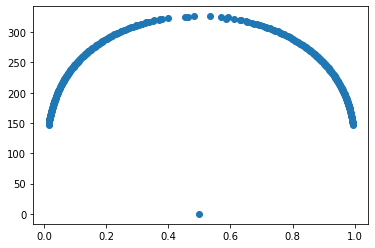

In [7]:
phase_diagram = []
T=326.3
phase_diagram.append([0.5, f1(0.5)]) #заношу в базу первую точку фазы
print(phase_diagram)

#T_start = T_krit2 - 1
T_start = 326.0
T_range = np.arange(T_start, 146.0, -1)

θ = np.arange(0.0001, 0.9999, 0.0002)

aP_fin = 0

#c = 0
#g = c+θ-θ

flag = False


for Ti in T_range: 
    print('-----------New--------------')
    T = Ti
    print('********* T ='+str(Ti)+' ********')

    max_x = opt.fminbound(f1_minus, 0, 0.5)
    min_x = opt.fminbound(f1, 0.5, 1)
    
    print('max_x: '+str(max_x) )
    print('min_x: '+str(min_x))
    
    h_maxi = 0.0002 #задаю шаг
    max_x = max_x + h_maxi
    min_x = min_x - h_maxi
    
    f_h_maxi = -f1(h_maxi)
    f_max_x = f1(max_x)
    f_min_x = f1 (min_x)
    
    print('f_max_x: '+str(f_max_x) )
    print('f_min_x: '+str(f_min_x))
    print('f_h_maxi: '+str(f_h_maxi))
    

    rng_line = np.arange(f_max_x, f_min_x, f_h_maxi) #диапазон max и min по оси Y 
    print(rng_line)
    print('Lenth: ' + str(len(rng_line)))
    
    span = np.arange(max_x, min_x, 0.0002) #диапазон max и min по оси X
    
    Si_old = 0
    Si_old_final = 0 
    Si_sum = 0
    aP = 0
    aP1_fin = 0
    aP2_fin = 0
    
    #Пробегаюсь по участкую от max до min
    for const in rng_line:
        
        f = θ*(1+2*θ*(np.exp(-(R*T)**(-1)*ε)-1)/(1+(np.exp(-(R*T)**(-1)*ε)-1)*(1-2*θ)+((1+(np.exp(-(R*T)**(-1)*ε)-1)*(1-2*θ))**2+4*(np.exp(-(R*T)**(-1)*ε)-1)*θ**2)**0.5))**z_1/(1-θ)
        f_c = lambda θ:  -c+θ*(1+2*θ*(sp.exp(-(R*T)**(-1)*ε)-1)/(1+(sp.exp(-(R*T)**(-1)*ε)-1)*(1-2*θ)+((1+(sp.exp(-(R*T)**(-1)*ε)-1)*(1-2*θ))**2+4*(sp.exp(-(R*T)**(-1)*ε)-1)*θ**2)**0.5))**z_1/(1-θ)

        print('---Start cycle inside---')
        c = const
        g = c+θ-θ
        print('c: ' + str(c))
        
        print('g: '+str(g))
        idθ = np.argwhere(np.diff(np.sign(f - g))).flatten()
        
        print('idθ: '+str(idθ))
        print('θ[idθ]: '+str(θ[idθ]))

        Si_old_final = Si_old
        
        print('Si_old_final: '+ str(Si_old_final))
        
        Si_c = ig.quad(f_c, a=0.1, b=0.9)
        print('Si_c: ' + str(Si_c))
                
        
        Si = ig.quad(f_c, a=θ[idθ[0]], b=θ[idθ[2]])
        Si_old = Si[0]

        print('Si: ' + str(Si[0]))
        
        if Si[0] < 0:
            print('continue')
        else:
            print('search aP')
            aP = c
            print('aP: ' + str(aP))
            if abs(Si[0])<abs(Si_old_final):
                aP1_fin = c
                aP_fin = aP1_fin
                print('aP1_fin: ' + str(aP1_fin))
                flag == True
                print('Flag1 == True')
                print('break')
                break
            else:
                aP2_fin = c - f_h_maxi
                aP_fin = aP2_fin
                print('aP2_fin: ' + str(aP2_fin))
                flag == True
                print('Flag2 == True')
                print('break')
                break
        print('end inside')
    print('----------------------------------------')
    print('-----!Si_old_final: '+ str(Si_old_final))
    print('-----!Si: ' + str(Si[0]))
    print('-----!aP_fin: ' + str(aP_fin))
    print('----------------------------------------')
    #далее ищу точки пересечения найденной прямой с графиком
    
    for i in 0, 2:
        phase_diagram.append([θ[idθ[i]], T])
    print('End')
plt.scatter(*zip(*phase_diagram))

Text(0.5, 0, 'θ')

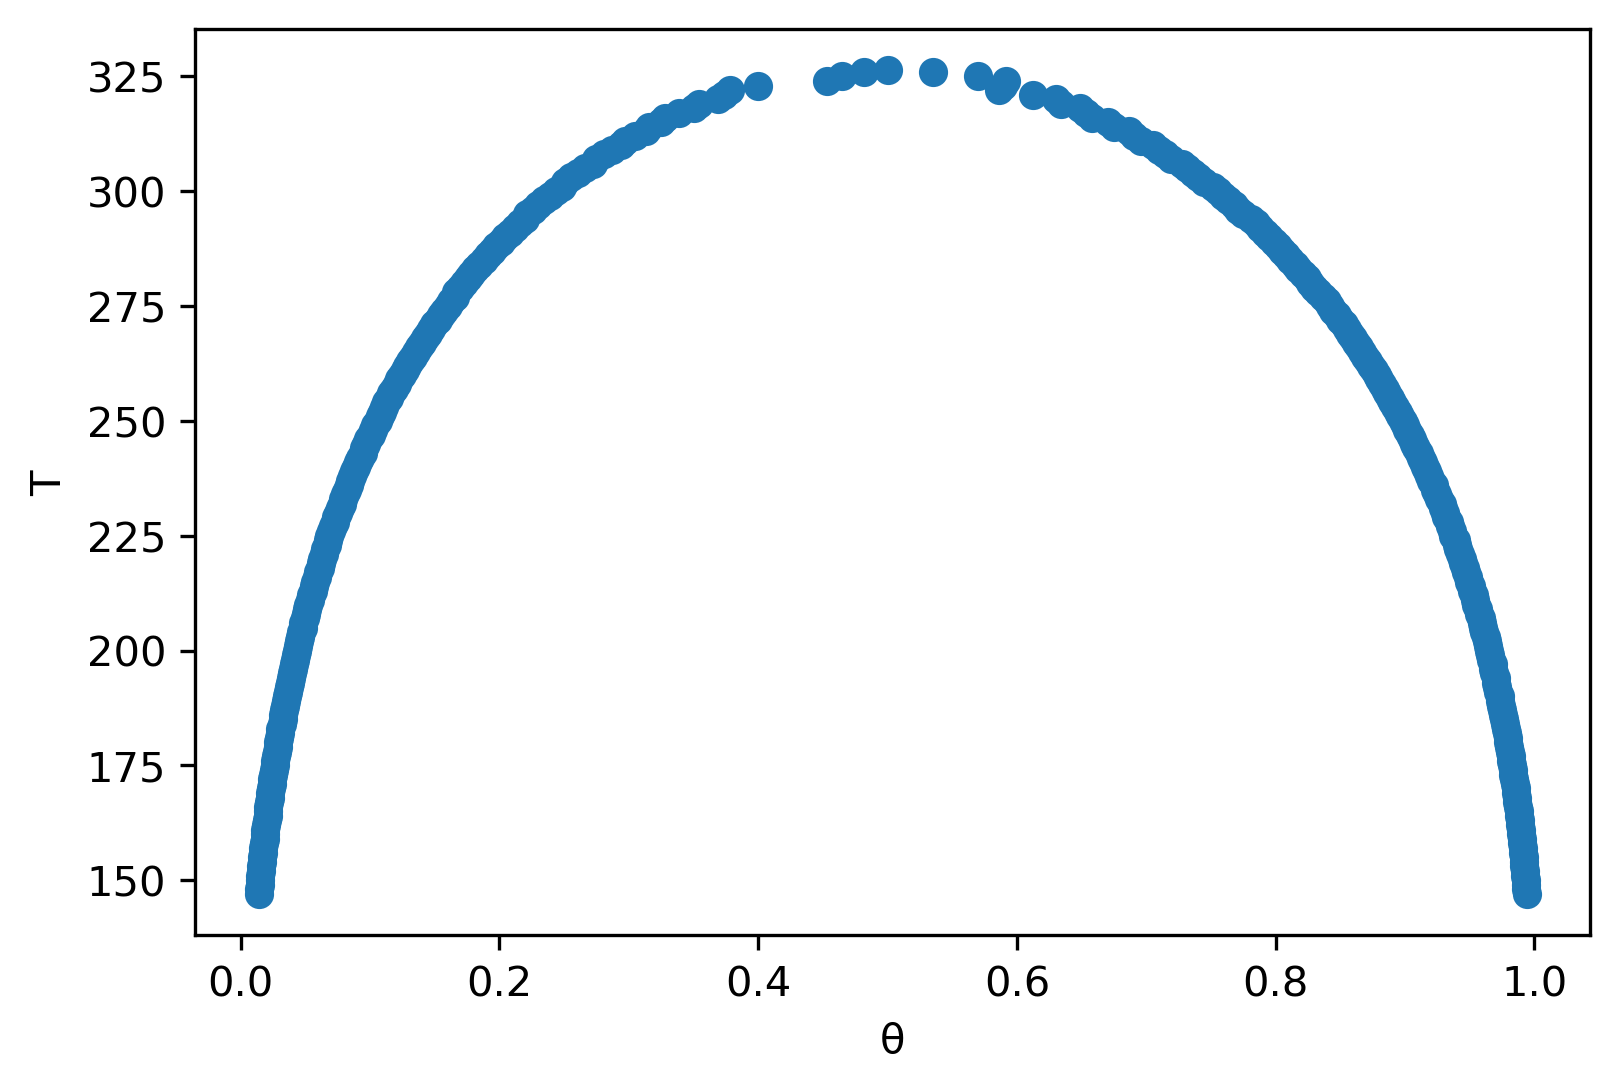

In [8]:
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300

#print(phase_diagram)
phase_diagram[0][1] = 326.3
plt.scatter(*zip(*phase_diagram))
 
# ссылка про функции https://pythonworld.ru/tipy-dannyx-v-python/vse-o-funkciyax-i-ix-argumentax.html
plt.ylabel("T")
plt.xlabel("θ")

In [10]:
sum_th =  phase_diagram[113][0]+phase_diagram[114][0]
print(sum_th)

1.0024000000000002


In [ ]:
phase_diagram_T = []
T=326.3
phase_diagram.append([0.5, 326])
T_start = 326.0

T_range = np.arange(T_start, 146.0, -1)
phase_range = np.arange(1, 362, 1)

#phase_range = np.arange(0, len(phase_diagram), 1)
temp_phase = []

for i in phase_range:
    temp_phase = phase_diagram
    

for in T_range:
    phase_diagram_T.append([θ[idθ[i]], f[idθ[i]]])
    
θ = np.arange(0.0001, 0.9999, 0.0002)

 #заношу в базу первую точку фазы
print(phase_diagram)

In [ ]:
print(str(phase_diagram[1]))